In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# In Depth Analysis

In this section, we will be using machine learning algorithm to predict whether given movie will be successful or not.  

First question is... How do we measure that a movie is successful or not?

We have been using 'popularity' field as a guideline for measuring success.  This field is calculated from two featured in the original dataset, averageRating and numVotes.
#### popularity metric = averageRating * numVotes/totalVotes

Before re-introducing the popularity metric, we will clean up the dataframe to remove any unnecessary features.

In [2]:
#import dataset
#this is our main dataset
df_master= pd.read_csv('data/df_concat_rate.csv')

#this dataset contains the name for directors
df_name = pd.read_csv('data/df_name0.csv')

In [3]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222860 entries, 0 to 222859
Data columns (total 39 columns):
Unnamed: 0        222860 non-null int64
tconst            222860 non-null object
primaryTitle      222860 non-null object
isAdult           222860 non-null int64
startYear         222860 non-null float64
runtimeMinutes    222860 non-null float64
genres            222860 non-null object
directors         222860 non-null object
writers           198671 non-null object
Romance           222860 non-null int64
Documentary       222860 non-null int64
News              222860 non-null int64
Sport             222860 non-null int64
Biography         222860 non-null int64
Drama             222860 non-null int64
Crime             222860 non-null int64
Adventure         222860 non-null int64
Fantasy           222860 non-null int64
Comedy            222860 non-null int64
War               222860 non-null int64
Family            222860 non-null int64
History           222860 non-null int64


#### Genres

We have 28 genre types in total.  We could add all these features but there are genres that are rarely used and some used more than most. 

Lowest count: 2

Highest count: 103460

We will use the top 15 genres to be included as part of our predictors.

In [4]:
genre_type=['Romance', 'Documentary', 'News', 'Sport', 'Biography', 'Drama', 'Crime', 'Adventure', 'Fantasy', 'Comedy', 'War', 'Family', 'History', 'SciFi', 'Western', 'Thriller', 'Mystery', 'Horror', 'Action', 'Music', 'Short', 'Animation', 'Musical', 'FilmNoir', 'TalkShow', 'Adult', 'RealityTV', 'GameShow']

In [5]:
#get only the genre columns and count them to a series
genre_count=df_master[genre_type].sum(axis=0)

#grab the 13 smallest genres and get their index to a list 
exclude=genre_count.nsmallest(13).index

In [6]:
genre_count

Romance         26350
Documentary     31701
News              622
Sport            2591
Biography        6850
Drama          103460
Crime           20006
Adventure       15649
Fantasy          6734
Comedy          59546
War              5210
Family           8905
History          6183
SciFi            5670
Western          4083
Thriller        18706
Mystery          8442
Horror          16110
Action          24971
Music            5483
Short               5
Animation        3684
Musical          5476
FilmNoir          766
TalkShow            2
Adult            3289
RealityTV          26
GameShow            3
dtype: int64

In [7]:
#test drop
df_master.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
#actual drop
df_master.drop(exclude,axis=1,inplace=True)

#### Column Clean Up

Now the dataframe consists of the top 15 genres and the rest of 13 less used genres are dropped.

Also other columns that we won't need are:

tconst: this is just an identifier for movies. Since we have primary title, this won't be necessary.

primaryTitle: this is used as the identifier. However when performing actual modelling, this field can be excluded.

isAdult: during our analysis, this field had very little impact to the overall score.

genres: we already have a categorical reciprocate of the genres field.

writers: this field contained many null rows as well as many contained more than one individual.  because of this expanding the multi-individuals to each columns would create further created null values for other single writer or null containing movies.  

averageRating & numVotes: after introducing propularity field, these won't be needed.


In [9]:
#tconst drop
df_master.drop('tconst',axis=1,inplace=True)

In [10]:
#isAdult drop
df_master.drop('isAdult',axis=1,inplace=True)

In [11]:
#primaryTitle drop
df_master.drop('genres',axis=1,inplace=True)

In [12]:
#writers drop
df_master.drop('writers',axis=1,inplace=True)

#### Directors

Directors also have a similar issue like writers column.  There can be one to many directors who worked on the movies.

We have about 220000 records in total but around 19000 contains more than one directors.  Of those 19000 records, most of them have two directors and a few have three and a very few have more than three directors. 

If we account for at least 2 directors situation and create another column for director #2, we would have more than 200000 records with NaN for this director #2 column.

Since this is less than 10% of our data, we will simply remove the extra directors and only keep one.

In [13]:
directors = [x for x in df_master.directors if ',' in x]
len(directors)

19221

In [14]:
all_directors = df_master.directors


In [15]:
for index,x in enumerate(all_directors):
    print(index)
    print(x)
    if ',' in x:
        all_directors[index] = x.split(',', 1)[0]
        print('now it is ',all_directors[index])


0
nm0085156
1
nm0714557
2
nm0095714,nm0675140
now it is  nm0095714
3
nm0846879
4
nm0533958
5
nm0143333
6
nm0194088
7
nm0194088
8
nm0091767,nm0877783
now it is  nm0091767
9
nm0191133
10
nm0081288
11
nm0099901
12
nm0550220,nm0063413
now it is  nm0550220
13
nm0294276
14
nm0022607
15
nm0143333
16
nm0375839
17
nm0130633,nm0580197,nm0693516
now it is  nm0130633
18
nm0063413,nm0550220
now it is  nm0063413
19
nm0088881
20
nm0088881
21
nm0169878
22
nm0085865
23
nm0471787
24
nm0764002
25
nm0300487,nm1003261


/Users/byungchankim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


now it is  nm0300487
26
nm0375839
27
nm0108345
28
nm0000428
29
nm0738202
30
nm0300487
31
nm0135052
32
nm0300487
33
nm0519315
34
nm0300487
35
nm0605942
36
nm0325670
37
nm0259235
38
nm0309130
39
nm0078205,nm0209738,nm0655824
now it is  nm0078205
40
nm0773654
41
nm0511155
42
nm0646058
43
nm0127511
44
nm0072872
45
nm0523932
46
nm0345500
47
nm0218404
48
nm0443857,nm0130633
now it is  nm0443857
49
nm0830249
50
nm0002031
51
nm0334918
52
nm0533048
53
nm0088881
54
nm0316794,nm0408436
now it is  nm0316794
55
nm0360617
56
nm0205986
57
nm0692105,nm0325448
now it is  nm0692105
58
nm6955979
59
nm0838052,nm0146957
now it is  nm0838052
60
nm0275421
61
nm0938041
62
nm0135052
63
nm0830249
64
nm0687575
65
nm0403439
66
nm0692105,nm0205986
now it is  nm0692105
67
nm0803705
68
nm0718121
69
nm0107543
70
nm0275421
71
nm0143333
72
nm0532622
73
nm0135052
74
nm0275421
75
nm0000428
76
nm0532349
77
nm0285684,nm0692105
now it is  nm0285684
78
nm0296193,nm0915270
now it is  nm0296193
79
nm0551375
80
nm0098376
81
nm0

now it is  nm0322843
449
nm0523932
450
nm0102643,nm0551375
now it is  nm0102643
451
nm0765106
452
nm0077928
453
nm0916665
454
nm0291548,nm0291387
now it is  nm0291548
455
nm0205986
456
nm0256221
457
nm0127511
458
nm0875869
459
nm0226992
460
nm0501902
461
nm1250355
462
nm0842521
463
nm0665163
464
nm0577654
465
nm0934010
466
nm0001124
467
nm0669260
468
nm0250053
469
nm0653253
470
nm0316794
471
nm0002061
472
nm1250355
473
nm0830249
474
nm0107543
475
nm0806565,nm0916665
now it is  nm0806565
476
nm0515979,nm0601190
now it is  nm0515979
477
nm0049995
478
nm0349785
479
nm0291387,nm0291548
now it is  nm0291387
480
nm0937581
481
nm0830249
482
nm0188105
483
nm0291548,nm0291387
now it is  nm0291548
484
nm0936767
485
nm0869665
486
nm0507150
487
nm0184782,nm0883920
now it is  nm0184782
488
nm0694260
489
nm0652650
490
nm0172413
491
nm0000406
492
nm0937581
493
nm0717046
494
nm0210171
495
nm0875869
496
nm0250053
497
nm0366586,nm0807742
now it is  nm0366586
498
nm0883920
499
nm0689471
500
nm0208657
501

now it is  nm0942428
923
nm0408429
924
nm0454771
925
nm0245385
926
nm0187981
927
nm0000485
928
nm0454771
929
nm0385171,nm0366586
now it is  nm0385171
930
nm0116307
931
nm0830249
932
nm0138251
933
nm0731910
934
nm0403636,nm0309163,nm0000252
now it is  nm0403636
935
nm0941782
936
nm0513617
937
nm0941562
938
nm0693516
939
nm0000428
940
nm0942413
941
nm0652650
942
nm0674600
943
nm0869665
944
nm0283444
945
nm0456634
946
nm0385171
947
nm0515979
948
nm0783369
949
nm0281808
950
nm0115218
951
nm0064600
952
nm0250053
953
nm0280463
954
nm0821472
955
nm0515979
956
nm0428059
957
nm0160297,nm0796657
now it is  nm0160297
958
nm0413045
959
nm0003638
960
nm0250053
961
nm0102908
962
nm0921244
963
nm0002061
964
nm0523932
965
nm0502752
966
nm0842521
967
nm0825596
968
nm0002061
969
nm0275494
970
nm0929649
971
nm0806605
972
nm0003433
973
nm0002061
974
nm0596410
975
nm0003638
976
nm0721840
977
nm0170863
978
nm0102783
979
nm0210352
980
nm0537510
981
nm0869665,nm0607864
now it is  nm0869665
982
nm0385171,nm036

now it is  nm0291387
1457
nm0241273
1458
nm0403636
1459
nm0669260
1460
nm0187981
1461
nm0731910
1462
nm0425049
1463
nm0280463
1464
nm0511729
1465
nm0882160
1466
nm0413164
1467
nm0646058
1468
nm0291387
1469
nm0861336
1470
nm0662840
1471
nm0002271
1472
nm0002271
1473
nm0115218
1474
nm0341486
1475
nm0097648
1476
nm0902304
1477
nm0803705
1478
nm0000406
1479
nm0400912
1480
nm0523932
1481
nm0897085
1482
nm0749484
1483
nm0185714,nm0474631
now it is  nm0185714
1484
nm0308593
1485
nm0695466
1486
nm0929649
1487
nm0135052,nm0897085
now it is  nm0135052
1488
nm0005847
1489
nm0001124
1490
nm0929649
1491
nm0778306
1492
nm0067033
1493
nm0243295
1494
nm0909436
1495
nm0942048,nm0408436
now it is  nm0942048
1496
nm0247484,nm0384616
now it is  nm0247484
1497
nm0515979
1498
nm0258477
1499
nm0185714
1500
nm0782682
1501
nm0280463
1502
nm0258477
1503
nm0920074
1504
nm0939992
1505
nm0242412
1506
nm0291548
1507
nm0731910
1508
nm0191899
1509
nm0483944
1510
nm0002177
1511
nm0665737
1512
nm0281808
1513
nm0413164


nm0002233
1942
nm0071560
1943
nm0275494
1944
nm0085133
1945
nm0341486
1946
nm0005847
1947
nm0886754
1948
nm0291548
1949
nm0806143
1950
nm0377126
1951
nm0007215
1952
nm0071560
1953
nm0797205
1954
nm0689471
1955
nm0384616
1956
nm0596410
1957
nm0373511
1958
nm0335207
1959
nm0206031
1960
nm0116307
1961
nm0576043
1962
nm0000406
1963
nm0250038
1964
nm0068419
1965
nm0523932
1966
nm0878338
1967
nm0770703,nm0608805
now it is  nm0770703
1968
nm0523932
1969
nm0068419
1970
nm0097648
1971
nm0425049
1972
nm0097648
1973
nm0000406
1974
nm0068419
1975
nm0064415
1976
nm0124877
1977
nm0385642
1978
nm0281808
1979
nm0781292
1980
nm0398464
1981
nm1250355
1982
nm0474487
1983
nm0878338
1984
nm0090007
1985
nm0782682
1986
nm0796657
1987
nm0674600
1988
nm0635341
1989
nm0806061
1990
nm0763453
1991
nm0624756
1992
nm0127511,nm0903049
now it is  nm0127511
1993
nm0002233
1994
nm0637507
1995
nm0127511
1996
nm0275220
1997
nm0878338
1998
nm0922327
1999
nm0003373
2000
nm0416258
2001
nm0115218
2002
nm0409949,nm0882160
now

now it is  nm0515979
2463
nm0501902
2464
nm0646058
2465
nm0175410
2466
nm0000036,nm0395023
now it is  nm0000036
2467
nm0485943
2468
nm0382441
2469
nm0194031
2470
nm0102264,nm0578985
now it is  nm0102264
2471
nm0432216
2472
nm0001328
2473
nm0372609
2474
nm0209458
2475
nm0943758
2476
nm0861703
2477
nm0002031
2478
nm0629243
2479
nm0055823
2480
nm0226992
2481
nm0706753
2482
nm0922327
2483
nm0404431
2484
nm0000033
2485
nm0187981
2486
nm0916224
2487
nm0466099
2488
nm0830697
2489
nm0245385
2490
nm0000033
2491
nm0742914
2492
nm0629243
2493
nm0886754
2494
nm0282984
2495
nm0939992
2496
nm0665737
2497
nm0002188
2498
nm0114266
2499
nm0187981
2500
nm0003373
2501
nm0045800
2502
nm0215877
2503
nm0801805
2504
nm0002061
2505
nm0713163
2506
nm0209458
2507
nm0001008
2508
nm0206031
2509
nm0446054
2510
nm0247484
2511
nm0002271
2512
nm0428059
2513
nm0478441
2514
nm0831577
2515
nm0226189,nm0104948
now it is  nm0226189
2516
nm0115669,nm0000036
now it is  nm0115669
2517
nm0195496
2518
nm0002188
2519
nm0394399


now it is  nm0853028
2969
nm0869645,nm0587277,nm0853130
now it is  nm0869645
2970
nm0002031
2971
nm0215877
2972
nm0163937
2973
nm0001008
2974
nm0628345,nm0219666
now it is  nm0628345
2975
nm0002271
2976
nm0046082
2977
nm0624714
2978
nm0102264
2979
nm0943758
2980
nm0275494
2981
nm0840042
2982
nm0719756
2983
nm0054977
2984
nm0719756
2985
nm0113284
2986
nm0701076
2987
nm0629243
2988
nm0209458
2989
nm0886754
2990
nm0002190
2991
nm0777579
2992
nm0042948,nm0233091
now it is  nm0042948
2993
nm0914112
2994
nm0513332
2995
nm0624756
2996
nm0116103
2997
nm0861703
2998
nm0432216,nm0001124
now it is  nm0432216
2999
nm0371463
3000
nm0344583
3001
nm0281808
3002
nm0001008
3003
nm0515979
3004
nm0002233
3005
nm0569645
3006
nm0115218
3007
nm0118512
3008
nm0176699
3009
nm0280904,nm0886754
now it is  nm0280904
3010
nm0461295
3011
nm0028636
3012
nm0803705
3013
nm0869645
3014
nm0454771,nm0853130
now it is  nm0454771
3015
nm0113284
3016
nm0593180
3017
nm0886754
3018
nm0281383,nm0281389
now it is  nm0281383
30

now it is  nm0270838
3457
nm0107543
3458
nm0003836,nm0347771
now it is  nm0003836
3459
nm0432216,nm0929616
now it is  nm0432216
3460
nm0700259,nm0826094
now it is  nm0700259
3461
nm0160280
3462
nm0596410
3463
nm0567626
3464
nm0114266
3465
nm0485647
3466
nm0261971
3467
nm0064600
3468
nm0003638
3469
nm0303120
3470
nm0928514
3471
nm0389066
3472
nm0485943,nm0624756
now it is  nm0485943
3473
nm0569645
3474
nm0602009
3475
nm0485943
3476
nm0281808
3477
nm0127511
3478
nm0251456
3479
nm0485943
3480
nm0002190
3481
nm0806061
3482
nm0864087
3483
nm0185714
3484
nm0185714
3485
nm0819546
3486
nm0258015
3487
nm0782707
3488
nm0820461
3489
nm0920074
3490
nm0584778
3491
nm0245213
3492
nm0001328
3493
nm0127511
3494
nm0309163,nm0498174
now it is  nm0309163
3495
nm0280463
3496
nm0191899
3497
nm0332539
3498
nm0482742
3499
nm0215877
3500
nm0502752
3501
nm0715564
3502
nm0514822
3503
nm0562845
3504
nm0781292
3505
nm0091380
3506
nm0857949
3507
nm0652650
3508
nm0853130
3509
nm0012317
3510
nm0068419
3511
nm0401323

nm0124877
3932
nm0395023
3933
nm1262881
3934
nm0806143
3935
nm0782682
3936
nm0565187
3937
nm0896542
3938
nm0245385
3939
nm0532187
3940
nm0007973,nm0896826
now it is  nm0007973
3941
nm0719756
3942
nm0189076
3943
nm0665737
3944
nm0749484
3945
nm0191899
3946
nm0000122
3947
nm0541149
3948
nm0112897
3949
nm0514822
3950
nm0825596
3951
nm0614225,nm0123556
now it is  nm0614225
3952
nm0124877
3953
nm0806143
3954
nm0806061
3955
nm0127511
3956
nm0922327
3957
nm0166836
3958
nm0001328
3959
nm0886754
3960
nm0763453
3961
nm0064600
3962
nm0176699
3963
nm0853028
3964
nm0581721
3965
nm0067033
3966
nm0180987
3967
nm0275494
3968
nm0385171
3969
nm0505354
3970
nm0124877
3971
nm0003422
3972
nm0861703
3973
nm0590701
3974
nm0001008
3975
nm0903049
3976
nm0097648
3977
nm0397678
3978
nm0115218,nm0005713
now it is  nm0115218
3979
nm0577654,nm0869801
now it is  nm0577654
3980
nm0251456
3981
nm0385193
3982
nm0655065
3983
nm0782707
3984
nm0878338
3985
nm0176699
3986
nm0515979
3987
nm0577654
3988
nm0503777
3989
nm0873

4518
nm0416258
4519
nm0627087
4520
nm0689471,nm0939992
now it is  nm0689471
4521
nm0565187
4522
nm0496505
4523
nm0383304
4524
nm0045800
4525
nm0397678
4526
nm0113954
4527
nm0744504
4528
nm0000406
4529
nm0147749
4530
nm0052217
4531
nm0001008
4532
nm0309163,nm0774827
now it is  nm0309163
4533
nm0565187
4534
nm0532187
4535
nm0002061
4536
nm0115218
4537
nm0614225
4538
nm0403054
4539
nm0292134
4540
nm0257068
4541
nm0869665
4542
nm0628345
4543
nm0005847
4544
nm0921288
4545
nm0257288
4546
nm0292134
4547
nm0020522
4548
nm0782682
4549
nm0926171
4550
nm0584778
4551
nm0107543
4552
nm0296193
4553
nm0116307
4554
nm0913773
4555
nm0112897
4556
nm0397227
4557
nm0833965
4558
nm0332539
4559
nm0792514
4560
nm0695937
4561
nm0366781
4562
nm0448915
4563
nm0712730
4564
nm0172485
4565
nm0435563
4566
nm0478441
4567
nm0491503
4568
nm0124877
4569
nm0105151
4570
nm0291587
4571
nm0654868
4572
nm0485647
4573
nm0920074
4574
nm0942611
4575
nm0247484
4576
nm0127511
4577
nm0451576,nm0953516
now it is  nm0451576
4578
nm

now it is  nm0258015
5009
nm0114602
5010
nm0423964
5011
nm0281808
5012
nm0909825
5013
nm0102908
5014
nm0802563
5015
nm0293260
5016
nm0123556
5017
nm0254410
5018
nm0384682
5019
nm0485647
5020
nm0792514
5021
nm0533102,nm0925028
now it is  nm0533102
5022
nm0897085
5023
nm0215877
5024
nm0833965
5025
nm0001843
5026
nm0385171
5027
nm0287506
5028
nm0183018
5029
nm0215877
5030
nm0466113
5031
nm0087704
5032
nm0515979
5033
nm0337586,nm0920074
now it is  nm0337586
5034
nm0782682
5035
nm0532187
5036
nm0052217
5037
nm0505354
5038
nm0384616
5039
nm0718469
5040
nm0125636
5041
nm0296193,nm0839497,nm0902120
now it is  nm0296193
5042
nm0939992
5043
nm0002188
5044
nm0624756
5045
nm0853028
5046
nm0384276
5047
nm0006276
5048
nm0828419
5049
nm0920074
5050
nm0749484
5051
nm0297414,nm0124571
now it is  nm0297414
5052
nm0006276
5053
nm0562845
5054
nm0247484
5055
nm0730905
5056
nm0943758
5057
nm0577654
5058
nm0500552
5059
nm0565187
5060
nm0064415
5061
nm0615868
5062
nm0112897
5063
nm0909398
5064
nm0833965
5065


now it is  nm0108519
5458
nm0003226,nm1992711
now it is  nm0003226
5459
nm0595768
5460
nm0384616
5461
nm0942862
5462
nm0806061
5463
nm0769585
5464
nm0829954,nm0000485
now it is  nm0829954
5465
nm0400638
5466
nm0524995
5467
nm0001124
5468
nm0002061
5469
nm0072872
5470
nm0194031
5471
nm0163786,nm0769585
now it is  nm0163786
5472
nm0637790
5473
nm0782707
5474
nm0001178
5475
nm0297414
5476
nm0552289
5477
nm0368871
5478
nm0744514,nm0001328
now it is  nm0744514
5479
nm0654868
5480
nm0258015
5481
nm0908234
5482
nm0840042
5483
nm0195496
5484
nm0355284,nm0814118
now it is  nm0355284
5485
nm0869664
5486
nm0782707
5487
nm0558127
5488
nm0839846,nm0457186,nm0739291,nm0023003,nm0346278
now it is  nm0839846
5489
nm0532187
5490
nm0224543
5491
nm0503777
5492
nm0076779
5493
nm0783629
5494
nm0245213
5495
nm0205317
5496
nm0385171
5497
nm0142056
5498
nm0682176
5499
nm0833965
5500
nm0474487
5501
nm0311174
5502
nm0778306
5503
nm0440261
5504
nm0012317
5505
nm0561230,nm0327415
now it is  nm0561230
5506
nm05332

now it is  nm0112897
5951
nm0712748
5952
nm0783629,nm0092915
now it is  nm0783629
5953
nm0617358
5954
nm0480046
5955
nm0280463,nm0002188
now it is  nm0280463
5956
nm0304098
5957
nm0140459
5958
nm0928214
5959
nm0071560
5960
nm0003836
5961
nm0624756
5962
nm0097648
5963
nm0736610
5964
nm0580017,nm0614634
now it is  nm0580017
5965
nm0121667
5966
nm0368871
5967
nm0335207
5968
nm0188669
5969
nm0072872
5970
nm0064415
5971
nm0006276
5972
nm0833965
5973
nm0385171
5974
nm0290926
5975
nm0385171
5976
nm0001843
5977
nm0006276
5978
nm0072191
5979
nm0406591
5980
nm0669260
5981
nm0092915
5982
nm0552871
5983
nm0896542
5984
nm0502752
5985
nm0497961
5986
nm0384616
5987
nm0202376
5988
nm0092915
5989
nm0831577
5990
nm0245213
5991
nm0547446
5992
nm0485943
5993
nm0386785
5994
nm0100959
5995
nm0257068
5996
nm0166836
5997
nm0920853
5998
nm0853028
5999
nm0189076
6000
nm0233091,nm0499407
now it is  nm0233091
6001
nm0467396
6002
nm0835224,nm0742914
now it is  nm0835224
6003
nm0938209
6004
nm0853028
6005
nm0669260

now it is  nm0955072
6532
nm0256586
6533
nm0363235
6534
nm0259611
6535
nm0002862,nm0467396
now it is  nm0002862
6536
nm0617358
6537
nm0250038
6538
nm0828419
6539
nm0342417
6540
nm0401680
6541
nm0189076
6542
nm0385193
6543
nm0909398
6544
nm0006943
6545
nm0916125
6546
nm0774325,nm0178260
now it is  nm0774325
6547
nm0615868
6548
nm0059106,nm0309163
now it is  nm0059106
6549
nm0292134
6550
nm0861703
6551
nm0662032
6552
nm0066247
6553
nm0565187
6554
nm0102908
6555
nm0071560
6556
nm0003836
6557
nm0387791
6558
nm0371741
6559
nm0046104,nm1081950
now it is  nm0046104
6560
nm0939992
6561
nm0506266,nm0707264
now it is  nm0506266
6562
nm0459801
6563
nm0219068
6564
nm0550892
6565
nm0296193
6566
nm0002031
6567
nm0005847
6568
nm0054977
6569
nm0124877
6570
nm0368871
6571
nm0097648
6572
nm0624756
6573
nm0212704
6574
nm0109264
6575
nm0212704
6576
nm0712748
6577
nm0720886
6578
nm0857949
6579
nm0006276
6580
nm0003836
6581
nm0637790
6582
nm0767701
6583
nm0304098
6584
nm0092168
6585
nm0005713
6586
nm0821472

7061
nm0397227
7062
nm0448915
7063
nm0285946
7064
nm0454771
7065
nm0823864
7066
nm0783461
7067
nm0853028
7068
nm0820461
7069
nm0002188
7070
nm0624535,nm0631438
now it is  nm0624535
7071
nm0954394
7072
nm0191888
7073
nm0719756
7074
nm0041678
7075
nm0550892
7076
nm0454734
7077
nm0453245,nm0127511
now it is  nm0453245
7078
nm0219068
7079
nm0003836
7080
nm0166730
7081
nm0656528
7082
nm0560395
7083
nm0005847
7084
nm0763798
7085
nm0180987
7086
nm0385171
7087
nm0397227
7088
nm0006943
7089
nm0247484,nm0437356
now it is  nm0247484
7090
nm0131460
7091
nm0833965
7092
nm0386785
7093
nm0451576,nm0953516
now it is  nm0451576
7094
nm0615893
7095
nm0003373
7096
nm0075318
7097
nm0523994
7098
nm0097648
7099
nm0349629,nm0883357
now it is  nm0349629
7100
nm0329574
7101
nm0114602,nm0886754
now it is  nm0114602
7102
nm0928108
7103
nm0448915
7104
nm0115218
7105
nm0894551
7106
nm0782682
7107
nm0909398
7108
nm0943758
7109
nm0614225
7110
nm0831577
7111
nm0257288
7112
nm0172485
7113
nm0166058
7114
nm0172485
7115

now it is  nm0112897
7560
nm0823864
7561
nm0522635
7562
nm0377613
7563
nm0920074,nm0502752
now it is  nm0920074
7564
nm0763798
7565
nm0258015
7566
nm0372942,nm0531269
now it is  nm0372942
7567
nm0306599
7568
nm0107543
7569
nm0270502,nm0516328
now it is  nm0270502
7570
nm0932625
7571
nm0565187
7572
nm0003422
7573
nm0394477
7574
nm0045800
7575
nm0679283
7576
nm0002165
7577
nm0954673
7578
nm0003422
7579
nm0547446
7580
nm0909825
7581
nm0932625
7582
nm0439107,nm0267603
now it is  nm0439107
7583
nm0940499
7584
nm0002061
7585
nm0406591,nm0038089
now it is  nm0406591
7586
nm0312866
7587
nm0038089,nm0406591
now it is  nm0038089
7588
nm0869645
7589
nm0000923
7590
nm0066247
7591
nm0782597
7592
nm0593632,nm0761770
now it is  nm0593632
7593
nm0002031
7594
nm0627864
7595
nm0909398
7596
nm0226189
7597
nm0782682
7598
nm0374702
7599
nm0403126
7600
nm0851537
7601
nm0102908
7602
nm0853028
7603
nm0782193
7604
nm0190516
7605
nm0280463
7606
nm0454734
7607
nm0416258
7608
nm0828419
7609
nm0547446
7610
nm08711

now it is  nm0325670
8076
nm0002031
8077
nm0829038,nm0054787
now it is  nm0829038
8078
nm0503777
8079
nm0282984
8080
nm0002158
8081
nm0917364
8082
nm0275494
8083
nm0895048
8084
nm0105151
8085
nm0882795
8086
nm0363235
8087
nm0091042
8088
nm0866299,nm0843869
now it is  nm0866299
8089
nm0845290,nm0635969
now it is  nm0845290
8090
nm0782804
8091
nm0883334
8092
nm0180987
8093
nm0285946
8094
nm0141085
8095
nm0386785
8096
nm0143900
8097
nm0711855
8098
nm0247484
8099
nm0845290,nm0635969
now it is  nm0845290
8100
nm0681635
8101
nm0720886,nm0697131
now it is  nm0720886
8102
nm0141351
8103
nm0446053
8104
nm0531674
8105
nm0524995
8106
nm0003373
8107
nm0092915,nm0002188,nm0280463
now it is  nm0092915
8108
nm0833965
8109
nm0631438
8110
nm0427659,nm0247504
now it is  nm0427659
8111
nm0071560
8112
nm0712730
8113
nm0627864
8114
nm0337586
8115
nm0782947
8116
nm0532187
8117
nm0739677,nm0890565
now it is  nm0739677
8118
nm0337586
8119
nm0194031
8120
nm0374871
8121
nm0564971
8122
nm0782682
8123
nm0782682
8

now it is  nm0762489
8613
nm0166730
8614
nm0416258
8615
nm0185385,nm0247484
now it is  nm0185385
8616
nm0257638
8617
nm0002179
8618
nm0229445
8619
nm0728774
8620
nm0762263
8621
nm0076779
8622
nm0297414
8623
nm0782947
8624
nm0625726
8625
nm0872112,nm0743099,nm0466112
now it is  nm0872112
8626
nm0401680
8627
nm0547446
8628
nm0951170
8629
nm0720886
8630
nm0294261
8631
nm0547446
8632
nm0006943
8633
nm0896542
8634
nm0736610
8635
nm0371463
8636
nm0763453
8637
nm0909825
8638
nm0190516
8639
nm0437356
8640
nm0000923,nm0268513
now it is  nm0000923
8641
nm0484645
8642
nm0678203
8643
nm0058270
8644
nm0880618
8645
nm0693281,nm0943758,nm0374702
now it is  nm0693281
8646
nm0045800
8647
nm0184005
8648
nm0484645
8649
nm0627864
8650
nm0329574
8651
nm0782597,nm0166058
now it is  nm0782597
8652
nm0172485
8653
nm0800373
8654
nm0861703
8655
nm0151404
8656
nm0560395
8657
nm0308178
8658
nm0282984
8659
nm0247484
8660
nm0332539
8661
nm0342417
8662
nm0130759
8663
nm0627864
8664
nm0041678
8665
nm0233091
8666
nm06

9180
nm0106950
9181
nm0902006
9182
nm0921288
9183
nm0379092
9184
nm0280463
9185
nm0954673
9186
nm0445033
9187
nm0157102
9188
nm0869645
9189
nm0363235
9190
nm0690143
9191
nm0906291
9192
nm0296193
9193
nm0407872
9194
nm0405147
9195
nm0828419
9196
nm0017893
9197
nm0890574,nm0890567
now it is  nm0890574
9198
nm0412159
9199
nm0287988
9200
nm0107854
9201
nm0052217
9202
nm0649097
9203
nm0416258
9204
nm0823864
9205
nm0905729
9206
nm0568915
9207
nm0379092
9208
nm0569645
9209
nm0401680
9210
nm0384616
9211
nm0332539
9212
nm0058270
9213
nm0627087
9214
nm0942611,nm0625726
now it is  nm0942611
9215
nm0001843
9216
nm0166730
9217
nm0801717
9218
nm0783461
9219
nm0517659
9220
nm0385171
9221
nm0176699
9222
nm0782707
9223
nm0107543
9224
nm0246206,nm0439757,nm0031557,nm0073664
now it is  nm0246206
9225
nm0001008
9226
nm0000485
9227
nm0782707
9228
nm0084204
9229
nm0118807
9230
nm0712639
9231
nm0587277,nm0861703,nm0908831,nm0695456
now it is  nm0587277
9232
nm0562845
9233
nm0509327
9234
nm0275312,nm0866299
n

nm0782947
9752
nm0046082
9753
nm0478303
9754
nm0368871
9755
nm0363235
9756
nm0572851
9757
nm0383856
9758
nm0782947
9759
nm0268513
9760
nm0087704
9761
nm0792605
9762
nm0498584
9763
nm0829038
9764
nm0225903
9765
nm0218503
9766
nm0071560
9767
nm0916125
9768
nm0882795
9769
nm0103975
9770
nm0625726
9771
nm0523893
9772
nm0909825
9773
nm0826094
9774
nm0379092
9775
nm0379092
9776
nm0896533
9777
nm0397227
9778
nm0159414
9779
nm0711855
9780
nm0024155,nm0001120
now it is  nm0024155
9781
nm0437356
9782
nm0792450
9783
nm0515979
9784
nm0719756
9785
nm0041678
9786
nm0949597
9787
nm0437356
9788
nm0268513
9789
nm0141351
9790
nm0894204
9791
nm0649097
9792
nm0209142
9793
nm0416258,nm0853028
now it is  nm0416258
9794
nm0485647
9795
nm0809467
9796
nm0118807
9797
nm0407872
9798
nm0742914
9799
nm0902025
9800
nm0903049
9801
nm0235590,nm0813216
now it is  nm0235590
9802
nm0194031
9803
nm0758508
9804
nm0576940
9805
nm0385171
9806
nm0556737
9807
nm0782947
9808
nm0225903
9809
nm0627864
9810
nm0734845
9811
nm05127

now it is  nm0067610
10309
nm0172151
10310
nm0554249
10311
nm0572851
10312
nm0851537
10313
nm0454771
10314
nm0564971
10315
nm0478303
10316
nm0792450
10317
nm0758508
10318
nm0758508
10319
nm0000406
10320
nm0762263
10321
nm0006943
10322
nm0401680
10323
nm0587277
10324
nm0385872
10325
nm0436132
10326
nm0776838
10327
nm0176472
10328
nm0796126
10329
nm0001120
10330
nm0083104
10331
nm0109264
10332
nm0681635
10333
nm0792605
10334
nm0123556
10335
nm0127511
10336
nm0507390
10337
nm0270838,nm0804565
now it is  nm0270838
10338
nm0342417
10339
nm0303120
10340
nm0809548,nm0308178
now it is  nm0809548
10341
nm0674398
10342
nm0629519,nm0831577
now it is  nm0629519
10343
nm0541149
10344
nm0627864
10345
nm0268513
10346
nm0454771
10347
nm0252475
10348
nm0803549
10349
nm0820461
10350
nm0523893
10351
nm0256586
10352
nm0303120
10353
nm0763798
10354
nm0763798
10355
nm0329574
10356
nm0342417
10357
nm0363228
10358
nm0904706
10359
nm0329574
10360
nm0285946
10361
nm0107854
10362
nm0496505
10363
nm0329574
10364


now it is  nm0000485
10782
nm0087704
10783
nm0711855
10784
nm0002190
10785
nm0567757
10786
nm0173806
10787
nm0564971
10788
nm0166836
10789
nm0507390
10790
nm0959077
10791
nm0124571
10792
nm0453245
10793
nm0681635
10794
nm0712639
10795
nm0712748
10796
nm0221423
10797
nm0282984
10798
nm0593632
10799
nm0439107
10800
nm0718321
10801
nm0480046
10802
nm0005847
10803
nm0792450
10804
nm0742914
10805
nm0480190
10806
nm0792450
10807
nm0851537
10808
nm0064415
10809
nm0511399
10810
nm0002165,nm0009766,nm0001905
now it is  nm0002165
10811
nm0714690
10812
nm0229424
10813
nm0041678
10814
nm0226189
10815
nm0939992
10816
nm0936823,nm0257638
now it is  nm0936823
10817
nm0409757
10818
nm0002031
10819
nm0869664
10820
nm0006943
10821
nm0782947
10822
nm0445862
10823
nm0922391
10824
nm0763798
10825
nm0801717
10826
nm0281808
10827
nm0886754
10828
nm0118807
10829
nm0285946
10830
nm0849806
10831
nm0397227
10832
nm0800547
10833
nm0789313,nm0730860,nm0035899,nm0272568,nm0414144,nm0455741,nm0254675
now it is  nm07

now it is  nm0719756
11275
nm0166730
11276
nm0229424
11277
nm0949597
11278
nm0828436
11279
nm0412274,nm0641045
now it is  nm0412274
11280
nm0672391
11281
nm0401680
11282
nm0347451
11283
nm0414985
11284
nm0861703
11285
nm0001120
11286
nm0550892
11287
nm0627864
11288
nm0466099
11289
nm0191899
11290
nm0523932
11291
nm0831720
11292
nm0896533,nm0001843,nm0281808
now it is  nm0896533
11293
nm0909825
11294
nm0928214
11295
nm0448915
11296
nm0329574,nm0387002
now it is  nm0329574
11297
nm0113284
11298
nm0258015
11299
nm0531674
11300
nm0515979
11301
nm0419265
11302
nm0831577
11303
nm0339548
11304
nm0385171
11305
nm0782947
11306
nm0736610
11307
nm0758508
11308
nm0000406
11309
nm0654868
11310
nm0437717
11311
nm0523994
11312
nm0293260
11313
nm0946391
11314
nm0215877
11315
nm0549893
11316
nm0754351
11317
nm0812827
11318
nm0523994
11319
nm0572851
11320
nm0491504,nm0641045
now it is  nm0491504
11321
nm0523994
11322
nm0890085
11323
nm0567757
11324
nm0107854
11325
nm0792450
11326
nm0059106
11327
nm02829

now it is  nm0125636
11827
nm0776838
11828
nm0564970
11829
nm0064415
11830
nm0003836,nm0696247
now it is  nm0003836
11831
nm0408348
11832
nm0845290
11833
nm0499151
11834
nm0562845
11835
nm0560395
11836
nm0899581
11837
nm0627864
11838
nm0820461
11839
nm0066247,nm0712639
now it is  nm0066247
11840
nm0627864
11841
nm0796645
11842
nm0268866
11843
nm0002545
11844
nm0572851,nm0215877,nm0591486
now it is  nm0572851
11845
nm0064415
11846
nm0059106
11847
nm0448915
11848
nm0872112,nm0545216
now it is  nm0872112
11849
nm0936823
11850
nm0395023
11851
nm0285962
11852
nm0951492
11853
nm0064415
11854
nm0257638
11855
nm0681635
11856
nm0782707
11857
nm0744023
11858
nm0107854
11859
nm0201862
11860
nm0782597
11861
nm0946391
11862
nm0776838
11863
nm0498174
11864
nm0572851
11865
nm0385171
11866
nm0627864
11867
nm0514822,nm0001008
now it is  nm0514822
11868
nm0939992
11869
nm0334513
11870
nm0736610
11871
nm0880618,nm0727999
now it is  nm0880618
11872
nm0166836
11873
nm0166836
11874
nm0722852
11875
nm0087704

now it is  nm0071560
12318
nm0826094
12319
nm0329574
12320
nm0000923
12321
nm0041678
12322
nm0879802
12323
nm0005847
12324
nm0001366,nm0002061
now it is  nm0001366
12325
nm0682176
12326
nm0890085
12327
nm0946391
12328
nm0289297
12329
nm0733476
12330
nm0631438
12331
nm0064415
12332
nm0235066
12333
nm0235066
12334
nm0000923,nm0851537
now it is  nm0000923
12335
nm0289297
12336
nm0880618
12337
nm0346436
12338
nm0554924
12339
nm0894204
12340
nm0334123
12341
nm0258015
12342
nm0065442
12343
nm0629580
12344
nm0509327
12345
nm0782597
12346
nm0258015
12347
nm0281808
12348
nm0213136,nm0146709
now it is  nm0213136
12349
nm0455839
12350
nm0437356
12351
nm0000485
12352
nm0491504,nm0641045
now it is  nm0491504
12353
nm0076779
12354
nm0681635
12355
nm0718469
12356
nm0627864
12357
nm0849806
12358
nm0521028
12359
nm0166836
12360
nm0605093
12361
nm0363356
12362
nm0711855
12363
nm0523932
12364
nm0591486,nm0355284
now it is  nm0591486
12365
nm0401680
12366
nm0071796
12367
nm0071796
12368
nm0071796
12369
nm

now it is  nm0783182
12793
nm0314046
12794
nm0782947
12795
nm0853028
12796
nm0166730
12797
nm0216381
12798
nm0008999
12799
nm0064415
12800
nm0006943
12801
nm0292134
12802
nm0763798
12803
nm0908831
12804
nm0498174
12805
nm0215877
12806
nm0920074
12807
nm0273477
12808
nm0071560
12809
nm0005847
12810
nm0782947
12811
nm0257638
12812
nm0586262
12813
nm0752541
12814
nm0454734
12815
nm0363356
12816
nm0003836,nm0696247
now it is  nm0003836
12817
nm0202088,nm0572851
now it is  nm0202088
12818
nm0257638,nm0166730
now it is  nm0257638
12819
nm0419265
12820
nm0939992
12821
nm0329574
12822
nm0146709
12823
nm0005847
12824
nm0005847
12825
nm0782947
12826
nm0005847
12827
nm0006943
12828
nm0802563
12829
nm0317856
12830
nm0905729
12831
nm0802563
12832
nm0071560
12833
nm0624535
12834
nm0627864
12835
nm0496505
12836
nm0882190
12837
nm0896533
12838
nm0484645
12839
nm0437356
12840
nm0005757
12841
nm0064415
12842
nm0166058
12843
nm0505610
12844
nm0902270,nm0936404
now it is  nm0902270
12845
nm0005757
12846
n

13291
nm0858160
13292
nm0909825
13293
nm0020765
13294
nm0745420
13295
nm0637790
13296
nm0245385
13297
nm0444217
13298
nm0701576
13299
nm0845290
13300
nm0627864
13301
nm0259611
13302
nm0459801
13303
nm0202681
13304
nm0902082
13305
nm0649563
13306
nm0342622
13307
nm0299553
13308
nm0727999
13309
nm0003836,nm0696247
now it is  nm0003836
13310
nm0064415
13311
nm0266164,nm0138156
now it is  nm0266164
13312
nm0403126
13313
nm0782804
13314
nm0319148
13315
nm0439597
13316
nm0715346
13317
nm0494110
13318
nm0385171
13319
nm0413912
13320
nm0849806
13321
nm0145336
13322
nm0397678
13323
nm0166730
13324
nm0145336
13325
nm0113284
13326
nm0627864
13327
nm0454771
13328
nm0368871
13329
nm0002030
13330
nm0000485
13331
nm0002179
13332
nm0437356
13333
nm0733476
13334
nm0252177
13335
nm0071560,nm0342622
now it is  nm0071560
13336
nm0036769
13337
nm0105713
13338
nm0702738
13339
nm0423964
13340
nm0143900
13341
nm0726729
13342
nm0800373
13343
nm0281808
13344
nm0122483
13345
nm0782682
13346
nm0631438
13347
nm013

now it is  nm0453245
13825
nm0002190
13826
nm0502752
13827
nm0826452
13828
nm0453245
13829
nm0861703
13830
nm0329574
13831
nm0711855,nm0780833
now it is  nm0711855
13832
nm0627864
13833
nm0107854,nm0342622
now it is  nm0107854
13834
nm0075318
13835
nm0035199
13836
nm0220131
13837
nm0849806
13838
nm0401680
13839
nm0118807
13840
nm0172935
13841
nm0624756
13842
nm0401680
13843
nm0591486
13844
nm0268513
13845
nm0091430
13846
nm0000041
13847
nm0684978
13848
nm0235066
13849
nm0229419,nm0623152
now it is  nm0229419
13850
nm0739794
13851
nm0295901
13852
nm0368871
13853
nm0092701
13854
nm0726729
13855
nm0840042
13856
nm0547446
13857
nm0172935
13858
nm0490950
13859
nm0086251
13860
nm0103855
13861
nm0139878
13862
nm0836328
13863
nm0292134
13864
nm0952737
13865
nm0562845
13866
nm0006371
13867
nm0188669
13868
nm0292720
13869
nm0455938
13870
nm0945428,nm0000041,nm0782846
now it is  nm0945428
13871
nm0721074
13872
nm0002164
13873
nm0323728
13874
nm0800373
13875
nm0289297
13876
nm0924065
13877
nm06915

now it is  nm0295844
14362
nm0792450
14363
nm0905729
14364
nm0337586
14365
nm0627087
14366
nm0313124,nm0294368
now it is  nm0313124
14367
nm0681635
14368
nm0419282
14369
nm0624756
14370
nm0627864
14371
nm0623401
14372
nm0763453
14373
nm0623401
14374
nm0097648
14375
nm0859651
14376
nm0890085
14377
nm0401680,nm0103975
now it is  nm0401680
14378
nm0624535
14379
nm0125636
14380
nm0800373
14381
nm0623401
14382
nm0292134
14383
nm0796645,nm0591486,nm0926636
now it is  nm0796645
14384
nm0229424
14385
nm0059106
14386
nm0124877
14387
nm0500552
14388
nm0681635
14389
nm0782947
14390
nm0735879
14391
nm0385171
14392
nm0737053
14393
nm0484645
14394
nm0899378
14395
nm0849806
14396
nm0124877
14397
nm0467396
14398
nm0202088
14399
nm0268513
14400
nm0623401
14401
nm0160108
14402
nm0385171
14403
nm0567757
14404
nm0139878
14405
nm0591486
14406
nm0505610
14407
nm0626885
14408
nm0064600
14409
nm0003226
14410
nm0329574
14411
nm0285831
14412
nm0671708
14413
nm0796923
14414
nm0882795
14415
nm0319574
14416
nm0953

now it is  nm0247504
14891
nm0001415
14892
nm0864006
14893
nm0572851
14894
nm0233091
14895
nm0442151
14896
nm0502567
14897
nm0649563
14898
nm0772355
14899
nm0484645
14900
nm0683993
14901
nm0853028
14902
nm0821472,nm0332539,nm0780833
now it is  nm0821472
14903
nm0075318
14904
nm0454734
14905
nm0578483
14906
nm0163229
14907
nm0253047
14908
nm0002545
14909
nm0908831
14910
nm0103975
14911
nm0701576
14912
nm0000005
14913
nm0006943
14914
nm0012744
14915
nm0374702
14916
nm0008999
14917
nm0229424
14918
nm0414732
14919
nm0681635
14920
nm0484645
14921
nm0071560,nm0105175
now it is  nm0071560
14922
nm0113284
14923
nm0322227
14924
nm0281556
14925
nm0125636
14926
nm0008999
14927
nm0661038
14928
nm0614634
14929
nm0757940
14930
nm0936823
14931
nm0092701
14932
nm0853028
14933
nm0909825,nm0449462
now it is  nm0909825
14934
nm0767514
14935
nm0641045,nm0412274
now it is  nm0641045
14936
nm0000041
14937
nm0500552
14938
nm0845290
14939
nm0038089
14940
nm0237424
14941
nm0878338
14942
nm0014351
14943
nm05426

now it is  nm0936252
15400
nm0693281
15401
nm0681635
15402
nm0403126
15403
nm0567757
15404
nm0490444
15405
nm0419282
15406
nm0000005
15407
nm0294094
15408
nm0740284
15409
nm0552058
15410
nm0484645
15411
nm0637790
15412
nm0071682
15413
nm0404484
15414
nm0936404
15415
nm0830150
15416
nm0202088
15417
nm0290371
15418
nm0401101,nm0430748
now it is  nm0401101
15419
nm0404484
15420
nm0268513
15421
nm0936823
15422
nm0587277
15423
nm0167282
15424
nm0344933
15425
nm0059106
15426
nm0736610
15427
nm0596410
15428
nm0134831
15429
nm0385171
15430
nm0000180
15431
nm0896542,nm0828419,nm0272059,nm0001379
now it is  nm0896542
15432
nm0861703
15433
nm0497442
15434
nm0950109
15435
nm0909825
15436
nm0782682,nm0478441
now it is  nm0782682
15437
nm0455839
15438
nm0718115
15439
nm0416049
15440
nm0819806
15441
nm0572851
15442
nm0168413
15443
nm0904924
15444
nm0385171
15445
nm0863853
15446
nm0359467
15447
nm0294692
15448
nm0623401
15449
nm0591486
15450
nm0211964
15451
nm0437356
15452
nm0494110
15453
nm0279807
15

nm0171385
15998
nm0800373,nm0550892
now it is  nm0800373
15999
nm0423964
16000
nm0006943
16001
nm0591486
16002
nm0071657
16003
nm0025399
16004
nm0763798
16005
nm0281507,nm0946756
now it is  nm0281507
16006
nm0861703
16007
nm0273477
16008
nm0505610
16009
nm0593632
16010
nm0780695
16011
nm0580565,nm0002164,nm0001452
now it is  nm0580565
16012
nm0220131
16013
nm0436521
16014
nm0287931
16015
nm0237424
16016
nm0133153
16017
nm0167241
16018
nm0001905
16019
nm0275034
16020
nm0094801
16021
nm0138893
16022
nm0279807
16023
nm0782947
16024
nm0712639
16025
nm0946391
16026
nm0285962
16027
nm0076368
16028
nm0928214
16029
nm0836701
16030
nm0586262
16031
nm0774325
16032
nm0402161
16033
nm0045800
16034
nm0402161
16035
nm0008999
16036
nm1029401,nm0095247
now it is  nm1029401
16037
nm0045800
16038
nm0637790
16039
nm0235066,nm0505610
now it is  nm0235066
16040
nm0003422
16041
nm0736093
16042
nm0211180
16043
nm0346436
16044
nm0946391
16045
nm0002031
16046
nm0733476
16047
nm0550892
16048
nm1119601
16049
nm0

nm0819806
16557
nm0623401
16558
nm0062183
16559
nm0414985
16560
nm0045800
16561
nm0542649
16562
nm0361068
16563
nm0389219
16564
nm0025926
16565
nm0005898
16566
nm0327950
16567
nm0771869
16568
nm0919012
16569
nm0406728
16570
nm0008999
16571
nm0484645
16572
nm0710924
16573
nm0366578
16574
nm0270765
16575
nm0003836,nm0696247
now it is  nm0003836
16576
nm0045800
16577
nm0531674
16578
nm0893093
16579
nm0239069
16580
nm0324013
16581
nm0319148
16582
nm0681635
16583
nm0368514
16584
nm0502752
16585
nm0503622
16586
nm0507390
16587
nm0454771
16588
nm0075318
16589
nm0878338
16590
nm0289297
16591
nm0587277
16592
nm0898373
16593
nm0490950
16594
nm0920074
16595
nm0819806
16596
nm0792605
16597
nm0467396
16598
nm0350927
16599
nm0324013
16600
nm0643945
16601
nm0627864
16602
nm0494435
16603
nm0001928
16604
nm0819806
16605
nm0409757
16606
nm0026088,nm0051926,nm0715862
now it is  nm0026088
16607
nm0041678
16608
nm0252475
16609
nm0902006
16610
nm0623401
16611
nm0015648
16612
nm0774595
16613
nm0004573
16614


nm0320637
17075
nm0428195
17076
nm0565251
17077
nm0313124
17078
nm0002193
17079
nm0800547
17080
nm0812827
17081
nm0004292
17082
nm0244870
17083
nm0377591,nm0026088
now it is  nm0377591
17084
nm0707988
17085
nm0361561
17086
nm0454095
17087
nm0654868
17088
nm0918659
17089
nm0568565
17090
nm0270765
17091
nm0314973
17092
nm0315547,nm0223354
now it is  nm0315547
17093
nm0208111
17094
nm0065139
17095
nm0363623
17096
nm0468882
17097
nm0245385
17098
nm0899581
17099
nm0751514
17100
nm0273477
17101
nm0403855
17102
nm0000697
17103
nm0484645
17104
nm0521334
17105
nm0786470
17106
nm0202681
17107
nm0786607
17108
nm0160108
17109
nm0289297
17110
nm0484645
17111
nm0076779,nm0000923
now it is  nm0076779
17112
nm0835224
17113
nm0066247
17114
nm0780764
17115
nm0479720
17116
nm0064415
17117
nm0734516
17118
nm0744035
17119
nm0802561
17120
nm0733476
17121
nm0002190
17122
nm0091430
17123
nm0665010
17124
nm0490178
17125
nm0560489
17126
nm0045800
17127
nm0291035,nm0659085
now it is  nm0291035
17128
nm0767701
17

now it is  nm0002072
17542
nm0096180
17543
nm0792450
17544
nm0547446
17545
nm0368871
17546
nm0001379
17547
nm0226189,nm0268513
now it is  nm0226189
17548
nm0461497
17549
nm0627087
17550
nm0554924
17551
nm0523893
17552
nm0851537
17553
nm0780764
17554
nm0406728
17555
nm0719756
17556
nm0199954
17557
nm0139878,nm0071560
now it is  nm0139878
17558
nm0075318
17559
nm0285831
17560
nm0883334
17561
nm0105175
17562
nm0002045
17563
nm0423964
17564
nm0290041
17565
nm0782947
17566
nm0907779
17567
nm0409741,nm0491504
now it is  nm0409741
17568
nm0681635
17569
nm0588183
17570
nm0075318
17571
nm0592991
17572
nm0243295
17573
nm0318150
17574
nm0000019
17575
nm0894204
17576
nm0902006
17577
nm0711859
17578
nm0221423
17579
nm0000740
17580
nm0437356
17581
nm0921288
17582
nm0449462
17583
nm0225555
17584
nm0330456
17585
nm0086251
17586
nm0314046
17587
nm0257068
17588
nm0414985
17589
nm0848580
17590
nm0582706,nm0545527
now it is  nm0582706
17591
nm0727225,nm0480190,nm0208370,nm0002193,nm0238810,nm0001905,nm074

nm0432031
18042
nm0000041
18043
nm0432031
18044
nm0286924
18045
nm0002190
18046
nm0621540
18047
nm0663653
18048
nm0337586
18049
nm0718106
18050
nm0800547
18051
nm0235066
18052
nm0002061
18053
nm0374702
18054
nm0523893
18055
nm0071682
18056
nm0861703
18057
nm0244870
18058
nm0946391
18059
nm0648056
18060
nm0896542
18061
nm0002031
18062
nm0347589
18063
nm0064415
18064
nm0001905
18065
nm0595271
18066
nm0812827
18067
nm0409757
18068
nm0062759
18069
nm0851537
18070
nm0623401
18071
nm0127168
18072
nm0484645
18073
nm0075318
18074
nm0678928
18075
nm0918659
18076
nm0637790
18077
nm0702554
18078
nm0423964
18079
nm0587277
18080
nm0439597
18081
nm0172485
18082
nm0879802
18083
nm0455839
18084
nm0091380
18085
nm0780764
18086
nm0776838
18087
nm0237005
18088
nm0512548
18089
nm0071560,nm0342622
now it is  nm0071560
18090
nm0062183
18091
nm0389219
18092
nm0548098,nm0079266
now it is  nm0548098
18093
nm0017893
18094
nm0412159,nm0710888
now it is  nm0412159
18095
nm0714902
18096
nm0882795
18097
nm0636147
1

nm1807266
18601
nm0796923
18602
nm0525699
18603
nm0006615
18604
nm0091430
18605
nm0041678
18606
nm0428195
18607
nm0076618
18608
nm0384342
18609
nm0928208
18610
nm0208111
18611
nm0744810
18612
nm0352268
18613
nm0613377
18614
nm0125636
18615
nm0145336
18616
nm0522943
18617
nm0136232
18618
nm0796923
18619
nm0782947
18620
nm0533241
18621
nm0528927
18622
nm0294243
18623
nm0703689
18624
nm0507390
18625
nm0205760
18626
nm0806692
18627
nm0054219
18628
nm0025399
18629
nm0256586
18630
nm0875973
18631
nm0628149
18632
nm0910199
18633
nm0845496
18634
nm0859387
18635
nm0165107
18636
nm0293707
18637
nm0082581,nm0135167
now it is  nm0082581
18638
nm0678928
18639
nm0936404
18640
nm0401680
18641
nm0071682
18642
nm0936404
18643
nm0921288
18644
nm0286578
18645
nm0103975
18646
nm0554924
18647
nm0746950
18648
nm0859387
18649
nm0538032
18650
nm0024155
18651
nm0270765
18652
nm0213940
18653
nm0332539
18654
nm0936823
18655
nm0782947
18656
nm0258015,nm0031196
now it is  nm0258015
18657
nm0791084
18658
nm0560395


19078
nm0881239
19079
nm0882795
19080
nm0428195
19081
nm0025926
19082
nm0494110
19083
nm0703689
19084
nm0266868
19085
nm0780764
19086
nm0145336
19087
nm0918659
19088
nm0439107
19089
nm0876440
19090
nm0936404
19091
nm0235066
19092
nm0105774
19093
nm0682881
19094
nm0377434,nm0377433
now it is  nm0377434
19095
nm0287988
19096
nm0000005
19097
nm0567757
19098
nm0114490
19099
nm0523893
19100
nm0497442
19101
nm0279807
19102
nm0490444
19103
nm0694090
19104
nm0752982,nm0275312
now it is  nm0752982
19105
nm0213136
19106
nm0000697
19107
nm0794793
19108
nm0523893
19109
nm0139878
19110
nm0851537
19111
nm0001120
19112
nm0048875
19113
nm0243295
19114
nm0363235
19115
nm0752134
19116
nm0902270
19117
nm0837116
19118
nm0718106,nm0591486
now it is  nm0718106
19119
nm0211964
19120
nm0414672
19121
nm0101504
19122
nm0509327
19123
nm0794598,nm0412217
now it is  nm0794598
19124
nm0000406
19125
nm0245385
19126
nm0002175
19127
nm0199954
19128
nm0782597
19129
nm0826452
19130
nm0030762
19131
nm0902082
19132
nm0393

nm0477893
19602
nm0291035,nm0659085
now it is  nm0291035
19603
nm0822862,nm0664141
now it is  nm0822862
19604
nm0067525
19605
nm0753757
19606
nm0758744
19607
nm0112218
19608
nm0145336
19609
nm0134831
19610
nm0294243
19611
nm0432991
19612
nm0000005
19613
nm0665010
19614
nm0290041,nm0352268,nm0216381,nm0213940
now it is  nm0290041
19615
nm0656528
19616
nm0477702
19617
nm0105774
19618
nm0823906
19619
nm0919012
19620
nm0432031
19621
nm0764259,nm0412235,nm0401257,nm0617706
now it is  nm0764259
19622
nm0002116
19623
nm0346436
19624
nm0538652
19625
nm0851537
19626
nm0623401
19627
nm0005738
19628
nm0767701
19629
nm0591486
19630
nm0776838
19631
nm0232902
19632
nm0477702
19633
nm0006943
19634
nm0859387
19635
nm0103975
19636
nm0160108
19637
nm0802862
19638
nm0255727
19639
nm0782682
19640
nm0868315
19641
nm0744035
19642
nm0293707
19643
nm0012409
19644
nm0257068
19645
nm0627087
19646
nm0201958
19647
nm0883334
19648
nm0245213
19649
nm0567757
19650
nm0780764
19651
nm0678374
19652
nm0786174
19653
nm05

now it is  nm0500552
20055
nm0200877
20056
nm0742915,nm0795354
now it is  nm0742915
20057
nm0173728
20058
nm0131460
20059
nm0103975
20060
nm0204016
20061
nm0500423,nm0035287
now it is  nm0500423
20062
nm0128715
20063
nm0000019
20064
nm0928644
20065
nm0507390
20066
nm0462322
20067
nm0000736
20068
nm0567757
20069
nm0112218
20070
nm0612914
20071
nm0920074,nm0000078
now it is  nm0920074
20072
nm0578483
20073
nm0139878
20074
nm0863780
20075
nm0195140
20076
nm0143900
20077
nm0000248
20078
nm0001175
20079
nm0875973
20080
nm0715862
20081
nm0617265
20082
nm0020765
20083
nm0080615
20084
nm1204366
20085
nm0205760
20086
nm0409757
20087
nm0216381
20088
nm0317856
20089
nm0921288
20090
nm0802862
20091
nm0002545
20092
nm0006943
20093
nm0002190
20094
nm0400731
20095
nm0000320
20096
nm0780764
20097
nm0515623
20098
nm0407071
20099
nm0954724
20100
nm0703351
20101
nm0691947
20102
nm0780764
20103
nm0792450
20104
nm0554924
20105
nm0879755
20106
nm0796073
20107
nm0070549,nm0209462
now it is  nm0070549
20108
n

now it is  nm0481823
20718
nm0784749
20719
nm0524551
20720
nm0002815
20721
nm0242897
20722
nm0005789
20723
nm0281507
20724
nm0467396
20725
nm0181530
20726
nm0554924
20727
nm0554924
20728
nm0742914
20729
nm0103975
20730
nm0458030
20731
nm0876440
20732
nm0002031
20733
nm0703351
20734
nm0405622,nm0220131
now it is  nm0405622
20735
nm0916271
20736
nm0869664
20737
nm0003586
20738
nm0641007
20739
nm0782597
20740
nm0752134
20741
nm0643945
20742
nm0780764
20743
nm0663653
20744
nm0439074
20745
nm0400415
20746
nm0003226
20747
nm0002061
20748
nm0851537
20749
nm0455938
20750
nm0827971
20751
nm0774952
20752
nm0879802
20753
nm0062183
20754
nm0295901
20755
nm0314973
20756
nm0218119
20757
nm0375712
20758
nm0636494
20759
nm0027183
20760
nm0368871
20761
nm0706546
20762
nm0711855
20763
nm0437356
20764
nm0479720
20765
nm0405622
20766
nm0332737
20767
nm0097204
20768
nm0754955
20769
nm0003226
20770
nm0840671
20771
nm0744035
20772
nm0531674
20773
nm0210372
20774
nm0374475
20775
nm0018136,nm0148486,nm0894745,

nm0588183
21250
nm0548189
21251
nm0412363,nm0086095
now it is  nm0412363
21252
nm0554924
21253
nm0290371
21254
nm0000791
21255
nm0782597
21256
nm0727211
21257
nm0237836
21258
nm0660040
21259
nm0256488,nm0257992
now it is  nm0256488
21260
nm0851537
21261
nm0894577
21262
nm5556806
21263
nm0759453
21264
nm0931992
21265
nm0749596
21266
nm0177034
21267
nm0138893
21268
nm0525725
21269
nm0692872
21270
nm0290041
21271
nm0517833
21272
nm0708422
21273
nm0071560
21274
nm0060002
21275
nm0590377
21276
nm0794793
21277
nm0550892
21278
nm0324013
21279
nm0061220,nm0372989
now it is  nm0061220
21280
nm0055823
21281
nm0005789
21282
nm0400731
21283
nm0594020
21284
nm0102610
21285
nm0804858
21286
nm0728271
21287
nm0467396
21288
nm0080867
21289
nm0099589
21290
nm0246206
21291
nm0916271
21292
nm0780833
21293
nm0500722
21294
nm0406728
21295
nm0097866
21296
nm0346436
21297
nm0782947
21298
nm0409757
21299
nm0784019
21300
nm0491852
21301
nm0030917
21302
nm0062759
21303
nm0781751
21304
nm0617655,nm0311065
now it 

now it is  nm0005674
21786
nm0663577
21787
nm0137664
21788
nm0149548
21789
nm0310449
21790
nm0532385
21791
nm0946391
21792
nm0319148
21793
nm0208370
21794
nm0002087
21795
nm0656555,nm0656554
now it is  nm0656555
21796
nm0704841
21797
nm0459801
21798
nm0901881
21799
nm0590377
21800
nm0002815
21801
nm0704841
21802
nm0902082
21803
nm0003904
21804
nm0002045
21805
nm0652631
21806
nm0455839
21807
nm0851537
21808
nm0704841
21809
nm0792605,nm0000736
now it is  nm0792605
21810
nm0041642
21811
nm0408348
21812
nm0413912
21813
nm0103855
21814
nm0251830,nm0925212
now it is  nm0251830
21815
nm0780764
21816
nm0006615
21817
nm0038245,nm0179281
now it is  nm0038245
21818
nm0500552
21819
nm0462322
21820
nm0083496
21821
nm0292720
21822
nm0105774
21823
nm0030762
21824
nm0165493
21825
nm0210322
21826
nm0496746
21827
nm0414672
21828
nm0135321,nm0067801
now it is  nm0135321
21829
nm0690597,nm0539360
now it is  nm0690597
21830
nm0213136,nm0206560
now it is  nm0213136
21831
nm0320637
21832
nm0000774
21833
nm07

now it is  nm0356409
22281
nm0280727
22282
nm0000339
22283
nm0549821
22284
nm0912876
22285
nm0128050
22286
nm0861703
22287
nm0710524,nm0638952
now it is  nm0710524
22288
nm0627950
22289
nm0071682
22290
nm0766755
22291
nm0936404
22292
nm0270089
22293
nm0242897
22294
nm0425913
22295
nm0606522
22296
nm0709309
22297
nm0439107
22298
nm0314046
22299
nm0001500
22300
nm0858873
22301
nm0542649
22302
nm0861703
22303
nm0735879
22304
nm0406728
22305
nm0654868
22306
nm0857941
22307
nm0646090
22308
nm0693281
22309
nm0892650
22310
nm0213940
22311
nm0565251,nm0348175
now it is  nm0565251
22312
nm0054374
22313
nm0715862
22314
nm0347589
22315
nm0335093
22316
nm0912766
22317
nm0313124
22318
nm0712947
22319
nm0403826
22320
nm0161785
22321
nm0840671
22322
nm0796541
22323
nm0793881
22324
nm0000339
22325
nm0164044
22326
nm0780695
22327
nm0679013
22328
nm0894577
22329
nm0092330
22330
nm0678072
22331
nm0476537,nm0286924
now it is  nm0476537
22332
nm0268513
22333
nm0912766
22334
nm0771869
22335
nm0462322
22336


22803
nm0292919
22804
nm0707264
22805
nm0455839
22806
nm0403855
22807
nm0416049
22808
nm0397062
22809
nm0596415
22810
nm0557945
22811
nm0774253
22812
nm0560489
22813
nm0257148
22814
nm0952737
22815
nm0000791
22816
nm0920074
22817
nm0403855
22818
nm1186384
22819
nm0003904
22820
nm0237424
22821
nm0000406
22822
nm0792450
22823
nm0187769
22824
nm0836328
22825
nm0671957
22826
nm0160108
22827
nm0202088
22828
nm0112283
22829
nm0013269
22830
nm0287835
22831
nm0363235
22832
nm0535512,nm0718383
now it is  nm0535512
22833
nm0902006
22834
nm0237424
22835
nm0346436
22836
nm0202297
22837
nm0796923
22838
nm0890086
22839
nm0124947
22840
nm0739987
22841
nm0002134
22842
nm0136579
22843
nm0782947
22844
nm0876440
22845
nm0728688
22846
nm0724798
22847
nm0712639
22848
nm0075318
22849
nm0839000
22850
nm0002815
22851
nm0145336
22852
nm0627087
22853
nm0000339
22854
nm0577022
22855
nm0823906
22856
nm0467396
22857
nm0319241
22858
nm0149548
22859
nm0437356
22860
nm0928214
22861
nm0004573
22862
nm0919012
22863
nm0

23379
nm0210322
23380
nm0858873
23381
nm0317856
23382
nm0554924
23383
nm0678928
23384
nm0139878
23385
nm0545217
23386
nm0622812
23387
nm0060430
23388
nm0051926
23389
nm0210322
23390
nm0092330
23391
nm0890086
23392
nm0858873
23393
nm0503615
23394
nm0767110
23395
nm0281507
23396
nm0338774
23397
nm0869645,nm0728984
now it is  nm0869645
23398
nm0757395
23399
nm0347301
23400
nm0624535
23401
nm0627087
23402
nm0001031
23403
nm0084204
23404
nm0890086
23405
nm0761522
23406
nm0709309
23407
nm0002087
23408
nm0027134,nm0853930
now it is  nm0027134
23409
nm0822570
23410
nm0537069
23411
nm0215085
23412
nm0686340
23413
nm0294758
23414
nm0829038
23415
nm0211964
23416
nm0286578
23417
nm0596850
23418
nm0782804,nm0894745
now it is  nm0782804
23419
nm0718838
23420
nm0554632
23421
nm0458033
23422
nm0578483
23423
nm0779670
23424
nm0357891,nm0533241
now it is  nm0357891
23425
nm0007181
23426
nm0013221,nm0115657
now it is  nm0013221
23427
nm0828419
23428
nm0867747
23429
nm0435633
23430
nm0410714
23431
nm04672

now it is  nm0619321
23883
nm0826642
23884
nm0000736
23885
nm0001238
23886
nm0739388,nm0502479
now it is  nm0739388
23887
nm0135730
23888
nm0133153
23889
nm0001486
23890
nm0281507
23891
nm0744035
23892
nm0002175
23893
nm0434908
23894
nm0859387
23895
nm0454771
23896
nm0101504
23897
nm0128715
23898
nm0023813
23899
nm0745866
23900
nm0496746
23901
nm0869664
23902
nm0145336
23903
nm0379198
23904
nm0950109
23905
nm0101504
23906
nm0890086
23907
nm0872274
23908
nm0826642
23909
nm0357891
23910
nm0002815
23911
nm0659085
23912
nm0582543
23913
nm0092380
23914
nm0090109
23915
nm0691636
23916
nm0744185,nm0649956
now it is  nm0744185
23917
nm0393094
23918
nm0135653
23919
nm0654868
23920
nm0173728
23921
nm0003904
23922
nm0596850
23923
nm1194423,nm0738056,nm0374475
now it is  nm1194423
23924
nm0080615
23925
nm0235066
23926
nm0002086
23927
nm0557840,nm0002189
now it is  nm0557840
23928
nm0894577
23929
nm0162979
23930
nm0752948
23931
nm0375092
23932
nm0226189
23933
nm0161785
23934
nm0215956,nm0704841
now

now it is  nm0657713
24406
nm0793983
24407
nm0018333,nm0118041
now it is  nm0018333
24408
nm0189075
24409
nm0210322
24410
nm0347086
24411
nm0291201
24412
nm0180191
24413
nm0906667
24414
nm0307819
24415
nm0606522
24416
nm0651915
24417
nm0476591
24418
nm0557945
24419
nm0557840
24420
nm0128715
24421
nm0368871
24422
nm0314973
24423
nm0778756
24424
nm0000774
24425
nm0396136
24426
nm0560489
24427
nm0552871
24428
nm0587277
24429
nm0775639
24430
nm0128715
24431
nm0804752
24432
nm0236617
24433
nm0002045
24434
nm0164044
24435
nm0793983
24436
nm0621540
24437
nm0850466
24438
nm0050048
24439
nm0467035
24440
nm0406728
24441
nm0715346
24442
nm0005895
24443
nm0537069
24444
nm0729626
24445
nm0255547
24446
nm0612914,nm0503982
now it is  nm0612914
24447
nm0868315
24448
nm0147265
24449
nm0863853
24450
nm0934013
24451
nm0459567
24452
nm0086466
24453
nm0003836
24454
nm0517833
24455
nm0850466
24456
nm0786174
24457
nm0414985
24458
nm0796645
24459
nm0025107
24460
nm0044940
24461
nm0000419
24462
nm0195371
24463

now it is  nm0844120
24908
nm0350785,nm0002165
now it is  nm0350785
24909
nm0232540
24910
nm0920735
24911
nm0389219
24912
nm0772191
24913
nm0500557
24914
nm0455839
24915
nm0901881
24916
nm0542649
24917
nm0868315
24918
nm0793983
24919
nm0000878
24920
nm0182913
24921
nm0000540
24922
nm0001471
24923
nm0548096,nm0902839,nm0477702
now it is  nm0548096
24924
nm0255547
24925
nm0217035
24926
nm0000540
24927
nm0852279
24928
nm0533350
24929
nm0474539
24930
nm0458757
24931
nm0517597
24932
nm0682881
24933
nm0641045
24934
nm0890086
24935
nm0757790
24936
nm0126547
24937
nm0273202
24938
nm0792605
24939
nm0792450
24940
nm0210322
24941
nm0952761
24942
nm0128715
24943
nm0001928
24944
nm0808542
24945
nm0494110
24946
nm0432846
24947
nm0532385
24948
nm0467396
24949
nm0891996
24950
nm0591486
24951
nm0610303
24952
nm0002031
24953
nm0016136
24954
nm0928339
24955
nm0868315
24956
nm0003904
24957
nm0780695
24958
nm0501539
24959
nm0128715
24960
nm0346436
24961
nm0040789
24962
nm0359869
24963
nm0718243
24964
nm089

now it is  nm0369432
25397
nm0000005
25398
nm0893187
25399
nm0919012
25400
nm0342120,nm0559398
now it is  nm0342120
25401
nm0445650
25402
nm0606522
25403
nm0392519
25404
nm0724798
25405
nm0006249
25406
nm0216022
25407
nm0744364
25408
nm0124236
25409
nm0659992
25410
nm0023747
25411
nm0481605
25412
nm0630132
25413
nm0606522
25414
nm0002089
25415
nm0628149
25416
nm0410714
25417
nm0896813
25418
nm0017274
25419
nm0840671
25420
nm0840671
25421
nm0711859
25422
nm0528927
25423
nm0001023
25424
nm0557840
25425
nm0179281
25426
nm0792180,nm0543344,nm0542897
now it is  nm0792180
25427
nm0163229
25428
nm0718106
25429
nm0002815
25430
nm0535512
25431
nm0477702
25432
nm0048875,nm0002627
now it is  nm0048875
25433
nm0657239
25434
nm0598855
25435
nm0869645
25436
nm0096180
25437
nm0096180
25438
nm0621540
25439
nm0557945
25440
nm0628149
25441
nm0748979
25442
nm0393512
25443
nm0002190
25444
nm0910199
25445
nm0000406
25446
nm0005711
25447
nm0317856
25448
nm0652691
25449
nm0660886
25450
nm0128764
25451
nm0906

now it is  nm0000419
25872
nm0000180
25873
nm0728984
25874
nm0767890
25875
nm0331495
25876
nm0342275
25877
nm0213136
25878
nm0337885
25879
nm0159873
25880
nm0002153
25881
nm0242897
25882
nm0507316
25883
nm0613377
25884
nm0000040
25885
nm0724798
25886
nm0588183
25887
nm0001486
25888
nm0554249,nm0926919,nm0652631,nm0002175,nm0953123
now it is  nm0554249
25889
nm0136579
25890
nm0857941
25891
nm0236664
25892
nm0414672
25893
nm0314046
25894
nm0659992
25895
nm0538987
25896
nm0160108
25897
nm0401680
25898
nm0490444
25899
nm0330026
25900
nm0677951
25901
nm0080406
25902
nm0213940
25903
nm0001596
25904
nm0492974
25905
nm0000406
25906
nm0001239
25907
nm0140257
25908
nm0001238
25909
nm0936252
25910
nm0665993
25911
nm0414672
25912
nm0608763
25913
nm0049737
25914
nm0213940
25915
nm0606522
25916
nm0609264
25917
nm0128615
25918
nm1224744
25919
nm0482974
25920
nm0002087
25921
nm0541050
25922
nm0703124
25923
nm0375213
25924
nm0671957
25925
nm0635554
25926
nm0621667
25927
nm0901229
25928
nm0303120
25929


now it is  nm0281463
26377
nm0340894
26378
nm0588183
26379
nm0005738
26380
nm0000419
26381
nm0089958
26382
nm0695937
26383
nm0058826
26384
nm0303120
26385
nm0006445
26386
nm0858873
26387
nm0023813
26388
nm0307819
26389
nm0095952,nm0128764
now it is  nm0095952
26390
nm0502479,nm0739388
now it is  nm0502479
26391
nm0894577
26392
nm0002131
26393
nm0001232
26394
nm0245213
26395
nm0317856
26396
nm0002045
26397
nm0025926
26398
nm0001238
26399
nm0016826,nm0076665
now it is  nm0016826
26400
nm0092330
26401
nm0340894
26402
nm0654839
26403
nm0001023
26404
nm0494903
26405
nm0240201
26406
nm0671862
26407
nm0000581
26408
nm0156668
26409
nm0381870
26410
nm0005570
26411
nm0505610
26412
nm0707597
26413
nm0869664
26414
nm0023813
26415
nm0598102
26416
nm0483896
26417
nm0699585
26418
nm0275034
26419
nm0898373
26420
nm0164999
26421
nm0479720
26422
nm0275034
26423
nm0006615
26424
nm0591486
26425
nm0514822
26426
nm0688191
26427
nm0779670
26428
nm0834744
26429
nm0516199
26430
nm0319241
26431
nm0918659
26432


nm0422484
26881
nm0498816
26882
nm0796645
26883
nm0804752
26884
nm0652631,nm0733634
now it is  nm0652631
26885
nm0724798
26886
nm0491626
26887
nm0554924
26888
nm0826642
26889
nm0148486
26890
nm0024589
26891
nm0001351
26892
nm0873541
26893
nm0295901
26894
nm0087681
26895
nm0000878
26896
nm0739306
26897
nm0235572
26898
nm0758508
26899
nm0755963
26900
nm0001928
26901
nm0000005
26902
nm0613635,nm0613645
now it is  nm0613635
26903
nm0286578,nm0002702,nm0002193
now it is  nm0286578
26904
nm0006620
26905
nm0504641
26906
nm0121169
26907
nm0118041
26908
nm0842582
26909
nm0471420
26910
nm0288975
26911
nm0638278
26912
nm0800547
26913
nm0659992
26914
nm0455938,nm0557945,nm0949031
now it is  nm0455938
26915
nm0455839
26916
nm0002190
26917
nm0440924
26918
nm0313022
26919
nm0745498
26920
nm0216381
26921
nm0128764
26922
nm0857941
26923
nm0844538
26924
nm0733846
26925
nm0305557
26926
nm0957319
26927
nm0466652
26928
nm0546672
26929
nm0002196
26930
nm0131460
26931
nm0286025
26932
nm0673051
26933
nm014726

now it is  nm0000972
27382
nm0621540
27383
nm0735879,nm0197932,nm0067801
now it is  nm0735879
27384
nm0128615
27385
nm0457030
27386
nm0829038
27387
nm0518192
27388
nm0309212
27389
nm0538652
27390
nm0452045
27391
nm0684510
27392
nm0476806
27393
nm0184150
27394
nm10304264,nm0415059
now it is  nm10304264
27395
nm0406728
27396
nm0491626
27397
nm0237836
27398
nm0624809
27399
nm0504496
27400
nm0739388
27401
nm0745498
27402
nm0396136
27403
nm0111302
27404
nm0689838
27405
nm0826642
27406
nm0393094
27407
nm0133426
27408
nm0689659
27409
nm0689659
27410
nm0038906
27411
nm0002030
27412
nm0726189
27413
nm0676199,nm0676198
now it is  nm0676199
27414
nm0002087
27415
nm0411030
27416
nm0484824
27417
nm0118041
27418
nm0830150
27419
nm0948693
27420
nm0667870
27421
nm0831720
27422
nm0723664
27423
nm0503982
27424
nm0718554
27425
nm0001888
27426
nm0145336
27427
nm0001379
27428
nm0005711
27429
nm0840671
27430
nm0838757
27431
nm0735879
27432
nm0198765
27433
nm0736394
27434
nm0232795
27435
nm0792450
27436
nm00

now it is  nm0000878
27834
nm0173728
27835
nm0002020
27836
nm0195140,nm0744185,nm0728271
now it is  nm0195140
27837
nm0133426
27838
nm0255547
27839
nm0107664
27840
nm0292720
27841
nm0479720
27842
nm0631370
27843
nm0147321,nm0243770
now it is  nm0147321
27844
nm0538445
27845
nm0323281
27846
nm0554249
27847
nm0537069
27848
nm0554924
27849
nm0274007
27850
nm0149548
27851
nm0216022
27852
nm0102845
27853
nm0317856
27854
nm0789033
27855
nm0002254
27856
nm0950633
27857
nm0883334
27858
nm0746334
27859
nm0366314
27860
nm0772259
27861
nm0838725
27862
nm0124253
27863
nm0248349
27864
nm0042159
27865
nm0691255
27866
nm0307086
27867
nm0484824
27868
nm0467396
27869
nm0677880
27870
nm0321143
27871
nm0900891
27872
nm0210322
27873
nm0090109
27874
nm0173806
27875
nm0546672
27876
nm0004654
27877
nm0546672
27878
nm0621469
27879
nm0371059
27880
nm0950109,nm0160108,nm0459801,nm0515491
now it is  nm0950109
27881
nm0702429
27882
nm0087511
27883
nm0506589
27884
nm0000180
27885
nm0275034
27886
nm0209994
27887
nm

now it is  nm0947238
28330
nm0449084
28331
nm0384342
28332
nm0579284
28333
nm0654839
28334
nm0246190
28335
nm0817081
28336
nm0900972
28337
nm0235066
28338
nm0703689
28339
nm0576884
28340
nm0417352
28341
nm0045880
28342
nm0210130
28343
nm0002542
28344
nm0348739
28345
nm0414672
28346
nm0936823
28347
nm0662068
28348
nm0403970
28349
nm0168215
28350
nm0090109
28351
nm0163034
28352
nm0000878
28353
nm0829038
28354
nm0861703
28355
nm0806915
28356
nm0865709
28357
nm0002175
28358
nm0168641
28359
nm0515491,nm0778633,nm0689121
now it is  nm0515491
28360
nm0950109
28361
nm0728149
28362
nm0828594,nm0049621
now it is  nm0828594
28363
nm0351432
28364
nm0753743
28365
nm0445454
28366
nm0375224
28367
nm0411030
28368
nm0406728
28369
nm0000339
28370
nm0478800
28371
nm0782947
28372
nm0001239,nm0671957
now it is  nm0001239
28373
nm0580192
28374
nm0502391
28375
nm0678249
28376
nm0003606
28377
nm0199381
28378
nm0347301
28379
nm0804734,nm0388956
now it is  nm0804734
28380
nm0535106
28381
nm0080056
28382
nm00020

now it is  nm0904036
28838
nm0434189
28839
nm0953635
28840
nm0728699,nm0040789
now it is  nm0728699
28841
nm0297974
28842
nm0502391
28843
nm0609151,nm0641045
now it is  nm0609151
28844
nm0476591
28845
nm0904651
28846
nm0632852
28847
nm0756926
28848
nm0222545
28849
nm0769120
28850
nm0901138
28851
nm0682287
28852
nm0008030
28853
nm0688646
28854
nm0061220
28855
nm0951170
28856
nm0145336
28857
nm0921862
28858
nm0107664
28859
nm0294758
28860
nm0001031
28861
nm0389219
28862
nm0243354,nm0216381,nm0005783,nm0699750
now it is  nm0243354
28863
nm0002254
28864
nm0043480
28865
nm0733476
28866
nm0666777
28867
nm0888585
28868
nm0723629
28869
nm0755963
28870
nm0000419
28871
nm0724798
28872
nm0765430
28873
nm0532921
28874
nm0904651
28875
nm0718671
28876
nm0917751
28877
nm0484761
28878
nm0090583,nm0455938
now it is  nm0090583
28879
nm5556806
28880
nm0671984
28881
nm0053484,nm0360253
now it is  nm0053484
28882
nm0623768,nm0654109
now it is  nm0623768
28883
nm0179281
28884
nm0003593
28885
nm0912849
28886

29329
nm0350785
29330
nm0517597
29331
nm0916271
29332
nm0496674
29333
nm0850895
29334
nm0582750
29335
nm0478800
29336
nm0858873
29337
nm0838725,nm0082420
now it is  nm0838725
29338
nm0346436,nm0663577,nm0848234,nm0569825,nm0001379,nm0400731
now it is  nm0346436
29339
nm0001238
29340
nm0479720
29341
nm0794793
29342
nm0884547
29343
nm0882190
29344
nm0613299
29345
nm0061763
29346
nm0839046
29347
nm0912238,nm0607407
now it is  nm0912238
29348
nm1224987
29349
nm0868355
29350
nm0013706
29351
nm0002815
29352
nm0620205
29353
nm0000419
29354
nm0006249
29355
nm0460145
29356
nm0235066
29357
nm1280228
29358
nm0002815
29359
nm0580192
29360
nm0069166
29361
nm0892650
29362
nm0619321
29363
nm0074966
29364
nm0618834
29365
nm0380569
29366
nm0042692
29367
nm0000972
29368
nm0542735
29369
nm0006445
29370
nm0110270
29371
nm0832037
29372
nm0002086
29373
nm0340894
29374
nm0322706
29375
nm0000540
29376
nm0609741
29377
nm0742341
29378
nm0625383
29379
nm0746163
29380
nm0092372
29381
nm0611652,nm0944573
now it is

now it is  nm0000419
29797
nm0000958
29798
nm0889966
29799
nm0501447
29800
nm0516360
29801
nm0163095
29802
nm0369432
29803
nm0164999
29804
nm0420068
29805
nm0778448
29806
nm0140257
29807
nm0049728
29808
nm0282291
29809
nm0294758
29810
nm0914386
29811
nm0162030
29812
nm0189875,nm0193168
now it is  nm0189875
29813
nm0180260
29814
nm0299586
29815
nm0899458
29816
nm0698779
29817
nm0001928
29818
nm0110270,nm0500966
now it is  nm0110270
29819
nm0275269
29820
nm0491290
29821
nm0151192
29822
nm0340894
29823
nm0080689
29824
nm0335883
29825
nm0804592
29826
nm0819806
29827
nm0001379
29828
nm0598723
29829
nm0382019
29830
nm0624809
29831
nm0389219
29832
nm0706347
29833
nm0340894
29834
nm0237424
29835
nm0147265
29836
nm0049728
29837
nm0756141
29838
nm0946811
29839
nm0322046
29840
nm0767890
29841
nm0269420
29842
nm0744185
29843
nm0009255
29844
nm0491852
29845
nm0860920
29846
nm0785185
29847
nm0724798
29848
nm0154827
29849
nm0578483
29850
nm0784236
29851
nm0896892
29852
nm0645477
29853
nm0408536
29854

now it is  nm0761091
30289
nm0342118
30290
nm0179278
30291
nm0162030
30292
nm0814506
30293
nm0663577
30294
nm0695153
30295
nm0718243
30296
nm0653324
30297
nm0699585
30298
nm0472406
30299
nm0300415
30300
nm0904651
30301
nm0863767
30302
nm0445454
30303
nm0617767
30304
nm0726189
30305
nm0192698
30306
nm0857941
30307
nm0156512,nm0156966
now it is  nm0156512
30308
nm0772905,nm0197006,nm0296064
now it is  nm0772905
30309
nm0264967
30310
nm0255547
30311
nm0131849
30312
nm0596261
30313
nm0561089
30314
nm0957612
30315
nm0659992
30316
nm0528790,nm0838725
now it is  nm0528790
30317
nm0001023
30318
nm0652261
30319
nm0013972
30320
nm0659015
30321
nm0384335,nm0406625
now it is  nm0384335
30322
nm0045880
30323
nm0845235
30324
nm0219959
30325
nm0889445
30326
nm0538987
30327
nm0288958
30328
nm0000540
30329
nm0000338
30330
nm0568546
30331
nm0869473
30332
nm0001239
30333
nm0153405
30334
nm0607407
30335
nm0288958
30336
nm0955195
30337
nm0673051
30338
nm0542702
30339
nm0237424
30340
nm0782947
30341
nm07530

now it is  nm0417357
30819
nm0582750
30820
nm0410714
30821
nm0668361,nm0236980
now it is  nm0668361
30822
nm0422484
30823
nm0272104
30824
nm0723629,nm0822570,nm0068691
now it is  nm0723629
30825
nm0934013
30826
nm0485298
30827
nm0819806
30828
nm0350606
30829
nm0237424
30830
nm0168539,nm0098208
now it is  nm0168539
30831
nm0718243
30832
nm0718243
30833
nm0018159
30834
nm0475105
30835
nm0293570
30836
nm0437356
30837
nm0001501,nm0671862,nm0000019
now it is  nm0001501
30838
nm0631862
30839
nm0749914
30840
nm0352961
30841
nm0722799,nm0596261,nm0675502
now it is  nm0722799
30842
nm0474151
30843
nm0002815
30844
nm0880880,nm0030762
now it is  nm0880880
30845
nm0324875
30846
nm0149548
30847
nm0099592
30848
nm0481838
30849
nm0576884
30850
nm0000419
30851
nm0217974
30852
nm0396136
30853
nm0636512
30854
nm0283052
30855
nm0459567
30856
nm0889399
30857
nm0202088
30858
nm0000972
30859
nm0000088
30860
nm0219959
30861
nm0144758
30862
nm0192698
30863
nm0331964
30864
nm0434189
30865
nm0000005
30866
nm017

now it is  nm0788522
31346
nm0037546
31347
nm0468609
31348
nm0297935
31349
nm0444946
31350
nm0232807
31351
nm0765430
31352
nm0619068
31353
nm0926967
31354
nm0065303
31355
nm0299730
31356
nm0160108
31357
nm0367860
31358
nm0144758
31359
nm0381638
31360
nm0675068
31361
nm0001486
31362
nm0058209
31363
nm0724798
31364
nm0554632
31365
nm0662953
31366
nm0502391
31367
nm0733790
31368
nm0327824
31369
nm0030762
31370
nm0001202
31371
nm0504496
31372
nm0889513
31373
nm0179278
31374
nm0308042
31375
nm0114268
31376
nm0168657
31377
nm0001149
31378
nm0015899
31379
nm0829038
31380
nm0677794
31381
nm0730924
31382
nm0383733
31383
nm0165965
31384
nm0508792
31385
nm0813695
31386
nm0782704
31387
nm0308524
31388
nm0006445
31389
nm0496746
31390
nm0207029
31391
nm0320637
31392
nm0775649
31393
nm0074091
31394
nm0767022
31395
nm0285302
31396
nm0569825
31397
nm0938630
31398
nm0537551
31399
nm0198014
31400
nm0659085
31401
nm0578204
31402
nm0326360
31403
nm0712510
31404
nm0548095
31405
nm0739308
31406
nm0765430
314

now it is  nm0275496
31855
nm0205844
31856
nm0006620
31857
nm0658904
31858
nm0903474
31859
nm0010544
31860
nm0625680
31861
nm0004654,nm0524645
now it is  nm0004654
31862
nm0013972
31863
nm0548095
31864
nm0621667
31865
nm0090625
31866
nm0021975
31867
nm0770474
31868
nm0494885
31869
nm0951373
31870
nm0318150
31871
nm0804592
31872
nm0576529
31873
nm0780833,nm0368871
now it is  nm0780833
31874
nm0508792
31875
nm0752982
31876
nm0005196
31877
nm0371080
31878
nm0534365
31879
nm0150057
31880
nm0822555
31881
nm0001202
31882
nm0086116
31883
nm0544780
31884
nm0000766
31885
nm0774115
31886
nm0297523
31887
nm0434443
31888
nm0534613
31889
nm0236980
31890
nm0174068
31891
nm0760072
31892
nm0431454
31893
nm0758066
31894
nm0840779
31895
nm0685625,nm1618170,nm0894758,nm0849116,nm0092603,nm0218455,nm0347720,nm0546686,nm0050045,nm0014476
now it is  nm0685625
31896
nm0093501
31897
nm0001596
31898
nm0759662
31899
nm0006249
31900
nm0171590
31901
nm0275034
31902
nm0718627
31903
nm0553941
31904
nm0000436
31905


nm0016805
32454
nm0288975
32455
nm0441914
32456
nm0356396
32457
nm0013706
32458
nm0727303
32459
nm0375224
32460
nm0049728
32461
nm0001945
32462
nm0951373
32463
nm0953635
32464
nm0576529
32465
nm0002049
32466
nm0369053
32467
nm0006249
32468
nm0123169,nm0000419,nm0343932,nm0736644
now it is  nm0123169
32469
nm0691715
32470
nm0889966
32471
nm0007147
32472
nm0407071
32473
nm0195140
32474
nm0294692
32475
nm0603217
32476
nm0360528
32477
nm0000697
32478
nm0012646
32479
nm0202088
32480
nm0956953
32481
nm0388648
32482
nm0607612
32483
nm0716109
32484
nm0315547
32485
nm0024120
32486
nm0770234
32487
nm0375224
32488
nm0404014
32489
nm0173352
32490
nm0275269
32491
nm0548151
32492
nm0006452
32493
nm0806915
32494
nm0019680
32495
nm0884547
32496
nm0420383
32497
nm0476806
32498
nm0080576
32499
nm0277135
32500
nm0633304
32501
nm0169592
32502
nm0951373
32503
nm0137345
32504
nm0686137
32505
nm0317856
32506
nm0050853
32507
nm0459567
32508
nm0931435
32509
nm0554924
32510
nm0474807
32511
nm0200529
32512
nm000

now it is  nm0453030
33035
nm0733476
33036
nm0179041
33037
nm0007147
33038
nm0000797
33039
nm0797854
33040
nm0396951,nm0775649
now it is  nm0396951
33041
nm0775649
33042
nm0002815
33043
nm0060809
33044
nm0338396,nm0818527
now it is  nm0338396
33045
nm0644565
33046
nm0050048
33047
nm0050048
33048
nm0331964
33049
nm0001228
33050
nm0780933,nm0780944
now it is  nm0780933
33051
nm0311179
33052
nm0744295
33053
nm0001837
33054
nm0895844
33055
nm0334353
33056
nm0350606
33057
nm0001239
33058
nm0002137
33059
nm0322787,nm0503641
now it is  nm0322787
33060
nm0706347
33061
nm0575546
33062
nm0833417
33063
nm0001202
33064
nm0050853
33065
nm0244407
33066
nm0323744
33067
nm0557980
33068
nm0104712
33069
nm0000583
33070
nm0292720
33071
nm0491626
33072
nm0728271
33073
nm0370868
33074
nm0487279
33075
nm0207023
33076
nm0370868
33077
nm0462030
33078
nm0013706
33079
nm0784019
33080
nm0398816
33081
nm0074966
33082
nm0198765
33083
nm0731772
33084
nm0535106
33085
nm0243921
33086
nm0045880
33087
nm0085457
33088
n

nm0346314
33658
nm0518487
33659
nm0420383
33660
nm0239618
33661
nm0013261
33662
nm0526971
33663
nm0626352
33664
nm0006445
33665
nm0023747
33666
nm0767022
33667
nm0952480
33668
nm0595752
33669
nm0830636
33670
nm0011467
33671
nm0594624
33672
nm5556806
33673
nm0247050
33674
nm0759662
33675
nm0093550
33676
nm0816215
33677
nm0817163,nm0001090
now it is  nm0817163
33678
nm0091430
33679
nm0149631
33680
nm0521334
33681
nm0210130
33682
nm0001928
33683
nm0320852
33684
nm0652261
33685
nm0092372
33686
nm0049617,nm0709309
now it is  nm0049617
33687
nm0346436
33688
nm0125665
33689
nm0618679
33690
nm0000697
33691
nm1669043
33692
nm0203246
33693
nm0000914
33694
nm0554632
33695
nm0090625
33696
nm0453953
33697
nm0894347
33698
nm0505281
33699
nm0611531
33700
nm0760072
33701
nm0889966
33702
nm0593140,nm0593439
now it is  nm0593140
33703
nm0491290
33704
nm0078705
33705
nm0439597
33706
nm0388338
33707
nm0331964
33708
nm0226244
33709
nm0339538
33710
nm0001306
33711
nm0769349
33712
nm0384335
33713
nm0206560
3

nm0000032
34173
nm0284638
34174
nm0074610
34175
nm0449576,nm0808474
now it is  nm0449576
34176
nm0396998
34177
nm0775649
34178
nm0000780
34179
nm0787511
34180
nm0935382
34181
nm0731867
34182
nm0000045
34183
nm0917076
34184
nm0619102
34185
nm0000766
34186
nm0005632
34187
nm0957612
34188
nm0131849
34189
nm0002815
34190
nm0093550
34191
nm0148205
34192
nm0921631
34193
nm0875225
34194
nm0090625
34195
nm0128764
34196
nm0324162
34197
nm0104206
34198
nm0951373
34199
nm0477506
34200
nm0625379
34201
nm0042946
34202
nm0723260
34203
nm0005639
34204
nm0772522
34205
nm0840779
34206
nm0598102
34207
nm0258712
34208
nm0001090
34209
nm0767890
34210
nm0383776
34211
nm0341925
34212
nm0488574
34213
nm0080636
34214
nm0095710
34215
nm0449084
34216
nm0234963
34217
nm0792309
34218
nm0082420
34219
nm0226244
34220
nm0095605
34221
nm0226244
34222
nm0568535
34223
nm0243921
34224
nm0651915
34225
nm0002156
34226
nm0330026
34227
nm0827854
34228
nm0122541
34229
nm0281507
34230
nm0368224
34231
nm0673754
34232
nm0438279

now it is  nm0850540
34656
nm0333031
34657
nm0351566
34658
nm0003165
34659
nm0692872
34660
nm0771936
34661
nm0619475
34662
nm0894340
34663
nm0144364
34664
nm0462322
34665
nm0000517
34666
nm0232807
34667
nm0359386
34668
nm0285471
34669
nm0496746
34670
nm0044639,nm0902729
now it is  nm0044639
34671
nm0420383
34672
nm0594624
34673
nm0705444
34674
nm0162030
34675
nm0384342
34676
nm0902823
34677
nm0339538,nm0104518
now it is  nm0339538
34678
nm0790519
34679
nm0739388
34680
nm0003204
34681
nm0794843
34682
nm0467646
34683
nm0005858
34684
nm0156573
34685
nm0005858
34686
nm0169540
34687
nm0523439
34688
nm0505415
34689
nm0000540
34690
nm0684719
34691
nm0030762
34692
nm0061792
34693
nm0228597
34694
nm0715892
34695
nm0801561
34696
nm0227661
34697
nm0005196
34698
nm0718243
34699
nm0004292
34700
nm0666121
34701
nm0326739
34702
nm0500988
34703
nm0820566
34704
nm0223964
34705
nm0004594
34706
nm0432846
34707
nm0000142
34708
nm0001120
34709
nm0001874
34710
nm0258757
34711
nm0210130
34712
nm0356331
34713

now it is  nm0467383
35232
nm0641415
35233
nm0617767
35234
nm0718627
35235
nm0383776
35236
nm0275269
35237
nm0564570
35238
nm0251243
35239
nm0845223
35240
nm0000780
35241
nm0757173
35242
nm0468609
35243
nm0304121
35244
nm0002216
35245
nm0768558
35246
nm0631862
35247
nm0367860
35248
nm0625379
35249
nm0739308
35250
nm0894758
35251
nm0316830
35252
nm0554924
35253
nm0747194
35254
nm0379391
35255
nm0000814
35256
nm0069166
35257
nm0000018,nm0129970
now it is  nm0000018
35258
nm0770234
35259
nm0546672
35260
nm0718243
35261
nm0095605
35262
nm0388648,nm0095605
now it is  nm0388648
35263
nm0388648
35264
nm0414672
35265
nm0935382
35266
nm0712917
35267
nm0488574
35268
nm0446059
35269
nm0727211
35270
nm0223964
35271
nm0952480
35272
nm0590791
35273
nm0284638
35274
nm0001486
35275
nm0430335
35276
nm0029234
35277
nm0728271
35278
nm0850212
35279
nm0195358
35280
nm0017562
35281
nm0132709
35282
nm0654839
35283
nm0631370
35284
nm0280726
35285
nm0347086
35286
nm0474539
35287
nm0899649
35288
nm0151653
35289

now it is  nm0318832
35712
nm0526815
35713
nm0000041
35714
nm0663577
35715
nm0532360,nm0791007
now it is  nm0532360
35716
nm0459567
35717
nm0934871
35718
nm0002189
35719
nm0699621
35720
nm0580814
35721
nm0511608
35722
nm0407071
35723
nm0396421
35724
nm0092330
35725
nm0749914
35726
nm0314046
35727
nm0230695
35728
nm0336076
35729
nm0063376
35730
nm0654839
35731
nm0346618
35732
nm0822555
35733
nm0418986
35734
nm0001238
35735
nm0901138
35736
nm0665993
35737
nm0753873
35738
nm0716748
35739
nm0894758,nm0685625
now it is  nm0894758
35740
nm0943138
35741
nm0549061
35742
nm0959746
35743
nm0092372
35744
nm0873006
35745
nm0342176
35746
nm0026263,nm5026699,nm0279708
now it is  nm0026263
35747
nm0733476
35748
nm0133384
35749
nm0001202
35750
nm0000583
35751
nm0415333
35752
nm0652261
35753
nm0351410,nm0351566
now it is  nm0351410
35754
nm0337529
35755
nm0886789
35756
nm0796402
35757
nm0312083,nm0503053
now it is  nm0312083
35758
nm0297974
35759
nm0090625
35760
nm0596261
35761
nm0000694
35762
nm009131

now it is  nm0388855
36221
nm0356331
36222
nm0379356
36223
nm0747849
36224
nm0104608
36225
nm0688819
36226
nm0010128
36227
nm0637726
36228
nm0311217
36229
nm0003408
36230
nm0915233,nm0093545
now it is  nm0915233
36231
nm0232101
36232
nm0005711
36233
nm0006249
36234
nm0159201
36235
nm0029242
36236
nm0174544
36237
nm0502391
36238
nm0702855
36239
nm0281507
36240
nm0819701
36241
nm0005787
36242
nm0000776
36243
nm0720297
36244
nm0236664
36245
nm0354247
36246
nm0867255
36247
nm0813534
36248
nm0361975
36249
nm0000814,nm0797800
now it is  nm0000814
36250
nm0460006
36251
nm0588964
36252
nm0556487
36253
nm0000229
36254
nm0662953
36255
nm0934508
36256
nm0586482
36257
nm0529390
36258
nm0923613
36259
nm0538445
36260
nm0384335
36261
nm0765430
36262
nm0794843
36263
nm0488574
36264
nm0417352
36265
nm0045880
36266
nm0070302
36267
nm0117634
36268
nm0379391
36269
nm0898463,nm0753265,nm0461732
now it is  nm0898463
36270
nm0003415,nm2223803,nm0758137
now it is  nm0003415
36271
nm0366708
36272
nm0765121
362

nm0552328
36748
nm0857061
36749
nm0936404
36750
nm0000076
36751
nm0415333
36752
nm0520640
36753
nm0418486,nm2380130
now it is  nm0418486
36754
nm0151653
36755
nm0792227
36756
nm0383776
36757
nm0701773
36758
nm0202776
36759
nm0584474
36760
nm0175730
36761
nm0229424
36762
nm0000736
36763
nm0106908
36764
nm0894758
36765
nm0827854
36766
nm0375093
36767
nm0373361
36768
nm0006620
36769
nm0717025
36770
nm0139239
36771
nm0815534
36772
nm0290956
36773
nm0000694
36774
nm0958558
36775
nm0739308
36776
nm0000755
36777
nm0003606
36778
nm0818527,nm0744575
now it is  nm0818527
36779
nm0744794
36780
nm0243921
36781
nm0398739
36782
nm0001031
36783
nm0162030
36784
nm0126440
36785
nm0593140
36786
nm0240439
36787
nm0320833
36788
nm0872153
36789
nm0753473
36790
nm0192704
36791
nm0337885
36792
nm0788930
36793
nm0019760
36794
nm0000229
36795
nm0006092
36796
nm0001901
36797
nm0901138
36798
nm0011467
36799
nm0730237
36800
nm0167496
36801
nm0387354
36802
nm0297935
36803
nm0849040
36804
nm0035529
36805
nm0020313


nm0479721
37283
nm0307086
37284
nm0000817
37285
nm0002815
37286
nm0198763
37287
nm0161002
37288
nm0227661
37289
nm0223964
37290
nm0638278
37291
nm0029010
37292
nm0069198
37293
nm0261594
37294
nm0321676
37295
nm0430927
37296
nm0320833
37297
nm0000005
37298
nm0496459
37299
nm0325219
37300
nm0695256
37301
nm0845770
37302
nm0000076
37303
nm0422252
37304
nm0000118
37305
nm0175428
37306
nm0002157
37307
nm0381638
37308
nm0275034
37309
nm0125904
37310
nm0874002,nm0062041
now it is  nm0874002
37311
nm0149631
37312
nm0151653
37313
nm0359386
37314
nm0006916
37315
nm0206767
37316
nm0016136
37317
nm0401201
37318
nm0029242
37319
nm0740067
37320
nm0350099
37321
nm0654109
37322
nm0243921
37323
nm0840779
37324
nm0206646
37325
nm0781644
37326
nm0739648
37327
nm0013972
37328
nm0751675
37329
nm0217855
37330
nm0289617
37331
nm0804076,nm0247642
now it is  nm0804076
37332
nm0787917
37333
nm0838936
37334
nm0155168
37335
nm0292419
37336
nm0000824
37337
nm0000788
37338
nm0588183
37339
nm0302027,nm0443380
now it

now it is  nm0018527
37733
nm0397340
37734
nm0210322
37735
nm0000591
37736
nm0027183
37737
nm0419019
37738
nm0941970,nm0606483
now it is  nm0941970
37739
nm0463740
37740
nm0497379
37741
nm0260474
37742
nm0603402
37743
nm0889402
37744
nm0110653
37745
nm0224315
37746
nm0701773
37747
nm0014356
37748
nm0739308
37749
nm0602333
37750
nm0767110
37751
nm0001031
37752
nm0339516
37753
nm0434189
37754
nm0937830
37755
nm0324995
37756
nm0001676
37757
nm0035091
37758
nm0684755
37759
nm0927090
37760
nm0070867
37761
nm0305812
37762
nm0772259
37763
nm0580829
37764
nm0229483
37765
nm0069166
37766
nm0513792
37767
nm0586259
37768
nm0097259
37769
nm0006445
37770
nm0001238
37771
nm0733014
37772
nm0529877
37773
nm0196350
37774
nm0545273
37775
nm0591486
37776
nm0090625
37777
nm0705444
37778
nm0392250
37779
nm0775447
37780
nm0004365
37781
nm0936464
37782
nm0002218
37783
nm0092543
37784
nm0649096
37785
nm0557980
37786
nm0002160
37787
nm0838757
37788
nm0806915
37789
nm0561938
37790
nm0128764
37791
nm0005688
3779

nm0956022
38198
nm2693918
38199
nm0000095
38200
nm0215549
38201
nm0654839
38202
nm0222545
38203
nm0185473
38204
nm0080474
38205
nm0801446
38206
nm0000554
38207
nm0445844
38208
nm0433267
38209
nm0305054
38210
nm0838936,nm0346640
now it is  nm0838936
38211
nm0513792
38212
nm0936404
38213
nm0236664
38214
nm0467861
38215
nm0550082
38216
nm0295017
38217
nm0788243
38218
nm0211108
38219
nm0637518
38220
nm0110821
38221
nm0696309
38222
nm0502391
38223
nm0554924
38224
nm0005787
38225
nm0438070
38226
nm0873296
38227
nm0668201
38228
nm0582750
38229
nm0103756
38230
nm0272098
38231
nm0953130
38232
nm0885554
38233
nm0751675
38234
nm0169051
38235
nm0340894
38236
nm0078233
38237
nm0798717
38238
nm0001699
38239
nm0812750
38240
nm0070867
38241
nm0138893
38242
nm0002157
38243
nm0357807
38244
nm0490871
38245
nm0542720
38246
nm0049494
38247
nm0277133
38248
nm0799682
38249
nm0446059
38250
nm0581206
38251
nm0001239
38252
nm0740021
38253
nm0429517
38254
nm0512048
38255
nm0769334
38256
nm0180260
38257
nm0001628

now it is  nm0466930
38700
nm0769334
38701
nm0001090,nm0559769
now it is  nm0001090
38702
nm0002216
38703
nm0594959
38704
nm0956970
38705
nm0794843
38706
nm0035529
38707
nm0772522
38708
nm0011467
38709
nm0617762
38710
nm0042946
38711
nm0677831
38712
nm0198790
38713
nm0005348
38714
nm0236664
38715
nm0784019
38716
nm0050853
38717
nm0000554
38718
nm0819901
38719
nm0425593
38720
nm0259554
38721
nm0027183
38722
nm0069118
38723
nm0128150
38724
nm0418986
38725
nm0945282
38726
nm0945282
38727
nm0470063
38728
nm0373612
38729
nm0071514
38730
nm0707705
38731
nm0167195
38732
nm0851754,nm0851752
now it is  nm0851754
38733
nm0223964
38734
nm0159201
38735
nm0511458
38736
nm0623545
38737
nm0702429
38738
nm0220828
38739
nm0645663
38740
nm0694958
38741
nm0217035
38742
nm0576312
38743
nm0175428
38744
nm0665056
38745
nm0491290
38746
nm0149548
38747
nm0149877
38748
nm0694411
38749
nm0001627
38750
nm0826642
38751
nm0377586
38752
nm0895720
38753
nm0155548
38754
nm0000088
38755
nm0957434,nm0525699
now it is  

39234
nm0027183
39235
nm0056423
39236
nm0000853
39237
nm0654839
39238
nm0630572
39239
nm0201949
39240
nm0826642
39241
nm0028065
39242
nm0557945
39243
nm0345273
39244
nm0757790,nm0814773,nm0006615
now it is  nm0757790
39245
nm0584196
39246
nm0051649
39247
nm0241315
39248
nm0875571
39249
nm0202088
39250
nm0001353
39251
nm0162952
39252
nm0398985
39253
nm0836825
39254
nm0497579
39255
nm0604335
39256
nm0031301
39257
nm0199379
39258
nm0625338
39259
nm0348914
39260
nm0666685
39261
nm0454199
39262
nm0417352
39263
nm0559769,nm0001090
now it is  nm0559769
39264
nm0409757
39265
nm0504641
39266
nm0909099
39267
nm0005815,nm0430746,nm0862026
now it is  nm0005815
39268
nm0723260
39269
nm0000608
39270
nm0624477
39271
nm0690226
39272
nm0658234
39273
nm0273477
39274
nm0844120
39275
nm0596261
39276
nm0325045
39277
nm0758066
39278
nm0116661
39279
nm0404903
39280
nm0267309
39281
nm0872809
39282
nm0593299
39283
nm0214678
39284
nm0948021
39285
nm0449984
39286
nm0422484
39287
nm0002166
39288
nm0777291
39289
n

now it is  nm0110086
39711
nm0802693
39712
nm0002086
39713
nm0006916
39714
nm0024120
39715
nm0497379
39716
nm0108745
39717
nm0698779
39718
nm0318150
39719
nm0229587
39720
nm0400731
39721
nm0776317
39722
nm0808073
39723
nm0787452
39724
nm0398985
39725
nm0514906
39726
nm0525331
39727
nm0789788
39728
nm0151653
39729
nm0151653
39730
nm0155179
39731
nm0950759
39732
nm0387354
39733
nm0921631
39734
nm0334554
39735
nm0804592
39736
nm0943138
39737
nm0457246
39738
nm0947319
39739
nm0958139
39740
nm0002815
39741
nm0054219
39742
nm0241174
39743
nm0763698
39744
nm0747792
39745
nm0936464
39746
nm0496459
39747
nm0828188
39748
nm0871477
39749
nm0000814
39750
nm0716343
39751
nm0442819
39752
nm0335883
39753
nm0102547
39754
nm0081217
39755
nm0881221
39756
nm0162030
39757
nm0931838
39758
nm0305054
39759
nm0425593
39760
nm0470063
39761
nm0349426
39762
nm0368688
39763
nm0587479
39764
nm0076419
39765
nm0460145
39766
nm0953130
39767
nm0179278
39768
nm0546672
39769
nm0107664
39770
nm0676336
39771
nm0572132
397

40181
nm0796923
40182
nm0181902
40183
nm0203246
40184
nm0488574
40185
nm0776116
40186
nm0943138
40187
nm0412465
40188
nm0682309
40189
nm0379872
40190
nm0557980
40191
nm0198790
40192
nm0210811
40193
nm0806915
40194
nm0142587
40195
nm0000343
40196
nm0789788
40197
nm0483625
40198
nm0092372
40199
nm0401176
40200
nm0514906
40201
nm0838936
40202
nm0079244
40203
nm0002175
40204
nm0935382
40205
nm0608575
40206
nm0875571
40207
nm0553941
40208
nm0159430
40209
nm1070500
40210
nm0198790
40211
nm0113499
40212
nm0159201
40213
nm0007477
40214
nm0438906
40215
nm0881595
40216
nm0404754
40217
nm0000736
40218
nm0032853
40219
nm0408076
40220
nm0159201
40221
nm0442207
40222
nm0299586
40223
nm0144962
40224
nm0678863
40225
nm0638033
40226
nm0267309
40227
nm0013972
40228
nm0752922
40229
nm0260474
40230
nm0226244
40231
nm0002699
40232
nm0320833
40233
nm0460007
40234
nm0001703
40235
nm0452102
40236
nm0497379
40237
nm0484761
40238
nm0124044
40239
nm0598855
40240
nm0475542
40241
nm0958139
40242
nm0470749
40243
nm

nm0029242
40679
nm0759757,nm0871880
now it is  nm0759757
40680
nm0937830,nm0463305
now it is  nm0937830
40681
nm0467035
40682
nm0013706
40683
nm0375809
40684
nm0894201
40685
nm0658482
40686
nm0912981
40687
nm0660936
40688
nm0509204
40689
nm1506390
40690
nm0179278
40691
nm0001789
40692
nm0936404
40693
nm0172826
40694
nm0001587
40695
nm0418486
40696
nm0476806
40697
nm0002194
40698
nm0286069
40699
nm0116753
40700
nm0220828
40701
nm0227661
40702
nm0764781
40703
nm0331964
40704
nm0302027
40705
nm0732468
40706
nm0685034
40707
nm0532947
40708
nm0583485,nm2457265
now it is  nm0583485
40709
nm0160583
40710
nm0688819
40711
nm0954072
40712
nm0006734
40713
nm0406687,nm0422863
now it is  nm0406687
40714
nm0327950
40715
nm0660453
40716
nm0167886
40717
nm0067323
40718
nm0659368
40719
nm0598102
40720
nm0151653
40721
nm0673051
40722
nm0660873
40723
nm0000591
40724
nm0676118
40725
nm0227661
40726
nm0287025
40727
nm0170113
40728
nm0545169
40729
nm0362738
40730
nm0765430
40731
nm0665327
40732
nm0583292
40

nm0504641
41254
nm0001945
41255
nm0380299
41256
nm0082859
41257
nm0848376
41258
nm0648458
41259
nm0950553
41260
nm0396284
41261
nm0486287
41262
nm0171917
41263
nm0707033
41264
nm0005033
41265
nm0226244
41266
nm0001486
41267
nm0000041
41268
nm0070867
41269
nm0042266,nm0902234,nm0460176,nm0772522
now it is  nm0042266
41270
nm0392324,nm0458817
now it is  nm0392324
41271
nm0874225,nm0594753
now it is  nm0874225
41272
nm0115259
41273
nm0007149
41274
nm0952377,nm1015119
now it is  nm0952377
41275
nm0309243
41276
nm0838936
41277
nm0578899
41278
nm0284642
41279
nm0355660
41280
nm0912947
41281
nm0028353
41282
nm0141868
41283
nm0843748
41284
nm0947248
41285
nm0499777
41286
nm0406728
41287
nm0090447
41288
nm0943138
41289
nm1856808,nm1856690,nm0454782
now it is  nm1856808
41290
nm0452783
41291
nm0548095
41292
nm0411025
41293
nm0084983
41294
nm0756267
41295
nm0436004
41296
nm0525272
41297
nm0382171
41298
nm0210811,nm6500601
now it is  nm0210811
41299
nm0444848
41300
nm0015296
41301
nm0418986
41302


nm0581303
41721
nm0795015,nm0834744
now it is  nm0795015
41722
nm0163990
41723
nm0208862
41724
nm0423236
41725
nm0048060
41726
nm0944527
41727
nm0952480
41728
nm0538353
41729
nm0651460
41730
nm0277159
41731
nm0339254
41732
nm0939064
41733
nm0151653
41734
nm0538353
41735
nm0399002,nm0874908
now it is  nm0399002
41736
nm0346640
41737
nm0451394
41738
nm0948021
41739
nm0594794
41740
nm0448791
41741
nm0514905
41742
nm0943138
41743
nm0654839
41744
nm0284546
41745
nm0413781
41746
nm0943138
41747
nm0301145,nm0649910
now it is  nm0301145
41748
nm0301483
41749
nm0277159
41750
nm0107664
41751
nm0401176
41752
nm0160925
41753
nm0420068
41754
nm0553941
41755
nm0572132
41756
nm0286578
41757
nm0217005
41758
nm0141145
41759
nm0110505
41760
nm0874096
41761
nm0617767
41762
nm0377433
41763
nm0518192
41764
nm0423180
41765
nm0847223
41766
nm0000736
41767
nm0317856
41768
nm0540949
41769
nm0031967
41770
nm0266624
41771
nm0001238
41772
nm0001628
41773
nm0656108
41774
nm0406957
41775
nm0459627
41776
nm0487878
4

nm0617473
42188
nm0288975
42189
nm0161615
42190
nm0802445
42191
nm0297935
42192
nm0513400
42193
nm0152326
42194
nm0310643
42195
nm0475403
42196
nm0231979
42197
nm0355660
42198
nm0188589
42199
nm0636495
42200
nm0716460
42201
nm0001681
42202
nm0860894
42203
nm0437608
42204
nm0844226
42205
nm0460332
42206
nm0880151
42207
nm0476806
42208
nm0540295
42209
nm0115959
42210
nm0004693
42211
nm0415333
42212
nm0590525
42213
nm0121789
42214
nm0576488
42215
nm0548095
42216
nm0005710
42217
nm0594158
42218
nm0002157
42219
nm0336076
42220
nm0654839
42221
nm0279446
42222
nm0775573
42223
nm0001202
42224
nm0955610,nm0944628
now it is  nm0955610
42225
nm0129970
42226
nm0757667,nm0548071
now it is  nm0757667
42227
nm0608879
42228
nm0118041
42229
nm0001202
42230
nm0508362
42231
nm0157857
42232
nm0502987
42233
nm0841416
42234
nm0000341
42235
nm0516360
42236
nm0293989
42237
nm0090707,nm0127287
now it is  nm0090707
42238
nm0705823
42239
nm0030503
42240
nm0442207
42241
nm0791007
42242
nm0324660
42243
nm0530623
4

42652
nm0322987
42653
nm0950553
42654
nm0538353
42655
nm0012800,nm0265752
now it is  nm0012800
42656
nm0883609
42657
nm0575389
42658
nm0417352
42659
nm0654839
42660
nm0261826
42661
nm0210811
42662
nm0147356
42663
nm0518644
42664
nm0586399
42665
nm0764848
42666
nm0284585
42667
nm0393345,nm0499939
now it is  nm0393345
42668
nm0001353
42669
nm0890517
42670
nm0107781
42671
nm0724249
42672
nm0073043
42673
nm0751675,nm0233617
now it is  nm0751675
42674
nm0258820
42675
nm0144931,nm0144932
now it is  nm0144931
42676
nm0348274
42677
nm0055020
42678
nm0797854
42679
nm0514956
42680
nm0812351
42681
nm0277946
42682
nm0062539
42683
nm0111369,nm0344761
now it is  nm0111369
42684
nm0085970
42685
nm0031301
42686
nm0649541,nm0885077,nm1099214
now it is  nm0649541
42687
nm0794791
42688
nm0514493
42689
nm0250625
42690
nm0527312
42691
nm0850212
42692
nm0598102
42693
nm0198765
42694
nm0420068
42695
nm0451891
42696
nm0179440,nm0718305
now it is  nm0179440
42697
nm0003497
42698
nm0407990
42699
nm0092563
42700

43117
nm0203246
43118
nm0004365
43119
nm0060072,nm0710230
now it is  nm0060072
43120
nm0487878
43121
nm0330026
43122
nm0000797
43123
nm0438051
43124
nm0848376,nm0867265
now it is  nm0848376
43125
nm0258226
43126
nm0048060
43127
nm0011897,nm0780659
now it is  nm0011897
43128
nm0586563
43129
nm0398739
43130
nm0001591
43131
nm0217005
43132
nm0013706
43133
nm0481681
43134
nm0185187
43135
nm0000329
43136
nm0477035
43137
nm0000797
43138
nm0172432
43139
nm0443070
43140
nm0169215,nm0955195,nm0880521,nm0235683
now it is  nm0169215
43141
nm0029482,nm0427942
now it is  nm0029482
43142
nm0670282
43143
nm0864812
43144
nm0031651
43145
nm0512757
43146
nm0503793
43147
nm0271974
43148
nm0853472
43149
nm0590782
43150
nm0844532
43151
nm0002137
43152
nm0514226
43153
nm0652305
43154
nm0004305
43155
nm0398824
43156
nm0002086
43157
nm0369240
43158
nm0284638
43159
nm0797672
43160
nm0067323
43161
nm0049617
43162
nm0013706
43163
nm0514905
43164
nm0464331
43165
nm0029242
43166
nm0926331
43167
nm0482537
43168
nm0

now it is  nm1159548
43680
nm0410139
43681
nm0514906
43682
nm0514898
43683
nm0943195
43684
nm0179281
43685
nm0000972
43686
nm0586563
43687
nm0000118
43688
nm0163706
43689
nm0125909
43690
nm0760072
43691
nm0284638
43692
nm0744794
43693
nm0496312
43694
nm0518363
43695
nm0137573
43696
nm0476806
43697
nm0891554
43698
nm0739124,nm0001238
now it is  nm0739124
43699
nm0002086
43700
nm0881221
43701
nm0220828,nm0707274
now it is  nm0220828
43702
nm0379445
43703
nm0064394
43704
nm0264967
43705
nm0382942
43706
nm0336076
43707
nm0476123
43708
nm0520440
43709
nm0305054
43710
nm0001471
43711
nm0479721
43712
nm0528420
43713
nm0728688
43714
nm0217005
43715
nm0853546
43716
nm0654839
43717
nm0001175
43718
nm0162992
43719
nm0001708
43720
nm0684154
43721
nm0159201
43722
nm0571781,nm0598553,nm0293989,nm0005062
now it is  nm0571781
43723
nm0613487
43724
nm0360253,nm0606328,nm0666362,nm0053484
now it is  nm0360253
43725
nm0541094
43726
nm0872809
43727
nm0001486
43728
nm0849609
43729
nm0151764
43730
nm0217201

now it is  nm0826409
44250
nm0120563,nm0678863
now it is  nm0120563
44251
nm0238128
44252
nm0704434
44253
nm0519193,nm0035830
now it is  nm0519193
44254
nm0956205
44255
nm0955195
44256
nm0553941
44257
nm0336091
44258
nm0877274
44259
nm0497183,nm0061792
now it is  nm0497183
44260
nm0587669
44261
nm0717064,nm0458822
now it is  nm0717064
44262
nm0595063,nm0144689
now it is  nm0595063
44263
nm0233050,nm0640126
now it is  nm0233050
44264
nm0348827
44265
nm0684509
44266
nm0434189
44267
nm0747985
44268
nm0160900
44269
nm0210130
44270
nm0559769,nm0289576
now it is  nm0559769
44271
nm0218678,nm0470665
now it is  nm0218678
44272
nm0474151
44273
nm0684175
44274
nm0245465
44275
nm0947445
44276
nm0514905
44277
nm0950759
44278
nm0497579
44279
nm0007139
44280
nm0899838
44281
nm0598336
44282
nm0001566
44283
nm0113499
44284
nm0179281
44285
nm0589498
44286
nm0841268
44287
nm0540295
44288
nm0579954
44289
nm0385349
44290
nm0483625
44291
nm0538105
44292
nm0430927
44293
nm0902283
44294
nm0523310
44295
nm025

nm1825133
44784
nm0001486
44785
nm0664243
44786
nm0504641
44787
nm0392152
44788
nm0331296
44789
nm0828211
44790
nm0331001
44791
nm0006249
44792
nm0718645
44793
nm0433225
44794
nm0221988
44795
nm0916242
44796
nm0457970,nm0368057
now it is  nm0457970
44797
nm0085546
44798
nm0791542
44799
nm0518192
44800
nm0497097
44801
nm0367431
44802
nm0459170
44803
nm0001102
44804
nm0935782
44805
nm0399853
44806
nm0396884
44807
nm0691289
44808
nm0005787
44809
nm0685034
44810
nm0577396
44811
nm0145154
44812
nm0157809
44813
nm0481451
44814
nm0411025
44815
nm0910510
44816
nm0915232
44817
nm0670282
44818
nm0341716
44819
nm0000056
44820
nm0349425
44821
nm1175066
44822
nm0278751
44823
nm0744794
44824
nm0199325
44825
nm0116949
44826
nm0720586
44827
nm0052361
44828
nm0159201
44829
nm0586276
44830
nm0733901
44831
nm0001238
44832
nm0001241
44833
nm0576559
44834
nm0227661
44835
nm0790758,nm0085769,nm0326173
now it is  nm0790758
44836
nm0083446
44837
nm0011897
44838
nm0170591,nm0197700
now it is  nm0170591
44839
n

now it is  nm0894984
45305
nm0000464
45306
nm0152466
45307
nm0518579
45308
nm0404170
45309
nm0666498
45310
nm0001353
45311
nm0293445
45312
nm0068385
45313
nm0078464
45314
nm0523154
45315
nm0442207,nm0381230
now it is  nm0442207
45316
nm0804592
45317
nm0357807
45318
nm0463186
45319
nm0092607
45320
nm0844358
45321
nm0045959
45322
nm0433267
45323
nm0586259
45324
nm0138502
45325
nm0001129
45326
nm0850538
45327
nm0525272
45328
nm0841151
45329
nm0828540
45330
nm0814570
45331
nm0159007
45332
nm0787511
45333
nm0000367
45334
nm0035404
45335
nm0089777
45336
nm0000766
45337
nm0002137
45338
nm0000116
45339
nm0473870
45340
nm0106431
45341
nm0073214
45342
nm0103498,nm0948465
now it is  nm0103498
45343
nm0042849
45344
nm0829343
45345
nm0001661
45346
nm0482670
45347
nm0948151
45348
nm0401201
45349
nm0161205,nm0007139
now it is  nm0161205
45350
nm0295453
45351
nm0666685
45352
nm0876227
45353
nm0871321
45354
nm0258531
45355
nm0548389
45356
nm0030011
45357
nm0440006
45358
nm0958387,nm0000720,nm0001878
no

nm0001238
45896
nm0955454
45897
nm0360082
45898
nm0331989
45899
nm0684314
45900
nm0170504
45901
nm0538328
45902
nm0279043
45903
nm0067872
45904
nm0529496
45905
nm0538538
45906
nm0840671
45907
nm0591931
45908
nm0246211
45909
nm0819901
45910
nm0031280
45911
nm0446060
45912
nm0006765
45913
nm0894201
45914
nm0676198,nm0676199
now it is  nm0676198
45915
nm0478137
45916
nm0000915
45917
nm0496746
45918
nm0323545
45919
nm0002199
45920
nm0463740
45921
nm0753873
45922
nm0053022
45923
nm0546672
45924
nm0150894
45925
nm0613634
45926
nm0462921
45927
nm0631963
45928
nm0281653
45929
nm0776317
45930
nm0270413
45931
nm0844338,nm0844339
now it is  nm0844338
45932
nm0013044
45933
nm0772905
45934
nm0576197
45935
nm0448743
45936
nm2008519
45937
nm0001149
45938
nm0253083
45939
nm0497579
45940
nm0692409,nm0087903
now it is  nm0692409
45941
nm0776317
45942
nm0005549
45943
nm0670262
45944
nm0589498
45945
nm0717305
45946
nm0000631
45947
nm0730422
45948
nm0605155,nm0231306
now it is  nm0605155
45949
nm0938630
45

now it is  nm0284388
46356
nm0856319
46357
nm0128883
46358
nm0355074
46359
nm0910979
46360
nm0698779
46361
nm0136592
46362
nm0399839
46363
nm0170354
46364
nm0152831
46365
nm0159201
46366
nm0872529
46367
nm0145671
46368
nm0529877
46369
nm0001243
46370
nm0520440
46371
nm0000694
46372
nm0676248
46373
nm0293113
46374
nm0396284
46375
nm0516215
46376
nm0381230,nm0442207
now it is  nm0381230
46377
nm0023929
46378
nm0504641
46379
nm0498898
46380
nm0209918
46381
nm0898063
46382
nm0749914
46383
nm0136552
46384
nm0553397
46385
nm0070867
46386
nm0557751
46387
nm0282214
46388
nm0785684
46389
nm0763587
46390
nm0748928
46391
nm0891580
46392
nm0713604
46393
nm0452607
46394
nm0458107
46395
nm0597001
46396
nm0497097
46397
nm0163706
46398
nm0410139
46399
nm0638308
46400
nm0208545,nm0018813
now it is  nm0208545
46401
nm0005570
46402
nm0156476
46403
nm0003927
46404
nm0894098
46405
nm0667767
46406
nm0220019
46407
nm0897045
46408
nm0254727
46409
nm0295431
46410
nm0229638
46411
nm0350666
46412
nm0126756
46413

now it is  nm0144689
46865
nm0166256,nm0560329,nm0615780,nm0585150
now it is  nm0166256
46866
nm0911007
46867
nm0369096
46868
nm0559120
46869
nm0170504
46870
nm0516345,nm0005033
now it is  nm0516345
46871
nm0000165
46872
nm0788243
46873
nm0246866
46874
nm0841456
46875
nm0555549
46876
nm0553941
46877
nm0000095
46878
nm0207357
46879
nm0796402
46880
nm0004488
46881
nm0803751
46882
nm0341716
46883
nm0743086
46884
nm0000698
46885
nm0344875
46886
nm0078155
46887
nm0305869
46888
nm0277946
46889
nm0000142
46890
nm0001566
46891
nm0399003
46892
nm0002157
46893
nm0343630
46894
nm0003204
46895
nm0479561
46896
nm0009904
46897
nm0448791
46898
nm0611683
46899
nm0837645
46900
nm0363553
46901
nm0234520
46902
nm0790715
46903
nm0836949
46904
nm0002159
46905
nm0002173
46906
nm0000770
46907
nm0004488
46908
nm0910659
46909
nm0591171
46910
nm0404754
46911
nm0401201
46912
nm0497097
46913
nm0161205
46914
nm0530623
46915
nm0389591
46916
nm0497379
46917
nm0402597
46918
nm0092607
46919
nm0274659
46920
nm0839268
4

47438
nm0119106
47439
nm0893872
47440
nm0126154
47441
nm0728813,nm3184490
now it is  nm0728813
47442
nm0813644
47443
nm0688585
47444
nm0390435
47445
nm0097981
47446
nm0623219
47447
nm0586798
47448
nm0474743
47449
nm0044357,nm0527073
now it is  nm0044357
47450
nm0500988
47451
nm0694992
47452
nm0000841,nm0002239
now it is  nm0000841
47453
nm0645574
47454
nm0605085
47455
nm0224544
47456
nm0945703
47457
nm0538652
47458
nm0463740
47459
nm0478228
47460
nm0401657
47461
nm0921013
47462
nm0442454
47463
nm0121166
47464
nm0471175
47465
nm0951799
47466
nm0513792,nm0688076
now it is  nm0513792
47467
nm0517521
47468
nm0006615
47469
nm0378258
47470
nm0615545
47471
nm0554920
47472
nm0726434
47473
nm0689983
47474
nm0031642
47475
nm0173101
47476
nm0520440
47477
nm0279926
47478
nm0580042
47479
nm0001090
47480
nm0954483
47481
nm0302087
47482
nm0329965
47483
nm0644789
47484
nm0374739,nm0379030,nm0186154,nm1358788
now it is  nm0374739
47485
nm0943212
47486
nm0406102,nm0138164
now it is  nm0406102
47487
nm01

now it is  nm0628399
47892
nm0591308
47893
nm0001353
47894
nm0899458
47895
nm0001238,nm0739124
now it is  nm0001238
47896
nm0778633
47897
nm0000382
47898
nm0335924
47899
nm0379391
47900
nm0001490
47901
nm0276169
47902
nm0747724
47903
nm0477035,nm0005033
now it is  nm0477035
47904
nm0258985
47905
nm0903137,nm0124044,nm0761400,nm0761762
now it is  nm0903137
47906
nm0536774
47907
nm0650754
47908
nm0049494
47909
nm0703029,nm0703028
now it is  nm0703029
47910
nm0091854
47911
nm0409079
47912
nm0082300
47913
nm0763518
47914
nm0753456
47915
nm0935430,nm0376513
now it is  nm0935430
47916
nm0450660
47917
nm0089177
47918
nm0307086
47919
nm0263180
47920
nm0464180
47921
nm0000877
47922
nm0533334
47923
nm0800533
47924
nm0915449
47925
nm0938557
47926
nm0163706
47927
nm0065303
47928
nm0479682
47929
nm0170504
47930
nm0939147
47931
nm0603294
47932
nm0000040
47933
nm0004139
47934
nm0338598
47935
nm0494385
47936
nm0001502
47937
nm0146548
47938
nm0351182
47939
nm0481681
47940
nm0024120
47941
nm0000338
4794

now it is  nm0793507
48379
nm0001532
48380
nm0211108
48381
nm0434211
48382
nm0001241
48383
nm0000118
48384
nm0088692
48385
nm0001661
48386
nm0128883
48387
nm0855203
48388
nm0225279
48389
nm0810747
48390
nm0749914
48391
nm0303666
48392
nm0392833,nm0324271
now it is  nm0392833
48393
nm0631799
48394
nm0438279
48395
nm0659607
48396
nm0937511
48397
nm0525555
48398
nm0064961
48399
nm0002157
48400
nm0040843
48401
nm0713604
48402
nm0864775
48403
nm0788243
48404
nm0013193
48405
nm0783744
48406
nm0764252
48407
nm0041248
48408
nm0810553
48409
nm0000095
48410
nm0381638
48411
nm0200597
48412
nm0001053,nm0001054
now it is  nm0001053
48413
nm0894983
48414
nm0300374
48415
nm0271022
48416
nm0415941
48417
nm0111845
48418
nm0507921
48419
nm0375040
48420
nm0317815
48421
nm0840779
48422
nm0813583
48423
nm0006639
48424
nm0399044
48425
nm0232504
48426
nm0018813
48427
nm0296175
48428
nm0169540
48429
nm0005387
48430
nm0219948
48431
nm0237648
48432
nm0879513
48433
nm0179281
48434
nm0454199
48435
nm0893580,nm081

now it is  nm0315370
48850
nm0316583
48851
nm0002797
48852
nm0259825
48853
nm0002020
48854
nm0676248
48855
nm0561703
48856
nm0804909
48857
nm0001508
48858
nm0394793
48859
nm0000720
48860
nm0089625
48861
nm0459170
48862
nm0267943
48863
nm0001566
48864
nm0000142
48865
nm0059633
48866
nm0440171
48867
nm0667412
48868
nm0004591
48869
nm0975333
48870
nm0042884,nm0855188
now it is  nm0042884
48871
nm0010929
48872
nm0434189
48873
nm0752866
48874
nm0836202
48875
nm0751080
48876
nm0074966
48877
nm0311367
48878
nm0672459
48879
nm0514546
48880
nm0789396
48881
nm0480843
48882
nm0468279,nm0280219
now it is  nm0468279
48883
nm0358175
48884
nm0876244
48885
nm0518363
48886
nm0002159
48887
nm0173728
48888
nm0853456
48889
nm0000887
48890
nm0267309
48891
nm0646179
48892
nm0027183
48893
nm0530756
48894
nm0024619
48895
nm0547876
48896
nm0635760
48897
nm0376963
48898
nm0402434
48899
nm0370533
48900
nm0289245
48901
nm0291270
48902
nm0232807
48903
nm0108745
48904
nm0079906
48905
nm0803751
48906
nm0332892
48907

now it is  nm0663409
49353
nm0511107
49354
nm0131849
49355
nm0000578
49356
nm0011897
49357
nm0033005
49358
nm0706296
49359
nm0460007
49360
nm0110653
49361
nm0235387
49362
nm0772259
49363
nm0295271
49364
nm0491626
49365
nm0873006
49366
nm0167487
49367
nm0681695
49368
nm0170208
49369
nm0618117
49370
nm0594624
49371
nm0527350
49372
nm0898373
49373
nm0333363
49374
nm0005628
49375
nm0001129
49376
nm0921810
49377
nm0837657,nm0047425,nm0576548
now it is  nm0837657
49378
nm0411631
49379
nm0408646
49380
nm0841456
49381
nm0519882
49382
nm0090847
49383
nm0179216
49384
nm0122207
49385
nm0400901
49386
nm0001857
49387
nm0415245
49388
nm0950553
49389
nm0311508
49390
nm0519915
49391
nm0752956
49392
nm0533381
49393
nm0024888
49394
nm0496746
49395
nm0359585
49396
nm0392770
49397
nm0830735,nm0414507
now it is  nm0830735
49398
nm0000976
49399
nm0879423
49400
nm0002180
49401
nm0859766
49402
nm0000602
49403
nm0243563
49404
nm0000641
49405
nm0023859
49406
nm0173101
49407
nm0931435
49408
nm0400532,nm0400491
n

now it is  nm0029161
49825
nm0090447
49826
nm0565669
49827
nm0019244
49828
nm0001884
49829
nm0759456
49830
nm0654839
49831
nm0885554
49832
nm0687759
49833
nm0477129
49834
nm0707691
49835
nm0317981
49836
nm0959052
49837
nm0388510
49838
nm0242341
49839
nm0154055
49840
nm0007181
49841
nm0326500
49842
nm0548059
49843
nm0524442
49844
nm0069166
49845
nm0325960
49846
nm0690741
49847
nm0267309
49848
nm0821552
49849
nm0770936
49850
nm0452319
49851
nm0305869
49852
nm0451576
49853
nm0007182
49854
nm0443088
49855
nm0905834
49856
nm0156434
49857
nm0052630
49858
nm0418746
49859
nm0518579
49860
nm0676248
49861
nm0254727
49862
nm0838510
49863
nm0881306
49864
nm0381489
49865
nm0382776
49866
nm0339567
49867
nm0592914
49868
nm0202835
49869
nm0739388
49870
nm0000709
49871
nm0159563,nm0846967
now it is  nm0159563
49872
nm0500717,nm0466109
now it is  nm0500717
49873
nm0455394
49874
nm0000165
49875
nm0491286
49876
nm0248054
49877
nm0727042
49878
nm0650233
49879
nm0939182
49880
nm0001566
49881
nm0579580
49882

now it is  nm0087511
50438
nm0519509
50439
nm0427880
50440
nm0576488
50441
nm0770936
50442
nm0640466
50443
nm0912224
50444
nm0442819
50445
nm0284011
50446
nm0864775
50447
nm0080636
50448
nm0161205
50449
nm0516314
50450
nm0004591
50451
nm0001353
50452
nm0501544,nm0089502
now it is  nm0501544
50453
nm0755197
50454
nm0697935
50455
nm1161933
50456
nm0000780
50457
nm0252484
50458
nm0199722
50459
nm0170504
50460
nm0004363
50461
nm0044584
50462
nm0266138
50463
nm0251791
50464
nm0000814
50465
nm0102519
50466
nm0893676
50467
nm0120729,nm0091076
now it is  nm0120729
50468
nm0688193
50469
nm0594794
50470
nm0121166
50471
nm0556498
50472
nm0509540
50473
nm0175730,nm0228262
now it is  nm0175730
50474
nm0344662
50475
nm0001093
50476
nm0004365
50477
nm0568797
50478
nm0339245
50479
nm0255912
50480
nm0042472
50481
nm0240439
50482
nm0201035
50483
nm0496746
50484
nm0047956
50485
nm0952480
50486
nm0733133
50487
nm0579954
50488
nm0433529
50489
nm0053022
50490
nm0512501
50491
nm0025576
50492
nm0346087
50493


now it is  nm0606483
51023
nm0350758
51024
nm1882412,nm0393222
now it is  nm1882412
51025
nm0710511,nm0130666,nm0116670
now it is  nm0710511
51026
nm0774880
51027
nm0000019
51028
nm0633649
51029
nm0933447
51030
nm0220652
51031
nm0295740,nm0827200
now it is  nm0295740
51032
nm0734466
51033
nm0000362
51034
nm0591171
51035
nm0311020
51036
nm0642271
51037
nm0001403
51038
nm0678636
51039
nm0467646
51040
nm0542524
51041
nm0769874
51042
nm0001661
51043
nm0715892
51044
nm0074854
51045
nm0000913
51046
nm0125214
51047
nm0904401
51048
nm0289245
51049
nm0280901
51050
nm8195572
51051
nm0211108
51052
nm0169540
51053
nm0538107
51054
nm0511107
51055
nm0747902
51056
nm0549015
51057
nm0396248,nm0307233
now it is  nm0396248
51058
nm0535323
51059
nm0778338
51060
nm0903796
51061
nm0467646
51062
nm0670282
51063
nm0855107
51064
nm0390844
51065
nm0525475
51066
nm0482595,nm0974855
now it is  nm0482595
51067
nm0939351
51068
nm0061792
51069
nm0533414
51070
nm0793812
51071
nm0874676
51072
nm0514906
51073
nm003308

nm0688038
51598
nm0244017
51599
nm0284011
51600
nm0509743
51601
nm0903717
51602
nm0000454
51603
nm0399737
51604
nm0752244
51605
nm0490620
51606
nm0157799
51607
nm0477035
51608
nm0001532
51609
nm0160900
51610
nm0118959
51611
nm0310168
51612
nm0062644
51613
nm0442454
51614
nm0001410
51615
nm0898177
51616
nm0887708
51617
nm0500988
51618
nm0074312
51619
nm0516800
51620
nm0816038,nm0851288
now it is  nm0816038
51621
nm0536238
51622
nm1000159
51623
nm0089362
51624
nm0780428
51625
nm0546672
51626
nm0346360
51627
nm0287821
51628
nm0853095
51629
nm0001214
51630
nm0957980
51631
nm0726472
51632
nm0838986
51633
nm0849948
51634
nm0802784
51635
nm0016044
51636
nm0059545
51637
nm0883341,nm0757508
now it is  nm0883341
51638
nm0155923
51639
nm1769322,nm0052630
now it is  nm1769322
51640
nm0001490
51641
nm0348432
51642
nm0734231,nm0604517
now it is  nm0734231
51643
nm0539667
51644
nm0004501
51645
nm0053484,nm0360253
now it is  nm0053484
51646
nm0445245
51647
nm0298687,nm0939147
now it is  nm0298687
5164

52074
nm0764781,nm0000647
now it is  nm0764781
52075
nm0851752,nm0851754
now it is  nm0851752
52076
nm0198765
52077
nm0752099
52078
nm0760724
52079
nm0326946
52080
nm0017274
52081
nm0140967
52082
nm0564262
52083
nm0691061
52084
nm0728375
52085
nm0425957
52086
nm0472086
52087
nm0718008
52088
nm0676248
52089
nm0637238
52090
nm0676807
52091
nm0452783
52092
nm0006092
52093
nm0853479
52094
nm0728688
52095
nm0868153
52096
nm0597326
52097
nm0893872
52098
nm0271622,nm0956205
now it is  nm0271622
52099
nm0056283,nm0423333
now it is  nm0056283
52100
nm0748207
52101
nm0211108
52102
nm0267495
52103
nm0351586
52104
nm0259589
52105
nm0401695,nm0672437
now it is  nm0401695
52106
nm0309243
52107
nm0259483
52108
nm0660453
52109
nm0759368
52110
nm0475542
52111
nm0201283
52112
nm0302410
52113
nm0002240
52114
nm0779270
52115
nm0231306
52116
nm0472937
52117
nm0276840
52118
nm0795511
52119
nm0216256
52120
nm0527439
52121
nm0747902
52122
nm0252947
52123
nm0844444
52124
nm0270486
52125
nm0586477
52126
nm03328

now it is  nm0950715
52571
nm0444328
52572
nm0518775
52573
nm0239298
52574
nm0004564
52575
nm0080315
52576
nm0548059
52577
nm0348274
52578
nm0815784
52579
nm0210701
52580
nm0358175
52581
nm1067883,nm2589174
now it is  nm1067883
52582
nm0772851
52583
nm0796477
52584
nm0001994
52585
nm0354279
52586
nm0001700
52587
nm0713203
52588
nm0813534
52589
nm0868153,nm0054672,nm0320285,nm0078233
now it is  nm0868153
52590
nm0497379
52591
nm0840779
52592
nm0946875
52593
nm0378893
52594
nm0001090
52595
nm0002086
52596
nm0000231
52597
nm0939147
52598
nm0504802
52599
nm0001425
52600
nm0944357
52601
nm0249924
52602
nm0469273
52603
nm0311058
52604
nm0429517
52605
nm0477035,nm0311508
now it is  nm0477035
52606
nm0803313
52607
nm0159474
52608
nm0939147
52609
nm0265363
52610
nm0001708
52611
nm0646215
52612
nm1782495
52613
nm0817801
52614
nm0418746
52615
nm0751838
52616
nm0478176
52617
nm0757373
52618
nm0420924
52619
nm0410139
52620
nm0001565
52621
nm0001007
52622
nm0004621
52623
nm0660346
52624
nm0156047
52

now it is  nm0007113
53116
nm0159162
53117
nm0004488
53118
nm0052677
53119
nm0613517
53120
nm0732332
53121
nm0708060
53122
nm0372798,nm0744985
now it is  nm0372798
53123
nm0000659
53124
nm0096392
53125
nm0505152
53126
nm0602104
53127
nm0000425
53128
nm0097857
53129
nm0437948
53130
nm0850958
53131
nm0358478
53132
nm0827806
53133
nm0950553
53134
nm0149216
53135
nm0497758
53136
nm0955777
53137
nm0689076
53138
nm0579690
53139
nm0711114
53140
nm0934578
53141
nm0046985
53142
nm0450952
53143
nm0004886
53144
nm0825533
53145
nm0385089
53146
nm0004838
53147
nm0765428
53148
nm0866062
53149
nm0609594
53150
nm0697935
53151
nm0053268
53152
nm0744985
53153
nm0414565
53154
nm0001566
53155
nm0399464
53156
nm0590843
53157
nm0719298
53158
nm0636506
53159
nm0068874
53160
nm0602233
53161
nm0303503
53162
nm0334353
53163
nm0343149
53164
nm0003588
53165
nm0881919
53166
nm0611683
53167
nm0613843
53168
nm0537848
53169
nm0180260
53170
nm0612671,nm0414910
now it is  nm0612671
53171
nm0410139
53172
nm0721817
53173

now it is  nm0382054
53616
nm0846902
53617
nm0611683
53618
nm0000209
53619
nm0800048
53620
nm0031301
53621
nm0675894
53622
nm0413875
53623
nm0081247,nm0302247
now it is  nm0081247
53624
nm0388888
53625
nm0399737
53626
nm0111261
53627
nm0032349
53628
nm0802444
53629
nm0240797
53630
nm0001392
53631
nm0000338
53632
nm0279043
53633
nm0411477
53634
nm0081540
53635
nm0363752,nm0097977
now it is  nm0363752
53636
nm0531296
53637
nm0001554
53638
nm0323203
53639
nm0802501,nm0075666
now it is  nm0802501
53640
nm0151060
53641
nm0476900
53642
nm0685314
53643
nm0812121
53644
nm0411809
53645
nm0095298,nm0688143,nm0069715
now it is  nm0095298
53646
nm0580726
53647
nm0111314
53648
nm0513462
53649
nm0549159
53650
nm0868378
53651
nm0548059
53652
nm0741262
53653
nm0952467
53654
nm0089502
53655
nm0248054
53656
nm0661620,nm0735951
now it is  nm0661620
53657
nm0534665
53658
nm0858873
53659
nm0305054
53660
nm0109885
53661
nm0697935
53662
nm0802933
53663
nm0158857
53664
nm0530376
53665
nm0848017
53666
nm077331

54183
nm0811143
54184
nm0346837
54185
nm0740274
54186
nm0490541
54187
nm0631184,nm0895358
now it is  nm0631184
54188
nm0697587
54189
nm0782430
54190
nm0420669
54191
nm0003423
54192
nm0032853
54193
nm0002159
54194
nm0066439
54195
nm0351993
54196
nm0554280
54197
nm0067323
54198
nm0448791
54199
nm0793522
54200
nm0770961
54201
nm0802692
54202
nm0000345
54203
nm0728149
54204
nm0691061
54205
nm0151827
54206
nm0005008
54207
nm0851253
54208
nm0373698,nm0672060
now it is  nm0373698
54209
nm0907413
54210
nm0514226
54211
nm0194896
54212
nm0737405
54213
nm0528718
54214
nm0330948
54215
nm0168214
54216
nm0237501
54217
nm0344893
54218
nm0301145
54219
nm0875548
54220
nm0845605
54221
nm0734906
54222
nm0557789
54223
nm0273980
54224
nm0051999
54225
nm0124289
54226
nm0538532
54227
nm0852019
54228
nm0688933
54229
nm0548449
54230
nm0812850
54231
nm0485897
54232
nm0130666
54233
nm0138242
54234
nm0227187
54235
nm0536431
54236
nm0650905
54237
nm2383325,nm0099474
now it is  nm2383325
54238
nm0608558
54239
nm000

now it is  nm0722286
54688
nm0427300
54689
nm0156520,nm0492288
now it is  nm0156520
54690
nm0796229
54691
nm0007139
54692
nm0322894
54693
nm3258696,nm0947445
now it is  nm3258696
54694
nm0155593
54695
nm0666702
54696
nm0160900
54697
nm0013828
54698
nm0013828
54699
nm0156434
54700
nm0482681
54701
nm0950533
54702
nm0170504
54703
nm0939235
54704
nm0939274
54705
nm0490605
54706
nm1280206,nm0268808
now it is  nm1280206
54707
nm0155642,nm0007139,nm0498064
now it is  nm0155642
54708
nm0791464
54709
nm0156871,nm0849290
now it is  nm0156871
54710
nm0461918
54711
nm0091076
54712
nm0451211
54713
nm0950604
54714
nm0457479
54715
nm0157714
54716
nm0946811
54717
nm0194432
54718
nm0755364
54719
nm0950593
54720
nm0950715
54721
nm0867265
54722
nm0438071
54723
nm0939207
54724
nm0504900
54725
nm0813786
54726
nm0237292
54727
nm0198892
54728
nm0452102
54729
nm0259663
54730
nm0461918
54731
nm1880218
54732
nm0438071
54733
nm0438071
54734
nm0948097
54735
nm0576488
54736
nm0693840
54737
nm0957461
54738
nm006179

now it is  nm0164609
55195
nm0538445
55196
nm0302390
55197
nm0494583
55198
nm0002180
55199
nm0452319
55200
nm0322144
55201
nm0004305
55202
nm0000601
55203
nm0677953
55204
nm0826409
55205
nm0497758
55206
nm0032853
55207
nm0943138
55208
nm0001486
55209
nm0080315
55210
nm0843629
55211
nm0944937
55212
nm0282285
55213
nm0275418
55214
nm0163089
55215
nm0000247
55216
nm0512003
55217
nm0406687
55218
nm0934099
55219
nm0209010
55220
nm0545861
55221
nm0368031
55222
nm0680846
55223
nm0371342
55224
nm0339254
55225
nm0881038
55226
nm0420924
55227
nm0000231
55228
nm0284011
55229
nm0348321
55230
nm0635760
55231
nm0157799
55232
nm0662186
55233
nm0817848
55234
nm0091056
55235
nm2890171,nm2889195,nm0151653,nm1784503
now it is  nm2890171
55236
nm0829519
55237
nm0509489
55238
nm0284774
55239
nm0261529
55240
nm0916328
55241
nm0657866
55242
nm0650905
55243
nm0310168
55244
nm0935782
55245
nm0443089,nm0528536
now it is  nm0443089
55246
nm0082300
55247
nm0242271
55248
nm0669704
55249
nm0647681
55250
nm0538532
5

now it is  nm0711416
55718
nm0036272
55719
nm0463805,nm0014947
now it is  nm0463805
55720
nm0882170
55721
nm0670670
55722
nm0314048
55723
nm0175379
55724
nm0848343
55725
nm0006853
55726
nm0398575
55727
nm0714605
55728
nm0119859
55729
nm0653458
55730
nm0450661
55731
nm0643171
55732
nm0262693
55733
nm0941845
55734
nm0314340
55735
nm0526868
55736
nm0003085
55737
nm0206347
55738
nm0523154
55739
nm0000229
55740
nm0125367
55741
nm0865573
55742
nm0001873
55743
nm0596407
55744
nm0097529
55745
nm0201283
55746
nm0002140
55747
nm0203749
55748
nm0134867
55749
nm0311508
55750
nm0753591
55751
nm0647438
55752
nm0420524
55753
nm0331719
55754
nm0015497
55755
nm0400133
55756
nm0202036
55757
nm0047575
55758
nm0156566
55759
nm0202578
55760
nm0000277
55761
nm0690952
55762
nm0782766
55763
nm0000860
55764
nm0160900
55765
nm0465071
55766
nm0444571
55767
nm0154140
55768
nm0361301
55769
nm0000265
55770
nm0363547
55771
nm0284585
55772
nm0948192
55773
nm0170504
55774
nm0075784
55775
nm0656108
55776
nm0001731
5577

nm0133408
56262
nm0812773
56263
nm0604335
56264
nm0569372
56265
nm0182276
56266
nm0821412
56267
nm0432040
56268
nm0080661
56269
nm0858599
56270
nm2223387
56271
nm0722980
56272
nm0525475
56273
nm0411259
56274
nm0000381
56275
nm0726472
56276
nm0000454
56277
nm0391312
56278
nm0150894
56279
nm1297157
56280
nm0796543
56281
nm0284011
56282
nm0382783
56283
nm0007037
56284
nm0005033
56285
nm1048554
56286
nm0939182
56287
nm0504900
56288
nm0939202
56289
nm0297935
56290
nm0751481
56291
nm0075731
56292
nm0190866
56293
nm0917992
56294
nm0073322
56295
nm0001238
56296
nm0713610
56297
nm0413875
56298
nm0637518
56299
nm0003620
56300
nm0001708
56301
nm0280901
56302
nm0926458
56303
nm0817878
56304
nm0005421
56305
nm0002174
56306
nm0750701
56307
nm0253394
56308
nm0133075
56309
nm0232472
56310
nm0002180
56311
nm0494990
56312
nm0158409,nm0151827,nm0948523
now it is  nm0158409
56313
nm0832393
56314
nm0609630
56315
nm0030129
56316
nm0006916
56317
nm0625458
56318
nm0061944
56319
nm0050815
56320
nm0086820
56321

now it is  nm0848385
56763
nm0281869
56764
nm0334488
56765
nm0914300
56766
nm0782430
56767
nm0614195
56768
nm0490487,nm0939147,nm0013830,nm0497758
now it is  nm0490487
56769
nm0007139
56770
nm0777510
56771
nm0480929
56772
nm0579954
56773
nm0934578
56774
nm0947860
56775
nm0602630
56776
nm0591450,nm0021249
now it is  nm0591450
56777
nm0366330,nm0901441,nm0414910
now it is  nm0366330
56778
nm0645574
56779
nm0000694
56780
nm0770650
56781
nm0242271
56782
nm0336695
56783
nm0790715
56784
nm0000788
56785
nm0473596
56786
nm0261489
56787
nm0686927
56788
nm0133044
56789
nm0673755
56790
nm0445084
56791
nm0662192
56792
nm0939177
56793
nm0346043
56794
nm0535722
56795
nm1831111
56796
nm0706296
56797
nm0594746
56798
nm0693599
56799
nm0139111
56800
nm0367283
56801
nm0848092
56802
nm0271084
56803
nm0450041
56804
nm0005540
56805
nm0382584
56806
nm0450627
56807
nm0616325
56808
nm0506802
56809
nm0560400
56810
nm0003676
56811
nm0909176
56812
nm0000108
56813
nm0036101,nm0406931,nm0448632,nm0952429
now it is 

nm0002218
57240
nm0261173
57241
nm0894129
57242
nm0514247
57243
nm0751102
57244
nm0812546
57245
nm0515891
57246
nm0881038
57247
nm0000957
57248
nm0071611
57249
nm0227192
57250
nm0089502
57251
nm0556520
57252
nm0663208
57253
nm0883338
57254
nm0002699
57255
nm0567165,nm0396321
now it is  nm0567165
57256
nm0167340
57257
nm0413465
57258
nm0410788
57259
nm0141222
57260
nm0000386
57261
nm0370510
57262
nm0632145,nm0843507
now it is  nm0632145
57263
nm0202835
57264
nm0444902
57265
nm0577849
57266
nm0049809
57267
nm0510113
57268
nm0379391
57269
nm0211823
57270
nm0253320
57271
nm0897196
57272
nm0778014
57273
nm0463315
57274
nm0123587,nm0235852
now it is  nm0123587
57275
nm0817555
57276
nm0637838
57277
nm0320498
57278
nm0225416
57279
nm0097379
57280
nm0258820
57281
nm0440267
57282
nm0723704
57283
nm0810060
57284
nm0872912
57285
nm0850601
57286
nm0898603
57287
nm0160614
57288
nm1380473
57289
nm0407990
57290
nm0451674
57291
nm0282451
57292
nm0483316
57293
nm0817639
57294
nm0154819
57295
nm0706296
5

nm0159147
57839
nm0761159
57840
nm0002178
57841
nm0052630
57842
nm0436849
57843
nm0511213
57844
nm0253107
57845
nm0505230
57846
nm0796505
57847
nm0006860
57848
nm0000777
57849
nm0810997
57850
nm0157145
57851
nm0002606
57852
nm0000316
57853
nm0508098
57854
nm0641622
57855
nm0021334
57856
nm0676248
57857
nm0169940
57858
nm0473170
57859
nm0939147
57860
nm0812546
57861
nm0373655
57862
nm0939182
57863
nm0956507
57864
nm0713615,nm0451393,nm0814592
now it is  nm0713615
57865
nm1869228,nm0348536
now it is  nm1869228
57866
nm0407067
57867
nm0044466
57868
nm0645477
57869
nm0173101
57870
nm0357584
57871
nm0825997,nm0856585
now it is  nm0825997
57872
nm0766262
57873
nm0082748
57874
nm0335489
57875
nm0065449
57876
nm0947869
57877
nm0845643
57878
nm0610496
57879
nm0557501
57880
nm0209800
57881
nm0335015
57882
nm0379775,nm0391502
now it is  nm0379775
57883
nm0524102
57884
nm0588769
57885
nm0617609
57886
nm0156694
57887
nm0002218,nm0039923,nm0006734,nm0504563,nm0082322
now it is  nm0002218
57888
nm065

nm0080315
58340
nm0246503
58341
nm0368031
58342
nm0776139
58343
nm0437195
58344
nm0160952
58345
nm0041248
58346
nm0157769
58347
nm0943212
58348
nm0028196
58349
nm0080315
58350
nm0538614
58351
nm0620363
58352
nm0759207
58353
nm0749538
58354
nm0943309
58355
nm0244488
58356
nm0371342
58357
nm0767110
58358
nm0536238
58359
nm0203993
58360
nm0005563
58361
nm0902823
58362
nm0918089
58363
nm0355991
58364
nm0327064
58365
nm0738903
58366
nm0467666
58367
nm0000824
58368
nm0644467
58369
nm0436739
58370
nm0407349
58371
nm0414910
58372
nm0123009
58373
nm0001060
58374
nm0000231
58375
nm0216969
58376
nm0596571
58377
nm0789834
58378
nm0836949
58379
nm0775043
58380
nm0388471
58381
nm0006620
58382
nm0934483
58383
nm0447829
58384
nm0032496
58385
nm0668292
58386
nm0935288
58387
nm0908352
58388
nm0642823
58389
nm0112498
58390
nm0006734
58391
nm0322128
58392
nm0082898
58393
nm0616305
58394
nm0801040
58395
nm0559668
58396
nm0910659
58397
nm0510623
58398
nm0201283
58399
nm0548059
58400
nm0060001,nm0060005
now 

now it is  nm0754678
58920
nm0946875
58921
nm0878836
58922
nm0956975
58923
nm0349484
58924
nm0003289
58925
nm0207023
58926
nm0065698
58927
nm0644309
58928
nm0744794
58929
nm0367538
58930
nm0180912
58931
nm1027203
58932
nm0350957
58933
nm0450627
58934
nm0900013
58935
nm0304356
58936
nm0686653
58937
nm0040116
58938
nm0733886
58939
nm0707184
58940
nm0727309
58941
nm0451173
58942
nm0590813
58943
nm0844541
58944
nm0002194
58945
nm0321159
58946
nm0956022
58947
nm0792905
58948
nm0648647
58949
nm0878638
58950
nm0562222
58951
nm0006856,nm0727954
now it is  nm0006856
58952
nm0135952
58953
nm0677953
58954
nm0002409
58955
nm0021615
58956
nm0002181
58957
nm0780530
58958
nm0393345
58959
nm0511351
58960
nm0754050
58961
nm0000164
58962
nm0686136
58963
nm0025534
58964
nm0406687
58965
nm0707691
58966
nm0714599
58967
nm0463924
58968
nm0518363
58969
nm0576488,nm1883284
now it is  nm0576488
58970
nm0072001
58971
nm0422552
58972
nm0389514
58973
nm0894787
58974
nm0519574
58975
nm0796973
58976
nm0773603
58977

now it is  nm0936374
59455
nm0517768
59456
nm0478418,nm0145684
now it is  nm0478418
59457
nm0106908
59458
nm0695629
59459
nm0196350
59460
nm0394119
59461
nm0263543
59462
nm0366004
59463
nm0744984
59464
nm0647498
59465
nm0659898
59466
nm0250387
59467
nm0306949
59468
nm0128365
59469
nm0769703
59470
nm0519911
59471
nm0386957
59472
nm0676248
59473
nm0127882
59474
nm0481703
59475
nm0251893
59476
nm0239643
59477
nm0000277
59478
nm0346334
59479
nm0000386
59480
nm0788171
59481
nm0575361
59482
nm0000111
59483
nm0721052
59484
nm0328922
59485
nm0048741
59486
nm0382776
59487
nm0162382
59488
nm0000801
59489
nm0394776
59490
nm0822582,nm0001239
now it is  nm0822582
59491
nm0280676
59492
nm0511924
59493
nm0169425,nm0153899
now it is  nm0169425
59494
nm0534008,nm0268594
now it is  nm0534008
59495
nm0378794
59496
nm0690741
59497
nm0355145
59498
nm0894591
59499
nm0000338
59500
nm0123009
59501
nm0624513
59502
nm0472259
59503
nm0891554
59504
nm0406936
59505
nm0783139
59506
nm0001874
59507
nm0581724
59508
n

now it is  nm0381230
59978
nm0228858
59979
nm0136296
59980
nm0509921,nm0764770
now it is  nm0509921
59981
nm0839397
59982
nm0455394
59983
nm0690952
59984
nm0451393
59985
nm0122653
59986
nm0382956
59987
nm0614168
59988
nm0068125
59989
nm0668292
59990
nm0467601,nm0482963,nm0304065
now it is  nm0467601
59991
nm0630861
59992
nm0518027
59993
nm0160614
59994
nm0457936
59995
nm0611683
59996
nm0894787
59997
nm0320306
59998
nm0000783
59999
nm0804556
60000
nm0507185
60001
nm0126203
60002
nm0677253
60003
nm0001469
60004
nm0000671
60005
nm0664582
60006
nm0276349
60007
nm5850281
60008
nm0377192
60009
nm1207038
60010
nm0563846
60011
nm0872287
60012
nm0817545,nm0588769
now it is  nm0817545
60013
nm0586002
60014
nm0053157
60015
nm0319846
60016
nm0313623
60017
nm0233026
60018
nm0893872
60019
nm0730653
60020
nm0505661
60021
nm0304298
60022
nm0701592
60023
nm0917802
60024
nm0103498
60025
nm0138609
60026
nm0840905
60027
nm0326161
60028
nm0056006
60029
nm0957453
60030
nm0860677
60031
nm0921810
60032
nm0295

now it is  nm0089128
60499
nm0285471
60500
nm0922346
60501
nm0380961
60502
nm0001149
60503
nm0000709
60504
nm0001942
60505
nm0003506
60506
nm0714002
60507
nm0898288,nm0021311,nm0108447,nm0198006,nm0660889,nm0878031
now it is  nm0898288
60508
nm0422252
60509
nm0380980
60510
nm0850227
60511
nm0005197
60512
nm0006734
60513
nm0056030
60514
nm0182275
60515
nm0467942
60516
nm0001486
60517
nm0592366
60518
nm0104996,nm0210793
now it is  nm0104996
60519
nm0615814
60520
nm0002159
60521
nm0879423
60522
nm0727838
60523
nm0132414
60524
nm0912889
60525
nm0378552
60526
nm0432614,nm0432623
now it is  nm0432614
60527
nm0262561
60528
nm0131182
60529
nm0141139
60530
nm0451835
60531
nm0564827
60532
nm0000518
60533
nm0740213
60534
nm0002044
60535
nm0001639
60536
nm0631872
60537
nm0890060
60538
nm0649875
60539
nm0747724
60540
nm0027465,nm0209168
now it is  nm0027465
60541
nm0404903
60542
nm0116187,nm0295335
now it is  nm0116187
60543
nm0192394
60544
nm0135512
60545
nm0294832
60546
nm0000095
60547
nm0814085


now it is  nm0254213
61032
nm0644203
61033
nm0594746
61034
nm0000777
61035
nm0497046
61036
nm0000853
61037
nm0237866
61038
nm0311942
61039
nm1749021
61040
nm0792398
61041
nm0198059
61042
nm0000985
61043
nm0589786
61044
nm0598395
61045
nm0720297
61046
nm0001214
61047
nm0595097
61048
nm0557751
61049
nm0837039
61050
nm0611932
61051
nm0000788
61052
nm0182276
61053
nm0734308
61054
nm0953130
61055
nm0004838
61056
nm0676223
61057
nm0002973
61058
nm0316592
61059
nm0002174
61060
nm0437249
61061
nm0684509
61062
nm0006860
61063
nm0780678
61064
nm0000915
61065
nm0643696
61066
nm0007131
61067
nm0013288
61068
nm0099828,nm0132064
now it is  nm0099828
61069
nm0381228
61070
nm0005814
61071
nm0959052
61072
nm0004689
61073
nm0001460
61074
nm0481703
61075
nm0813331
61076
nm0921348
61077
nm0407067
61078
nm0754931,nm0043675
now it is  nm0754931
61079
nm0589106
61080
nm0000783
61081
nm0152640
61082
nm0134176
61083
nm0932216
61084
nm1026582,nm0950956
now it is  nm1026582
61085
nm0002157
61086
nm0139111
61087


now it is  nm0843467
61580
nm0934528
61581
nm0000720
61582
nm0912889
61583
nm0908824
61584
nm0132709
61585
nm0358327
61586
nm0134591
61587
nm0000887
61588
nm0881038
61589
nm0000694
61590
nm0803966
61591
nm0000247
61592
nm0798788
61593
nm0072306
61594
nm0176905,nm0051643
now it is  nm0176905
61595
nm0898177
61596
nm0677953
61597
nm0499724
61598
nm0226148
61599
nm0026824
61600
nm0336620
61601
nm0000500
61602
nm0287198
61603
nm0728149
61604
nm0405336
61605
nm0222043
61606
nm0393678
61607
nm0002083
61608
nm0740400
61609
nm0374560
61610
nm0872481
61611
nm0001752
61612
nm0772522
61613
nm0583600
61614
nm0001338
61615
nm0869740
61616
nm0005871
61617
nm0001112
61618
nm0892705
61619
nm0002657
61620
nm0890367
61621
nm0001162
61622
nm0945026
61623
nm0920425,nm0152312,nm9054338
now it is  nm0920425
61624
nm0001565
61625
nm0610612
61626
nm0423645
61627
nm0238865
61628
nm0320660
61629
nm0027271
61630
nm0215769
61631
nm0733846
61632
nm0711840
61633
nm0357453
61634
nm0000229
61635
nm0790715
61636
nm028

nm0715862
62110
nm0377586
62111
nm0415245
62112
nm0586837
62113
nm0901127
62114
nm0414732
62115
nm0689132
62116
nm0361735
62117
nm0913297
62118
nm0342118
62119
nm0846119
62120
nm0363235
62121
nm0842294
62122
nm0458107,nm0754401
now it is  nm0458107
62123
nm0208506
62124
nm0564260
62125
nm0526265
62126
nm0660967
62127
nm0718801
62128
nm0891580
62129
nm0162572
62130
nm0693599
62131
nm0439767
62132
nm0482431
62133
nm0489660
62134
nm0431671
62135
nm0897506
62136
nm0386827,nm0386828
now it is  nm0386827
62137
nm0602630
62138
nm0001372
62139
nm0675786
62140
nm0800547
62141
nm0687745
62142
nm0409741
62143
nm0373367
62144
nm0271831
62145
nm0827459
62146
nm0381088
62147
nm0354502,nm0361775
now it is  nm0354502
62148
nm0413020
62149
nm0582544
62150
nm0519449
62151
nm0525555
62152
nm0873158
62153
nm0165316
62154
nm0423644
62155
nm0320946
62156
nm0195039
62157
nm0491504
62158
nm0743962
62159
nm0214760
62160
nm0042735
62161
nm0637712
62162
nm0346297
62163
nm0342118
62164
nm0006476
62165
nm0767763
6

now it is  nm0345273
62566
nm0484009
62567
nm0822555
62568
nm0823496
62569
nm0118041,nm0768467
now it is  nm0118041
62570
nm0876619
62571
nm0068871
62572
nm0000780
62573
nm0583485
62574
nm0347406
62575
nm0068871
62576
nm0622112
62577
nm0236664
62578
nm0479903
62579
nm0667038
62580
nm0062677
62581
nm0160583
62582
nm0511107
62583
nm0217201
62584
nm0576884
62585
nm1262796
62586
nm0945282
62587
nm0937902
62588
nm0347589
62589
nm0293619
62590
nm0353863
62591
nm0280034
62592
nm0872134
62593
nm0485999
62594
nm0411759,nm0411685,nm0220305
now it is  nm0411759
62595
nm0259693
62596
nm0175730
62597
nm0916616
62598
nm0994566
62599
nm0485142
62600
nm0320946
62601
nm0860920
62602
nm0582543
62603
nm0367329
62604
nm0582543
62605
nm0761954,nm0256149
now it is  nm0761954
62606
nm0113499
62607
nm0128334
62608
nm0236664
62609
nm0314104
62610
nm0903837
62611
nm0377586
62612
nm0740441
62613
nm0157352
62614
nm0342092
62615
nm0024589
62616
nm0236664
62617
nm0001238
62618
nm0397062
62619
nm0873296
62620
nm0808

now it is  nm0337150
63062
nm0472179,nm0472178
now it is  nm0472179
63063
nm0345273
63064
nm0159726
63065
nm0523107
63066
nm0219902
63067
nm0069167
63068
nm0433971
63069
nm0643171
63070
nm0160583
63071
nm0678014
63072
nm0518582
63073
nm0805935
63074
nm0407737
63075
nm0957319
63076
nm0491503
63077
nm0643171
63078
nm0076075
63079
nm0585522
63080
nm0031301
63081
nm0110653
63082
nm0549838
63083
nm0456804
63084
nm0160583
63085
nm0000776
63086
nm0502628
63087
nm0008457,nm0008433
now it is  nm0008457
63088
nm0733014
63089
nm0157778
63090
nm0345273
63091
nm0774256
63092
nm0491504
63093
nm0354193
63094
nm0988959
63095
nm0497934
63096
nm0911075
63097
nm0075520
63098
nm0198790
63099
nm0447947
63100
nm0239465
63101
nm0001090
63102
nm0011897,nm0397184,nm0780659
now it is  nm0011897
63103
nm0643171
63104
nm1369720
63105
nm0903474
63106
nm0296651
63107
nm0332844
63108
nm0003048
63109
nm0272104
63110
nm0122672
63111
nm0440261
63112
nm0491503
63113
nm0159726
63114
nm0454199
63115
nm0507254
63116
nm0864

now it is  nm0110086
63491
nm0307391
63492
nm0630197
63493
nm0003423
63494
nm0414904
63495
nm0774256
63496
nm0265139
63497
nm0259821
63498
nm0326397
63499
nm0761762
63500
nm0639932
63501
nm0075520
63502
nm0402537
63503
nm0118438
63504
nm0630197
63505
nm0582543
63506
nm0901640
63507
nm0630197
63508
nm0135167
63509
nm0719072
63510
nm0561467
63511
nm0630197
63512
nm0406210,nm0509327
now it is  nm0406210
63513
nm0334753
63514
nm0636847,nm0792482
now it is  nm0636847
63515
nm0503668
63516
nm0075520
63517
nm0337150
63518
nm0032154
63519
nm0345273
63520
nm0377368
63521
nm0227661
63522
nm0149631
63523
nm0055970
63524
nm0674948
63525
nm7949463,nm2927382
now it is  nm7949463
63526
nm0170257,nm1865099
now it is  nm0170257
63527
nm0699675
63528
nm0655230
63529
nm0582544
63530
nm0293410
63531
nm0113499
63532
nm0537069
63533
nm1030011
63534
nm0068871
63535
nm0198790
63536
nm0822555
63537
nm0316462
63538
nm1101108
63539
nm0630197
63540
nm0049392
63541
nm0707791
63542
nm0051926,nm0295844
now it is  nm

63993
nm0687173
63994
nm0292508
63995
nm0948149
63996
nm0899573
63997
nm0074966
63998
nm0300415
63999
nm0534613
64000
nm0198763
64001
nm0743962
64002
nm0621575
64003
nm0111184
64004
nm0218547
64005
nm0127158
64006
nm0233443
64007
nm0253641
64008
nm0023747
64009
nm0613299
64010
nm0322738
64011
nm0408285
64012
nm0196614
64013
nm0215347
64014
nm0849116
64015
nm0023747
64016
nm0502391
64017
nm0423228
64018
nm0558227
64019
nm0503215
64020
nm0814288
64021
nm0728271
64022
nm0616305
64023
nm0174300
64024
nm0388956
64025
nm0669260
64026
nm0722799
64027
nm0172648
64028
nm0582810
64029
nm0613299
64030
nm0707524
64031
nm0186383
64032
nm0072644
64033
nm0873600,nm0892181
now it is  nm0873600
64034
nm0598939,nm0601320
now it is  nm0598939
64035
nm0001093
64036
nm0027572
64037
nm0502391
64038
nm0927702
64039
nm0490133
64040
nm0445588
64041
nm0613299
64042
nm0931724
64043
nm1099618
64044
nm0745414
64045
nm0537069
64046
nm0371080
64047
nm0456444
64048
nm0894812
64049
nm0856189
64050
nm0170257
64051
nm03

now it is  nm0563331
64550
nm0820832
64551
nm0104146
64552
nm0516360
64553
nm1101253
64554
nm0344927
64555
nm0695162
64556
nm0903183
64557
nm0257288
64558
nm0722109
64559
nm0691354
64560
nm0175730
64561
nm0071560
64562
nm0568224
64563
nm0087511,nm0393554
now it is  nm0087511
64564
nm0732843
64565
nm0759662
64566
nm0611562
64567
nm0683513
64568
nm0644850
64569
nm0285610
64570
nm0511278
64571
nm0314973
64572
nm0878756
64573
nm0938630
64574
nm0339548
64575
nm0437526
64576
nm0334554
64577
nm0692111
64578
nm0650900
64579
nm0489660
64580
nm0825255
64581
nm0136579
64582
nm0400170
64583
nm0292377
64584
nm0793640
64585
nm0832336
64586
nm0417448
64587
nm0100024
64588
nm0650900
64589
nm0389993
64590
nm0184643
64591
nm0553025
64592
nm0327950
64593
nm0761603
64594
nm0650900
64595
nm0003927
64596
nm0105693
64597
nm0003572
64598
nm0755500
64599
nm0848342
64600
nm0712540
64601
nm0672022
64602
nm0129286
64603
nm0154422
64604
nm0679283
64605
nm0334554
64606
nm0644850
64607
nm0411631
64608
nm0085970
6460

nm0880151
65025
nm0850466
65026
nm0880151
65027
nm0440869
65028
nm0766220
65029
nm0357965
65030
nm0768902
65031
nm0845290
65032
nm0481838
65033
nm0881239
65034
nm0000318
65035
nm0481838
65036
nm0233785
65037
nm0758744
65038
nm1006692
65039
nm0774880
65040
nm0482541
65041
nm0475784
65042
nm0879573
65043
nm0440869
65044
nm0440869
65045
nm0440869
65046
nm0593056
65047
nm0383706
65048
nm0407872
65049
nm0127147,nm0350407
now it is  nm0127147
65050
nm0783461
65051
nm0932912
65052
nm0630197
65053
nm0501326
65054
nm0065991
65055
nm0580669
65056
nm0702554
65057
nm0945847
65058
nm0151630
65059
nm0716109
65060
nm0753743
65061
nm0936786
65062
nm0617074
65063
nm0501326
65064
nm0850466
65065
nm0512327
65066
nm0200521
65067
nm0421838
65068
nm0151404
65069
nm0638842
65070
nm0758744
65071
nm0549031
65072
nm0023859
65073
nm0151060
65074
nm0002306
65075
nm0846435
65076
nm0804964
65077
nm0758744
65078
nm0434392
65079
nm0231669
65080
nm0166256,nm0615780
now it is  nm0166256
65081
nm0880151
65082
nm0644309


now it is  nm0554895
65477
nm0106924
65478
nm0502391
65479
nm0462030
65480
nm0758137
65481
nm0846010
65482
nm0689838
65483
nm0845290
65484
nm0946654
65485
nm0768011
65486
nm0386785
65487
nm0669757
65488
nm0005847
65489
nm0920759
65490
nm0473791
65491
nm0475784
65492
nm0737517
65493
nm1269994,nm0000647
now it is  nm1269994
65494
nm0660252
65495
nm0287566
65496
nm0136025
65497
nm0196614
65498
nm0848121
65499
nm0489660
65500
nm0703539
65501
nm0227460
65502
nm0451393
65503
nm0136025
65504
nm0313745
65505
nm0874997,nm0493753
now it is  nm0874997
65506
nm0335924
65507
nm0407651,nm0833415
now it is  nm0407651
65508
nm0449085
65509
nm0302007
65510
nm0584778
65511
nm2577595
65512
nm0584778
65513
nm0832481
65514
nm0235387
65515
nm0225416
65516
nm0756487
65517
nm0502567
65518
nm0096180
65519
nm0712748
65520
nm0076368
65521
nm0578204
65522
nm0418486
65523
nm0296532
65524
nm0211487
65525
nm0224595,nm2976033
now it is  nm0224595
65526
nm0000465
65527
nm0312911
65528
nm0864818
65529
nm0075520
65530
n

now it is  nm0426863
65958
nm0635969
65959
nm0882795
65960
nm0657122
65961
nm0314048
65962
nm0511034
65963
nm0850024
65964
nm0882795
65965
nm0418724
65966
nm0040248
65967
nm0869949
65968
nm0687745
65969
nm0345026
65970
nm2567080
65971
nm0419485
65972
nm0381489
65973
nm0955132
65974
nm0576559
65975
nm0580877
65976
nm0855066
65977
nm0343399
65978
nm0159741
65979
nm0407651
65980
nm0233957
65981
nm0347720
65982
nm0636892
65983
nm0546686
65984
nm0016300
65985
nm0844152
65986
nm0546686
65987
nm0706484
65988
nm0624412
65989
nm0014254
65990
nm0341896
65991
nm0267591
65992
nm0407821,nm0288192
now it is  nm0407821
65993
nm0294583,nm0172181
now it is  nm0294583
65994
nm0782674
65995
nm0338741
65996
nm0456862
65997
nm0404431
65998
nm0505075
65999
nm0477893
66000
nm0468549
66001
nm0754718
66002
nm0365480
66003
nm0941956
66004
nm0300370
66005
nm0814325,nm0209672,nm0463682,nm0706670
now it is  nm0814325
66006
nm0546686
66007
nm7441402
66008
nm0039660
66009
nm0201187
66010
nm0401785
66011
nm0955132
66

now it is  nm0350758
66445
nm0803830
66446
nm0084983,nm0902590
now it is  nm0084983
66447
nm0905167
66448
nm0542943
66449
nm0873050,nm0781341
now it is  nm0873050
66450
nm0120759
66451
nm0701463
66452
nm0387701
66453
nm0324875
66454
nm0090477
66455
nm0563569,nm0563568
now it is  nm0563569
66456
nm0323582
66457
nm0784749
66458
nm0075727
66459
nm0894201
66460
nm0215779
66461
nm0209672
66462
nm0336695
66463
nm0722551,nm0511107
now it is  nm0722551
66464
nm0458722
66465
nm0903474
66466
nm0075483
66467
nm0609956
66468
nm0097859
66469
nm0802688
66470
nm0652225
66471
nm0419365
66472
nm0305012,nm0649344
now it is  nm0305012
66473
nm0269209
66474
nm0510723
66475
nm0688050
66476
nm0905561
66477
nm0016475,nm8146750,nm0431811
now it is  nm0016475
66478
nm0811083,nm0700930
now it is  nm0811083
66479
nm1223594
66480
nm0324875
66481
nm0414733
66482
nm0597267
66483
nm0538297
66484
nm0742985
66485
nm1018806
66486
nm0755500
66487
nm0097899
66488
nm0653267
66489
nm0560135
66490
nm0237836
66491
nm0813177


now it is  nm0632827
66956
nm0728276
66957
nm0835629
66958
nm0196115
66959
nm0251523
66960
nm0509327
66961
nm0687745
66962
nm0700930
66963
nm1166609
66964
nm0796057
66965
nm0471452
66966
nm0693092
66967
nm0904924
66968
nm0537820
66969
nm0243563
66970
nm0826765
66971
nm0182443
66972
nm0500722
66973
nm0804641
66974
nm0177862
66975
nm0557927,nm0559535
now it is  nm0557927
66976
nm0836687
66977
nm0523973
66978
nm0679283
66979
nm0650900
66980
nm0344933
66981
nm0728774
66982
nm0025608
66983
nm0760547
66984
nm0449216
66985
nm0617473
66986
nm0513044
66987
nm0552954
66988
nm0632852
66989
nm0778756,nm0211742
now it is  nm0778756
66990
nm0004001
66991
nm0717025
66992
nm0868482,nm0018896
now it is  nm0868482
66993
nm0481638,nm0663939,nm0712222
now it is  nm0481638
66994
nm0677501
66995
nm0403297
66996
nm0513044
66997
nm0005787
66998
nm0402161
66999
nm0580829
67000
nm0232807
67001
nm0331831
67002
nm0128365
67003
nm0029234
67004
nm0619454
67005
nm0880143
67006
nm0690532
67007
nm0758574
67008
nm04990

now it is  nm0363528
67406
nm0263765
67407
nm0468827
67408
nm0293707
67409
nm0484464
67410
nm0224543
67411
nm0015037
67412
nm0003682,nm0450072
now it is  nm0003682
67413
nm0038002,nm0442207
now it is  nm0038002
67414
nm0370851
67415
nm0874595,nm0875155
now it is  nm0874595
67416
nm0043209
67417
nm0553941
67418
nm0000776
67419
nm0729524,nm0347589
now it is  nm0729524
67420
nm0061132
67421
nm0186938
67422
nm0003229
67423
nm0637610
67424
nm0468518
67425
nm0478303
67426
nm0776116
67427
nm0267740
67428
nm0819806
67429
nm0133955
67430
nm0122184
67431
nm0857941
67432
nm0947998
67433
nm0315916
67434
nm0557945
67435
nm0179924
67436
nm0134383
67437
nm0700605
67438
nm0437526
67439
nm0643136
67440
nm0008693
67441
nm0084805
67442
nm0813806
67443
nm0439971
67444
nm0213940
67445
nm0510862
67446
nm0755068
67447
nm0894509
67448
nm0217782
67449
nm0436132
67450
nm0351945
67451
nm0437526
67452
nm0595097
67453
nm0793283
67454
nm0595097
67455
nm0595097
67456
nm0321159
67457
nm0596624
67458
nm0088541
67459
n

now it is  nm0568478
67959
nm0818915
67960
nm0260410
67961
nm0553941
67962
nm0000600
67963
nm0467373
67964
nm0197929
67965
nm0029042
67966
nm0843640
67967
nm0000484
67968
nm0441525
67969
nm0873570
67970
nm0408114
67971
nm0067478,nm0496275,nm0896756,nm0266855
now it is  nm0067478
67972
nm0029042
67973
nm0464166
67974
nm0467373
67975
nm0530878,nm0829280
now it is  nm0530878
67976
nm0488670,nm0060423
now it is  nm0488670
67977
nm0316151
67978
nm0906548
67979
nm0210659
67980
nm0467373
67981
nm0436413
67982
nm0429964
67983
nm0449692
67984
nm0133231
67985
nm0136025
67986
nm0003989
67987
nm0306647
67988
nm0110505
67989
nm0220019
67990
nm0832134
67991
nm0424472
67992
nm0239378
67993
nm0000570
67994
nm0005366
67995
nm0815809,nm0196831
now it is  nm0815809
67996
nm0869645,nm0267591
now it is  nm0869645
67997
nm0163332
67998
nm0637518
67999
nm0478303
68000
nm0107788
68001
nm0546149
68002
nm0354691,nm0060742
now it is  nm0354691
68003
nm0718201
68004
nm0716907
68005
nm0059292
68006
nm0723827
68007

now it is  nm0063851
68415
nm0312911
68416
nm2596130
68417
nm1114696
68418
nm0001270
68419
nm0075520
68420
nm0934365
68421
nm0004874
68422
nm0603476
68423
nm0157643
68424
nm0835436
68425
nm0090557
68426
nm1262796
68427
nm0782779
68428
nm0282285
68429
nm0722551
68430
nm0722551
68431
nm0695581
68432
nm0950970
68433
nm0784805
68434
nm0833750
68435
nm0001317
68436
nm0821361
68437
nm0249892
68438
nm0028968
68439
nm0090557
68440
nm0043668
68441
nm0190677
68442
nm0028078
68443
nm0356372
68444
nm0111332
68445
nm0708014
68446
nm0949918
68447
nm0437709
68448
nm0002989,nm0748495
now it is  nm0002989
68449
nm0321159
68450
nm0626409
68451
nm0947718
68452
nm0761954,nm0256149
now it is  nm0761954
68453
nm0423228
68454
nm0048875
68455
nm0009463
68456
nm0710888
68457
nm0438501
68458
nm0019464
68459
nm0154140
68460
nm0080315
68461
nm0007815
68462
nm0407990
68463
nm0959588
68464
nm0639033
68465
nm0000088
68466
nm0294758
68467
nm0047956
68468
nm0022858
68469
nm0013255
68470
nm0724858
68471
nm1862056
68472

now it is  nm0027730
68937
nm0827145
68938
nm0212990
68939
nm0413465
68940
nm0112498
68941
nm0758933
68942
nm0078267
68943
nm0865421
68944
nm0185277
68945
nm0472406
68946
nm0323582
68947
nm0346314
68948
nm0345734,nm0345731
now it is  nm0345734
68949
nm0004454
68950
nm0805628
68951
nm0294758
68952
nm0678027
68953
nm0499722,nm0002193
now it is  nm0499722
68954
nm0391617
68955
nm0576258,nm0207493
now it is  nm0576258
68956
nm0570821
68957
nm0674529
68958
nm0802693
68959
nm0794456
68960
nm0013255
68961
nm0254259
68962
nm0013255
68963
nm0782766
68964
nm0232382
68965
nm0013256
68966
nm0720745
68967
nm0643136,nm0379086
now it is  nm0643136
68968
nm0643945
68969
nm0509327
68970
nm0361219
68971
nm0480575
68972
nm0913773
68973
nm0491290
68974
nm0080474
68975
nm0918724
68976
nm0409157
68977
nm0185955
68978
nm0948859
68979
nm0043117
68980
nm0007815
68981
nm0369853
68982
nm0785112
68983
nm0092200
68984
nm0951192
68985
nm0626409
68986
nm0720745
68987
nm0922520
68988
nm0538532
68989
nm0710900
68990
n

now it is  nm0302323
69546
nm0626300
69547
nm0052677
69548
nm0026195
69549
nm0302600
69550
nm0066066
69551
nm0052677
69552
nm0000265
69553
nm0080173
69554
nm0052677
69555
nm0302323,nm0721342
now it is  nm0302323
69556
nm0323582
69557
nm0227578
69558
nm0052677
69559
nm0052677
69560
nm0097097
69561
nm0767890
69562
nm0734516
69563
nm0078705
69564
nm0102610
69565
nm0849290
69566
nm0347720
69567
nm0177324
69568
nm0894509
69569
nm0080245
69570
nm0080245
69571
nm0342092,nm0524621
now it is  nm0342092
69572
nm0070867
69573
nm0899838
69574
nm0321973
69575
nm0201853
69576
nm0080245
69577
nm0080180
69578
nm0082581
69579
nm0684510
69580
nm0004454
69581
nm0042236
69582
nm0075977
69583
nm0080180
69584
nm0302323,nm0721342
now it is  nm0302323
69585
nm0132516
69586
nm0080180
69587
nm0872331
69588
nm0066066
69589
nm0853546,nm0135117
now it is  nm0853546
69590
nm0437371,nm0015511
now it is  nm0437371
69591
nm0520548
69592
nm0606211,nm0166789
now it is  nm0606211
69593
nm0342118
69594
nm0051935
69595
nm0

now it is  nm0894509
70090
nm0934839
70091
nm0521629
70092
nm0151192,nm0707896
now it is  nm0151192
70093
nm1554219
70094
nm0060430
70095
nm0855346
70096
nm0154113
70097
nm0151521
70098
nm0151521
70099
nm0070464
70100
nm0695466
70101
nm0134383
70102
nm0352268
70103
nm0808342
70104
nm0201853
70105
nm0492129
70106
nm0111302
70107
nm0894509
70108
nm0684510
70109
nm0628308
70110
nm0561797
70111
nm0004454
70112
nm0110674
70113
nm0222164
70114
nm0816074
70115
nm0151192
70116
nm0149850
70117
nm0151521
70118
nm0078016
70119
nm0143317
70120
nm0078016
70121
nm0016378
70122
nm0149850
70123
nm0151192
70124
nm0154113
70125
nm0109279
70126
nm0152082
70127
nm0775055,nm0719131
now it is  nm0775055
70128
nm1802212
70129
nm0154113
70130
nm0151521
70131
nm0673512
70132
nm0154113
70133
nm0338475
70134
nm3208124,nm0865457
now it is  nm3208124
70135
nm0943337,nm0493822
now it is  nm0943337
70136
nm0480190
70137
nm0714902
70138
nm0545217
70139
nm0624210
70140
nm0092330
70141
nm0311790
70142
nm0111302
70143
n

70559
nm0581942
70560
nm0555006
70561
nm0320946
70562
nm0148940
70563
nm0902108
70564
nm0232641
70565
nm0160545
70566
nm0746170
70567
nm0288502
70568
nm0179968
70569
nm0409325
70570
nm0240995
70571
nm0005347
70572
nm0904040
70573
nm0832422
70574
nm0722551
70575
nm0625979
70576
nm0923594,nm0923603
now it is  nm0923594
70577
nm0595345
70578
nm0821361
70579
nm0895844
70580
nm0541973
70581
nm0275269
70582
nm0557170
70583
nm0002189
70584
nm0078016
70585
nm0563590
70586
nm0629334
70587
nm0882899
70588
nm0414131
70589
nm0499722,nm0002193
now it is  nm0499722
70590
nm0249892
70591
nm0312866
70592
nm0793646
70593
nm0756828
70594
nm0338749
70595
nm0596261
70596
nm0279863
70597
nm0318947
70598
nm0195287,nm0018732
now it is  nm0195287
70599
nm0127660
70600
nm0110903
70601
nm0523699
70602
nm0933505
70603
nm0491290
70604
nm0635777
70605
nm0129965
70606
nm0552295
70607
nm0163095
70608
nm0289245
70609
nm0320546
70610
nm0369189
70611
nm0310558
70612
nm0039064
70613
nm1077105
70614
nm0250005
70615
nm021

now it is  nm0296532
71048
nm0394510
71049
nm0001348
71050
nm1207262
71051
nm0769998
71052
nm0003917
71053
nm0926919
71054
nm0518579
71055
nm0251790
71056
nm0025823,nm0120987
now it is  nm0025823
71057
nm0397184
71058
nm0264751
71059
nm0794960
71060
nm0024617
71061
nm0000473
71062
nm0322987
71063
nm0592914
71064
nm0542735
71065
nm0169703
71066
nm0518579
71067
nm0035199
71068
nm0950000
71069
nm0089276
71070
nm0584630
71071
nm0002653
71072
nm0475905
71073
nm0636076
71074
nm0836356
71075
nm0251790
71076
nm0221811
71077
nm0728215
71078
nm0602137
71079
nm0478094
71080
nm0684762
71081
nm0430049
71082
nm0959052
71083
nm0947860
71084
nm0806915
71085
nm0396612
71086
nm0518579
71087
nm0493943
71088
nm0283698,nm0826409
now it is  nm0283698
71089
nm0088908
71090
nm0000361
71091
nm0301846
71092
nm0225942
71093
nm0766755
71094
nm0225225
71095
nm0586563
71096
nm0467884,nm0720745
now it is  nm0467884
71097
nm0818996
71098
nm0433588
71099
nm0751648,nm0751577
now it is  nm0751648
71100
nm3487754
71101
n

71498
nm0636088,nm0588341
now it is  nm0636088
71499
nm0685759
71500
nm0246206,nm6742222
now it is  nm0246206
71501
nm0525331
71502
nm0398739
71503
nm0669354
71504
nm0593014
71505
nm0593014
71506
nm0946638
71507
nm0956208
71508
nm0896662
71509
nm0413641
71510
nm0505367
71511
nm0454734
71512
nm0347086
71513
nm0789033
71514
nm0925999,nm0332531
now it is  nm0925999
71515
nm0466153
71516
nm0371059
71517
nm0484824
71518
nm0793881
71519
nm0805965
71520
nm0082581
71521
nm0124571
71522
nm0382080
71523
nm0372031
71524
nm0057621
71525
nm0048206
71526
nm0282196
71527
nm0006620
71528
nm0771541
71529
nm0875571
71530
nm1664092
71531
nm3731673
71532
nm0793005
71533
nm0625991
71534
nm0955405
71535
nm0007189
71536
nm0124571
71537
nm0777579,nm0890976
now it is  nm0777579
71538
nm0497579
71539
nm0061792
71540
nm0497691
71541
nm0943139
71542
nm0669260
71543
nm0876313
71544
nm0943071,nm1078309
now it is  nm0943071
71545
nm0159430
71546
nm0947319
71547
nm0509272
71548
nm0156476
71549
nm0337157
71550
nm06908

now it is  nm0499407
72029
nm0462663
72030
nm0513676
72031
nm0162272
72032
nm0233585
72033
nm0294758
72034
nm0955587
72035
nm0545569
72036
nm0041155
72037
nm0075318
72038
nm0788848
72039
nm0670773
72040
nm0689121
72041
nm0275269
72042
nm0845745
72043
nm0106237
72044
nm0496029
72045
nm0080576
72046
nm0382569
72047
nm0273178
72048
nm0699693
72049
nm0062280
72050
nm0334930
72051
nm0065663
72052
nm0177170,nm0038432
now it is  nm0177170
72053
nm0285643
72054
nm0369251
72055
nm0916125
72056
nm0781601
72057
nm0162272
72058
nm0284028
72059
nm0585452
72060
nm0001681
72061
nm0490657
72062
nm0611446
72063
nm0868595,nm0285063,nm0284677
now it is  nm0868595
72064
nm0527439
72065
nm0348624
72066
nm0068871
72067
nm0284642
72068
nm0913188
72069
nm0849806
72070
nm0265781
72071
nm0760353
72072
nm0494702
72073
nm0294758
72074
nm0501471,nm0718082
now it is  nm0501471
72075
nm0652533,nm0832990
now it is  nm0652533
72076
nm0000186
72077
nm0000186
72078
nm1145319
72079
nm0000127
72080
nm0733014
72081
nm09377

72458
nm0921631
72459
nm0691061
72460
nm0000243
72461
nm0464180
72462
nm0118111
72463
nm0687964
72464
nm0358798
72465
nm0909398
72466
nm0917619
72467
nm0803069
72468
nm0380547
72469
nm0482742
72470
nm0302323,nm0721342
now it is  nm0302323
72471
nm0444366
72472
nm0896892
72473
nm0896892
72474
nm0431131
72475
nm0034898
72476
nm0479169,nm0479170
now it is  nm0479169
72477
nm0769310
72478
nm0421264
72479
nm0310369
72480
nm0514226
72481
nm0544337,nm0280745,nm0233036,nm0373798
now it is  nm0544337
72482
nm0528426
72483
nm0863160
72484
nm1342434,nm0650439,nm1343723,nm1343746,nm0251699,nm1343047
now it is  nm1342434
72485
nm0404614
72486
nm0896892
72487
nm0494558
72488
nm0435503
72489
nm0294758
72490
nm0294758
72491
nm0409157
72492
nm0883295
72493
nm0417553
72494
nm0474747
72495
nm0541762
72496
nm0256149,nm0761954
now it is  nm0256149
72497
nm0155874
72498
nm0096901
72499
nm0657063,nm0158758
now it is  nm0657063
72500
nm0609182
72501
nm0311456
72502
nm0548095
72503
nm0482742
72504
nm0047028
72

now it is  nm0451576
72978
nm0699114
72979
nm0352961
72980
nm0451576
72981
nm0160664
72982
nm0690741
72983
nm0557840
72984
nm0324683
72985
nm0345536
72986
nm0818994
72987
nm0139535
72988
nm0345500
72989
nm0201517
72990
nm0080576
72991
nm0682061
72992
nm0163892
72993
nm0261489
72994
nm0314973
72995
nm0724037
72996
nm0029693
72997
nm0477771
72998
nm0432602
72999
nm0265541
73000
nm0805052
73001
nm0409646
73002
nm0220645
73003
nm0321538
73004
nm0451576
73005
nm0086826
73006
nm0386303
73007
nm0021899
73008
nm0104794
73009
nm0000957
73010
nm1614591
73011
nm0321538
73012
nm0301483
73013
nm0321159
73014
nm1614591
73015
nm0542235
73016
nm0321538
73017
nm0348914
73018
nm0352961
73019
nm0160664,nm0227819
now it is  nm0160664
73020
nm0304752
73021
nm0556737
73022
nm0452045
73023
nm0301483
73024
nm0859766
73025
nm0434177
73026
nm0411746
73027
nm0001570
73028
nm0945324
73029
nm0352961
73030
nm0434177
73031
nm0301483
73032
nm1614591
73033
nm0381228
73034
nm0595407
73035
nm0596805
73036
nm0407946
7303

now it is  nm0756983
73466
nm0303120
73467
nm0650259
73468
nm0745414
73469
nm0730010
73470
nm0665163
73471
nm0049729
73472
nm0654775,nm0223478
now it is  nm0654775
73473
nm0301503
73474
nm0076419
73475
nm0388648
73476
nm0660522
73477
nm0745414
73478
nm0484009
73479
nm0299677
73480
nm0674948
73481
nm0091076
73482
nm0252906,nm0650566
now it is  nm0252906
73483
nm0863767
73484
nm0760547,nm0064508
now it is  nm0760547
73485
nm0537069
73486
nm0596850
73487
nm0631915
73488
nm0537069
73489
nm0786607
73490
nm0954204
73491
nm0631915
73492
nm0044718,nm0667870,nm0707604
now it is  nm0044718
73493
nm0688191
73494
nm0865422
73495
nm0644183
73496
nm0324907
73497
nm0474743
73498
nm0674948
73499
nm0654775
73500
nm0701576
73501
nm0649573
73502
nm0645608
73503
nm0705649
73504
nm0603402
73505
nm0938636
73506
nm0550644
73507
nm0701576
73508
nm0631963
73509
nm0053684
73510
nm0869473
73511
nm0243791,nm0619620
now it is  nm0243791
73512
nm0113265
73513
nm0664846
73514
nm0688076
73515
nm0310643,nm0470813
now 

now it is  nm0451940
73915
nm0105874
73916
nm0865421
73917
nm0340669
73918
nm0553428
73919
nm0188293
73920
nm0056586
73921
nm0799302
73922
nm0521617
73923
nm0117634
73924
nm0766175
73925
nm0070464
73926
nm0795409
73927
nm0618034
73928
nm0619102
73929
nm0433716
73930
nm0871750
73931
nm0900712
73932
nm0904706
73933
nm0042571
73934
nm0645477
73935
nm0708014
73936
nm0904706
73937
nm0904401
73938
nm0742819
73939
nm0880151
73940
nm0434701
73941
nm0619102
73942
nm0814469
73943
nm0903474
73944
nm0450702
73945
nm0880151
73946
nm0880151
73947
nm0870943
73948
nm0083642
73949
nm0812523
73950
nm0850122
73951
nm0904706
73952
nm0900712
73953
nm0796073,nm0893093
now it is  nm0796073
73954
nm0904706
73955
nm0903474
73956
nm0354648
73957
nm0712544
73958
nm0539491
73959
nm0289297
73960
nm0892538
73961
nm0004332
73962
nm0135671
73963
nm0086772
73964
nm5556806
73965
nm0094101
73966
nm0837406
73967
nm0007128
73968
nm0396933
73969
nm0871750
73970
nm0000759
73971
nm0794981
73972
nm0302087
73973
nm0618034
7397

now it is  nm0632100
74343
nm0227460
74344
nm0092607
74345
nm0185955
74346
nm0476123
74347
nm0350957
74348
nm0246903
74349
nm0224609
74350
nm0068871
74351
nm0055904
74352
nm0935664
74353
nm0075318
74354
nm0221142
74355
nm0766755
74356
nm0661751
74357
nm0004372
74358
nm0497961
74359
nm0533114
74360
nm0682749
74361
nm0440924
74362
nm0002910
74363
nm0023375
74364
nm0464383
74365
nm0712748
74366
nm0343503
74367
nm0461079
74368
nm0804607
74369
nm0265714
74370
nm0772254
74371
nm0901847
74372
nm0015359
74373
nm0513400
74374
nm0537377
74375
nm0850263
74376
nm0077881
74377
nm0592551,nm0235583
now it is  nm0592551
74378
nm0766649
74379
nm0386504
74380
nm0213983
74381
nm0742568
74382
nm0903944
74383
nm0951590
74384
nm0806320
74385
nm0711143
74386
nm0252177
74387
nm0545169
74388
nm1145319
74389
nm0436094
74390
nm0724858
74391
nm0484435,nm0826094
now it is  nm0484435
74392
nm0604169,nm0211254,nm0741834,nm0754244
now it is  nm0604169
74393
nm0871266
74394
nm0846092
74395
nm0198892
74396
nm0350271
74

nm0051935
74811
nm0576183
74812
nm0045623
74813
nm0249892
74814
nm0511107
74815
nm0397184
74816
nm0044715
74817
nm0289245
74818
nm0629242
74819
nm0682906
74820
nm0359870
74821
nm0606076
74822
nm0083608
74823
nm0043953
74824
nm0411654
74825
nm0655230
74826
nm0426452
74827
nm0497961
74828
nm0241636
74829
nm0826533
74830
nm0043622
74831
nm0068871
74832
nm0017885
74833
nm0289245
74834
nm0002278
74835
nm0685515
74836
nm0347086
74837
nm0289245
74838
nm0176098
74839
nm0043622
74840
nm0301903
74841
nm0858782
74842
nm0038213
74843
nm0054219
74844
nm0130706
74845
nm0077867
74846
nm0259929
74847
nm0741128
74848
nm0176098
74849
nm0137664
74850
nm0043622
74851
nm0143552
74852
nm0948267
74853
nm0696376
74854
nm0382776
74855
nm0002199
74856
nm0138893
74857
nm0901229
74858
nm0211108
74859
nm0412649
74860
nm0092220
74861
nm0346314
74862
nm0655230
74863
nm0353592
74864
nm0730018
74865
nm0161152
74866
nm0781268
74867
nm0342622
74868
nm0617153
74869
nm0259929
74870
nm0418697
74871
nm0812150
74872
nm067426

now it is  nm0273497
75363
nm0746088
75364
nm0904937
75365
nm0490252
75366
nm0412428
75367
nm0493894
75368
nm0071374
75369
nm0248054
75370
nm0050048
75371
nm0140241
75372
nm4108705
75373
nm0050287,nm0548616,nm0892544
now it is  nm0050287
75374
nm0219004
75375
nm0805847
75376
nm0229210
75377
nm0747902
75378
nm0375092
75379
nm0899649
75380
nm0210322
75381
nm0129970
75382
nm0709429
75383
nm0129970
75384
nm0162834
75385
nm5939773
75386
nm0957365
75387
nm0229210
75388
nm0957365
75389
nm0757157
75390
nm0204537
75391
nm0227460
75392
nm0159124
75393
nm0493894
75394
nm0147210
75395
nm0493894
75396
nm0130706
75397
nm0631872
75398
nm0895873
75399
nm0935716
75400
nm0856915
75401
nm0237323
75402
nm0148269
75403
nm0006168,nm0648780
now it is  nm0006168
75404
nm0460726
75405
nm0803830
75406
nm0050126
75407
nm4846978
75408
nm0129970
75409
nm0650506
75410
nm0797140,nm0239618
now it is  nm0797140
75411
nm0420533
75412
nm0050048
75413
nm0001566
75414
nm0672070
75415
nm0651690
75416
nm0581199
75417
nm0013

now it is  nm0879576
75859
nm0246190
75860
nm0398969
75861
nm0131891
75862
nm0150995
75863
nm0035067
75864
nm0394399
75865
nm0659002
75866
nm0159271
75867
nm0046995
75868
nm0773272
75869
nm0229578
75870
nm0031866
75871
nm0047971
75872
nm0451891,nm0764252,nm0207254
now it is  nm0451891
75873
nm0080468
75874
nm0649563
75875
nm0722799
75876
nm0433657
75877
nm0347728
75878
nm0347728
75879
nm0297902
75880
nm0148701
75881
nm0887402
75882
nm0701773
75883
nm0557945
75884
nm0684343
75885
nm0939008
75886
nm0762517
75887
nm0862605
75888
nm0140241
75889
nm0140241
75890
nm0453756
75891
nm0659002
75892
nm0337150
75893
nm0653366
75894
nm0693061
75895
nm0461079,nm0360919,nm0637726
now it is  nm0461079
75896
nm0063897
75897
nm0482873
75898
nm0023355
75899
nm0304221
75900
nm0222615
75901
nm0413648
75902
nm0453695
75903
nm0947998
75904
nm0173824
75905
nm0194165
75906
nm0408392
75907
nm0539287
75908
nm0438602
75909
nm0768422
75910
nm0243729
75911
nm0582377
75912
nm0116949
75913
nm0207254
75914
nm0633286
7

now it is  nm0514822
76323
nm0761400
76324
nm0622052
76325
nm0351411
76326
nm0104926
76327
nm0855236
76328
nm0676248
76329
nm0134536
76330
nm0160583
76331
nm0170653
76332
nm0018732
76333
nm0553959
76334
nm0196924
76335
nm0160583
76336
nm0894152
76337
nm0417054
76338
nm0954713
76339
nm0159741
76340
nm0668453,nm1206151,nm0148041
now it is  nm0668453
76341
nm0170009
76342
nm0159741
76343
nm0146709
76344
nm0149877
76345
nm0080192
76346
nm0146874
76347
nm0577396
76348
nm0939147
76349
nm0170009
76350
nm0695350
76351
nm0173101
76352
nm0003650
76353
nm0905667
76354
nm0355497
76355
nm0839645
76356
nm0479711
76357
nm0323321
76358
nm0465353
76359
nm0341896
76360
nm0159741
76361
nm0778306,nm0884152
now it is  nm0778306
76362
nm0323321
76363
nm0170009
76364
nm0851101
76365
nm0344879
76366
nm2460487
76367
nm0323321
76368
nm0893099
76369
nm0856915
76370
nm0856915
76371
nm0159741
76372
nm0443070
76373
nm0159741
76374
nm0154844
76375
nm0441525
76376
nm0284943
76377
nm0002661
76378
nm0224247
76379
nm090

now it is  nm0378573
76815
nm0533744
76816
nm0938893
76817
nm0225935
76818
nm0246762
76819
nm0286305
76820
nm0408033
76821
nm0347075
76822
nm0955939
76823
nm0408033
76824
nm0408033
76825
nm0947319
76826
nm0945617
76827
nm0955939
76828
nm0398824
76829
nm1171770
76830
nm0630861
76831
nm0218119
76832
nm0864818
76833
nm0130640
76834
nm0647438
76835
nm0130640
76836
nm0759239
76837
nm0140459
76838
nm0419494
76839
nm0408033
76840
nm0239063,nm0952451,nm0594588,nm0883465
now it is  nm0239063
76841
nm0439254
76842
nm0130640
76843
nm0767890
76844
nm0181117
76845
nm0691294
76846
nm0694910
76847
nm0794589,nm0407970
now it is  nm0794589
76848
nm0411866
76849
nm0001238
76850
nm0561467
76851
nm0538412
76852
nm0613430
76853
nm0644789
76854
nm0094217
76855
nm0849648
76856
nm0305182
76857
nm0145036
76858
nm0702131
76859
nm0305182
76860
nm0267403
76861
nm0945592
76862
nm0130640
76863
nm0080615
76864
nm0084692,nm0297902
now it is  nm0084692
76865
nm0329679
76866
nm0009765
76867
nm0131064
76868
nm0667912,nm

now it is  nm0739971
77348
nm0110465
77349
nm0398314
77350
nm0618321
77351
nm0513400
77352
nm0267340
77353
nm0837406
77354
nm0267340
77355
nm0267340
77356
nm0748194
77357
nm0544122
77358
nm0045024
77359
nm0890574,nm0890567
now it is  nm0890574
77360
nm0947711,nm1347684
now it is  nm0947711
77361
nm0092330
77362
nm0835224
77363
nm0586477
77364
nm0904507
77365
nm0048037
77366
nm0341919
77367
nm6101548
77368
nm0267403
77369
nm0204253
77370
nm0959665
77371
nm0900013
77372
nm0126756
77373
nm0093501
77374
nm0267403
77375
nm0267405
77376
nm0693828
77377
nm0267405
77378
nm0756926
77379
nm0439767
77380
nm0491626
77381
nm0136707
77382
nm0567979
77383
nm0691354
77384
nm0888585
77385
nm0848986
77386
nm0211108
77387
nm1391765,nm0953253
now it is  nm1391765
77388
nm0903737
77389
nm0730924
77390
nm0187671
77391
nm0730924
77392
nm0730924
77393
nm0505660
77394
nm0166259
77395
nm0267405
77396
nm0239378
77397
nm0268543
77398
nm0610115
77399
nm0003152
77400
nm0474151
77401
nm0044274
77402
nm0135730
77403


now it is  nm0006562
77891
nm1104118
77892
nm0464815
77893
nm0134659
77894
nm0173824
77895
nm0423329
77896
nm0276899
77897
nm0135055
77898
nm0006562,nm0496928
now it is  nm0006562
77899
nm0895158,nm0161542,nm0759507,nm0009331,nm0759505,nm0133442
now it is  nm0895158
77900
nm0514493
77901
nm0516549
77902
nm0169848
77903
nm0000487
77904
nm0308592
77905
nm0769144
77906
nm0714447
77907
nm0621721
77908
nm0613582
77909
nm0813309
77910
nm0867210,nm0628715
now it is  nm0867210
77911
nm0881919
77912
nm0704497
77913
nm0146874
77914
nm0746088
77915
nm0080821
77916
nm0251863
77917
nm0080333
77918
nm0799471
77919
nm0163014
77920
nm0146874
77921
nm0167836
77922
nm0397265,nm0096137
now it is  nm0397265
77923
nm0927179
77924
nm0393322
77925
nm0184227
77926
nm0027285
77927
nm0000465
77928
nm0537069
77929
nm0462087
77930
nm0803346
77931
nm0510623
77932
nm0181871
77933
nm0216059
77934
nm1150930
77935
nm0532702
77936
nm0411027
77937
nm0548059
77938
nm0630551,nm0824945
now it is  nm0630551
77939
nm0775946


now it is  nm0850668
78427
nm0695604
78428
nm0533145
78429
nm0361735
78430
nm0009287
78431
nm0703400
78432
nm0685923
78433
nm0653211
78434
nm0493721
78435
nm0747504
78436
nm0609571
78437
nm0214678
78438
nm0764741
78439
nm0702148
78440
nm0075318
78441
nm0031301
78442
nm0227661
78443
nm0696049,nm0695604
now it is  nm0696049
78444
nm0332984
78445
nm0746307
78446
nm0074099
78447
nm0344923
78448
nm1772243
78449
nm0206767,nm0683578
now it is  nm0206767
78450
nm0776899
78451
nm0446230
78452
nm0712917
78453
nm0237323
78454
nm0719072
78455
nm0710230
78456
nm0214678
78457
nm0117745
78458
nm0155568
78459
nm0597405
78460
nm0734231,nm0604517
now it is  nm0734231
78461
nm0148115
78462
nm0108768
78463
nm0199752
78464
nm0000780
78465
nm0924455
78466
nm0161140,nm1284796,nm0955804,nm0628860,nm0498306,nm0508528
now it is  nm0161140
78467
nm0161140,nm0498306,nm1284796,nm0508528,nm0628860,nm0955804
now it is  nm0161140
78468
nm0409079
78469
nm0643568
78470
nm0210657
78471
nm0032940
78472
nm0353700
78473
nm

now it is  nm0780659
78932
nm0244306
78933
nm0861312
78934
nm0450122
78935
nm0401081
78936
nm0473998
78937
nm0123316
78938
nm0954066
78939
nm0469338
78940
nm0118628
78941
nm0553941
78942
nm0056156
78943
nm0755418
78944
nm0707959
78945
nm0727355
78946
nm0689455
78947
nm0878716
78948
nm0447730
78949
nm0157860
78950
nm0928537
78951
nm0782790,nm0948571,nm0765430
now it is  nm0782790
78952
nm0688543
78953
nm0497379
78954
nm0595768
78955
nm0193829
78956
nm2407939
78957
nm0723122
78958
nm0864818
78959
nm0065496
78960
nm0890060
78961
nm0094572
78962
nm0001090,nm0075981
now it is  nm0001090
78963
nm0497359
78964
nm0353349
78965
nm0648839
78966
nm0144812
78967
nm0928537
78968
nm0816807
78969
nm0350785
78970
nm0001135
78971
nm2460044
78972
nm0661700
78973
nm0864818
78974
nm0692180
78975
nm0224543
78976
nm0490571
78977
nm0595768
78978
nm0198790
78979
nm0192497
78980
nm0854093
78981
nm0771322
78982
nm0767163
78983
nm0076421
78984
nm0253920
78985
nm0595768
78986
nm0692180
78987
nm0797625
78988
nm041

now it is  nm0861337
79443
nm0074783
79444
nm0413863
79445
nm0283181
79446
nm0004372
79447
nm0853928
79448
nm0882810
79449
nm0253930
79450
nm0603476
79451
nm0612474
79452
nm0367523
79453
nm2593405
79454
nm0796126
79455
nm0721779
79456
nm0136025
79457
nm0489660
79458
nm0001090,nm0075981
now it is  nm0001090
79459
nm0070724
79460
nm0719989
79461
nm0916923
79462
nm0160704
79463
nm0730924
79464
nm0011897
79465
nm0119784
79466
nm0678014
79467
nm0018838
79468
nm0267064
79469
nm0955530
79470
nm0068871
79471
nm0219902
79472
nm0583485
79473
nm0746112,nm0060483,nm0934508
now it is  nm0746112
79474
nm0196614
79475
nm0412026
79476
nm0528043
79477
nm0297169,nm0018838
now it is  nm0297169
79478
nm0874730
79479
nm0441525
79480
nm2234349
79481
nm0532039
79482
nm0440052
79483
nm0017861,nm0017862
now it is  nm0017861
79484
nm0004372
79485
nm0960312
79486
nm2317921
79487
nm0671060
79488
nm1927825
79489
nm0223881
79490
nm0210738
79491
nm0395698
79492
nm0075981,nm0001090
now it is  nm0075981
79493
nm061278

now it is  nm0224545
79910
nm0764736
79911
nm10304264,nm0415059
now it is  nm10304264
79912
nm0711894
79913
nm0548151
79914
nm0950457
79915
nm0798899,nm0230032,nm0881279
now it is  nm0798899
79916
nm0812177
79917
nm0542093
79918
nm0398849
79919
nm0910870
79920
nm0156966
79921
nm1123558
79922
nm0764736
79923
nm0618679
79924
nm0782570
79925
nm0080636
79926
nm0654775
79927
nm0663653
79928
nm0644145
79929
nm0388648
79930
nm0258226
79931
nm0194878
79932
nm0632152
79933
nm0638313
79934
nm0316228
79935
nm0187078
79936
nm0737053
79937
nm0757354
79938
nm0764736
79939
nm0791528,nm0934919
now it is  nm0791528
79940
nm0046900
79941
nm0527121
79942
nm0763698
79943
nm0545513
79944
nm0496029
79945
nm0702937
79946
nm0548151
79947
nm0853928,nm0354497
now it is  nm0853928
79948
nm0164191
79949
nm0781230
79950
nm0103855
79951
nm0764736
79952
nm0290050
79953
nm0595752
79954
nm0096025
79955
nm0490721
79956
nm0155697
79957
nm0216381
79958
nm0344927
79959
nm0611652
79960
nm0346314
79961
nm0519439
79962
nm001

now it is  nm3104677
80511
nm1280228
80512
nm0559431
80513
nm0793416
80514
nm0605245
80515
nm0802885
80516
nm0465028
80517
nm0497001
80518
nm2642462
80519
nm0443070
80520
nm3444163
80521
nm0061792
80522
nm0857729
80523
nm0854093
80524
nm0277133
80525
nm1892196
80526
nm0134942
80527
nm0151665
80528
nm0572235
80529
nm0525331
80530
nm0331831
80531
nm0700217
80532
nm0398786
80533
nm0514966
80534
nm0887730
80535
nm0156966
80536
nm0943139
80537
nm0769252,nm0815634
now it is  nm0769252
80538
nm0946638
80539
nm0784919
80540
nm0227460
80541
nm0863922
80542
nm0136025
80543
nm0019596
80544
nm0029042
80545
nm0757157
80546
nm0777294
80547
nm0398816
80548
nm0155549
80549
nm0839268
80550
nm0250625
80551
nm0849544
80552
nm0849544
80553
nm0196614
80554
nm0812150
80555
nm0857217
80556
nm0765832
80557
nm0759505
80558
nm0849544
80559
nm0644399
80560
nm0802885
80561
nm0849544
80562
nm0838375
80563
nm0876468
80564
nm0812150
80565
nm0812150
80566
nm0746255
80567
nm0815534
80568
nm0335519
80569
nm0398816
8057

nm0704664
81080
nm0600546
81081
nm0548071
81082
nm0924261
81083
nm0365496
81084
nm0475756
81085
nm0904937
81086
nm0184323,nm0566380
now it is  nm0184323
81087
nm0773593
81088
nm0881591
81089
nm0558533
81090
nm0285643,nm0192062
now it is  nm0285643
81091
nm0493842
81092
nm0540949
81093
nm0015236
81094
nm0632818
81095
nm0331471
81096
nm0078654
81097
nm0518836
81098
nm0041229
81099
nm0559431
81100
nm0619170
81101
nm1735905
81102
nm0391617,nm0805623
now it is  nm0391617
81103
nm0693398
81104
nm0766492
81105
nm0467373
81106
nm1221182
81107
nm0003650,nm0511675,nm0285858,nm0901600
now it is  nm0003650
81108
nm0659313
81109
nm0341896
81110
nm0344973
81111
nm0206926
81112
nm0827974
81113
nm0827974
81114
nm0136025
81115
nm0474743
81116
nm0812177
81117
nm0465169
81118
nm0960440
81119
nm0110086
81120
nm0023929
81121
nm0827974
81122
nm0812176
81123
nm0273348
81124
nm0133426
81125
nm0592135
81126
nm0668201
81127
nm0545099
81128
nm0002189
81129
nm0646832
81130
nm0875204
81131
nm0574806,nm0227976
now 

nm0915565
81584
nm0875588,nm0060714,nm0539061
now it is  nm0875588
81585
nm0259896
81586
nm1075619
81587
nm0748207
81588
nm0872112,nm0313124,nm0538032
now it is  nm0872112
81589
nm0600409
81590
nm0518487
81591
nm0628860
81592
nm0755032
81593
nm0243921
81594
nm0684175
81595
nm0876440
81596
nm0803203
81597
nm0279807
81598
nm0407307
81599
nm1047690
81600
nm0216895
81601
nm0345199
81602
nm0266735
81603
nm0031888
81604
nm1760725
81605
nm0767586
81606
nm0175365
81607
nm0853780
81608
nm0030569
81609
nm1026576,nm1543875
now it is  nm1026576
81610
nm0000788
81611
nm1308195
81612
nm0297935
81613
nm1310277
81614
nm0223522
81615
nm0607727
81616
nm0538940
81617
nm0015878
81618
nm0178876
81619
nm0202088
81620
nm0960244
81621
nm0269203
81622
nm0847223
81623
nm0094217
81624
nm1030225
81625
nm0102749
81626
nm0000755
81627
nm0814343
81628
nm0508496
81629
nm0527453
81630
nm0069937
81631
nm0793997
81632
nm0878716
81633
nm0016377
81634
nm0437294,nm0804239
now it is  nm0437294
81635
nm0173724
81636
nm011834

82091
nm0136552,nm0136579
now it is  nm0136552
82092
nm0689554
82093
nm0217035
82094
nm0527852
82095
nm0197978
82096
nm0628860
82097
nm0477121
82098
nm0096392
82099
nm0412026
82100
nm0155851
82101
nm0867959
82102
nm0218547
82103
nm0496622
82104
nm0952820
82105
nm0830603
82106
nm0105693,nm0674529
now it is  nm0105693
82107
nm0563760
82108
nm0437490
82109
nm0598102
82110
nm0581946
82111
nm1388520
82112
nm0284774
82113
nm0574423
82114
nm0960375
82115
nm0762517
82116
nm0762517
82117
nm0347890
82118
nm0762517
82119
nm0762517
82120
nm0762517
82121
nm0947998
82122
nm0781261
82123
nm0347890
82124
nm0015570
82125
nm0617655
82126
nm0912238
82127
nm0146568
82128
nm0003975
82129
nm0688364
82130
nm0653073
82131
nm0781261
82132
nm0080358
82133
nm0849297
82134
nm0025874
82135
nm0390063,nm0322387,nm0123931
now it is  nm0390063
82136
nm0939147
82137
nm0527109
82138
nm0305651
82139
nm0614168
82140
nm0384431
82141
nm0013750
82142
nm0412465
82143
nm0552269
82144
nm0836942
82145
nm0437442
82146
nm0506290
8

now it is  nm0300416
82620
nm0122217,nm0122216
now it is  nm0122217
82621
nm0816551
82622
nm0021347
82623
nm0242697
82624
nm0324875
82625
nm0148173
82626
nm0434152
82627
nm0404438,nm0004165
now it is  nm0404438
82628
nm0346436
82629
nm0945805
82630
nm0584794
82631
nm0194878
82632
nm0850212,nm0659992
now it is  nm0850212
82633
nm0553397
82634
nm0740021
82635
nm0172826
82636
nm0166789
82637
nm0755032
82638
nm0786338
82639
nm0275030
82640
nm0524621
82641
nm0402434
82642
nm0409723
82643
nm0080636,nm0771322
now it is  nm0080636
82644
nm0153596
82645
nm0500988
82646
nm0331618
82647
nm0309697
82648
nm0233920
82649
nm0239592
82650
nm0869801,nm0577654
now it is  nm0869801
82651
nm0833708,nm0401247
now it is  nm0833708
82652
nm0634607
82653
nm0947945
82654
nm0945805
82655
nm0945805
82656
nm0088397
82657
nm0841779
82658
nm1045754,nm0465679
now it is  nm1045754
82659
nm0498877
82660
nm0000466
82661
nm0626706
82662
nm1703612
82663
nm0122216,nm0122217
now it is  nm0122216
82664
nm0298807
82665
nm090

now it is  nm0840690
83136
nm0222757,nm0043214
now it is  nm0222757
83137
nm0422689
83138
nm0363030
83139
nm0313489
83140
nm0269778
83141
nm0659549,nm0471487
now it is  nm0659549
83142
nm0269778
83143
nm0269778
83144
nm0269778
83145
nm0898191
83146
nm3412851
83147
nm4147660
83148
nm0482774,nm0704479
now it is  nm0482774
83149
nm0618261
83150
nm0379356
83151
nm0127635
83152
nm0595896
83153
nm0012529
83154
nm0329716
83155
nm0680846
83156
nm0004570
83157
nm0007142
83158
nm0443613
83159
nm0347890
83160
nm1964412
83161
nm0006497
83162
nm0130997
83163
nm2272798
83164
nm0244901
83165
nm0006497
83166
nm0299930
83167
nm0070865
83168
nm0618261
83169
nm0244901
83170
nm0329716
83171
nm0097806
83172
nm0244901
83173
nm0216524,nm0832422
now it is  nm0216524
83174
nm0106841
83175
nm0037287
83176
nm0151827
83177
nm0201531
83178
nm0631539
83179
nm0864768
83180
nm0243655
83181
nm0510862
83182
nm0724951
83183
nm0313489
83184
nm0832393
83185
nm0412974
83186
nm0765873
83187
nm0269778
83188
nm0538987
83189
n

now it is  nm0883337
83622
nm0149099,nm0345374
now it is  nm0149099
83623
nm0441488
83624
nm1350122
83625
nm0467035
83626
nm1007691
83627
nm0641714
83628
nm1196413
83629
nm0349847
83630
nm0166769
83631
nm0940668
83632
nm0002132
83633
nm0462663
83634
nm1576326
83635
nm0747820,nm0590618,nm0018180
now it is  nm0747820
83636
nm0316414
83637
nm0208571
83638
nm0691061
83639
nm0707534
83640
nm0244519,nm0119240
now it is  nm0244519
83641
nm0542642
83642
nm0205760
83643
nm0585011
83644
nm0766211
83645
nm0632354
83646
nm0514897
83647
nm0260170,nm0735692
now it is  nm0260170
83648
nm0400968
83649
nm0768011
83650
nm0729466
83651
nm0379150
83652
nm0002948
83653
nm0037597
83654
nm0647099
83655
nm0487592
83656
nm0890566
83657
nm0034820,nm1464818
now it is  nm0034820
83658
nm0754441,nm0786470
now it is  nm0754441
83659
nm0002948
83660
nm0005367
83661
nm0061376
83662
nm0857888
83663
nm0642652
83664
nm0350806
83665
nm0065776
83666
nm0655389
83667
nm0453993
83668
nm0442929
83669
nm0003328
83670
nm0618261

nm0904937
84113
nm0742819
84114
nm0161242
84115
nm0838023
84116
nm0452442
84117
nm0791622
84118
nm0327329
84119
nm0419485
84120
nm2021423
84121
nm0221265
84122
nm0384965
84123
nm0912238,nm0607407
now it is  nm0912238
84124
nm0436770
84125
nm0221265
84126
nm0294379
84127
nm0239761
84128
nm0470101
84129
nm0739306
84130
nm0136025
84131
nm0271622
84132
nm0347890
84133
nm0080315
84134
nm0348495
84135
nm0155027
84136
nm0850993
84137
nm0341896
84138
nm0003155
84139
nm0117490
84140
nm0773851
84141
nm0003586
84142
nm0341896
84143
nm1261054,nm0803706
now it is  nm1261054
84144
nm0632152
84145
nm0898288
84146
nm0713394
84147
nm0898063
84148
nm0757157
84149
nm0668201,nm0001238,nm0504244
now it is  nm0668201
84150
nm0467373
84151
nm10331666
84152
nm0419485
84153
nm0227460
84154
nm0864775
84155
nm0644943
84156
nm0690532
84157
nm0032425
84158
nm0236151
84159
nm0788171
84160
nm0605748
84161
nm0462390
84162
nm0783888
84163
nm0410478
84164
nm0894173
84165
nm0332908
84166
nm0690454
84167
nm0392833
84168


now it is  nm0056355
84618
nm0849040
84619
nm0655941,nm0086972
now it is  nm0655941
84620
nm0001502
84621
nm0130714
84622
nm0288538
84623
nm0907162
84624
nm0873240
84625
nm0297714
84626
nm0302410
84627
nm0692414
84628
nm0901499
84629
nm0061944
84630
nm0087905
84631
nm0466652
84632
nm0713822
84633
nm0489772
84634
nm0316957
84635
nm0059987
84636
nm0187671
84637
nm0710372
84638
nm0814957
84639
nm0093252,nm1738698
now it is  nm0093252
84640
nm0244691
84641
nm0702440
84642
nm0940292
84643
nm0840651
84644
nm0747808
84645
nm1161933
84646
nm0444027
84647
nm0416414
84648
nm0311063
84649
nm0313745
84650
nm0869473
84651
nm0219971
84652
nm1198594
84653
nm0470377
84654
nm0441346
84655
nm0194165
84656
nm1646390,nm0890060
now it is  nm1646390
84657
nm0222760,nm0495838
now it is  nm0222760
84658
nm0289599
84659
nm0341896
84660
nm0442926
84661
nm0337848
84662
nm0252760
84663
nm0722969
84664
nm1406375
84665
nm0950001
84666
nm0804619,nm0642340
now it is  nm0804619
84667
nm0864672
84668
nm0735879
84669
nm

now it is  nm0032786
85105
nm1074662
85106
nm0465451
85107
nm0721199
85108
nm0086920
85109
nm0297863
85110
nm0119613
85111
nm0178204
85112
nm0620132
85113
nm0027974
85114
nm1100884
85115
nm0229033
85116
nm0882190
85117
nm0089176
85118
nm0142674
85119
nm0515706
85120
nm0274278
85121
nm0782947
85122
nm0199445
85123
nm0325885
85124
nm0407466
85125
nm0557945
85126
nm0437919
85127
nm0476662
85128
nm0644943
85129
nm3708800
85130
nm0375936
85131
nm0735879
85132
nm0167509
85133
nm0510723
85134
nm0543683
85135
nm0099324
85136
nm0080345
85137
nm0940139,nm0940152
now it is  nm0940139
85138
nm0649033
85139
nm0794782
85140
nm0897009
85141
nm0644147
85142
nm0075666
85143
nm0655941
85144
nm0218393,nm0005549
now it is  nm0218393
85145
nm0207010
85146
nm0141142
85147
nm0156160
85148
nm0837839
85149
nm0323287
85150
nm0587130,nm0439124
now it is  nm0587130
85151
nm0413459
85152
nm0151726
85153
nm0320588
85154
nm0217782
85155
nm0084769
85156
nm0071036
85157
nm0552786
85158
nm0425540
85159
nm0823178
85160


nm0424102
85555
nm0438118
85556
nm0438118
85557
nm0029042
85558
nm0332737
85559
nm0673023
85560
nm0357463
85561
nm0439784
85562
nm0862801
85563
nm0378408
85564
nm0150057
85565
nm0348735
85566
nm0934578
85567
nm0954493,nm0637320
now it is  nm0954493
85568
nm0451846
85569
nm0457255
85570
nm0106908,nm0464404,nm0861792
now it is  nm0106908
85571
nm0438479
85572
nm0439074
85573
nm0438649
85574
nm0903819,nm0287566
now it is  nm0903819
85575
nm0025874
85576
nm0436284
85577
nm0438479
85578
nm0436202
85579
nm0437031
85580
nm0439074
85581
nm0439074
85582
nm0451844
85583
nm0451846
85584
nm0438479
85585
nm0438479
85586
nm0457255
85587
nm0439074
85588
nm0451846
85589
nm0440605
85590
nm0052897
85591
nm0029042
85592
nm0136025
85593
nm0213590
85594
nm0136025
85595
nm0856915
85596
nm0660972
85597
nm0851101
85598
nm0851101
85599
nm0047568
85600
nm0853928
85601
nm0440424
85602
nm0438479
85603
nm0006371
85604
nm0660252
85605
nm0853928
85606
nm0660252
85607
nm0136025
85608
nm0443541
85609
nm0438602
85610
n

now it is  nm0006348
86067
nm0675673
86068
nm0318324,nm0500285,nm0204528
now it is  nm0318324
86069
nm0522218
86070
nm0481570
86071
nm0766492
86072
nm0474827
86073
nm0471487,nm0659549
now it is  nm0471487
86074
nm0954066
86075
nm0474776,nm0474822
now it is  nm0474776
86076
nm0471487,nm0659549
now it is  nm0471487
86077
nm0209527
86078
nm0474837
86079
nm0471426
86080
nm0905152,nm0905154
now it is  nm0905152
86081
nm0149196
86082
nm0689554
86083
nm0658307
86084
nm0474837
86085
nm0471487,nm0659549
now it is  nm0471487
86086
nm0474837
86087
nm0474839
86088
nm0859436
86089
nm0859436
86090
nm0355960
86091
nm0909059
86092
nm0759232
86093
nm0882096
86094
nm0187671
86095
nm0398575
86096
nm0994370
86097
nm0474837
86098
nm0619946
86099
nm0761913,nm0085266
now it is  nm0761913
86100
nm0890565
86101
nm0474837
86102
nm0601256
86103
nm0899725,nm0312501
now it is  nm0899725
86104
nm0474827
86105
nm0006018
86106
nm0040575
86107
nm0886095
86108
nm0701773
86109
nm0350806
86110
nm0871181
86111
nm0290213
8

now it is  nm0592484
86652
nm0105874
86653
nm0539034
86654
nm0759232
86655
nm0538306
86656
nm0576987,nm0684652
now it is  nm0576987
86657
nm0205119
86658
nm0539034
86659
nm0032669
86660
nm0790863
86661
nm0539034
86662
nm0514072
86663
nm0046219
86664
nm0765697
86665
nm0538306
86666
nm0170504
86667
nm0039350
86668
nm0096392
86669
nm0882822
86670
nm0039350
86671
nm0240048
86672
nm0903944
86673
nm0617038
86674
nm0304521
86675
nm1371526,nm1375921,nm0538306
now it is  nm1371526
86676
nm0812862
86677
nm0875040,nm0882822
now it is  nm0875040
86678
nm0539034
86679
nm0538306
86680
nm0554450
86681
nm0130706
86682
nm0538306
86683
nm0538306
86684
nm0917870
86685
nm0539491
86686
nm0539491
86687
nm0000576
86688
nm0684343
86689
nm0812508
86690
nm0277133
86691
nm0834168
86692
nm0539491
86693
nm0328811
86694
nm0201997
86695
nm0955711
86696
nm0341943,nm0341938
now it is  nm0341943
86697
nm0903685
86698
nm0873006
86699
nm0946559
86700
nm0411948,nm0410664
now it is  nm0411948
86701
nm0736093
86702
nm072059

now it is  nm0864888
87178
nm0155093
87179
nm0579755
87180
nm0665737
87181
nm0630083
87182
nm0689983
87183
nm0689983
87184
nm0036977
87185
nm0654830
87186
nm0056961
87187
nm0689983
87188
nm0725463
87189
nm0384830
87190
nm0482076
87191
nm0371207
87192
nm0678104
87193
nm0728954
87194
nm0728843
87195
nm0619762
87196
nm0902082
87197
nm0579755
87198
nm0000694
87199
nm0899520
87200
nm0518889
87201
nm0579755
87202
nm0732022,nm0131461
now it is  nm0732022
87203
nm0460007
87204
nm0661882
87205
nm0598527
87206
nm0441737
87207
nm0605307
87208
nm0026279
87209
nm0896874
87210
nm0418079
87211
nm0192132
87212
nm0682254
87213
nm0128112
87214
nm1230151,nm0378573
now it is  nm1230151
87215
nm0527358,nm0763287
now it is  nm0527358
87216
nm0835629
87217
nm0937403
87218
nm0022692
87219
nm0835629
87220
nm0577713
87221
nm0939147
87222
nm0175352
87223
nm0468002
87224
nm0235196
87225
nm0251057
87226
nm0313800
87227
nm0270182
87228
nm0210709
87229
nm0673023
87230
nm0897506
87231
nm0002120
87232
nm0192132
87233


now it is  nm0951828
87725
nm0687384
87726
nm0472503
87727
nm0320657
87728
nm0179281
87729
nm0311065
87730
nm0439765,nm0841294
now it is  nm0439765
87731
nm0187563
87732
nm0944061
87733
nm0157778
87734
nm0381416
87735
nm0812958
87736
nm0217035
87737
nm0561467
87738
nm0868402
87739
nm0618248,nm0320579
now it is  nm0618248
87740
nm0864818
87741
nm0762786,nm5600981,nm0844533
now it is  nm0762786
87742
nm0729466
87743
nm0691255
87744
nm0273218
87745
nm0210811
87746
nm0246473
87747
nm0791068
87748
nm0179216
87749
nm0611527
87750
nm0648036
87751
nm0740213
87752
nm0603217
87753
nm0631799
87754
nm0595896
87755
nm0232641
87756
nm0187671
87757
nm0603217
87758
nm3733866
87759
nm0000647
87760
nm0871214
87761
nm0442207
87762
nm0784061
87763
nm0219832
87764
nm0136579
87765
nm0217035
87766
nm3261052
87767
nm0669542
87768
nm0552958
87769
nm0729109
87770
nm0350947
87771
nm0160952
87772
nm0734325
87773
nm0666401
87774
nm0735879
87775
nm0645009
87776
nm0945981
87777
nm0246473
87778
nm0882096
87779
nm0063

88249
nm0001709,nm0415714
now it is  nm0001709
88250
nm0483237
88251
nm0312768
88252
nm0765166
88253
nm0848414
88254
nm0695264
88255
nm0001756
88256
nm0110133
88257
nm0667790
88258
nm0619694
88259
nm0755420
88260
nm0109279
88261
nm0586281
88262
nm0893508
88263
nm0440617
88264
nm0470081
88265
nm0958778
88266
nm0001382
88267
nm0004272
88268
nm0463862
88269
nm0629365
88270
nm0442390
88271
nm0446819
88272
nm0698119
88273
nm0836136
88274
nm0313489
88275
nm0771349
88276
nm0410641
88277
nm0584630
88278
nm0864672
88279
nm0223828
88280
nm0805595
88281
nm0004612
88282
nm0793119
88283
nm5133460,nm0620788
now it is  nm5133460
88284
nm0619694
88285
nm0344780
88286
nm0619694
88287
nm0923184
88288
nm0620788
88289
nm0619694
88290
nm0631272
88291
nm0269778
88292
nm0878756
88293
nm0194165
88294
nm0382668
88295
nm0347899
88296
nm0647718
88297
nm0378050
88298
nm0670324
88299
nm0515529,nm0398876
now it is  nm0515529
88300
nm0849195
88301
nm0190988
88302
nm0344780
88303
nm0002140
88304
nm1457820,nm1551293
n

now it is  nm0281355
88759
nm0102749
88760
nm0912238
88761
nm0020434,nm4576958
now it is  nm0020434
88762
nm0736093
88763
nm0587922,nm0169662
now it is  nm0587922
88764
nm0259256
88765
nm0389155
88766
nm0706484
88767
nm0273218
88768
nm0714762
88769
nm0801870
88770
nm0735879
88771
nm0591880
88772
nm0348015
88773
nm0350927
88774
nm0363235
88775
nm0710794,nm0575932
now it is  nm0710794
88776
nm0417386
88777
nm0716845
88778
nm0224910
88779
nm0414337
88780
nm0205760
88781
nm0996175
88782
nm0070187
88783
nm0735879
88784
nm0031967
88785
nm0440204
88786
nm0052677
88787
nm0706484
88788
nm0323418
88789
nm0092578
88790
nm0801625
88791
nm0051999
88792
nm0417386
88793
nm0192698
88794
nm0052677
88795
nm0659225
88796
nm0879406
88797
nm0899649
88798
nm0643138
88799
nm0793881
88800
nm0499777,nm0487844
now it is  nm0499777
88801
nm0417386
88802
nm0899649
88803
nm0899649
88804
nm0146692
88805
nm0333705
88806
nm0899649
88807
nm0659225
88808
nm0373996
88809
nm0860078
88810
nm0899649
88811
nm0650375
88812
n

now it is  nm0708917
89284
nm0723403
89285
nm0006703
89286
nm0862605
89287
nm0631539
89288
nm0862605
89289
nm0690472
89290
nm0631837
89291
nm0473647
89292
nm0960375
89293
nm0667984
89294
nm0708917
89295
nm0862605
89296
nm0781261
89297
nm0768422
89298
nm0873600
89299
nm0946559
89300
nm0802784
89301
nm0058275
89302
nm0878010
89303
nm0006703
89304
nm0862605
89305
nm0246473
89306
nm0500988
89307
nm0654042
89308
nm0952077
89309
nm0637518
89310
nm0282286
89311
nm0572575
89312
nm0960375
89313
nm0047971
89314
nm0621960
89315
nm0886385
89316
nm0625789
89317
nm0862605
89318
nm0862605
89319
nm0251027
89320
nm0251027
89321
nm0251027
89322
nm0251027
89323
nm0060483
89324
nm0006703
89325
nm0006703
89326
nm0382956
89327
nm0000519
89328
nm0247647
89329
nm0358430
89330
nm0187671
89331
nm0004612
89332
nm0891448
89333
nm0821552
89334
nm0203936
89335
nm0690454
89336
nm0050048
89337
nm0862605
89338
nm0381869
89339
nm3627851,nm3627955
now it is  nm3627851
89340
nm0960375
89341
nm0700386
89342
nm0006703
8934

now it is  nm0879483
89737
nm0695153
89738
nm0879403
89739
nm0433892
89740
nm0665643
89741
nm0433892
89742
nm0272806
89743
nm0272806
89744
nm0326013
89745
nm0049196
89746
nm0124289,nm0548351,nm0790230
now it is  nm0124289
89747
nm0411185
89748
nm0898524
89749
nm0765873
89750
nm0698184
89751
nm0698184
89752
nm0535383
89753
nm0310226
89754
nm0015745
89755
nm0595896
89756
nm0695264
89757
nm0698184
89758
nm0053313
89759
nm0698184
89760
nm0698184
89761
nm0015745
89762
nm0577821
89763
nm0700393
89764
nm0868182
89765
nm0660966
89766
nm0955942
89767
nm0700393
89768
nm0803218
89769
nm0786042
89770
nm0700393
89771
nm0099170
89772
nm0698184
89773
nm0837354
89774
nm0902120
89775
nm0562938,nm0695396
now it is  nm0562938
89776
nm0110505
89777
nm8817283
89778
nm0430485
89779
nm0705560
89780
nm0698184
89781
nm0695264
89782
nm0950001
89783
nm0407067
89784
nm0719908
89785
nm0534869
89786
nm0785272
89787
nm0957598
89788
nm0953216
89789
nm0660966
89790
nm0868182
89791
nm0677941
89792
nm0070159
89793
nm150

now it is  nm0706484
90290
nm0729409
90291
nm0302201
90292
nm0877914
90293
nm0050988
90294
nm0073047
90295
nm0361864
90296
nm0163227
90297
nm0201927
90298
nm0145713
90299
nm0955136
90300
nm0467373
90301
nm0872388
90302
nm0482742,nm0294758
now it is  nm0482742
90303
nm0002083
90304
nm0741064
90305
nm0812958
90306
nm0970063
90307
nm0706484
90308
nm0259642
90309
nm0442905
90310
nm0145713
90311
nm0136552
90312
nm0740441
90313
nm0706484
90314
nm0894464
90315
nm0706484
90316
nm0327950
90317
nm0904937
90318
nm0668285
90319
nm0706484
90320
nm0706484
90321
nm0467373
90322
nm0435050
90323
nm0501365
90324
nm0605741
90325
nm0765881
90326
nm0170545
90327
nm0772905
90328
nm0080841
90329
nm0667575
90330
nm0706484
90331
nm0711915
90332
nm0706484
90333
nm0467373
90334
nm0422874
90335
nm0695350
90336
nm0145713
90337
nm1344493,nm0884649
now it is  nm1344493
90338
nm0596336
90339
nm0255411
90340
nm0672148
90341
nm0327950
90342
nm0199470
90343
nm0350860
90344
nm0692414
90345
nm0170500
90346
nm0396002
90347

now it is  nm0708917
90757
nm0851253
90758
nm0851253
90759
nm0467624
90760
nm0708913,nm0708917
now it is  nm0708913
90761
nm0561258
90762
nm0851253
90763
nm0851253
90764
nm0708913,nm0708917
now it is  nm0708913
90765
nm0673051,nm0146724,nm0234340
now it is  nm0673051
90766
nm0348321
90767
nm0627351
90768
nm0851253
90769
nm0851253
90770
nm0851253
90771
nm0058290
90772
nm0875498
90773
nm0409459
90774
nm0768422
90775
nm0673375
90776
nm0704841
90777
nm0477035,nm0490487
now it is  nm0477035
90778
nm0851253
90779
nm0851253
90780
nm0708913,nm0708917
now it is  nm0708913
90781
nm0851253
90782
nm0851253
90783
nm0423631
90784
nm0708451
90785
nm0058290
90786
nm0836681
90787
nm0431230
90788
nm0265852
90789
nm0025534
90790
nm0692504
90791
nm0851253
90792
nm0851253
90793
nm0149312
90794
nm0934135
90795
nm0851253
90796
nm0851253
90797
nm0067384
90798
nm0851253
90799
nm0480203
90800
nm0522067
90801
nm0251027
90802
nm0519193
90803
nm0004149
90804
nm0681566
90805
nm0597196
90806
nm0077206
90807
nm059626

now it is  nm0399003
91196
nm0631825
91197
nm0498108
91198
nm0015037
91199
nm0050048
91200
nm0006599
91201
nm0576524
91202
nm0333088
91203
nm0301503
91204
nm0075242
91205
nm0961245
91206
nm0433893
91207
nm0216969
91208
nm0033081
91209
nm0296696
91210
nm0154794
91211
nm0578926
91212
nm0058290
91213
nm5850281
91214
nm0313800
91215
nm0015037,nm0960375
now it is  nm0015037
91216
nm0231030
91217
nm0058290
91218
nm0015037
91219
nm0006768
91220
nm0015037
91221
nm0874589
91222
nm0015037
91223
nm0015037
91224
nm1208964
91225
nm0435563
91226
nm0015037
91227
nm0231030
91228
nm1224086
91229
nm0689278
91230
nm0398551
91231
nm0496733
91232
nm0913820
91233
nm0938334
91234
nm0530756
91235
nm0576501
91236
nm0201927
91237
nm0024093
91238
nm0201927
91239
nm0216484
91240
nm0629547
91241
nm0707896
91242
nm0201927
91243
nm0665643
91244
nm0661038
91245
nm0735904
91246
nm0661038
91247
nm0830153
91248
nm0577263
91249
nm0201927
91250
nm0453657
91251
nm3159575
91252
nm0439290
91253
nm0201927
91254
nm0151702
9125

now it is  nm0482818
91750
nm0768422
91751
nm0227762
91752
nm0203993
91753
nm0814694
91754
nm0099617
91755
nm0605648
91756
nm0517986
91757
nm0150525
91758
nm0078313
91759
nm0034740
91760
nm0948334
91761
nm0281477
91762
nm0021548
91763
nm0947998
91764
nm0657428
91765
nm0768422
91766
nm0258581
91767
nm0836899
91768
nm0482228
91769
nm0836899
91770
nm0000853
91771
nm0768422
91772
nm0766271
91773
nm0044717
91774
nm0947998
91775
nm0814734
91776
nm0882538,nm0023639
now it is  nm0882538
91777
nm0960106
91778
nm0525749
91779
nm0947998
91780
nm0754952
91781
nm0803350
91782
nm0762517
91783
nm0412940
91784
nm0838374
91785
nm0006745
91786
nm0016269
91787
nm0433893
91788
nm0777447
91789
nm0511675
91790
nm0008906
91791
nm0179890
91792
nm0576542
91793
nm0707952
91794
nm0902467
91795
nm0594746
91796
nm0413459
91797
nm0768422
91798
nm0847239
91799
nm0260058
91800
nm0001532
91801
nm0762786
91802
nm0560135
91803
nm0801870
91804
nm0714762
91805
nm0405058
91806
nm0007139
91807
nm2755382
91808
nm0066430,nm08

now it is  nm0341938
92219
nm0783605
92220
nm0714762
92221
nm0052897
92222
nm0439732
92223
nm0003917
92224
nm0772644
92225
nm0493842
92226
nm0615535,nm0921262,nm0862469,nm0076557,nm0202764,nm0268627,nm0313639
now it is  nm0615535
92227
nm0714762
92228
nm0783888
92229
nm0712540
92230
nm0711754
92231
nm0694910
92232
nm0541293
92233
nm0822668
92234
nm0000233
92235
nm0233785
92236
nm0482592
92237
nm0591925
92238
nm0792869,nm0451139
now it is  nm0792869
92239
nm0465455
92240
nm0554219
92241
nm0712540
92242
nm0052897
92243
nm0168166
92244
nm0348246
92245
nm0809740
92246
nm1714255
92247
nm0619764
92248
nm0000907
92249
nm0712541
92250
nm0712540
92251
nm0712540
92252
nm0192933
92253
nm0386330
92254
nm0296223
92255
nm0472937
92256
nm0157424
92257
nm0592512
92258
nm0882899
92259
nm0546205
92260
nm0875543
92261
nm0494014,nm0508793
now it is  nm0494014
92262
nm0737400
92263
nm0543596,nm0741495
now it is  nm0543596
92264
nm0711754
92265
nm0712540
92266
nm0714762
92267
nm0104589,nm0095473
now it is  

now it is  nm0008681
92709
nm0647498
92710
nm0767890
92711
nm0030791
92712
nm0409526
92713
nm0756932
92714
nm0891634
92715
nm0541253
92716
nm0527121
92717
nm0851724
92718
nm0765873
92719
nm0653905
92720
nm0513726,nm0742420
now it is  nm0513726
92721
nm0783751
92722
nm0867854
92723
nm0049443
92724
nm0040939
92725
nm0354451
92726
nm0147332
92727
nm0061792
92728
nm0654105
92729
nm0836899
92730
nm0498877
92731
nm0946085
92732
nm0947507
92733
nm0181530
92734
nm0837657
92735
nm0917405
92736
nm0465451
92737
nm0682749
92738
nm0461830,nm0461835
now it is  nm0461830
92739
nm0411030
92740
nm0899649
92741
nm0771718
92742
nm0623715
92743
nm0407992
92744
nm0899649
92745
nm0899794
92746
nm0899794
92747
nm0764314
92748
nm4597237
92749
nm0782599
92750
nm0756932
92751
nm0268874
92752
nm0654924
92753
nm0764816
92754
nm0285610,nm0061608
now it is  nm0285610
92755
nm0208544
92756
nm0094435
92757
nm0158857
92758
nm0882190
92759
nm0952061
92760
nm0300638
92761
nm0048037
92762
nm0894742
92763
nm0102749
92764


nm0474611
93253
nm0135671
93254
nm0484519,nm0895338,nm0841219,nm0345088
now it is  nm0484519
93255
nm0400107
93256
nm0032175
93257
nm0757663
93258
nm0032561
93259
nm0163204
93260
nm0296223,nm0653905,nm0297582
now it is  nm0296223
93261
nm0000759
93262
nm0951492
93263
nm0864775,nm0906413
now it is  nm0864775
93264
nm0405374
93265
nm0024999
93266
nm0882059
93267
nm0249006
93268
nm0246473
93269
nm0793622
93270
nm0006939
93271
nm0616459
93272
nm0273218
93273
nm0182417
93274
nm0154464
93275
nm0723134
93276
nm0007147
93277
nm0217035
93278
nm0062593
93279
nm0411365
93280
nm0596261
93281
nm0613981
93282
nm0664758
93283
nm0437440
93284
nm0207023
93285
nm0480081
93286
nm0454879
93287
nm0019721
93288
nm0785150
93289
nm0284409
93290
nm0438029
93291
nm0793622
93292
nm0636927
93293
nm0408101
93294
nm0070867
93295
nm0661837
93296
nm0080333
93297
nm0945537
93298
nm0617655
93299
nm0335207
93300
nm0146049
93301
nm0062614
93302
nm0463316
93303
nm0368499,nm0408101
now it is  nm0368499
93304
nm0744480
9330

nm0227800
93821
nm0793983
93822
nm0024039
93823
nm0007147
93824
nm0619777
93825
nm0162414
93826
nm0649708
93827
nm0814469
93828
nm0763634
93829
nm0807687
93830
nm0348388
93831
nm0898749
93832
nm0467285
93833
nm0051678
93834
nm0554103
93835
nm0083104
93836
nm0344923
93837
nm0475495
93838
nm0746937
93839
nm0947513
93840
nm0814469
93841
nm0757990
93842
nm0015236,nm0457104
now it is  nm0015236
93843
nm0570117
93844
nm0045081
93845
nm1964412
93846
nm0434275
93847
nm0635759
93848
nm0174300
93849
nm0539034
93850
nm0611562
93851
nm0000264
93852
nm0632589
93853
nm0788391
93854
nm0713604
93855
nm0435562
93856
nm0442693
93857
nm0787921
93858
nm0217035
93859
nm0477215
93860
nm0451869
93861
nm0329873
93862
nm0706296
93863
nm0151630
93864
nm0456420
93865
nm0142300
93866
nm0433380
93867
nm0309996
93868
nm0237707
93869
nm0534869
93870
nm0187671
93871
nm0442472
93872
nm0740213
93873
nm0827652
93874
nm10613703
93875
nm0353170
93876
nm0534869
93877
nm0838432
93878
nm0735904
93879
nm0417559
93880
nm049631

now it is  nm0945731
94343
nm0430485
94344
nm0847749
94345
nm0327950
94346
nm0761244
94347
nm0218420
94348
nm0067323
94349
nm0812958
94350
nm0104132
94351
nm0791685
94352
nm0493894
94353
nm0708422
94354
nm0708422
94355
nm0826594
94356
nm0853535,nm0244033
now it is  nm0853535
94357
nm2251875
94358
nm0359840
94359
nm0632970
94360
nm0315507
94361
nm0059924
94362
nm0708422
94363
nm0001437
94364
nm0464742
94365
nm0861079
94366
nm0708422
94367
nm0239552
94368
nm0904937
94369
nm0846010
94370
nm0474856
94371
nm0821620
94372
nm0591925
94373
nm0762997
94374
nm0258902
94375
nm0557789
94376
nm0841555
94377
nm0030791
94378
nm0039515
94379
nm0122217,nm0122216
now it is  nm0122217
94380
nm0305531
94381
nm0106230
94382
nm0022692
94383
nm0030061
94384
nm0159367
94385
nm0842078
94386
nm0483149
94387
nm0765873
94388
nm0712541
94389
nm0303120
94390
nm0893851,nm0816884
now it is  nm0893851
94391
nm0765881
94392
nm0227762
94393
nm0258902
94394
nm0756141
94395
nm0453754
94396
nm0351566
94397
nm0578823
94398


now it is  nm0229544
94823
nm0952667
94824
nm0737400
94825
nm0233252,nm0013026
now it is  nm0233252
94826
nm0782766
94827
nm0781830
94828
nm0755420,nm0158343
now it is  nm0755420
94829
nm0757663
94830
nm0654924,nm0420004
now it is  nm0654924
94831
nm0136579
94832
nm0594635
94833
nm0327950
94834
nm0015570
94835
nm0412350
94836
nm0206918
94837
nm0006874
94838
nm0594635
94839
nm0950590
94840
nm0327384
94841
nm0497384
94842
nm0122653
94843
nm0006703
94844
nm0351410
94845
nm0351645
94846
nm0086466
94847
nm0897200
94848
nm0351645
94849
nm0923330
94850
nm0231190
94851
nm0046480
94852
nm0594635
94853
nm0417386
94854
nm0612730
94855
nm1347432,nm2510706
now it is  nm1347432
94856
nm0432438
94857
nm0510912
94858
nm0040220
94859
nm0408389
94860
nm0001708
94861
nm1008762
94862
nm0339030
94863
nm0151630
94864
nm0351645
94865
nm0767022
94866
nm0820361
94867
nm0187671
94868
nm0050048
94869
nm0351645
94870
nm0350987
94871
nm0322479
94872
nm0498877
94873
nm0595097
94874
nm0417386
94875
nm0350947
94876
n

now it is  nm0244519
95295
nm0013828
95296
nm0555006
95297
nm0327950
95298
nm0273348
95299
nm0851930
95300
nm0580337
95301
nm0552445
95302
nm0707364
95303
nm0030791
95304
nm0857002
95305
nm0732306
95306
nm0781261
95307
nm0008174
95308
nm0071560
95309
nm0317685
95310
nm0250625
95311
nm0030791
95312
nm0187671,nm0709238
now it is  nm0187671
95313
nm0016089
95314
nm0718082
95315
nm0833965
95316
nm0025805
95317
nm0217035
95318
nm0021199
95319
nm0482742
95320
nm0318733
95321
nm0960754
95322
nm0151827,nm0950701
now it is  nm0151827
95323
nm1868956
95324
nm0092632,nm0035184,nm0325148
now it is  nm0092632
95325
nm0768631
95326
nm0617212,nm0409157
now it is  nm0617212
95327
nm0278735
95328
nm0453953
95329
nm0706480
95330
nm0437792
95331
nm0440105
95332
nm0050048
95333
nm0122568
95334
nm0293611
95335
nm0856051
95336
nm0250625
95337
nm0250625
95338
nm0064436
95339
nm0954500
95340
nm0361765
95341
nm0685789
95342
nm0668201
95343
nm0442127,nm0811174
now it is  nm0442127
95344
nm0187671,nm0709238
now 

nm0649181
95836
nm0380547
95837
nm0898547
95838
nm0810495
95839
nm0994429
95840
nm0205760
95841
nm0994393
95842
nm0187572
95843
nm0187671
95844
nm0644943
95845
nm0591051
95846
nm0414817
95847
nm0994322
95848
nm0994577,nm0994509
now it is  nm0994577
95849
nm0994428
95850
nm0707388
95851
nm0286975
95852
nm0528420
95853
nm0822540
95854
nm0868715
95855
nm0992140
95856
nm0767992
95857
nm0302201
95858
nm0405578
95859
nm0994345
95860
nm0310219
95861
nm0847463
95862
nm0004630
95863
nm0001675
95864
nm0644943
95865
nm0994256
95866
nm0910852
95867
nm0367915
95868
nm0477193
95869
nm0994327,nm0992571,nm0674516
now it is  nm0994327
95870
nm0650881
95871
nm0994306
95872
nm0362734
95873
nm0173726
95874
nm0006959
95875
nm0348155
95876
nm0598527
95877
nm0150807
95878
nm0840671
95879
nm0383510
95880
nm0046001
95881
nm0706484
95882
nm0187671
95883
nm0250625
95884
nm0994477
95885
nm0706800
95886
nm0335878
95887
nm0464180
95888
nm0863816
95889
nm0170208
95890
nm0814232
95891
nm0390437
95892
nm0956205
95893


now it is  nm0027370
96391
nm1007492
96392
nm0708422
96393
nm0025870
96394
nm0953706
96395
nm0935985
96396
nm0955942
96397
nm0061944
96398
nm1018219
96399
nm0716340
96400
nm0716340
96401
nm0708422
96402
nm0106451
96403
nm0716340
96404
nm0579653
96405
nm0716340
96406
nm0555006
96407
nm0452045
96408
nm0453678
96409
nm1008404
96410
nm1011539
96411
nm0318150
96412
nm0034898
96413
nm1009747
96414
nm0659702
96415
nm1543906
96416
nm0873429
96417
nm0749960
96418
nm0803794
96419
nm0235360
96420
nm0468040
96421
nm0216763
96422
nm0720547
96423
nm1006600
96424
nm1139238
96425
nm0895740
96426
nm1006960
96427
nm0288193
96428
nm0660966
96429
nm0720547
96430
nm0957598
96431
nm0441513
96432
nm0323321
96433
nm0277133
96434
nm0250625
96435
nm0466657
96436
nm0559320
96437
nm0803794
96438
nm0250625
96439
nm0468002
96440
nm0341873
96441
nm0250625
96442
nm0735979
96443
nm0955133
96444
nm0253641
96445
nm0510100,nm0000766
now it is  nm0510100
96446
nm0311065
96447
nm0465353
96448
nm1007775
96449
nm0407651
9645

now it is  nm1034607
96849
nm1028138
96850
nm0308042
96851
nm0468125
96852
nm0445289
96853
nm0145061
96854
nm0414646
96855
nm1032178
96856
nm0316123
96857
nm0697099
96858
nm0950841
96859
nm0259499
96860
nm0944047
96861
nm0882746
96862
nm0406528
96863
nm0786987
96864
nm0478062
96865
nm0226323
96866
nm0026109
96867
nm1110558
96868
nm0299492
96869
nm0003508
96870
nm0280396
96871
nm0698230
96872
nm1030147
96873
nm0803350
96874
nm1028138
96875
nm1027823
96876
nm0299492
96877
nm0781261
96878
nm0259499
96879
nm0827806
96880
nm0758574
96881
nm0708763
96882
nm1031296
96883
nm0500827
96884
nm0956845,nm0898063,nm0705173
now it is  nm0956845
96885
nm1031779
96886
nm0197246
96887
nm0051733
96888
nm0453490
96889
nm0846991,nm0847705
now it is  nm0846991
96890
nm0766211
96891
nm0273196
96892
nm0685889
96893
nm0446611
96894
nm0099802
96895
nm0992732
96896
nm0654764
96897
nm0387011
96898
nm0103186
96899
nm0351410
96900
nm0495534
96901
nm0791549,nm0464579
now it is  nm0791549
96902
nm0749439
96903
nm0390

now it is  nm7656621
97308
nm1280489
97309
nm1027920
97310
nm1037475
97311
nm1033113
97312
nm0862560,nm0862562
now it is  nm0862560
97313
nm1030532
97314
nm1103147,nm1031381,nm0342748
now it is  nm1103147
97315
nm0217779
97316
nm0737435
97317
nm0672060
97318
nm1033087
97319
nm0171443
97320
nm0057003
97321
nm1017138
97322
nm1033187,nm0475438
now it is  nm1033187
97323
nm0259763
97324
nm0660886,nm1033410
now it is  nm0660886
97325
nm1030424
97326
nm0001708
97327
nm0746213
97328
nm0487990
97329
nm1026455
97330
nm0209853
97331
nm0622500
97332
nm0335173
97333
nm1031010
97334
nm0711840
97335
nm0587313
97336
nm0453695
97337
nm0872538
97338
nm0633938
97339
nm1164838
97340
nm0788910
97341
nm0777029
97342
nm0206640
97343
nm0267198
97344
nm1027679
97345
nm0786233
97346
nm0633938
97347
nm0001099
97348
nm0389415
97349
nm1033725
97350
nm0049416,nm0890320
now it is  nm0049416
97351
nm0122184
97352
nm0913902
97353
nm0666702
97354
nm0013261
97355
nm0504642,nm0477035
now it is  nm0504642
97356
nm0680889

now it is  nm1098390
97833
nm0062813
97834
nm0151733
97835
nm1062423
97836
nm0793809
97837
nm1072862
97838
nm1098391
97839
nm1095625
97840
nm0854913
97841
nm1292886
97842
nm0612730
97843
nm1474029,nm2553888
now it is  nm1474029
97844
nm1069778
97845
nm1060984
97846
nm0943308
97847
nm0957392
97848
nm0006954
97849
nm0866191
97850
nm0831478
97851
nm5183850,nm0487460
now it is  nm5183850
97852
nm0455071
97853
nm0471566
97854
nm0667650
97855
nm0609741
97856
nm0460726
97857
nm0282425
97858
nm1098962
97859
nm0210701
97860
nm1092962
97861
nm0405374
97862
nm0344809
97863
nm0472223
97864
nm0872316
97865
nm1266840
97866
nm0069181
97867
nm0251027
97868
nm0337348
97869
nm1025527
97870
nm1070482
97871
nm1056447
97872
nm1075618
97873
nm1086128
97874
nm0788848,nm0463684
now it is  nm0788848
97875
nm0623881
97876
nm0957392
97877
nm0002159
97878
nm0148441
97879
nm0248420
97880
nm0029721
97881
nm0632970
97882
nm0958573
97883
nm0716340
97884
nm0781261
97885
nm0947998
97886
nm0536818
97887
nm0713624
97888


nm5705442
98285
nm0435050
98286
nm0002089
98287
nm0290522
98288
nm0968684,nm0435726
now it is  nm0968684
98289
nm0020105
98290
nm1078164,nm1089478
now it is  nm1078164
98291
nm0224989,nm2863290,nm0100735,nm0095613,nm1077235
now it is  nm0224989
98292
nm0746996
98293
nm0043622
98294
nm1076397
98295
nm0560277
98296
nm0129456
98297
nm0015142
98298
nm1122082
98299
nm1076726
98300
nm1076503
98301
nm0698937
98302
nm0224272
98303
nm0533564
98304
nm1079031
98305
nm1077049
98306
nm0405682
98307
nm0647303,nm1077590,nm0655850
now it is  nm0647303
98308
nm0939540
98309
nm0692770,nm0459571
now it is  nm0692770
98310
nm1078399
98311
nm0861527
98312
nm1075623
98313
nm0213983
98314
nm1078506
98315
nm1077028
98316
nm1029926
98317
nm0000976
98318
nm0950834
98319
nm0230352
98320
nm0955443
98321
nm0847109
98322
nm0851731,nm0851724
now it is  nm0851731
98323
nm0135144,nm0273223,nm0821408,nm0818915,nm0692939,nm0688783,nm0686304,nm0673180,nm0621360,nm0224351,nm0140337,nm0186152,nm0128382,nm0076183
now it is 

now it is  nm0464136
98761
nm0070019
98762
nm0653320
98763
nm0553370
98764
nm0960375
98765
nm0859499
98766
nm0873608
98767
nm0586281
98768
nm0406177
98769
nm1098503,nm0315222,nm0078589,nm0433368,nm0474151,nm1100463,nm0753821,nm1541190,nm0836949
now it is  nm1098503
98770
nm0086471
98771
nm0136551
98772
nm0259929
98773
nm0199443
98774
nm1103162
98775
nm0787463
98776
nm0225010
98777
nm0129173
98778
nm0474398
98779
nm0281463
98780
nm0059272,nm0076646,nm1513951,nm0441472,nm0541160,nm1190961,nm0773397,nm1059664
now it is  nm0059272
98781
nm0504495
98782
nm1013712
98783
nm0586281
98784
nm0576548
98785
nm1091090
98786
nm0611256
98787
nm1092221
98788
nm0372087
98789
nm0744834
98790
nm0443561
98791
nm0467459
98792
nm0000626
98793
nm0277933
98794
nm0531817
98795
nm0064394
98796
nm0346841
98797
nm0181751
98798
nm0343310
98799
nm5344195
98800
nm1144343
98801
nm1094386
98802
nm1095841
98803
nm0692939
98804
nm0351548
98805
nm1097758
98806
nm0688783
98807
nm1083554
98808
nm1097415
98809
nm0831690
988

now it is  nm1114367
99188
nm0882746
99189
nm1115646
99190
nm0873158
99191
nm0263179
99192
nm0473120
99193
nm0182253
99194
nm1114811
99195
nm0954066
99196
nm0411351
99197
nm1172535
99198
nm0890864
99199
nm0368674
99200
nm0150916,nm0504980
now it is  nm0150916
99201
nm0798821
99202
nm0852957
99203
nm0308237
99204
nm0005647
99205
nm0873158
99206
nm0490487
99207
nm0497802
99208
nm0412465
99209
nm0053095
99210
nm1114339
99211
nm1167622
99212
nm0279314
99213
nm0477039
99214
nm0592663
99215
nm0315430
99216
nm1011997
99217
nm1013621
99218
nm0482532
99219
nm0418729
99220
nm0779270
99221
nm1113735
99222
nm0407971
99223
nm0222077
99224
nm1115494
99225
nm0199383
99226
nm1117324
99227
nm0795664
99228
nm0266302
99229
nm0876988
99230
nm1124734
99231
nm0151504
99232
nm1115156
99233
nm1106685
99234
nm0894139
99235
nm1119412
99236
nm1119412
99237
nm0716135
99238
nm0477039
99239
nm0490398
99240
nm0344780
99241
nm0437652
99242
nm1120088
99243
nm0477039
99244
nm0437652
99245
nm1119060
99246
nm0100793
9924

now it is  nm0244471
99784
nm0782570
99785
nm1135320
99786
nm0052897
99787
nm0958573
99788
nm0015648
99789
nm1138538
99790
nm0595783
99791
nm0050048
99792
nm0264683,nm0535957
now it is  nm0264683
99793
nm0906234
99794
nm0326176
99795
nm0735009
99796
nm0350987
99797
nm0802377
99798
nm0766166
99799
nm1096835
99800
nm0791316
99801
nm0453756
99802
nm0661791
99803
nm0710919
99804
nm0209216,nm1134802
now it is  nm0209216
99805
nm0601619
99806
nm0327790
99807
nm0576008
99808
nm2089344
99809
nm1135811
99810
nm0781907
99811
nm0138251
99812
nm0918659
99813
nm0158339
99814
nm1137104
99815
nm0216866
99816
nm0162550
99817
nm0664988
99818
nm0529923
99819
nm0327950
99820
nm0811764
99821
nm0001226
99822
nm0592436
99823
nm0203472
99824
nm1136887
99825
nm1077135
99826
nm0501387
99827
nm1042408
99828
nm1135249
99829
nm1405841
99830
nm0156417
99831
nm1110545
99832
nm0059633
99833
nm0136579
99834
nm0875715
99835
nm1141831
99836
nm0849195
99837
nm0768631
99838
nm0941685
99839
nm0897216
99840
nm1160075
99841

nm0071119
100334
nm0592551
100335
nm0280396
100336
nm0408389
100337
nm0708001
100338
nm0273348
100339
nm1166973
100340
nm0082094
100341
nm0135952
100342
nm0006835
100343
nm0005347
100344
nm0529960
100345
nm0244471
100346
nm1160413
100347
nm0502287
100348
nm0320177
100349
nm0737380
100350
nm1194369
100351
nm0856803
100352
nm0795876
100353
nm0453579
100354
nm0275250
100355
nm0327950
100356
nm0947248,nm0277135
now it is  nm0947248
100357
nm0344761
100358
nm0704149
100359
nm0970388
100360
nm0785498
100361
nm0453720
100362
nm0574610,nm0388073
now it is  nm0574610
100363
nm0915416
100364
nm0814592
100365
nm0453579
100366
nm0084983
100367
nm0921862
100368
nm0747689
100369
nm0462497
100370
nm0358960
100371
nm0122414
100372
nm1259869
100373
nm0224020
100374
nm0948596
100375
nm0765873
100376
nm0299175
100377
nm1028650
100378
nm1155471
100379
nm0155430
100380
nm1546963
100381
nm0453579
100382
nm0878390
100383
nm0406728
100384
nm0090583
100385
nm1145319
100386
nm0951577
100387
nm0546980
100388
nm0

nm0501471
100874
nm0062255
100875
nm0514897
100876
nm1167526
100877
nm0651038
100878
nm0651038
100879
nm0451173
100880
nm0139867
100881
nm0297105
100882
nm0052897
100883
nm0464726
100884
nm0758221
100885
nm0836942
100886
nm0001901
100887
nm0023813
100888
nm0537695,nm0920375
now it is  nm0537695
100889
nm0876600
100890
nm0936464
100891
nm1164838
100892
nm0471452
100893
nm2158003
100894
nm1163386
100895
nm0570587
100896
nm2463047
100897
nm0822555
100898
nm1164653
100899
nm1109633
100900
nm1109633
100901
nm1110886
100902
nm1164114,nm1170250
now it is  nm1164114
100903
nm1166759
100904
nm0765881
100905
nm1165751
100906
nm0296144
100907
nm0882403
100908
nm0453953
100909
nm0692475
100910
nm1170273,nm1170244
now it is  nm1170273
100911
nm0931312,nm0250282
now it is  nm0931312
100912
nm0237876
100913
nm0454095
100914
nm0868974
100915
nm1165006
100916
nm0807979
100917
nm0670262
100918
nm0452027
100919
nm1167913
100920
nm0128615
100921
nm1170265
100922
nm0369690
100923
nm4767403
100924
nm0609200

now it is  nm0805310
101405
nm0404882
101406
nm0616114
101407
nm1434970
101408
nm1892323,nm1893578,nm0821412
now it is  nm1892323
101409
nm2279449
101410
nm0013650
101411
nm0129387
101412
nm1189967
101413
nm0350987
101414
nm2158003
101415
nm1185022
101416
nm0955270
101417
nm0735686
101418
nm0000631
101419
nm0547616
101420
nm0003152
101421
nm0468326
101422
nm10692441
101423
nm1184986
101424
nm0936482
101425
nm0332647
101426
nm1493315
101427
nm0616114
101428
nm0136551
101429
nm0944047
101430
nm0707393
101431
nm0616114
101432
nm1032224
101433
nm2158003
101434
nm1184108
101435
nm0930562
101436
nm1184629
101437
nm0599472
101438
nm0032853
101439
nm0881591
101440
nm0361580
101441
nm0216895
101442
nm1030491
101443
nm0801521
101444
nm0849200
101445
nm0466892
101446
nm0267498
101447
nm0302201
101448
nm0553589
101449
nm0756406
101450
nm0438029
101451
nm4338272
101452
nm0837228
101453
nm1032613
101454
nm0994612
101455
nm0295216,nm0442207,nm0999977
now it is  nm0295216
101456
nm0274407
101457
nm025

now it is  nm0136552
101844
nm0322976
101845
nm0653365
101846
nm0361735
101847
nm0302201
101848
nm0603217
101849
nm1194286
101850
nm1274586
101851
nm0850816
101852
nm0803047
101853
nm0002396
101854
nm1193658
101855
nm5556806
101856
nm0752948
101857
nm1194579,nm0246206
now it is  nm1194579
101858
nm0839771,nm1195542
now it is  nm0839771
101859
nm1047690
101860
nm0406528
101861
nm1195419
101862
nm0735904
101863
nm0800098
101864
nm0523541
101865
nm1194567
101866
nm0510101
101867
nm0320592
101868
nm0866365
101869
nm0192698
101870
nm0490487
101871
nm0697935
101872
nm0006476
101873
nm0314230
101874
nm0923298,nm0593420,nm0441429
now it is  nm0923298
101875
nm1194397
101876
nm0837418
101877
nm0620052
101878
nm0847690
101879
nm1182319
101880
nm0043665
101881
nm1047690
101882
nm0006854
101883
nm1196938,nm1054446
now it is  nm1196938
101884
nm1195478
101885
nm0653365
101886
nm0467624
101887
nm0937501
101888
nm0129970
101889
nm0136552
101890
nm1194591
101891
nm0945550
101892
nm0223485
101893
nm049

now it is  nm0015999
102365
nm1229221
102366
nm0756406
102367
nm0765767
102368
nm0380705
102369
nm0716813
102370
nm0756406
102371
nm0581482
102372
nm0906684
102373
nm0947998
102374
nm1164429
102375
nm0015999
102376
nm0781261
102377
nm0840651
102378
nm0752922
102379
nm0660453
102380
nm0077533
102381
nm1047690
102382
nm0103655
102383
nm0607445
102384
nm1227426
102385
nm0034899
102386
nm0755658
102387
nm0141033
102388
nm0902092
102389
nm0555005
102390
nm0142780,nm0616459
now it is  nm0142780
102391
nm0421716
102392
nm0243191
102393
nm0031967
102394
nm0571283
102395
nm0872594
102396
nm1155100
102397
nm0329715
102398
nm0605648
102399
nm1229364
102400
nm0617796
102401
nm0949031
102402
nm0949031
102403
nm0544967
102404
nm0767992
102405
nm1021702
102406
nm0904937
102407
nm0003974
102408
nm0049443
102409
nm0783935,nm1230148
now it is  nm0783935
102410
nm0385138
102411
nm0637299
102412
nm0432845
102413
nm0400177
102414
nm0957461
102415
nm0216816
102416
nm1262881
102417
nm0278780
102418
nm0051999

now it is  nm0825058
102842
nm0728149
102843
nm1191584
102844
nm0878010
102845
nm0348827
102846
nm1249355
102847
nm0862514
102848
nm1248340
102849
nm0016475,nm0322198,nm0782430,nm0836423
now it is  nm0016475
102850
nm0151524
102851
nm1253630
102852
nm1253784
102853
nm0009775
102854
nm1095011
102855
nm0062214
102856
nm1253424
102857
nm1251009
102858
nm0514995
102859
nm1168669
102860
nm0155260
102861
nm0944529
102862
nm1251296
102863
nm1255274
102864
nm1233687
102865
nm0044933
102866
nm0088001
102867
nm0701936
102868
nm1050026
102869
nm1251737
102870
nm1255255
102871
nm0554895
102872
nm0882059
102873
nm1050026
102874
nm0302201
102875
nm0150838
102876
nm0786977,nm0778470
now it is  nm0786977
102877
nm0490229
102878
nm0184202
102879
nm0780754
102880
nm1252974
102881
nm0137379
102882
nm1252606
102883
nm0419683
102884
nm1254221
102885
nm0580726
102886
nm4601205
102887
nm1105405
102888
nm0508439
102889
nm0453657
102890
nm1050026
102891
nm0854972
102892
nm1050026
102893
nm1251440
102894
nm0470

now it is  nm0568478
103275
nm0959132
103276
nm0534813
103277
nm0622871
103278
nm0812077
103279
nm1156621
103280
nm0622350
103281
nm0760032
103282
nm0214243
103283
nm0052024
103284
nm0782100
103285
nm0722799
103286
nm0525739
103287
nm0211151
103288
nm0183659
103289
nm0315591
103290
nm0013706
103291
nm1145319
103292
nm1258495
103293
nm0631862
103294
nm0331022
103295
nm6734750
103296
nm0544324
103297
nm0794630
103298
nm2104810,nm1502098,nm0375590,nm0127158
now it is  nm2104810
103299
nm0332531
103300
nm0420668
103301
nm0155292
103302
nm0996829
103303
nm0408392
103304
nm1097758
103305
nm1269627
103306
nm0935095
103307
nm1306365
103308
nm0023355
103309
nm0086051
103310
nm1527103
103311
nm0159162
103312
nm0838198
103313
nm0886684
103314
nm1266372
103315
nm0004752
103316
nm0727355
103317
nm0313606
103318
nm0695162
103319
nm0849290
103320
nm1266897
103321
nm1268913
103322
nm1269152
103323
nm0410139
103324
nm0062614
103325
nm0539781
103326
nm1247361
103327
nm0388593,nm1266045
now it is  nm0388

now it is  nm1252271
103716
nm0898464
103717
nm1272846
103718
nm0865421
103719
nm0654836
103720
nm1277440
103721
nm0781261
103722
nm1274846
103723
nm0098291
103724
nm0858235
103725
nm0244864
103726
nm1187736
103727
nm0843640
103728
nm0408408
103729
nm1278055
103730
nm0021899
103731
nm0736093
103732
nm0839000
103733
nm0497929
103734
nm0150916,nm0504980
now it is  nm0150916
103735
nm0244471
103736
nm0206695
103737
nm1108332
103738
nm0246986
103739
nm0311065
103740
nm0507425
103741
nm0544528
103742
nm1347461
103743
nm0849195
103744
nm0611550
103745
nm0904937
103746
nm0904040
103747
nm0092607
103748
nm0274278
103749
nm1112250
103750
nm0304091
103751
nm0271765
103752
nm0417562
103753
nm0098524
103754
nm1275405
103755
nm0706484
103756
nm1278044
103757
nm0541298
103758
nm0813510
103759
nm0293677
103760
nm0758431
103761
nm1276329
103762
nm0697099
103763
nm0525495
103764
nm0338064
103765
nm0802807
103766
nm1275832
103767
nm0300487
103768
nm0223485
103769
nm0996471
103770
nm0704289
103771
nm0756

now it is  nm1287922
104178
nm0166809
104179
nm1145806
104180
nm0029321
104181
nm0560277
104182
nm2239328
104183
nm1168749,nm1288010
now it is  nm1168749
104184
nm0221611
104185
nm1288529
104186
nm0504945
104187
nm0300638
104188
nm1470990
104189
nm1216840
104190
nm1286552
104191
nm0482571
104192
nm1286823,nm1287387
now it is  nm1286823
104193
nm1287467
104194
nm0135017
104195
nm0453953
104196
nm0956165
104197
nm0994308
104198
nm0759239,nm0110653,nm1028275
now it is  nm0759239
104199
nm0453953
104200
nm0453953
104201
nm0756321
104202
nm0163022
104203
nm0885502
104204
nm0102519
104205
nm0076081
104206
nm0008174
104207
nm0158029
104208
nm0163013
104209
nm0000466
104210
nm0145036
104211
nm1291578
104212
nm1276013,nm1278037
now it is  nm1276013
104213
nm0453953
104214
nm1287511
104215
nm0547892
104216
nm0759270
104217
nm0214606
104218
nm0848892
104219
nm0235948
104220
nm1290861
104221
nm0747145
104222
nm0040220
104223
nm1306899
104224
nm0340742
104225
nm0768422
104226
nm0037571
104227
nm063

104658
nm1300886
104659
nm0890159
104660
nm1240556
104661
nm1301005
104662
nm0597243
104663
nm0901346
104664
nm2223387
104665
nm0408389
104666
nm0351411
104667
nm0351411
104668
nm0252835
104669
nm0383510
104670
nm1297892
104671
nm0768422
104672
nm0387293
104673
nm0329965
104674
nm0251027
104675
nm0351411
104676
nm1163737
104677
nm8220574
104678
nm1502099
104679
nm0605603
104680
nm0632698
104681
nm0467624
104682
nm1493349
104683
nm1300054
104684
nm0023159
104685
nm1302070
104686
nm0482721
104687
nm0901307
104688
nm1300128
104689
nm0646161
104690
nm0866365
104691
nm0309599
104692
nm0309599
104693
nm0515303
104694
nm0353170
104695
nm0637297
104696
nm1108535
104697
nm0351411
104698
nm2223387
104699
nm0748589
104700
nm0747689
104701
nm0747689
104702
nm0960028
104703
nm1299851
104704
nm0662659
104705
nm1231459
104706
nm0840522
104707
nm0151630
104708
nm0948097
104709
nm0001741
104710
nm0134678
104711
nm0314250
104712
nm0840522
104713
nm1207046,nm1210192
now it is  nm1207046
104714
nm1216840,

nm0793119
105156
nm0396913
105157
nm0946875
105158
nm1182497
105159
nm0497908
105160
nm0033005
105161
nm0000165
105162
nm0757548
105163
nm0599515
105164
nm0803741,nm0045030
now it is  nm0803741
105165
nm0050048
105166
nm0005563
105167
nm0672060,nm0373698
now it is  nm0672060
105168
nm1248004
105169
nm1437189
105170
nm0025870
105171
nm0261629
105172
nm0145713
105173
nm1198667
105174
nm0503215
105175
nm0934724
105176
nm0508439
105177
nm0654858
105178
nm0948199
105179
nm1169248
105180
nm0710069
105181
nm1319852
105182
nm0660707
105183
nm0441397
105184
nm0006703
105185
nm0429037
105186
nm1318445
105187
nm0735650
105188
nm1318228
105189
nm0740110
105190
nm1110912
105191
nm1320032
105192
nm0363034
105193
nm0788391
105194
nm1364221
105195
nm0586281
105196
nm0436382
105197
nm0006769
105198
nm0670262
105199
nm0781261
105200
nm0030791
105201
nm1316050
105202
nm0945522
105203
nm0708014
105204
nm0394280
105205
nm1319883
105206
nm1319453
105207
nm0631799
105208
nm0145713,nm0010144
now it is  nm0145

now it is  nm0515491
105824
nm1335441
105825
nm2923733
105826
nm0692939
105827
nm1073490
105828
nm0325374
105829
nm1335262
105830
nm0269778
105831
nm0899144
105832
nm0029574
105833
nm0398739
105834
nm0659057
105835
nm0839137
105836
nm1003279
105837
nm1321990
105838
nm0738202
105839
nm0974856
105840
nm0600397
105841
nm0209994
105842
nm1337192
105843
nm0821815
105844
nm0207010
105845
nm1336213
105846
nm0773741
105847
nm0252751
105848
nm1032201
105849
nm0502479
105850
nm1335965
105851
nm0510731
105852
nm0687913
105853
nm0896858
105854
nm1334984
105855
nm0707364
105856
nm1334036
105857
nm0684343
105858
nm0519983
105859
nm0502479
105860
nm1335226
105861
nm0898524
105862
nm1103479
105863
nm0440604
105864
nm1457820,nm1551293
now it is  nm1457820
105865
nm1333903
105866
nm0720297
105867
nm0163095
105868
nm0890019
105869
nm1332411
105870
nm0008443
105871
nm0464383
105872
nm0622288
105873
nm0398575
105874
nm1336296
105875
nm0399044
105876
nm0747724
105877
nm0178530
105878
nm0389311
105879
nm0393

now it is  nm1345470
106281
nm0899854
106282
nm1348563
106283
nm1347425
106284
nm0707364
106285
nm0619777
106286
nm0207010
106287
nm1346879
106288
nm0451394
106289
nm0027016
106290
nm1346102
106291
nm1059151
106292
nm1044927
106293
nm0300638
106294
nm0882772
106295
nm0790058
106296
nm0958573
106297
nm1160119
106298
nm0765039
106299
nm0353023,nm0458283
now it is  nm0353023
106300
nm1181219
106301
nm0140437,nm0831755
now it is  nm0140437
106302
nm1207038
106303
nm0750599
106304
nm0781830
106305
nm1347752
106306
nm0875788
106307
nm0502479
106308
nm1346477,nm1347493
now it is  nm1346477
106309
nm0001774
106310
nm0123183
106311
nm1121795
106312
nm1404619
106313
nm0619054
106314
nm0438844
106315
nm1346562
106316
nm0802692
106317
nm1106629
106318
nm1347461
106319
nm1347252
106320
nm0840651
106321
nm1347228
106322
nm0755727
106323
nm0186964
106324
nm0527121
106325
nm0788159
106326
nm0411459,nm1260783
now it is  nm0411459
106327
nm1338685,nm1340889
now it is  nm1338685
106328
nm1027882
106329
n

now it is  nm1359149
106694
nm1359360
106695
nm1358654
106696
nm0056355
106697
nm0409663
106698
nm0745861
106699
nm1360057,nm1360056
now it is  nm1360057
106700
nm1360305
106701
nm1162601
106702
nm0859287
106703
nm1360971
106704
nm0223606
106705
nm0813439
106706
nm0237527
106707
nm1183862,nm0127294,nm0446039
now it is  nm1183862
106708
nm1361910
106709
nm0081974
106710
nm1264481
106711
nm0647055
106712
nm0649535
106713
nm0474908
106714
nm0474903
106715
nm0836942
106716
nm0275793
106717
nm0727605
106718
nm0457048
106719
nm0670029
106720
nm0613634
106721
nm1557923
106722
nm0487616
106723
nm1361891
106724
nm1166781
106725
nm0901989,nm0951389,nm1348697,nm1360585
now it is  nm0901989
106726
nm0474791
106727
nm1358651
106728
nm0667279
106729
nm1361918,nm1360251
now it is  nm1361918
106730
nm0775358
106731
nm0047049
106732
nm0192470
106733
nm0518192
106734
nm0474856
106735
nm1360184,nm1360295
now it is  nm1360184
106736
nm0055962,nm1106002
now it is  nm0055962
106737
nm1110725
106738
nm000679

now it is  nm1376193
107197
nm1050097
107198
nm1407454
107199
nm0234932
107200
nm0006931
107201
nm1375345
107202
nm0497061
107203
nm0609200
107204
nm1212765
107205
nm0157769
107206
nm0530865
107207
nm0726001
107208
nm0039803
107209
nm0161904
107210
nm0127243
107211
nm1376769,nm0948192,nm1377690
now it is  nm1376769
107212
nm0814600
107213
nm0772925
107214
nm0052897
107215
nm1376000
107216
nm0827268
107217
nm0149569
107218
nm1374741
107219
nm0802377
107220
nm0619417
107221
nm0004977
107222
nm1429382
107223
nm0542951
107224
nm0231592,nm0217782
now it is  nm0231592
107225
nm0856803
107226
nm1369426
107227
nm0693648
107228
nm0436132
107229
nm0140337
107230
nm0004306,nm0171253,nm0606688
now it is  nm0004306
107231
nm0500444
107232
nm0437490
107233
nm0436521
107234
nm0481131,nm0219282
now it is  nm0481131
107235
nm0021392
107236
nm1373966
107237
nm1376035
107238
nm0015706
107239
nm0252760
107240
nm1136880
107241
nm0797655
107242
nm0450480
107243
nm0591036
107244
nm0361779
107245
nm0778465
10

now it is  nm0082104
107703
nm0593986
107704
nm0759218,nm1347913
now it is  nm0759218
107705
nm1032623
107706
nm1326294
107707
nm0315872
107708
nm0255386
107709
nm0110644
107710
nm0805935,nm1135014,nm0058442,nm0611037
now it is  nm0805935
107711
nm0299998
107712
nm1215688
107713
nm0388066,nm0720690
now it is  nm0388066
107714
nm0465441
107715
nm1069939,nm1589650
now it is  nm1069939
107716
nm0027948
107717
nm0000520
107718
nm0477041
107719
nm0775573
107720
nm1114700
107721
nm0743675
107722
nm1389642
107723
nm0008152
107724
nm0951055
107725
nm2437415,nm2488741,nm2861218,nm1192940,nm2865821,nm2188483,nm0783245,nm1330023
now it is  nm2437415
107726
nm1164861
107727
nm0661751
107728
nm1347553
107729
nm0222562
107730
nm0127294
107731
nm0375420
107732
nm0227819
107733
nm0223485
107734
nm0127330
107735
nm1388541
107736
nm3413778
107737
nm1389635,nm1390093
now it is  nm1389635
107738
nm0482774
107739
nm0957310
107740
nm0391496
107741
nm1390598
107742
nm0168079
107743
nm0756487
107744
nm1390810

108191
nm0258740
108192
nm1406335
108193
nm1405841
108194
nm1144143
108195
nm1407660
108196
nm0769703
108197
nm0576479
108198
nm1159626
108199
nm0434896
108200
nm0483053
108201
nm1085267
108202
nm0341873
108203
nm0752960
108204
nm0044584
108205
nm2218494
108206
nm0817662
108207
nm0714772
108208
nm1419058,nm1408100
now it is  nm1419058
108209
nm1407464
108210
nm1407969
108211
nm0008152
108212
nm0514662
108213
nm0862308
108214
nm0225451,nm1407823
now it is  nm0225451
108215
nm1405515
108216
nm0252760
108217
nm1407362
108218
nm1017674
108219
nm0252805
108220
nm0684850
108221
nm1405927
108222
nm0587741
108223
nm1709222
108224
nm0796864
108225
nm0151546
108226
nm0408440
108227
nm1153499
108228
nm0932992,nm0005561
now it is  nm0932992
108229
nm0000382
108230
nm0113845
108231
nm0000948
108232
nm0008131
108233
nm1078032
108234
nm0615932
108235
nm1485901
108236
nm1086509
108237
nm0758933
108238
nm0845157
108239
nm0846119
108240
nm0033384
108241
nm0349008
108242
nm0633729
108243
nm0015648,nm0849

nm0176929
108654
nm1421602
108655
nm0087689
108656
nm1044682
108657
nm0505763
108658
nm1267716
108659
nm0947671
108660
nm1427149,nm1425662
now it is  nm1427149
108661
nm0802084
108662
nm0499077
108663
nm1425498
108664
nm0497416
108665
nm1160075
108666
nm0904505
108667
nm0609200
108668
nm1139293,nm1426222
now it is  nm1139293
108669
nm0615932
108670
nm0252751
108671
nm0355206
108672
nm0661257
108673
nm0140235
108674
nm0652823
108675
nm0252751
108676
nm0008152
108677
nm0609200
108678
nm0344780
108679
nm1424308
108680
nm0252760
108681
nm0695844
108682
nm1302288
108683
nm0958575
108684
nm0796361
108685
nm0757990
108686
nm0877000
108687
nm0008152
108688
nm0438844
108689
nm0592578
108690
nm1203774
108691
nm0295261
108692
nm0224445
108693
nm0008152
108694
nm0615932
108695
nm0960244
108696
nm1427163
108697
nm0404008
108698
nm1295818
108699
nm0754184
108700
nm1069069
108701
nm0497416
108702
nm7624726
108703
nm0563748
108704
nm0267418
108705
nm0160602
108706
nm0755345
108707
nm1425547
108708
nm0

109127
nm0136552
109128
nm0875030
109129
nm0145309
109130
nm4832249,nm2435387
now it is  nm4832249
109131
nm0404033
109132
nm0620052
109133
nm0423167
109134
nm0905561
109135
nm0714783
109136
nm0668165
109137
nm1443925
109138
nm0778338
109139
nm1440919
109140
nm0645701
109141
nm0365835
109142
nm0756872
109143
nm0136480
109144
nm0531817
109145
nm0000425
109146
nm0010144
109147
nm0386382
109148
nm0757954
109149
nm1309874
109150
nm0410567
109151
nm0487279
109152
nm0673754
109153
nm1292891
109154
nm0807687,nm0647381,nm0697140
now it is  nm0807687
109155
nm0765697
109156
nm0554135
109157
nm1445407
109158
nm0007204
109159
nm1446082
109160
nm0098273
109161
nm1446108
109162
nm0587955
109163
nm0771349
109164
nm1183164
109165
nm0034564
109166
nm0768715
109167
nm0879755
109168
nm0563220
109169
nm1509412
109170
nm0923736
109171
nm0202810
109172
nm0568396
109173
nm1445791
109174
nm0802725
109175
nm0145713
109176
nm1217651
109177
nm1434310
109178
nm0000123
109179
nm0504980,nm0150916
now it is  nm0504

now it is  nm0047057
109656
nm1166957
109657
nm1270033
109658
nm1461978
109659
nm0477095,nm6927720
now it is  nm0477095
109660
nm1464376
109661
nm0297846
109662
nm1029210
109663
nm0003418
109664
nm0510681
109665
nm1339744
109666
nm0722749
109667
nm0268370,nm0268380
now it is  nm0268370
109668
nm0613645
109669
nm1016687
109670
nm0442109
109671
nm0032853
109672
nm0226200
109673
nm0713624
109674
nm0382072
109675
nm0655575
109676
nm0436878
109677
nm0514493
109678
nm0002429
109679
nm0014152
109680
nm0039660
109681
nm0438071,nm1190941
now it is  nm0438071
109682
nm0506613
109683
nm0093051
109684
nm1462297
109685
nm1465571
109686
nm0477248
109687
nm0433221
109688
nm1171812
109689
nm1466150
109690
nm1461910
109691
nm0388896
109692
nm0341978
109693
nm0348624
109694
nm0546554
109695
nm0209853
109696
nm0180462
109697
nm0592551
109698
nm1465479
109699
nm0876794
109700
nm0795354
109701
nm0541298
109702
nm0406536
109703
nm0335137
109704
nm0075142
109705
nm0787673
109706
nm0922115
109707
nm1464224
10

now it is  nm1483846
110102
nm1485865
110103
nm0824785
110104
nm0855035
110105
nm0948159
110106
nm0249006
110107
nm1480620
110108
nm0909359
110109
nm0819861,nm0184308
now it is  nm0819861
110110
nm1486872
110111
nm1534626
110112
nm0299923
110113
nm1417119
110114
nm1283651
110115
nm1459398
110116
nm1315895
110117
nm0064394
110118
nm1481114
110119
nm0147985
110120
nm1096212,nm1288611
now it is  nm1096212
110121
nm0758321
110122
nm0627125
110123
nm0207987,nm0232180
now it is  nm0207987
110124
nm0233002
110125
nm0619050
110126
nm0841041
110127
nm1466691
110128
nm0932216
110129
nm1417214
110130
nm1480389
110131
nm1029611
110132
nm1192510,nm0371618
now it is  nm1192510
110133
nm0468995
110134
nm0630861
110135
nm1580685,nm0280745,nm1601862
now it is  nm1580685
110136
nm1001234
110137
nm1483839
110138
nm0586841
110139
nm0610314
110140
nm0165316
110141
nm1481060
110142
nm0239161
110143
nm0011752
110144
nm1066215
110145
nm1238075,nm1482637
now it is  nm1238075
110146
nm0768422
110147
nm0331487
1

110511
nm0445844
110512
nm0312988
110513
nm1003276
110514
nm0066096
110515
nm0885188
110516
nm1482291
110517
nm1272505
110518
nm1338734
110519
nm0893562
110520
nm0390437
110521
nm0898524
110522
nm1497968
110523
nm1509945
110524
nm0645661
110525
nm0179486
110526
nm0757398
110527
nm0000682
110528
nm0587741
110529
nm1506878
110530
nm0095414
110531
nm1720541
110532
nm1338142
110533
nm1214017
110534
nm1214317
110535
nm0289599
110536
nm0753912
110537
nm0161991
110538
nm0304369
110539
nm1503387
110540
nm0645661
110541
nm0971239,nm9054338
now it is  nm0971239
110542
nm0950001
110543
nm0466428
110544
nm1272177
110545
nm0838549
110546
nm0705649
110547
nm0388023,nm1503789,nm0107389
now it is  nm0388023
110548
nm0932551
110549
nm0239788,nm0503204,nm1509943
now it is  nm0239788
110550
nm1246883
110551
nm0482673
110552
nm0178997
110553
nm1428008
110554
nm0243848
110555
nm1509774
110556
nm1047209
110557
nm0694737
110558
nm1099262
110559
nm1190156
110560
nm0358430
110561
nm0632560
110562
nm1503443,nm1

110951
nm0001206
110952
nm0757667
110953
nm0682851
110954
nm1519067
110955
nm0145581
110956
nm0952243
110957
nm1580751
110958
nm1522294
110959
nm0892400,nm0885993
now it is  nm0892400
110960
nm1524453
110961
nm1519031
110962
nm0419494
110963
nm0030791
110964
nm1092945
110965
nm1522636
110966
nm0207010
110967
nm0772445
110968
nm0054504
110969
nm0771322
110970
nm0005799
110971
nm0655870
110972
nm0459828
110973
nm1519064
110974
nm0885473
110975
nm1526979
110976
nm0602235
110977
nm0084059
110978
nm0591174,nm1523311
now it is  nm0591174
110979
nm0110133
110980
nm0288144,nm1768412
now it is  nm0288144
110981
nm0472353
110982
nm0881650
110983
nm0848027
110984
nm1527087
110985
nm0668292
110986
nm0825360
110987
nm0534869
110988
nm1523753
110989
nm0005367
110990
nm0774279
110991
nm0290712
110992
nm0856124
110993
nm0868185
110994
nm1151577
110995
nm0018636
110996
nm0698119
110997
nm1286215
110998
nm0421675
110999
nm1229151
111000
nm0519300
111001
nm1031293
111002
nm1526985
111003
nm0803168
111004

nm1556116,nm1552637,nm1434861
now it is  nm1556116
111432
nm1621612
111433
nm0032206
111434
nm0397174,nm1977355
now it is  nm0397174
111435
nm0221960
111436
nm1552340
111437
nm1549002
111438
nm1345841
111439
nm0470101
111440
nm0679806
111441
nm0723172
111442
nm0608012
111443
nm0223050
111444
nm1541019
111445
nm0477035,nm0504980
now it is  nm0477035
111446
nm0001661
111447
nm1556155
111448
nm1552360
111449
nm1324167
111450
nm1549818
111451
nm0541872
111452
nm0271485
111453
nm1543911
111454
nm1189034
111455
nm0457565
111456
nm1033129
111457
nm1519287
111458
nm0006706
111459
nm1066910
111460
nm0812626
111461
nm0905561
111462
nm1554962
111463
nm1501969
111464
nm0218525
111465
nm0876555
111466
nm0227762
111467
nm0724938
111468
nm1397160
111469
nm0854993
111470
nm0263765
111471
nm0244421
111472
nm0204327
111473
nm1097088
111474
nm0258581
111475
nm0060809
111476
nm0781261
111477
nm0470467
111478
nm0015570
111479
nm1549145
111480
nm1549236
111481
nm1550503
111482
nm1067862
111483
nm1556122
111

nm0815638
111887
nm1569537
111888
nm0432890
111889
nm0092632
111890
nm0892000
111891
nm1592577
111892
nm0886789
111893
nm0851564
111894
nm0053168
111895
nm0770357
111896
nm0044466
111897
nm1573840
111898
nm0905081
111899
nm1574929
111900
nm1511214,nm1576218
now it is  nm1511214
111901
nm0955825
111902
nm0603217
111903
nm0474909
111904
nm0707382
111905
nm0358530
111906
nm0616114
111907
nm1328135
111908
nm1519318
111909
nm0771546
111910
nm1181505
111911
nm0812862
111912
nm0125930
111913
nm0893872
111914
nm1203918
111915
nm0347075
111916
nm1595253
111917
nm1622131
111918
nm0889402
111919
nm1323667
111920
nm1569807
111921
nm0617042
111922
nm0637438
111923
nm1458108
111924
nm0002120
111925
nm1574170
111926
nm0402365
111927
nm0461865
111928
nm1109731,nm1150657
now it is  nm1109731
111929
nm0317638
111930
nm0894787
111931
nm0945181
111932
nm0216016
111933
nm0102434
111934
nm0538107
111935
nm0175305
111936
nm1212046
111937
nm0514852
111938
nm0851864
111939
nm0407990
111940
nm0840522
111941
nm1

now it is  nm0658837
112348
nm0004249
112349
nm1033668
112350
nm0643136
112351
nm1615955,nm1597590,nm1381707
now it is  nm1615955
112352
nm0705929
112353
nm1614992
112354
nm1595300
112355
nm0546048
112356
nm0730061
112357
nm0001112
112358
nm0511278
112359
nm0619882
112360
nm0594793
112361
nm1594359
112362
nm1595301
112363
nm0703265
112364
nm0517839
112365
nm0839137
112366
nm0952429
112367
nm0162166
112368
nm1593767,nm1326380
now it is  nm1593767
112369
nm0460534
112370
nm0383688,nm0323219
now it is  nm0383688
112371
nm0501359
112372
nm0139617
112373
nm0765430
112374
nm0436382
112375
nm0409791
112376
nm1636692,nm1178749
now it is  nm1636692
112377
nm0235584
112378
nm0936754
112379
nm1203867
112380
nm0016966
112381
nm1135811
112382
nm1027762
112383
nm0518914
112384
nm0002137
112385
nm0554924,nm0554920
now it is  nm0554924
112386
nm0222135
112387
nm0722109
112388
nm1172832
112389
nm0914534
112390
nm0689076
112391
nm0322672
112392
nm0415790
112393
nm0847751
112394
nm0632893
112395
nm023566

now it is  nm0344215
112751
nm1615927
112752
nm0603446,nm0691953
now it is  nm0603446
112753
nm1614980
112754
nm0408389
112755
nm1203923
112756
nm1636694
112757
nm0251027
112758
nm0258581
112759
nm0347890
112760
nm0134756
112761
nm0781261
112762
nm0258581
112763
nm0244421
112764
nm0781261
112765
nm0700872
112766
nm1422080
112767
nm0408644
112768
nm0453262,nm1628201
now it is  nm0453262
112769
nm1006419
112770
nm0183063
112771
nm1646023
112772
nm1464507
112773
nm1371637
112774
nm1103147
112775
nm0233026
112776
nm0701650
112777
nm1618150
112778
nm1574779
112779
nm0000416
112780
nm0746255
112781
nm0951829
112782
nm1055105
112783
nm0904937
112784
nm1185256,nm1327765
now it is  nm1185256
112785
nm1614409
112786
nm1633044
112787
nm1472444
112788
nm0945282
112789
nm0334568
112790
nm0714058
112791
nm0069224
112792
nm0732082
112793
nm0369066
112794
nm1471749
112795
nm1635695,nm1636744
now it is  nm1635695
112796
nm0235583
112797
nm0450168
112798
nm1615001
112799
nm0258581
112800
nm0223606
11280

nm0299175
113212
nm0802692
113213
nm0864775
113214
nm1644468
113215
nm0111588
113216
nm1214507
113217
nm1722055
113218
nm1058836,nm0652868,nm0253118,nm0366795,nm1492894,nm0458034,nm1646020,nm1221062
now it is  nm1058836
113219
nm0001729
113220
nm0721219
113221
nm0716578,nm0563440
now it is  nm0716578
113222
nm0006498
113223
nm1589685
113224
nm0768422
113225
nm1284414
113226
nm0103404
113227
nm0351531
113228
nm1646032
113229
nm0014203
113230
nm1641295
113231
nm1253078
113232
nm0735686
113233
nm1170451,nm0447863
now it is  nm1170451
113234
nm0255386
113235
nm0244421
113236
nm0015570
113237
nm1533878
113238
nm0704149
113239
nm0876555
113240
nm0015570
113241
nm0350860
113242
nm1120043,nm1106685
now it is  nm1120043
113243
nm1025280
113244
nm1650291
113245
nm0155536
113246
nm0015570
113247
nm0716340
113248
nm1084792
113249
nm0059633
113250
nm0015375
113251
nm0290556
113252
nm0921142
113253
nm1085908
113254
nm1656225
113255
nm1642229
113256
nm0002856
113257
nm0855460
113258
nm0369618
113259


now it is  nm1666019
113734
nm1672052
113735
nm0482774
113736
nm0802377
113737
nm0913835
113738
nm4949161
113739
nm0814343
113740
nm1588407
113741
nm1212765
113742
nm1671993
113743
nm1669051
113744
nm0278803
113745
nm0004941
113746
nm1583939
113747
nm1419274
113748
nm1482625
113749
nm1141083
113750
nm0713624
113751
nm0000905
113752
nm0207010
113753
nm1255329
113754
nm0830629
113755
nm1341518,nm0478410
now it is  nm1341518
113756
nm1033725
113757
nm1212770
113758
nm0001290
113759
nm1012821
113760
nm0740213
113761
nm0875468
113762
nm1093048
113763
nm0000169
113764
nm0558094
113765
nm0869007,nm0282739,nm0344414,nm0523509,nm0666021,nm0140196,nm0729202,nm1774069
now it is  nm0869007
113766
nm1671983
113767
nm1049433
113768
nm1672004
113769
nm0523509
113770
nm1470529
113771
nm0705127
113772
nm1671983
113773
nm0749573
113774
nm0818608
113775
nm1676051
113776
nm0159162
113777
nm0269533
113778
nm1291828
113779
nm1671974
113780
nm0301580
113781
nm0171720
113782
nm1683688
113783
nm1539748
113784


now it is  nm1701258
114226
nm0581863
114227
nm1685252
114228
nm1276209
114229
nm0105169,nm0118333
now it is  nm0105169
114230
nm0726954
114231
nm0788858
114232
nm0846290
114233
nm1699716
114234
nm0762993
114235
nm0793997
114236
nm1699676
114237
nm1094372
114238
nm0701037
114239
nm0127777
114240
nm0540297
114241
nm1325852
114242
nm0935863
114243
nm0762517
114244
nm0698757
114245
nm0749914
114246
nm0001945
114247
nm0139096
114248
nm1703598
114249
nm1703596
114250
nm0960375
114251
nm1701267
114252
nm0059633
114253
nm0509028
114254
nm1095027
114255
nm0127777
114256
nm1431351
114257
nm1266863
114258
nm1202521,nm1036356
now it is  nm1202521
114259
nm0178906
114260
nm0768422
114261
nm0244471
114262
nm0960244
114263
nm1599075
114264
nm0257397
114265
nm0882096,nm0782804
now it is  nm0882096
114266
nm1584966
114267
nm0311355
114268
nm1309874
114269
nm0285471
114270
nm0777960
114271
nm0563473
114272
nm0154385
114273
nm0302323,nm0721342
now it is  nm0302323
114274
nm0559769
114275
nm0083228
11427

now it is  nm0253813
114643
nm0033240
114644
nm0937501
114645
nm1281257
114646
nm0303832
114647
nm0711913
114648
nm0286790
114649
nm1094372
114650
nm1591101
114651
nm0812039
114652
nm1530141
114653
nm1729161
114654
nm1727549
114655
nm0158878
114656
nm0347657
114657
nm0054020
114658
nm1027891
114659
nm1482285
114660
nm0408061
114661
nm0528409
114662
nm0958997
114663
nm1729162
114664
nm1405761
114665
nm0407175,nm0145962
now it is  nm0407175
114666
nm1729175
114667
nm0481562
114668
nm1729077
114669
nm0299923
114670
nm1578125
114671
nm1163513
114672
nm1732965
114673
nm1729116
114674
nm0745131
114675
nm0875367
114676
nm0250080
114677
nm1102382
114678
nm0563301
114679
nm1726688
114680
nm1007602
114681
nm1729086
114682
nm0970807,nm1424902
now it is  nm0970807
114683
nm1275164
114684
nm0881038
114685
nm0216059
114686
nm0941262
114687
nm1349570
114688
nm1760859
114689
nm1763273
114690
nm0292365
114691
nm0255386
114692
nm0255386
114693
nm0001024
114694
nm0882747
114695
nm0793646
114696
nm0787660

nm0000520
115126
nm1749015
115127
nm0723704
115128
nm0348495
115129
nm1087997
115130
nm1748925
115131
nm0584917
115132
nm0451262
115133
nm0836877,nm1751792
now it is  nm0836877
115134
nm1748939
115135
nm1058114
115136
nm0253475
115137
nm0756935
115138
nm0630197
115139
nm1748971
115140
nm0080192
115141
nm0763634
115142
nm0949171
115143
nm1325405
115144
nm1328817
115145
nm0146030
115146
nm1748973
115147
nm0603299
115148
nm1458614
115149
nm0705555
115150
nm0415852
115151
nm0342041
115152
nm1280078
115153
nm0875672
115154
nm0005846
115155
nm0435753
115156
nm0388471
115157
nm0219964
115158
nm0898524
115159
nm0170043
115160
nm1751755,nm1751647
now it is  nm1751755
115161
nm1194496
115162
nm1147556
115163
nm0721219
115164
nm0892400
115165
nm1752512,nm1741065
now it is  nm1752512
115166
nm0452220
115167
nm0070566
115168
nm1618126
115169
nm1749002
115170
nm0003670
115171
nm0165290
115172
nm0256424
115173
nm1397301
115174
nm1754432
115175
nm0899144
115176
nm0003209,nm1747652
now it is  nm0003209

nm0623937
115537
nm1379108
115538
nm1768175
115539
nm0793622
115540
nm1773579
115541
nm0769349
115542
nm0130714
115543
nm0762517
115544
nm0258902
115545
nm0449365
115546
nm1773599
115547
nm1031383
115548
nm0129028
115549
nm0945169
115550
nm0194729
115551
nm0408389
115552
nm0960106
115553
nm1182430
115554
nm0351411
115555
nm0882538
115556
nm0801916
115557
nm0351411
115558
nm0230479
115559
nm0408392
115560
nm2070616,nm0873488
now it is  nm2070616
115561
nm0864775
115562
nm0824817
115563
nm0258581
115564
nm0015570
115565
nm0347890
115566
nm0029253
115567
nm1772770
115568
nm1773571,nm1773603,nm1773568
now it is  nm1773571
115569
nm1033725
115570
nm0411405
115571
nm1086285
115572
nm0057819
115573
nm0224439
115574
nm1773587
115575
nm0882349
115576
nm0418982
115577
nm0613109
115578
nm1776038
115579
nm0001282
115580
nm1773583
115581
nm0071734
115582
nm0470467,nm0653065
now it is  nm0470467
115583
nm0308498
115584
nm0002165,nm0525908
now it is  nm0002165
115585
nm0314606
115586
nm1234345
115587

now it is  nm1802049
116075
nm1802260
116076
nm0859074
116077
nm0350695
116078
nm0632698
116079
nm1623472
116080
nm0632698
116081
nm0643664
116082
nm0885684
116083
nm1644490
116084
nm0913297
116085
nm0370346,nm1700027,nm1237178,nm0302216
now it is  nm0370346
116086
nm2060873
116087
nm0665056
116088
nm1101381
116089
nm1815512,nm1799232
now it is  nm1815512
116090
nm0938334
116091
nm1832440,nm1795314
now it is  nm1832440
116092
nm0918017
116093
nm0546159
116094
nm1139238
116095
nm0608668
116096
nm0723051
116097
nm0218280
116098
nm0950834
116099
nm0312409
116100
nm0073972
116101
nm0612730
116102
nm1143055
116103
nm0614682
116104
nm0127496,nm0279460
now it is  nm0127496
116105
nm0368908
116106
nm0167701,nm0156981
now it is  nm0167701
116107
nm0666640
116108
nm1322135
116109
nm0873260,nm0909429,nm1347708,nm0889096,nm0889095,nm0739755,nm0887511,nm0887068,nm0049294,nm0067937,nm0198912,nm0378681,nm0886079,nm1699694,nm0885650,nm1439343,nm0483484,nm0607831,nm1818109,nm1818114,nm0870299
now it is

now it is  nm0209216
116516
nm1833188
116517
nm1840944
116518
nm0703228
116519
nm1840864
116520
nm0610750
116521
nm0221993
116522
nm1842537
116523
nm1278662
116524
nm0475905
116525
nm1680531
116526
nm0000229
116527
nm0274341
116528
nm0871428
116529
nm1840846
116530
nm1839747
116531
nm1842551,nm1840907
now it is  nm1842551
116532
nm1840934
116533
nm0331532
116534
nm1833188
116535
nm0754184
116536
nm0442479
116537
nm1823282
116538
nm0378681
116539
nm1626079
116540
nm0827171
116541
nm0317368
116542
nm0506312
116543
nm0132646
116544
nm1841029,nm1473095
now it is  nm1841029
116545
nm1378594,nm1380103
now it is  nm1378594
116546
nm0173724
116547
nm0159402
116548
nm0153078
116549
nm0534665
116550
nm0005237
116551
nm0262635
116552
nm0007045
116553
nm0081279
116554
nm1827610
116555
nm0174374
116556
nm0355453
116557
nm0002340
116558
nm0829037
116559
nm0552637
116560
nm0922487
116561
nm1827614
116562
nm1379491
116563
nm0283267
116564
nm1838064,nm1836966
now it is  nm1838064
116565
nm1630025
11656

now it is  nm1830048
116945
nm1009787
116946
nm1830001
116947
nm1225831
116948
nm3584411
116949
nm1499546
116950
nm0410533
116951
nm0611521,nm1269122
now it is  nm0611521
116952
nm1860634
116953
nm0710888
116954
nm1216840
116955
nm0910918
116956
nm0218547
116957
nm0258581
116958
nm1832007,nm1856833
now it is  nm1832007
116959
nm1856821
116960
nm0114999
116961
nm0076419
116962
nm1865718
116963
nm1856809
116964
nm1831708,nm0827800
now it is  nm1831708
116965
nm0261837,nm1045546
now it is  nm0261837
116966
nm1392106
116967
nm0014757
116968
nm1300469
116969
nm0586399
116970
nm0417562
116971
nm1856353
116972
nm1711842
116973
nm2544487
116974
nm1210417
116975
nm0452764,nm1210417
now it is  nm0452764
116976
nm1288535
116977
nm0251027
116978
nm0283904,nm1847675
now it is  nm0283904
116979
nm1314221,nm0702505
now it is  nm1314221
116980
nm0801870
116981
nm1856790
116982
nm0452764
116983
nm0538154
116984
nm1292546
116985
nm1328488
116986
nm1300469
116987
nm1840915
116988
nm0048158
116989
nm01556

now it is  nm1876017
117383
nm1564807
117384
nm0661791
117385
nm0996988,nm0997990,nm0998799
now it is  nm0996988
117386
nm0831624,nm1893665
now it is  nm0831624
117387
nm1032754
117388
nm1854202
117389
nm1184988
117390
nm1847622
117391
nm1845037
117392
nm0409459
117393
nm1844050
117394
nm0206347
117395
nm1274199
117396
nm1142621
117397
nm0467397
117398
nm0522612
117399
nm1864022
117400
nm0875788
117401
nm1633601
117402
nm1322631
117403
nm0367822
117404
nm1657847
117405
nm0137262
117406
nm0031992
117407
nm1847765
117408
nm0154079
117409
nm1844396
117410
nm0300888
117411
nm0922903,nm0322144
now it is  nm0922903
117412
nm0875432
117413
nm0959774,nm2933047
now it is  nm0959774
117414
nm1847689
117415
nm0403629
117416
nm0705380
117417
nm1856763
117418
nm0853204
117419
nm1621625
117420
nm1241585
117421
nm1787076
117422
nm1378716
117423
nm0343713
117424
nm0721994
117425
nm1774041
117426
nm0998799,nm0997990
now it is  nm0998799
117427
nm0868388
117428
nm1354600
117429
nm1873139
117430
nm079590

now it is  nm1871288
117782
nm0802168
117783
nm0891750
117784
nm1867722
117785
nm1014409
117786
nm1445449
117787
nm1862827,nm1864345
now it is  nm1862827
117788
nm0649902
117789
nm0497146
117790
nm0256630
117791
nm1864543
117792
nm1499377
117793
nm0118809
117794
nm1867415
117795
nm0771362
117796
nm1863924
117797
nm0000776
117798
nm0500188
117799
nm0182103
117800
nm1896007
117801
nm0381810
117802
nm1899494
117803
nm0831436
117804
nm1108134
117805
nm0003152
117806
nm0001752
117807
nm0463400
117808
nm1292685
117809
nm0741309
117810
nm1396107
117811
nm0004218
117812
nm1899494
117813
nm0082300
117814
nm1878635,nm1879705,nm0117725,nm1875206,nm1872613,nm0117428,nm1873846,nm1872225,nm1872503,nm1877085,nm1760780,nm0830738,nm1348553,nm0474634,nm0676881,nm1346758,nm0672865,nm1875789,nm0951389
now it is  nm1878635
117815
nm0321102
117816
nm1864837
117817
nm0595543
117818
nm0556573,nm1899220
now it is  nm0556573
117819
nm0014960
117820
nm1869625,nm1418222
now it is  nm1869625
117821
nm0271084
11782

now it is  nm0516360
118293
nm1912285,nm1916491
now it is  nm1912285
118294
nm0941811
118295
nm0213100
118296
nm0588340,nm0001675
now it is  nm0588340
118297
nm1016044
118298
nm0520943
118299
nm1903482
118300
nm1908386
118301
nm0767022
118302
nm1915232
118303
nm0406687
118304
nm1911882
118305
nm0004303
118306
nm0938497
118307
nm0305563
118308
nm1651599
118309
nm1060986
118310
nm0891410
118311
nm0137770
118312
nm0305563
118313
nm1919631
118314
nm0891410
118315
nm1160119
118316
nm0576526
118317
nm1126693
118318
nm1893249
118319
nm0411632
118320
nm3945208
118321
nm1412108
118322
nm0891410
118323
nm0704749
118324
nm0554076
118325
nm1842131
118326
nm0122258
118327
nm0816074
118328
nm0782430
118329
nm0429464
118330
nm0386303
118331
nm1907018
118332
nm0921262
118333
nm1756519
118334
nm1906884
118335
nm0411517
118336
nm1949261,nm1949143
now it is  nm1949261
118337
nm1480671
118338
nm0741666
118339
nm0906709
118340
nm1908524
118341
nm0142391
118342
nm1326366
118343
nm0706484
118344
nm0595586
11

now it is  nm0975333
118772
nm1319539
118773
nm0096332
118774
nm0680846
118775
nm0927468
118776
nm0798899
118777
nm0269021
118778
nm1893855
118779
nm0186988
118780
nm0461729
118781
nm0351531
118782
nm1167933
118783
nm1828233
118784
nm1531832
118785
nm0748589
118786
nm1692032,nm1942411
now it is  nm1692032
118787
nm0762517
118788
nm0401519
118789
nm0281945
118790
nm1939839
118791
nm1944970
118792
nm1939994
118793
nm0998564
118794
nm1984066
118795
nm0020821
118796
nm0332469
118797
nm1942386,nm1941282,nm0932076
now it is  nm1942386
118798
nm1943179
118799
nm0352302
118800
nm1358646
118801
nm0052897
118802
nm0180462
118803
nm0077911
118804
nm0052897
118805
nm0951456
118806
nm0453413
118807
nm0052897
118808
nm0052897
118809
nm0729690
118810
nm0317732
118811
nm0594503
118812
nm0452002
118813
nm1941507
118814
nm0555853
118815
nm0705813
118816
nm0161615
118817
nm1497558,nm1789494,nm2980191,nm0657372,nm1341555,nm0001152,nm0299028,nm0881490
now it is  nm1497558
118818
nm0948145
118819
nm1937252


nm0442455
119226
nm2741001
119227
nm0438671
119228
nm1970591
119229
nm0619170
119230
nm1969131
119231
nm0116086
119232
nm1580693
119233
nm0938334
119234
nm0938334
119235
nm0347075
119236
nm0331487
119237
nm1970671
119238
nm0158029
119239
nm1970061,nm1204410
now it is  nm1970061
119240
nm1968800
119241
nm0913820
119242
nm1241516
119243
nm0605741
119244
nm0271485
119245
nm0737785
119246
nm3101700
119247
nm1540670
119248
nm1028275
119249
nm0894178,nm0887068
now it is  nm0894178
119250
nm0406529
119251
nm1455467
119252
nm0853393
119253
nm1729094
119254
nm0718701
119255
nm0759988
119256
nm0347202
119257
nm1394648
119258
nm0016111
119259
nm0935863,nm1475971
now it is  nm0935863
119260
nm0721219,nm0209660
now it is  nm0721219
119261
nm1302679
119262
nm1557423
119263
nm0040220
119264
nm0408389
119265
nm1967543
119266
nm1964867
119267
nm0047300
119268
nm0088710
119269
nm1946346
119270
nm0933298,nm1968642
now it is  nm0933298
119271
nm0743889
119272
nm1460624
119273
nm1101116
119274
nm1965113
11

119685
nm1994856
119686
nm1894520
119687
nm0476663,nm0856802
now it is  nm0476663
119688
nm0059633
119689
nm1063017
119690
nm0149835
119691
nm0606522
119692
nm0903438
119693
nm1992598
119694
nm1785658
119695
nm1191584
119696
nm0437526
119697
nm0136660
119698
nm1990291
119699
nm1937926
119700
nm1986723
119701
nm0272658
119702
nm0439149,nm0548351
now it is  nm0439149
119703
nm0960025
119704
nm0895357
119705
nm0222150
119706
nm0310219
119707
nm1547925
119708
nm1991486
119709
nm0058401
119710
nm1061641
119711
nm1572930
119712
nm0084388
119713
nm0834168
119714
nm1985456,nm0481812
now it is  nm1985456
119715
nm1933648
119716
nm0952377
119717
nm0705121,nm1985088
now it is  nm0705121
119718
nm0009942
119719
nm1644091,nm1644084
now it is  nm1644091
119720
nm0000154
119721
nm1121350
119722
nm0373033
119723
nm1893233
119724
nm0001566
119725
nm1355892
119726
nm0000788
119727
nm0773593
119728
nm0829078
119729
nm0790250
119730
nm1991850
119731
nm1785607,nm0209113
now it is  nm1785607
119732
nm148802

nm2011906,nm2011912
now it is  nm2011906
120172
nm1140801
120173
nm0297202
120174
nm1147212
120175
nm1913302,nm1349318,nm0149835,nm0890060,nm2051629,nm1210614,nm1901991
now it is  nm1913302
120176
nm0281599
120177
nm1315274
120178
nm0349587,nm0758353
now it is  nm0349587
120179
nm0645513
120180
nm0912334
120181
nm2089401
120182
nm2013708
120183
nm2013006
120184
nm0515831
120185
nm2019956
120186
nm1595279
120187
nm0536705
120188
nm1463981
120189
nm0309116
120190
nm2021063,nm1114006
now it is  nm2021063
120191
nm0542498
120192
nm0223485
120193
nm2014467
120194
nm0712541
120195
nm2016451
120196
nm1167591
120197
nm0698184
120198
nm0151305
120199
nm0576554
120200
nm1021353
120201
nm0474861
120202
nm0452221
120203
nm1287124,nm1286935
now it is  nm1287124
120204
nm0542498
120205
nm0527453
120206
nm0863120
120207
nm0351531
120208
nm0769349
120209
nm2015214
120210
nm0801055
120211
nm1130592
120212
nm1326912
120213
nm5689504
120214
nm0001403
120215
nm1312629
120216
nm0891048
120217
nm2019228,nm2

nm1204568
120572
nm1206729
120573
nm0137770
120574
nm0695629
120575
nm0072159
120576
nm0768902
120577
nm0960375
120578
nm1307537
120579
nm0556255
120580
nm2039261
120581
nm0788414
120582
nm0754293
120583
nm0482774
120584
nm2035411
120585
nm1193612
120586
nm0134811
120587
nm0433893
120588
nm0530865
120589
nm0721219
120590
nm0560277
120591
nm0035529
120592
nm0683776
120593
nm1659911
120594
nm0294758
120595
nm0788599
120596
nm0949171
120597
nm0238283
120598
nm0419494
120599
nm0467025
120600
nm2041999
120601
nm1483782
120602
nm1402433
120603
nm0785112
120604
nm2039220
120605
nm1333964
120606
nm1602570
120607
nm0004630
120608
nm2042095
120609
nm1542079
120610
nm0590855
120611
nm0482774
120612
nm7667765
120613
nm2039679
120614
nm2040991,nm0738526
now it is  nm2040991
120615
nm1165295
120616
nm0698184
120617
nm1287524,nm1841063,nm0209213
now it is  nm1287524
120618
nm0788171
120619
nm0467025
120620
nm2040492
120621
nm0238283,nm2036986
now it is  nm0238283
120622
nm1252754
120623
nm2035447
120

now it is  nm0379775
120983
nm1957418
120984
nm2056836
120985
nm1403029
120986
nm0169405
120987
nm1201484
120988
nm1572264
120989
nm2059059
120990
nm0788159
120991
nm1051060
120992
nm0282994,nm0300580
now it is  nm0282994
120993
nm1339877
120994
nm0784723
120995
nm0735435
120996
nm0750048
120997
nm0848501
120998
nm0264602
120999
nm2050611,nm2056347
now it is  nm2050611
121000
nm2056309
121001
nm1217651
121002
nm2051582,nm0451874
now it is  nm2051582
121003
nm0677064
121004
nm0031766
121005
nm0562938
121006
nm0631314
121007
nm1703877
121008
nm2051441
121009
nm2052102
121010
nm0945282
121011
nm0485636
121012
nm0551076
121013
nm0301428
121014
nm0190228
121015
nm2052030
121016
nm1546957
121017
nm0591925
121018
nm0769405,nm1182771
now it is  nm0769405
121019
nm0527267,nm0812714
now it is  nm0527267
121020
nm0750121
121021
nm0072435
121022
nm0001469
121023
nm0241426
121024
nm0430554
121025
nm0344414
121026
nm2058154
121027
nm0160145,nm0363503
now it is  nm0160145
121028
nm1189143
121029
nm05

now it is  nm0277933
121426
nm0721219
121427
nm0054504
121428
nm1125131
121429
nm2337060
121430
nm0317959
121431
nm0387706
121432
nm1216554
121433
nm1420399
121434
nm2100674
121435
nm1009774
121436
nm0051907
121437
nm8274517
121438
nm2097725
121439
nm2101007
121440
nm0771953
121441
nm1328135
121442
nm0386570
121443
nm0959994
121444
nm1351271
121445
nm0361735
121446
nm1515068
121447
nm0475905
121448
nm0945369
121449
nm1645724
121450
nm0997778
121451
nm2098167
121452
nm1032748
121453
nm2104754
121454
nm0794779
121455
nm2038838
121456
nm0212137
121457
nm0244864
121458
nm0000277
121459
nm1055105
121460
nm0592033
121461
nm0258732
121462
nm1392450
121463
nm0080235
121464
nm1369904
121465
nm1136899
121466
nm0586482
121467
nm0205844
121468
nm1557312,nm0712418
now it is  nm1557312
121469
nm0107788
121470
nm0591400
121471
nm2092819
121472
nm0756114
121473
nm2095141
121474
nm0427136
121475
nm1471273
121476
nm0866707
121477
nm0407067
121478
nm0564928
121479
nm0159445
121480
nm0155253
121481
nm1180

121888
nm0187091
121889
nm1216918
121890
nm2107329
121891
nm1427803,nm1761677
now it is  nm1427803
121892
nm2095817
121893
nm0298701
121894
nm1046328
121895
nm0386382
121896
nm0793882
121897
nm0605641
121898
nm0653250
121899
nm2129584
121900
nm1193005,nm2133235,nm1159769
now it is  nm1193005
121901
nm1354496
121902
nm0386382
121903
nm1154950,nm1154951
now it is  nm1154950
121904
nm2039220
121905
nm0298000
121906
nm0814469
121907
nm2135242
121908
nm1045937
121909
nm2133236
121910
nm0024015
121911
nm0182391
121912
nm0425364
121913
nm0167396
121914
nm2104177
121915
nm0588206
121916
nm0469380,nm0688096
now it is  nm0469380
121917
nm1622152
121918
nm0157266
121919
nm2104571
121920
nm2105775,nm2126446
now it is  nm2105775
121921
nm1523072
121922
nm4048013
121923
nm1061965
121924
nm0205542
121925
nm0275698
121926
nm0111292
121927
nm0104193,nm0009127,nm0056030,nm2700222,nm0164187,nm0195869,nm4087629,nm0637615,nm1016489,nm0853374,nm2445567
now it is  nm0104193
121928
nm1880258
121929
nm0004841


now it is  nm1476549
122332
nm0664194
122333
nm0385674
122334
nm2113026
122335
nm0870733
122336
nm0684992
122337
nm1282690
122338
nm0476071
122339
nm0094905
122340
nm0000095
122341
nm0531440
122342
nm1266372
122343
nm2156502
122344
nm0886871
122345
nm2121976
122346
nm2115296
122347
nm1201906
122348
nm0739641
122349
nm1633036
122350
nm1509950
122351
nm0474782
122352
nm0347072
122353
nm1000820
122354
nm2132541,nm2133655
now it is  nm2132541
122355
nm1416190
122356
nm1334266
122357
nm2135112
122358
nm2185744,nm2182643
now it is  nm2185744
122359
nm1023986
122360
nm0862002
122361
nm2236048
122362
nm0359840
122363
nm0152826,nm0754766
now it is  nm0152826
122364
nm2130368
122365
nm0726914,nm0887376
now it is  nm0726914
122366
nm0529750
122367
nm1390536
122368
nm1074697
122369
nm1246883
122370
nm0650960
122371
nm1431351
122372
nm1246883
122373
nm0586281
122374
nm0848892
122375
nm0905570,nm2160301
now it is  nm0905570
122376
nm2157413
122377
nm2897653,nm0032786
now it is  nm2897653
122378
nm13

now it is  nm2150859
122796
nm0120248
122797
nm1550571
122798
nm0228292
122799
nm1434582,nm1028302
now it is  nm1434582
122800
nm1697405
122801
nm1736575
122802
nm0399088
122803
nm0408885
122804
nm0097529,nm1741096,nm0664896
now it is  nm0097529
122805
nm1671997
122806
nm0210218
122807
nm2081915
122808
nm2144219,nm0872250
now it is  nm2144219
122809
nm2144086
122810
nm5620701,nm1552470
now it is  nm5620701
122811
nm0480134
122812
nm0005367
122813
nm1943023,nm1057019
now it is  nm1943023
122814
nm0190840
122815
nm0005563
122816
nm0753912
122817
nm2159362
122818
nm2137838
122819
nm1218108,nm1244992
now it is  nm1218108
122820
nm0870979
122821
nm2050090
122822
nm0309382
122823
nm2148199
122824
nm0623919
122825
nm1038971
122826
nm2841405
122827
nm2007753
122828
nm0711250,nm2013827
now it is  nm0711250
122829
nm2153579
122830
nm0760814
122831
nm0102887
122832
nm1249587
122833
nm0556076
122834
nm0097095
122835
nm1181506
122836
nm1029965,nm0333512
now it is  nm1029965
122837
nm0145527
122838


now it is  nm0577717
123312
nm0186210
123313
nm0881919
123314
nm0346216
123315
nm0946995
123316
nm1125531
123317
nm1047683,nm0994330,nm0504980
now it is  nm1047683
123318
nm0580793
123319
nm0361699
123320
nm0220907
123321
nm2209378
123322
nm1175724
123323
nm0043909
123324
nm0007144
123325
nm0729626
123326
nm1046187,nm0539263
now it is  nm1046187
123327
nm0798821
123328
nm0950834
123329
nm0474948
123330
nm2209896
123331
nm1491595
123332
nm0293865
123333
nm0000940
123334
nm0735750
123335
nm0475542
123336
nm0768050
123337
nm0952077
123338
nm1335402
123339
nm2133921
123340
nm2204103
123341
nm1698419
123342
nm0422357
123343
nm0655556
123344
nm0093204
123345
nm1777491
123346
nm1244540
123347
nm0408492
123348
nm2210071
123349
nm2204469
123350
nm2206313
123351
nm1291643,nm0841323,nm0737631
now it is  nm1291643
123352
nm0438348
123353
nm1047271
123354
nm1110306
123355
nm1973933,nm2202341
now it is  nm1973933
123356
nm0694843
123357
nm0629075
123358
nm0007385
123359
nm2203972
123360
nm0843724
12

now it is  nm0210101
123724
nm1217062
123725
nm0405605
123726
nm1121625
123727
nm0631590
123728
nm0320387
123729
nm0016089
123730
nm0789158
123731
nm1565107
123732
nm0726638
123733
nm1108048
123734
nm0382110
123735
nm0611188
123736
nm1016687
123737
nm0572302
123738
nm1169248
123739
nm2238571
123740
nm0474807
123741
nm1154951,nm1154950
now it is  nm1154951
123742
nm0009190
123743
nm0501435
123744
nm0001093
123745
nm0793646
123746
nm2089401
123747
nm0382942
123748
nm0367582
123749
nm0997778
123750
nm0162992
123751
nm0814271
123752
nm0619966
123753
nm1003260
123754
nm2255053,nm1446111,nm1880830,nm1953481,nm1720379,nm2251985,nm1884992,nm1748994,nm1875467,nm2247456,nm2258247
now it is  nm2255053
123755
nm0233339
123756
nm1033668
123757
nm1212968
123758
nm0599515
123759
nm0380478
123760
nm0844987
123761
nm1196161
123762
nm0184202
123763
nm1446111
123764
nm0702148
123765
nm1195308
123766
nm0142504
123767
nm1055283
123768
nm2257221
123769
nm1054446
123770
nm1442382,nm1891686
now it is  nm14423

nm1119305
124162
nm1414443
124163
nm1582858
124164
nm1503386
124165
nm0266049
124166
nm1012385
124167
nm2274557
124168
nm0359734
124169
nm0477597
124170
nm1950410
124171
nm2275041
124172
nm2275915
124173
nm2275119
124174
nm1989193
124175
nm1030373
124176
nm2277286
124177
nm0518914,nm1274155
now it is  nm0518914
124178
nm0698283
124179
nm0130691
124180
nm0711807
124181
nm0948867
124182
nm2274299
124183
nm1362432
124184
nm0000487
124185
nm2122629,nm2273324
now it is  nm2122629
124186
nm2025972,nm1975446
now it is  nm2025972
124187
nm0292452
124188
nm0395743
124189
nm1448482
124190
nm1231757
124191
nm2274944
124192
nm0551358,nm0711840,nm0051157,nm0422638,nm0400441,nm0001408,nm0619762,nm0412517,nm0040939,nm0015359,nm0000204
now it is  nm0551358
124193
nm0282285,nm0592677
now it is  nm0282285
124194
nm0055918
124195
nm2274791
124196
nm2276394
124197
nm2278629
124198
nm1749112,nm2277869
now it is  nm1749112
124199
nm0728698
124200
nm0745131
124201
nm2277748
124202
nm2336324,nm0002418
now it 

now it is  nm1897493
124548
nm2289677,nm2289728
now it is  nm2289677
124549
nm2289276
124550
nm1103109
124551
nm0244561
124552
nm2288789
124553
nm2292640
124554
nm2300312
124555
nm2297167
124556
nm0427420
124557
nm0610612
124558
nm1729048
124559
nm0145581
124560
nm0883145
124561
nm2299909
124562
nm0703122
124563
nm0153785
124564
nm2298107
124565
nm1125911
124566
nm0643171
124567
nm0478410,nm1341518
now it is  nm0478410
124568
nm0946875
124569
nm2300117
124570
nm0700872
124571
nm0631860
124572
nm2296884
124573
nm0234515,nm0583467
now it is  nm0234515
124574
nm2296586
124575
nm0871188,nm2299471
now it is  nm0871188
124576
nm1184629
124577
nm1093053
124578
nm0613634
124579
nm2288356,nm2290469
now it is  nm2288356
124580
nm1197971
124581
nm2296528,nm3401779
now it is  nm2296528
124582
nm2298653
124583
nm0019723
124584
nm2298505,nm2296812
now it is  nm2298505
124585
nm0271039,nm0935832
now it is  nm0271039
124586
nm1218265
124587
nm2272794,nm1557680
now it is  nm2272794
124588
nm0935832,nm0

nm2340291
124982
nm0952243
124983
nm1099649
124984
nm1501385
124985
nm0770942
124986
nm1008541
124987
nm2285322,nm2265771
now it is  nm2285322
124988
nm2323853
124989
nm2321307,nm0798080
now it is  nm2321307
124990
nm1119183
124991
nm0709726
124992
nm0828336
124993
nm1348569
124994
nm0594121
124995
nm0872706
124996
nm0014203
124997
nm2323957,nm2314971
now it is  nm2323957
124998
nm0676577,nm1234631
now it is  nm0676577
124999
nm1017500
125000
nm0007354
125001
nm0523665
125002
nm0496995
125003
nm2147800
125004
nm2098167
125005
nm2202052
125006
nm1286999
125007
nm2320613,nm2319599
now it is  nm2320613
125008
nm2319974
125009
nm0158638
125010
nm0182196
125011
nm2322288
125012
nm2272814
125013
nm2317536
125014
nm2324736,nm2320737
now it is  nm2324736
125015
nm0837354
125016
nm1852383
125017
nm2319330,nm1970671
now it is  nm2319330
125018
nm1474766
125019
nm0303309
125020
nm0864741
125021
nm2137277
125022
nm2320363
125023
nm0451567
125024
nm1160072
125025
nm2322405
125026
nm2254634
125027
n

now it is  nm1556116
125492
nm0556194
125493
nm2343919
125494
nm0556573
125495
nm0518385
125496
nm0508900
125497
nm0262607
125498
nm0378240
125499
nm0612720
125500
nm2381474
125501
nm2126926
125502
nm0749883
125503
nm1190799
125504
nm0863633
125505
nm1407966
125506
nm0027572
125507
nm0605186
125508
nm0242064
125509
nm0958969
125510
nm0911061
125511
nm0952726
125512
nm2343438,nm2344921
now it is  nm2343438
125513
nm1033683
125514
nm2344884,nm2343178
now it is  nm2344884
125515
nm0586841
125516
nm2348028
125517
nm0532263,nm0685789
now it is  nm0532263
125518
nm2340924
125519
nm0570912
125520
nm0394676
125521
nm2347195
125522
nm1589972
125523
nm0563100,nm0563099
now it is  nm0563100
125524
nm0346841
125525
nm1212237
125526
nm2341709
125527
nm0821526
125528
nm1025506
125529
nm0451262
125530
nm0354609
125531
nm2301973
125532
nm1522346
125533
nm0854813
125534
nm1836060
125535
nm2341101
125536
nm0606809
125537
nm1453317
125538
nm2340976
125539
nm2275734,nm2343260
now it is  nm2275734
125540
n

now it is  nm1232139
125997
nm1863649
125998
nm0255802
125999
nm0619242
126000
nm0258732
126001
nm0169486
126002
nm0629259
126003
nm0439312
126004
nm0816498
126005
nm0757954
126006
nm0422605
126007
nm2376562
126008
nm0967692
126009
nm0158857
126010
nm0012345
126011
nm0835294
126012
nm1043295
126013
nm0945282
126014
nm1117275,nm0051999
now it is  nm1117275
126015
nm0645760
126016
nm0001901
126017
nm0299677
126018
nm1050098
126019
nm0535234
126020
nm2380267
126021
nm1616201
126022
nm0762628
126023
nm0535049,nm0644368
now it is  nm0535049
126024
nm0854972
126025
nm1379079
126026
nm1644441
126027
nm1715450
126028
nm1777491
126029
nm2124359
126030
nm0484073
126031
nm1990291
126032
nm0772905
126033
nm2376620
126034
nm0504963
126035
nm0772905
126036
nm0099590
126037
nm1089910
126038
nm2376614,nm2377660
now it is  nm2376614
126039
nm2379195
126040
nm1288848
126041
nm0280916
126042
nm1578200
126043
nm0951309
126044
nm0243659
126045
nm2379316
126046
nm2154744
126047
nm1516949
126048
nm0464417
12

now it is  nm0451799
126453
nm0486463
126454
nm2413863
126455
nm0127330
126456
nm2412447
126457
nm2407210
126458
nm0003620
126459
nm2164608
126460
nm0178873
126461
nm2406946
126462
nm0394032
126463
nm0947319
126464
nm0061376
126465
nm1414144
126466
nm0661345
126467
nm1556132
126468
nm1254704
126469
nm0160927
126470
nm0863570
126471
nm1776878
126472
nm2286665
126473
nm0222894
126474
nm0853238
126475
nm2409294
126476
nm0592434
126477
nm2412943
126478
nm2414507
126479
nm0943138
126480
nm0014160
126481
nm0782100
126482
nm0594892
126483
nm0950454,nm0411025,nm0094435
now it is  nm0950454
126484
nm1405930
126485
nm2363705
126486
nm1960093
126487
nm1893182
126488
nm0430286
126489
nm0851611
126490
nm0327585
126491
nm0529616
126492
nm0274519
126493
nm1104780
126494
nm1366327
126495
nm0477039
126496
nm1569807
126497
nm0624872
126498
nm0551128
126499
nm1050098
126500
nm0768011
126501
nm0468007
126502
nm1402557
126503
nm0386382,nm0968592
now it is  nm0386382
126504
nm0381076
126505
nm0734414
126506

nm2276303
126894
nm0476421
126895
nm1232044
126896
nm0007367
126897
nm1834385
126898
nm2428924
126899
nm2397465
126900
nm0405578
126901
nm2433819
126902
nm1044682
126903
nm0330347,nm0817447
now it is  nm0330347
126904
nm2442226
126905
nm0153078
126906
nm0006854
126907
nm0093404
126908
nm0859323
126909
nm0814469
126910
nm0497934
126911
nm1262382
126912
nm0463542
126913
nm0500988
126914
nm1189197
126915
nm0039468
126916
nm0243757
126917
nm1135423
126918
nm0771054
126919
nm1167412
126920
nm0467870
126921
nm0654858
126922
nm0647718
126923
nm0217219
126924
nm1095164
126925
nm1632995
126926
nm0712192
126927
nm0199977
126928
nm0219814
126929
nm0084712
126930
nm1690961
126931
nm1683671
126932
nm0291180,nm0517285
now it is  nm0291180
126933
nm2438008
126934
nm1548552
126935
nm0629252,nm0008510
now it is  nm0629252
126936
nm2440343
126937
nm1659911
126938
nm0151733
126939
nm2442680
126940
nm1276092
126941
nm1823283
126942
nm0000602
126943
nm2441869
126944
nm0019275
126945
nm0661882
126946
nm1045

now it is  nm0373597
127369
nm1548433
127370
nm0767402
127371
nm1990335
127372
nm1979801
127373
nm2407640
127374
nm2018161,nm2464315
now it is  nm2018161
127375
nm1346624
127376
nm2465601,nm2462148
now it is  nm2465601
127377
nm2032202
127378
nm2472039
127379
nm0797655
127380
nm2470529
127381
nm0801219
127382
nm0019846
127383
nm2471993
127384
nm0140617
127385
nm1204349
127386
nm0246903
127387
nm2470021
127388
nm2472806
127389
nm0134867
127390
nm2387437
127391
nm1662712
127392
nm0002882
127393
nm0619139
127394
nm0528508
127395
nm1253349
127396
nm1469575
127397
nm0610960
127398
nm2472715
127399
nm0935288
127400
nm1773587
127401
nm0703817
127402
nm0788426
127403
nm0284028
127404
nm2469894
127405
nm0668570
127406
nm0342265
127407
nm1732415,nm1726235
now it is  nm1732415
127408
nm0851724
127409
nm2470880
127410
nm1823955,nm1375922
now it is  nm1823955
127411
nm1164782
127412
nm2469755
127413
nm1806392
127414
nm0975225
127415
nm0910609
127416
nm0337773
127417
nm1338959,nm1881942,nm1734676
no

now it is  nm1007803
127812
nm2050052,nm2059667
now it is  nm2050052
127813
nm0996569
127814
nm2496927,nm2495884
now it is  nm2496927
127815
nm1065111
127816
nm0510022
127817
nm0000419
127818
nm2507579
127819
nm1266897,nm1346075
now it is  nm1266897
127820
nm0220652
127821
nm0518719
127822
nm0815638
127823
nm0350845
127824
nm0196342
127825
nm0538105
127826
nm2492156
127827
nm2233382
127828
nm7665605
127829
nm2509232
127830
nm1837426
127831
nm2387437
127832
nm2498421
127833
nm1597722
127834
nm0701285
127835
nm2493856
127836
nm0348901
127837
nm0388792
127838
nm2409541,nm2495843
now it is  nm2409541
127839
nm0275908
127840
nm1415738
127841
nm4119527,nm1250056
now it is  nm4119527
127842
nm0236720
127843
nm0176787
127844
nm0680489
127845
nm1085340
127846
nm2120452
127847
nm0346640,nm1004738
now it is  nm0346640
127848
nm0945324
127849
nm1954258
127850
nm0805635
127851
nm2506881
127852
nm2494239
127853
nm0398739,nm0346640
now it is  nm0398739
127854
nm2503485,nm0296709
now it is  nm2503485


now it is  nm0870324
128303
nm2546002,nm2093636
now it is  nm2546002
128304
nm0754167
128305
nm1124577
128306
nm1351069
128307
nm0005222
128308
nm2543504
128309
nm0075087
128310
nm2550781
128311
nm0765700
128312
nm1322156
128313
nm0747602
128314
nm0840651
128315
nm1191049
128316
nm0251893
128317
nm1345541
128318
nm0782865
128319
nm0104117
128320
nm2544591
128321
nm0093232
128322
nm1768177
128323
nm0430927
128324
nm1245382
128325
nm2553391
128326
nm0437802
128327
nm0541696
128328
nm0240797
128329
nm1851665
128330
nm1258628
128331
nm0865732
128332
nm2551395
128333
nm0324923
128334
nm0744494
128335
nm2545456
128336
nm0788202
128337
nm1828598
128338
nm2246159
128339
nm0992401
128340
nm2037303
128341
nm0329223
128342
nm2127333
128343
nm0001709
128344
nm1309825
128345
nm0623182
128346
nm2608074
128347
nm1913739
128348
nm1231999
128349
nm1943030,nm1944313,nm1945195
now it is  nm1943030
128350
nm2550907
128351
nm1795664,nm1818058
now it is  nm1795664
128352
nm0002124
128353
nm0999415
128354
nm

now it is  nm2072608
128712
nm2569082
128713
nm1860080
128714
nm2570033
128715
nm0636514
128716
nm0201094,nm0000766,nm0000801,nm0000806,nm0001005,nm0149631,nm0155280,nm0001047,nm0001053,nm0001054,nm0000343,nm0201095,nm0210701,nm0220019,nm0000382,nm0321159,nm0396284,nm0327944,nm0442454,nm0452102,nm0001429,nm0464846,nm0500988,nm0516360,nm0000186,nm0604335,nm0000591,nm0749914,nm0758574,nm0837839,nm0158857,nm0001814,nm0001885,nm0000694,nm0939182,nm0955443
now it is  nm0201094
128717
nm2417393,nm1093494
now it is  nm2417393
128718
nm0303440
128719
nm0570082
128720
nm1546940
128721
nm0000750
128722
nm0811583
128723
nm1476774
128724
nm0236405
128725
nm0170043
128726
nm0173207
128727
nm2571216
128728
nm0264236
128729
nm1497579
128730
nm0824882
128731
nm0484901
128732
nm0891815
128733
nm0376963
128734
nm1882412
128735
nm0315065
128736
nm2570658
128737
nm0470514
128738
nm0198472
128739
nm2570370,nm2569156
now it is  nm2570370
128740
nm1374471
128741
nm1252405
128742
nm0125887
128743
nm1983138
12

now it is  nm2579550
129170
nm0586798
129171
nm2570130
129172
nm2595770
129173
nm0650561
129174
nm2287980
129175
nm0771602
129176
nm0950506
129177
nm2595969
129178
nm0051156
129179
nm1194448
129180
nm0357304
129181
nm0406722
129182
nm0913820
129183
nm0535351
129184
nm0765780
129185
nm2596256
129186
nm0155637
129187
nm0930013
129188
nm2598252
129189
nm0586281
129190
nm2596052
129191
nm0913824
129192
nm1572764
129193
nm2595983
129194
nm1455707
129195
nm2345939
129196
nm0743362
129197
nm0272104
129198
nm1018908
129199
nm0094726
129200
nm0362854
129201
nm0107655
129202
nm3483636
129203
nm2562016
129204
nm0948159
129205
nm1035818
129206
nm2604930
129207
nm0227987
129208
nm1427420
129209
nm0764240
129210
nm2605939,nm1948616
now it is  nm2605939
129211
nm0843549,nm1458601
now it is  nm0843549
129212
nm2606456,nm2253178
now it is  nm2606456
129213
nm2209924
129214
nm2549874
129215
nm1818051
129216
nm0085515
129217
nm1389295,nm2605386
now it is  nm1389295
129218
nm0952467
129219
nm0053684
12922

now it is  nm10556284
129584
nm2384583
129585
nm2881110,nm3293148
now it is  nm2881110
129586
nm3504356
129587
nm10557840
129588
nm10557900
129589
nm2223858
129590
nm4963380
129591
nm0087861
129592
nm0243659
129593
nm3741331
129594
nm6356309
129595
nm0712782
129596
nm2606340
129597
nm1777491
129598
nm0720470
129599
nm0292735
129600
nm9761320
129601
nm7639509
129602
nm8351963
129603
nm8857578
129604
nm10196444,nm3160391
now it is  nm10196444
129605
nm9647747
129606
nm0755658
129607
nm0472248
129608
nm6053080
129609
nm10564794
129610
nm4170979
129611
nm0755345
129612
nm6582768
129613
nm2102341
129614
nm0888418
129615
nm10566938
129616
nm1550257
129617
nm1744333
129618
nm9181025
129619
nm0839664
129620
nm1458527
129621
nm1282664
129622
nm2617746,nm2616978
now it is  nm2617746
129623
nm9181025
129624
nm2331593
129625
nm2562653
129626
nm0771187
129627
nm0722822
129628
nm2618080
129629
nm2614029,nm1092166
now it is  nm2614029
129630
nm0387365
129631
nm1442372
129632
nm0177552
129633
nm261161

now it is  nm0001054
129995
nm0601345
129996
nm0222615
129997
nm6844499,nm8431508
now it is  nm6844499
129998
nm8237691
129999
nm6440635
130000
nm0901403
130001
nm0359491
130002
nm0596311
130003
nm2620986
130004
nm1548025
130005
nm0504980,nm0150916
now it is  nm0504980
130006
nm2636350
130007
nm0596311
130008
nm2841936
130009
nm1868177
130010
nm2637320
130011
nm2620986
130012
nm8921482
130013
nm5685112
130014
nm3422245
130015
nm1842542
130016
nm2247200
130017
nm1855242,nm2635484
now it is  nm1855242
130018
nm1892800
130019
nm0943139
130020
nm0682913
130021
nm0778014
130022
nm1385225
130023
nm0645231
130024
nm0058599
130025
nm0454521
130026
nm1364818
130027
nm1148550
130028
nm0038295
130029
nm6020528
130030
nm4957585
130031
nm3008388
130032
nm0655385
130033
nm1826454
130034
nm2634878
130035
nm2841342,nm2308774
now it is  nm2841342
130036
nm1220140
130037
nm1672014
130038
nm0710272
130039
nm1984126,nm2636482
now it is  nm1984126
130040
nm0551076
130041
nm0263009
130042
nm0766281
130043
n

now it is  nm0827194
130406
nm1500658
130407
nm2722571
130408
nm8128780
130409
nm0310219
130410
nm1264195
130411
nm2660545,nm2664561
now it is  nm2660545
130412
nm1463564
130413
nm1098377
130414
nm2411804,nm2822296
now it is  nm2411804
130415
nm1192866
130416
nm0025464
130417
nm0310219
130418
nm1581380,nm2137936
now it is  nm1581380
130419
nm2435139
130420
nm0094789
130421
nm1137289
130422
nm1818028
130423
nm2665816
130424
nm2657897
130425
nm0158409
130426
nm1818032
130427
nm2155554
130428
nm2665259
130429
nm0090439
130430
nm0146341
130431
nm2662778
130432
nm2354607
130433
nm2277508
130434
nm1010161,nm10688184,nm0768771
now it is  nm1010161
130435
nm5469712
130436
nm1286762
130437
nm1869802
130438
nm0290954
130439
nm2659024
130440
nm0478121
130441
nm2660202
130442
nm2660993
130443
nm10689162
130444
nm9932562
130445
nm8625307
130446
nm10689739
130447
nm6034923
130448
nm1025280
130449
nm5322992
130450
nm10697917,nm10697918
now it is  nm10697917
130451
nm8601690
130452
nm0533145
130453
nm

now it is  nm2678070
130853
nm0229083
130854
nm10736351,nm10736350
now it is  nm10736351
130855
nm4656750,nm1715501
now it is  nm4656750
130856
nm0310219
130857
nm0777168
130858
nm0089864
130859
nm2275839
130860
nm0509176
130861
nm0751102
130862
nm2339266
130863
nm0005139
130864
nm1007344
130865
nm0297902
130866
nm3308430
130867
nm0412824
130868
nm0720135,nm0275629
now it is  nm0720135
130869
nm0000601
130870
nm0729764
130871
nm1032764
130872
nm1867722
130873
nm0919103
130874
nm0492305
130875
nm2538739
130876
nm2680056
130877
nm0420100,nm1759462,nm1229151
now it is  nm0420100
130878
nm2679456
130879
nm2682801
130880
nm0245896
130881
nm1683671
130882
nm1016679
130883
nm2682297
130884
nm0644977
130885
nm1288535
130886
nm2677913
130887
nm0222043
130888
nm0423646
130889
nm0814085
130890
nm1104993
130891
nm1499970
130892
nm2420471
130893
nm1182852,nm1646335
now it is  nm1182852
130894
nm2502986
130895
nm2684350
130896
nm2679874
130897
nm2291373
130898
nm4030793
130899
nm0922781
130900
nm594

now it is  nm1618472
131347
nm1763441
131348
nm2098745
131349
nm0443988
131350
nm2708306
131351
nm2712648,nm1818069
now it is  nm2712648
131352
nm0003659
131353
nm1459902
131354
nm1921610
131355
nm1769980
131356
nm0262026
131357
nm2706350
131358
nm0671105
131359
nm0304541
131360
nm1785985
131361
nm2710339
131362
nm0529400
131363
nm1665953
131364
nm1506692
131365
nm2001539
131366
nm0474494
131367
nm0467492
131368
nm1672089
131369
nm2711681,nm1783655
now it is  nm2711681
131370
nm2520696
131371
nm1628151
131372
nm0846328,nm1142235
now it is  nm0846328
131373
nm1136532
131374
nm2355639
131375
nm2031408
131376
nm2150831
131377
nm0514952
131378
nm0735329
131379
nm0657128
131380
nm0094274
131381
nm8674798
131382
nm1142028
131383
nm1282664
131384
nm0030681
131385
nm2708512
131386
nm1749449
131387
nm0200702
131388
nm0491021
131389
nm2710633
131390
nm1293296,nm1663457
now it is  nm1293296
131391
nm0477456
131392
nm0438051
131393
nm0956507
131394
nm0759685
131395
nm0703228
131396
nm1385123
13139

now it is  nm2739168
131768
nm0314155,nm0608999
now it is  nm0314155
131769
nm0672148
131770
nm0025311,nm1115341
now it is  nm0025311
131771
nm1860624
131772
nm2788369
131773
nm0506613
131774
nm0932551
131775
nm2376382
131776
nm0079930
131777
nm0082526
131778
nm2730982,nm2738366
now it is  nm2730982
131779
nm1975630
131780
nm2735544
131781
nm2739675
131782
nm0478713
131783
nm0691908
131784
nm2737317
131785
nm2735372
131786
nm1353543
131787
nm3710212,nm1514776
now it is  nm3710212
131788
nm0876683
131789
nm0001075
131790
nm0582485
131791
nm2734657
131792
nm0935382
131793
nm0945026
131794
nm0329174
131795
nm2340808,nm2341209
now it is  nm2340808
131796
nm0841229
131797
nm0733713
131798
nm0757858,nm0862211
now it is  nm0757858
131799
nm1410090,nm1360908
now it is  nm1410090
131800
nm4112136
131801
nm5445949
131802
nm0825842
131803
nm2786523
131804
nm1583603
131805
nm2742978
131806
nm6059649,nm6059656,nm0739485,nm1253076,nm4145551
now it is  nm6059649
131807
nm0695269
131808
nm0081459
1318

now it is  nm0015220
132186
nm0867127
132187
nm1665004
132188
nm1371859
132189
nm0656739
132190
nm1891236
132191
nm0952820
132192
nm0813510
132193
nm2770124
132194
nm0867268
132195
nm1755945
132196
nm1477708
132197
nm1197963
132198
nm0847766
132199
nm0480894
132200
nm1908380
132201
nm0838526,nm1834512
now it is  nm0838526
132202
nm0001348
132203
nm2761142,nm2753767,nm0487011
now it is  nm2761142
132204
nm2771032,nm0432616
now it is  nm2771032
132205
nm0773603
132206
nm0565342
132207
nm0534665
132208
nm2764490,nm2935533
now it is  nm2764490
132209
nm1442792
132210
nm2383912
132211
nm0553047
132212
nm1534595
132213
nm0389591
132214
nm2761249
132215
nm0302266
132216
nm2607825
132217
nm2762633
132218
nm0204989
132219
nm1070064,nm1198685
now it is  nm1070064
132220
nm0036339
132221
nm1734676
132222
nm0813786
132223
nm2764222,nm2754157
now it is  nm2764222
132224
nm2760074
132225
nm0745801
132226
nm0207402
132227
nm0994308
132228
nm1671980
132229
nm0591046
132230
nm2754122
132231
nm0281370
1

now it is  nm2785887
132617
nm1653753
132618
nm2293493
132619
nm0567050
132620
nm1128458
132621
nm1417392
132622
nm1592574
132623
nm0452564
132624
nm1350587
132625
nm2785946
132626
nm0108031
132627
nm0994355
132628
nm2325744
132629
nm2784846
132630
nm0477246
132631
nm0361735
132632
nm2784605
132633
nm2275839
132634
nm1037507
132635
nm1681049
132636
nm0429634
132637
nm0087904
132638
nm2785755,nm2125751
now it is  nm2785755
132639
nm2057170
132640
nm0031419
132641
nm0277728,nm0222330
now it is  nm0277728
132642
nm2782466,nm2790586
now it is  nm2782466
132643
nm0817801
132644
nm0564491
132645
nm2465524
132646
nm0118566
132647
nm0476267
132648
nm2209692
132649
nm1519313
132650
nm1173062
132651
nm0916412
132652
nm1186165
132653
nm0955568
132654
nm0846700
132655
nm1173062
132656
nm2790332
132657
nm0462587,nm1882106,nm1292684,nm0439110,nm2793330
now it is  nm0462587
132658
nm0267946
132659
nm0609330
132660
nm0001716
132661
nm1525336
132662
nm2416818
132663
nm2555453
132664
nm1789605
132665
nm

now it is  nm0112374
133110
nm1205746
133111
nm2820930,nm2819718
now it is  nm2820930
133112
nm0192984
133113
nm0588415
133114
nm0130242
133115
nm7971037
133116
nm0193485
133117
nm1201776
133118
nm0476201
133119
nm0182252,nm0943646,nm4186393
now it is  nm0182252
133120
nm1074662
133121
nm1019103
133122
nm0827051
133123
nm0870186
133124
nm0755703
133125
nm1284827
133126
nm1863924
133127
nm2820337
133128
nm1904177
133129
nm1475172
133130
nm0403226
133131
nm0500535,nm0124873
now it is  nm0500535
133132
nm2821155
133133
nm0006856
133134
nm0662383
133135
nm1298075
133136
nm2017933,nm0865968
now it is  nm2017933
133137
nm2822665
133138
nm0642041
133139
nm1198306,nm1378716
now it is  nm1198306
133140
nm1872054
133141
nm0177483
133142
nm1104780
133143
nm1636674
133144
nm0058134
133145
nm0490541
133146
nm0001241
133147
nm2821479
133148
nm0927899
133149
nm2817072
133150
nm2822738
133151
nm1455707
133152
nm1274163
133153
nm1641324
133154
nm1774069
133155
nm1475898
133156
nm0881549
133157
nm136408

133580
nm2366663
133581
nm5244750
133582
nm0543323
133583
nm1810236
133584
nm0000466
133585
nm0359734
133586
nm0320762,nm0840485
now it is  nm0320762
133587
nm0629259
133588
nm0171620
133589
nm2856006,nm0556255,nm0070880
now it is  nm2856006
133590
nm1046242
133591
nm0151524
133592
nm1618293
133593
nm2856149,nm2153815,nm1873113
now it is  nm2856149
133594
nm2258919
133595
nm0504357,nm1179906
now it is  nm0504357
133596
nm2589015
133597
nm2856150,nm0789495
now it is  nm2856150
133598
nm0758335,nm4215187
now it is  nm0758335
133599
nm0851192,nm0004388
now it is  nm0851192
133600
nm1078377
133601
nm0754256
133602
nm0702024
133603
nm0793881
133604
nm0868595
133605
nm0229380
133606
nm1138535
133607
nm0056433,nm2854735
now it is  nm0056433
133608
nm1001051
133609
nm1001040
133610
nm2133075
133611
nm0834168
133612
nm2866357
133613
nm1729447
133614
nm0880928
133615
nm1128857
133616
nm0715833
133617
nm0159660
133618
nm0305493
133619
nm0352144
133620
nm0890864
133621
nm2064142
133622
nm2857454,n

now it is  nm2883639
134026
nm0589428
134027
nm2728497
134028
nm0706485
134029
nm0266510
134030
nm1022977
134031
nm0365666
134032
nm0657452
134033
nm2883884
134034
nm0730902
134035
nm2883912
134036
nm2064480
134037
nm0440604
134038
nm2891901
134039
nm0711250
134040
nm2892512,nm2644574
now it is  nm2892512
134041
nm0001392
134042
nm1672174
134043
nm2894558
134044
nm0623919
134045
nm1890352,nm0113136
now it is  nm1890352
134046
nm0709182
134047
nm0659057
134048
nm2260471
134049
nm2892436
134050
nm1746012
134051
nm0630861
134052
nm1397189
134053
nm0343094
134054
nm1966139
134055
nm2601760
134056
nm2088843
134057
nm0698184
134058
nm2846043
134059
nm1350461
134060
nm1665362
134061
nm0759685
134062
nm0865548
134063
nm0847859
134064
nm0128225
134065
nm2895084
134066
nm1961019
134067
nm0303542
134068
nm1729111
134069
nm0937556
134070
nm0303542
134071
nm1101275
134072
nm0536725
134073
nm0352961
134074
nm2464576
134075
nm0945282
134076
nm2893967
134077
nm0322894
134078
nm2364318
134079
nm1687696

134487
nm0438029
134488
nm1913302
134489
nm1386294
134490
nm1546975
134491
nm1589652
134492
nm0670725
134493
nm0768422
134494
nm0781261
134495
nm0135781
134496
nm0218525
134497
nm0255386
134498
nm0040220
134499
nm0276532
134500
nm0047971
134501
nm0958503
134502
nm0135781
134503
nm0682749
134504
nm0668201
134505
nm0135781
134506
nm0682749
134507
nm0682749
134508
nm0135781
134509
nm0079341
134510
nm0135781
134511
nm1713024
134512
nm1064709
134513
nm1047156
134514
nm0653952,nm1638207
now it is  nm0653952
134515
nm1225956
134516
nm1028302
134517
nm0006874
134518
nm1367933
134519
nm1476102
134520
nm0558094
134521
nm1252615
134522
nm2920728
134523
nm0106456
134524
nm0954848
134525
nm1742018
134526
nm0285436
134527
nm2924368
134528
nm1789487,nm2920884
now it is  nm1789487
134529
nm2528667
134530
nm1677210
134531
nm0170043
134532
nm2247780
134533
nm0774684
134534
nm1870886
134535
nm2525934,nm2353577
now it is  nm2525934
134536
nm0603466
134537
nm1780014
134538
nm0837661
134539
nm0788858
134540

now it is  nm0752749
134947
nm2947014
134948
nm0750093
134949
nm1455707
134950
nm0740555
134951
nm1857733
134952
nm0649875
134953
nm2347386
134954
nm1763906
134955
nm0316306
134956
nm1672062
134957
nm0598531
134958
nm1802525
134959
nm0589782
134960
nm0740963
134961
nm0456080
134962
nm0897588
134963
nm0729818
134964
nm2227706
134965
nm1369882,nm0430156
now it is  nm1369882
134966
nm1337966
134967
nm0787037
134968
nm1543882
134969
nm1117507
134970
nm0862207
134971
nm1902145
134972
nm2336352
134973
nm1851699
134974
nm0891815
134975
nm0003761
134976
nm0106068
134977
nm0624261
134978
nm0736402
134979
nm0027022
134980
nm1676035
134981
nm0630802
134982
nm2950755
134983
nm1254221
134984
nm1668285
134985
nm2593421
134986
nm1335467
134987
nm2951153
134988
nm2578150
134989
nm2237090
134990
nm0105571
134991
nm2035886
134992
nm2278537
134993
nm0437526
134994
nm1301028
134995
nm2388366
134996
nm0269779
134997
nm0088692
134998
nm0470239
134999
nm0720510
135000
nm0176133
135001
nm1802058
135002
nm0246

now it is  nm0994310
135371
nm2286752
135372
nm0493765
135373
nm0034925
135374
nm0369066
135375
nm0420640
135376
nm2973316
135377
nm1671956
135378
nm0830352
135379
nm2502039,nm2499448
now it is  nm2502039
135380
nm2971764
135381
nm2082582
135382
nm0650304
135383
nm2973255
135384
nm2316921
135385
nm0723309
135386
nm0721219
135387
nm2972561
135388
nm3227090
135389
nm0783536,nm0294997
now it is  nm0783536
135390
nm0167008
135391
nm1184258
135392
nm2320312
135393
nm1971132
135394
nm1926494
135395
nm0618996
135396
nm0942367
135397
nm0000913
135398
nm0040872
135399
nm1193985
135400
nm1126205
135401
nm2976372
135402
nm0335269
135403
nm1296465,nm1831027
now it is  nm1296465
135404
nm2975950
135405
nm1046328
135406
nm1516376
135407
nm0559285
135408
nm0869007
135409
nm1275164
135410
nm0080278
135411
nm0889402
135412
nm1618155
135413
nm0808807
135414
nm0172989
135415
nm2337991
135416
nm0024617
135417
nm1390872
135418
nm0007144
135419
nm0877617
135420
nm0734506
135421
nm2203137
135422
nm1567037
13

135860
nm1069854
135861
nm0813786
135862
nm1626359
135863
nm0562775,nm0823721
now it is  nm0562775
135864
nm1380330
135865
nm0052054
135866
nm0801916
135867
nm1458283
135868
nm1956898
135869
nm0153740
135870
nm0687300
135871
nm2526179
135872
nm0157778
135873
nm1470997
135874
nm3005479
135875
nm1807599
135876
nm0084537
135877
nm2947553
135878
nm3005331
135879
nm0630057
135880
nm0583600
135881
nm0156871
135882
nm3004594
135883
nm0605641
135884
nm2089231
135885
nm1802293,nm1825406
now it is  nm1802293
135886
nm3103376
135887
nm0747377,nm0955103
now it is  nm0747377
135888
nm0698184
135889
nm1750764
135890
nm0652860
135891
nm0810356
135892
nm0775477
135893
nm0127015
135894
nm0146873
135895
nm0758924
135896
nm3006915
135897
nm0399944
135898
nm3008352
135899
nm3008574
135900
nm2407490,nm3007303
now it is  nm2407490
135901
nm0264136,nm3008928
now it is  nm0264136
135902
nm3008388
135903
nm3009077
135904
nm2222040
135905
nm1319144,nm2192809
now it is  nm1319144
135906
nm2744383
135907
nm104662

now it is  nm1374976
136297
nm0003458
136298
nm3035993
136299
nm0411213
136300
nm1172266
136301
nm0369686
136302
nm0097541
136303
nm0708903
136304
nm2002677
136305
nm0553379
136306
nm3174449
136307
nm1371836
136308
nm0417462
136309
nm0440913
136310
nm0773418
136311
nm0421716
136312
nm0659711
136313
nm0332950
136314
nm1789465
136315
nm0756898
136316
nm0725345
136317
nm2852166
136318
nm0516360
136319
nm0006644
136320
nm3672791
136321
nm1049174
136322
nm3035239
136323
nm2815884
136324
nm0566343
136325
nm1381806
136326
nm3035014,nm3035739
now it is  nm3035014
136327
nm3035485
136328
nm2378517
136329
nm0008909
136330
nm3036208
136331
nm0412541
136332
nm3034502
136333
nm0692514
136334
nm0442693
136335
nm0615932
136336
nm1284464
136337
nm0074936
136338
nm1433566
136339
nm0000425
136340
nm1359867
136341
nm1330023
136342
nm0818849
136343
nm0763634
136344
nm3035371
136345
nm0890060
136346
nm0245040
136347
nm2127019,nm1193005,nm1887936
now it is  nm2127019
136348
nm0138335
136349
nm0303212,nm2358

nm0548591
136768
nm1172502
136769
nm0753526
136770
nm1706162
136771
nm1195227
136772
nm0346550
136773
nm0724938
136774
nm0717163
136775
nm3067348
136776
nm3067991
136777
nm1272462
136778
nm1266768
136779
nm1206844
136780
nm3068502
136781
nm0345615
136782
nm0945369
136783
nm3067375
136784
nm2161247
136785
nm0919363
136786
nm0513790
136787
nm2631015
136788
nm1842916
136789
nm2220965
136790
nm1465130
136791
nm0277230
136792
nm0624377
136793
nm2313607
136794
nm0846281
136795
nm2975489
136796
nm2149900
136797
nm0584630
136798
nm1156988
136799
nm0402153
136800
nm0256820,nm0770018,nm0015359,nm0387828,nm0506374,nm0918326,nm0065615,nm0333705,nm0340375,nm0439732,nm0825842,nm0829078,nm0470514,nm0878756
now it is  nm0256820
136801
nm3071015
136802
nm3008388
136803
nm3071876
136804
nm0688393
136805
nm0590626
136806
nm0676992
136807
nm0460176
136808
nm0113325
136809
nm2002677,nm2757199
now it is  nm2002677
136810
nm0344503
136811
nm3071900,nm3070365,nm2131175
now it is  nm3071900
136812
nm0344503
13

now it is  nm2218179
137301
nm0208876,nm1189743
now it is  nm0208876
137302
nm1402557
137303
nm0290129,nm1238326
now it is  nm0290129
137304
nm2395919
137305
nm0659670
137306
nm0426059
137307
nm2609910
137308
nm0614195
137309
nm2092965
137310
nm0842905
137311
nm3101183
137312
nm1628233
137313
nm2288322
137314
nm0774633
137315
nm0626841,nm0781578
now it is  nm0626841
137316
nm1064048
137317
nm1718142
137318
nm3101720
137319
nm3102256
137320
nm1616580
137321
nm3101307
137322
nm2451341,nm2840507,nm2407063
now it is  nm2451341
137323
nm0724033
137324
nm1179078,nm1213242
now it is  nm1179078
137325
nm2288785
137326
nm1917533
137327
nm3101469,nm1079484
now it is  nm3101469
137328
nm3101705
137329
nm0413054
137330
nm2488741
137331
nm0445484
137332
nm1112228
137333
nm0597738,nm0221306
now it is  nm0597738
137334
nm2921854
137335
nm1977646
137336
nm3104314
137337
nm1729121
137338
nm3103310,nm2565835,nm1651756
now it is  nm3103310
137339
nm2735492,nm0684461
now it is  nm2735492
137340
nm3104353


now it is  nm1734676
137740
nm0946875
137741
nm2804444
137742
nm1482378
137743
nm0404882
137744
nm0898187,nm1102188
now it is  nm0898187
137745
nm2944311
137746
nm1093572
137747
nm0073330
137748
nm0408043
137749
nm1856772
137750
nm2444078
137751
nm3042038
137752
nm1628186
137753
nm2497044
137754
nm0398575
137755
nm1328012
137756
nm0343185
137757
nm1271233
137758
nm2428088
137759
nm0472303
137760
nm1793079
137761
nm0257891
137762
nm1271076,nm1365879
now it is  nm1271076
137763
nm0136242
137764
nm1498023,nm1536627
now it is  nm1498023
137765
nm2613934,nm2614266
now it is  nm2613934
137766
nm1057370,nm0539863
now it is  nm1057370
137767
nm1891522
137768
nm3126656
137769
nm2209357
137770
nm1134174,nm1860627
now it is  nm1134174
137771
nm0760714
137772
nm0443181
137773
nm0149082
137774
nm3125271
137775
nm0664610
137776
nm0631273
137777
nm3125234
137778
nm2445346
137779
nm1322135
137780
nm3126277
137781
nm2097375
137782
nm3129711
137783
nm1561185
137784
nm3125368
137785
nm2749847
137786
nm04

nm0161717
138185
nm1002022
138186
nm2901405
138187
nm0726457
138188
nm3155756
138189
nm1279993
138190
nm1664076
138191
nm0591925
138192
nm3156139
138193
nm3121624
138194
nm0788243
138195
nm3155091
138196
nm1420059
138197
nm3101887,nm3101371
now it is  nm3101887
138198
nm0652650
138199
nm0780789
138200
nm1464376
138201
nm0368693
138202
nm1439346
138203
nm2470867
138204
nm0140170
138205
nm2100572,nm2037547,nm3156491
now it is  nm2100572
138206
nm0706296
138207
nm0229301
138208
nm0857026
138209
nm2318489
138210
nm0791685
138211
nm0824220
138212
nm1467993
138213
nm1435925
138214
nm0387306
138215
nm1142124
138216
nm0450041
138217
nm0277933
138218
nm0000425
138219
nm3157118
138220
nm0274842
138221
nm2002919,nm1788726
now it is  nm2002919
138222
nm0855460
138223
nm0593661
138224
nm0347185
138225
nm2044003
138226
nm2566568
138227
nm1001012
138228
nm1077105
138229
nm1031420
138230
nm3002796
138231
nm0008243
138232
nm3160334
138233
nm1500658
138234
nm3158275
138235
nm0325452
138236
nm3158477
138

now it is  nm0647718
138587
nm0636741
138588
nm0329670
138589
nm0044310
138590
nm0729764,nm3464186,nm3125415,nm3023544,nm1266812,nm3176993,nm3176748
now it is  nm0729764
138591
nm2167709
138592
nm1324710
138593
nm0321564
138594
nm3176269
138595
nm0201411
138596
nm0695175
138597
nm0513371
138598
nm1751966
138599
nm0474948
138600
nm3176908
138601
nm1951091
138602
nm0576210
138603
nm2021453
138604
nm2327713
138605
nm3175951
138606
nm1156324
138607
nm0730355
138608
nm2063850
138609
nm0407992
138610
nm0622614
138611
nm0235719
138612
nm0879960
138613
nm0441043
138614
nm2007366
138615
nm0268818,nm0268879
now it is  nm0268818
138616
nm1894653
138617
nm0961532
138618
nm2151752
138619
nm2317211,nm1760800
now it is  nm2317211
138620
nm2522719
138621
nm2879659
138622
nm1066075
138623
nm3178354
138624
nm0605245
138625
nm3177907
138626
nm0651822
138627
nm0138238
138628
nm0277619
138629
nm0010859
138630
nm1909401
138631
nm1154652
138632
nm3179774
138633
nm0270478
138634
nm0659015
138635
nm0556466
138

now it is  nm0002953
139048
nm0038071
139049
nm2192020
139050
nm1651734
139051
nm1250259,nm0717100
now it is  nm1250259
139052
nm3200400
139053
nm0289578
139054
nm2833411,nm2834472
now it is  nm2833411
139055
nm1917551
139056
nm3198905
139057
nm2539333
139058
nm0640816
139059
nm2098628
139060
nm0322865
139061
nm1976019
139062
nm0261311
139063
nm1380959
139064
nm0639442
139065
nm0205223
139066
nm2903857
139067
nm2919310
139068
nm1642664,nm1642665
now it is  nm1642664
139069
nm1760384
139070
nm3198943
139071
nm3199311,nm2970298
now it is  nm3199311
139072
nm2245918
139073
nm0111945
139074
nm3166992
139075
nm0460564
139076
nm0501502,nm2897915
now it is  nm0501502
139077
nm3202492
139078
nm0034531
139079
nm3201856
139080
nm3201942
139081
nm3202489
139082
nm1099660
139083
nm3201874
139084
nm2116700
139085
nm3203341
139086
nm0365408
139087
nm2758357
139088
nm2842565
139089
nm3204083,nm2624736
now it is  nm3204083
139090
nm3203328
139091
nm1806392
139092
nm3204039
139093
nm2576542
139094
nm14

now it is  nm3221677
139481
nm3221595
139482
nm1204029
139483
nm1877380
139484
nm2947964
139485
nm0711745
139486
nm1637751
139487
nm3221766
139488
nm0447476
139489
nm2609086,nm3224966
now it is  nm2609086
139490
nm2903653,nm2902621
now it is  nm2903653
139491
nm2035483
139492
nm0095590
139493
nm0934864
139494
nm1294065
139495
nm1162500
139496
nm0630561
139497
nm0181505
139498
nm2496215
139499
nm0767741,nm0278780,nm0597526
now it is  nm0767741
139500
nm1441242
139501
nm2099246
139502
nm1797014
139503
nm1119645
139504
nm3225072
139505
nm1446498
139506
nm2385664
139507
nm3224254
139508
nm1204442
139509
nm0759168
139510
nm1901761
139511
nm0903745
139512
nm3224188
139513
nm0138359
139514
nm3223809
139515
nm0773440
139516
nm0872281
139517
nm3223977
139518
nm0727754
139519
nm1029865,nm0487783
now it is  nm1029865
139520
nm1837758,nm1917918
now it is  nm1837758
139521
nm2132962
139522
nm1388702
139523
nm1284939
139524
nm0180652
139525
nm0079094
139526
nm0797847
139527
nm1904992
139528
nm082285

now it is  nm1481581
139969
nm3246432
139970
nm0115959
139971
nm2071338
139972
nm3254361
139973
nm0249189
139974
nm0960839
139975
nm3208961
139976
nm0698322
139977
nm0688949
139978
nm0454148
139979
nm3258830
139980
nm0771715,nm0126598
now it is  nm0771715
139981
nm1717957
139982
nm0810862
139983
nm0046995
139984
nm0546006
139985
nm0412995
139986
nm1033756
139987
nm3244805,nm3246209
now it is  nm3244805
139988
nm3243011
139989
nm3248442
139990
nm2873604
139991
nm1503103
139992
nm0400177
139993
nm3238138
139994
nm3246718
139995
nm1691364
139996
nm0598282
139997
nm3247815
139998
nm1566751,nm0047423
now it is  nm1566751
139999
nm2093378
140000
nm3342512
140001
nm0368371
140002
nm1030526
140003
nm1117726
140004
nm0950834
140005
nm0945506
140006
nm0668201
140007
nm0518579
140008
nm0213983
140009
nm1434372
140010
nm1146102,nm3245789
now it is  nm1146102
140011
nm2110780
140012
nm0525303
140013
nm0019242
140014
nm2269246
140015
nm3334021
140016
nm2193710
140017
nm0296144
140018
nm3242410
14001

now it is  nm0249319
140377
nm2677924,nm3284014
now it is  nm2677924
140378
nm1475971,nm0935863
now it is  nm1475971
140379
nm0878763
140380
nm0178376
140381
nm1662731
140382
nm0138211
140383
nm0025349
140384
nm2867234
140385
nm2655344
140386
nm0589130,nm1497995
now it is  nm0589130
140387
nm3387674
140388
nm3313500
140389
nm3619456
140390
nm3243087
140391
nm1410423
140392
nm3005273
140393
nm1383080
140394
nm0954713
140395
nm3277243
140396
nm1539679
140397
nm0544836
140398
nm1504063
140399
nm3288574
140400
nm0131935
140401
nm1595247
140402
nm0742814
140403
nm2776253
140404
nm2011575
140405
nm0777593
140406
nm0508616
140407
nm1472811
140408
nm2512193
140409
nm1295189
140410
nm2935111
140411
nm3278627
140412
nm0577324
140413
nm3138659
140414
nm2538739
140415
nm3278735
140416
nm3022658
140417
nm1460562
140418
nm0241645
140419
nm0000729
140420
nm1205561
140421
nm3282265
140422
nm0619946
140423
nm0361135
140424
nm0847187
140425
nm0897216
140426
nm3276121
140427
nm2413619
140428
nm0452968,nm

now it is  nm1543762
140786
nm3311094
140787
nm0705649
140788
nm0466153
140789
nm1029210
140790
nm0936628
140791
nm2346380
140792
nm2244447
140793
nm1919553
140794
nm0173726
140795
nm0639107
140796
nm3309755
140797
nm0439302
140798
nm1253693
140799
nm1089605
140800
nm1233728
140801
nm0802725
140802
nm1961274
140803
nm2848260
140804
nm3515732,nm3510028,nm3470883
now it is  nm3515732
140805
nm2207254
140806
nm0498271
140807
nm3340499
140808
nm2671096
140809
nm3328918
140810
nm2784288
140811
nm0898191
140812
nm0000146
140813
nm0432934,nm1365424
now it is  nm0432934
140814
nm2053050,nm3425417
now it is  nm2053050
140815
nm0802679
140816
nm1078335
140817
nm0665548
140818
nm2716778
140819
nm3353105
140820
nm2277111
140821
nm0313605,nm0532263
now it is  nm0313605
140822
nm0657921
140823
nm3508941
140824
nm3355597
140825
nm3299928
140826
nm3328054
140827
nm0324408
140828
nm1127331,nm0204934,nm0374133
now it is  nm1127331
140829
nm0834650
140830
nm1082611
140831
nm3344655
140832
nm1954936
14083

now it is  nm1188467
141237
nm3350008
141238
nm0839237
141239
nm1959662
141240
nm0229234
141241
nm3359796,nm0820269,nm3358612,nm1019477
now it is  nm3359796
141242
nm0492275
141243
nm1508285
141244
nm0899520
141245
nm1922191
141246
nm4029254
141247
nm0171371
141248
nm3350869
141249
nm1441193
141250
nm0447254
141251
nm2270723
141252
nm0372092
141253
nm0795664
141254
nm0643130
141255
nm1338655
141256
nm1119972
141257
nm0433657
141258
nm3351558
141259
nm0208318
141260
nm0668247
141261
nm3070233
141262
nm2625253
141263
nm3349079
141264
nm1126956
141265
nm2574813
141266
nm0001770
141267
nm0863756
141268
nm3351997
141269
nm3349127,nm3350294
now it is  nm3349127
141270
nm0542642
141271
nm2277199
141272
nm0001081
141273
nm0143984
141274
nm3120448
141275
nm0256717
141276
nm1802151
141277
nm1302679
141278
nm1151007
141279
nm0668201
141280
nm0209527
141281
nm0668201
141282
nm0668201
141283
nm0668201
141284
nm0001238,nm0668201
now it is  nm0001238
141285
nm1151007
141286
nm3354823,nm3356659
now it

now it is  nm3377040
141647
nm0047971
141648
nm0160171
141649
nm0305405
141650
nm1766821
141651
nm0474895
141652
nm0038875
141653
nm3359146
141654
nm1288712
141655
nm0975175
141656
nm0483053
141657
nm0774420
141658
nm0444244
141659
nm3379425
141660
nm0793944
141661
nm0136128,nm0183837
now it is  nm0136128
141662
nm1425885,nm1268012
now it is  nm1425885
141663
nm0375372
141664
nm1179187
141665
nm0896714
141666
nm1834235,nm1859351,nm0453262,nm1398976,nm2352743,nm1802688
now it is  nm1834235
141667
nm3380587
141668
nm2421661,nm0735083
now it is  nm2421661
141669
nm3376649
141670
nm0173350
141671
nm0517561
141672
nm3380240
141673
nm2973669
141674
nm2469894
141675
nm0813772
141676
nm1715541
141677
nm0279130
141678
nm2085641
141679
nm3231736,nm3384310
now it is  nm3231736
141680
nm1192508
141681
nm3382990
141682
nm0846552
141683
nm2298615
141684
nm3370288
141685
nm1668276,nm0248495,nm0004306
now it is  nm1668276
141686
nm0611542
141687
nm0659215
141688
nm3383825
141689
nm3382690,nm4460399,nm

nm1063395
142143
nm0606483
142144
nm3414188
142145
nm0754780
142146
nm1264352
142147
nm1458461
142148
nm2578150
142149
nm1865534
142150
nm2988808
142151
nm1056601
142152
nm0758809
142153
nm0435435
142154
nm1703634,nm1317255
now it is  nm1703634
142155
nm1180915
142156
nm1869088
142157
nm1029114
142158
nm2319653
142159
nm2265624
142160
nm0897200
142161
nm0801870
142162
nm1029114
142163
nm0897200
142164
nm3413864
142165
nm3415376,nm3404851
now it is  nm3415376
142166
nm1029114
142167
nm0897200
142168
nm0378144
142169
nm0632808
142170
nm0002194
142171
nm1029158
142172
nm0770496
142173
nm0863674
142174
nm3421729
142175
nm0849786
142176
nm1901761
142177
nm0002140
142178
nm1989099
142179
nm0705535
142180
nm1100276
142181
nm2938030
142182
nm0592350
142183
nm2934262
142184
nm0782213
142185
nm2714975
142186
nm3442103
142187
nm2317211
142188
nm3410333
142189
nm1942303
142190
nm0001081
142191
nm0487436
142192
nm3369015
142193
nm2679559
142194
nm0474788
142195
nm1029114
142196
nm0209853
142197
nm1

now it is  nm1726912
142553
nm0098291
142554
nm0440267
142555
nm3407897
142556
nm0467720
142557
nm0069711
142558
nm0873488
142559
nm0003587
142560
nm2576051
142561
nm0003506
142562
nm3440434
142563
nm0504496
142564
nm1940279
142565
nm0176905,nm0809877
now it is  nm0176905
142566
nm0216214
142567
nm0477129
142568
nm2944301
142569
nm3244166
142570
nm2474513
142571
nm1212034
142572
nm0047028
142573
nm0520485,nm0627920
now it is  nm0520485
142574
nm0415769
142575
nm0947507
142576
nm1040588
142577
nm0497320,nm7661116
now it is  nm0497320
142578
nm1473098
142579
nm1553277
142580
nm3562941
142581
nm0432438
142582
nm3446181
142583
nm1182241
142584
nm3447204
142585
nm3446890
142586
nm1783265
142587
nm0729764
142588
nm0736339,nm1319093
now it is  nm0736339
142589
nm3447689
142590
nm0820232
142591
nm0063357
142592
nm0355126
142593
nm3022658
142594
nm1135790
142595
nm3445219
142596
nm0820232
142597
nm0820232
142598
nm3022658,nm3120348
now it is  nm3022658
142599
nm3422315
142600
nm2202113
142601
n

now it is  nm2679559
142970
nm3432132
142971
nm0289576
142972
nm0133899
142973
nm3372203,nm3449102
now it is  nm3372203
142974
nm3371866
142975
nm3443946
142976
nm1896291
142977
nm0000694
142978
nm3449102
142979
nm0659210
142980
nm0473764
142981
nm3467161,nm0543526,nm1455023
now it is  nm3467161
142982
nm1547964
142983
nm3371866
142984
nm2535546
142985
nm2125391
142986
nm0815204
142987
nm3371866
142988
nm3371866
142989
nm0085257
142990
nm0179221
142991
nm0399661
142992
nm3077950,nm3078168
now it is  nm3077950
142993
nm2694730
142994
nm3368222
142995
nm0009287
142996
nm1643201
142997
nm0564580
142998
nm0626168
142999
nm0125753
143000
nm2401789
143001
nm0049294
143002
nm3465831
143003
nm3468066
143004
nm0887548,nm0938777
now it is  nm0887548
143005
nm1589680
143006
nm2264850
143007
nm1320215
143008
nm2196782
143009
nm1059554
143010
nm1699934
143011
nm0322894
143012
nm3296495
143013
nm0464115
143014
nm0182459
143015
nm0322242
143016
nm1925423
143017
nm0793622
143018
nm0756977
143019
nm009

now it is  nm2674916
143410
nm2330862
143411
nm1583960
143412
nm3485793,nm1731162
now it is  nm3485793
143413
nm3500531
143414
nm0004466
143415
nm0086920
143416
nm1292192
143417
nm0366176,nm0366186
now it is  nm0366176
143418
nm2146620
143419
nm2363781
143420
nm3421896,nm3421866
now it is  nm3421896
143421
nm0159154
143422
nm0257178
143423
nm1644659,nm0957054
now it is  nm1644659
143424
nm3499726
143425
nm1768202
143426
nm0065449
143427
nm1952066,nm3512117
now it is  nm1952066
143428
nm3492257
143429
nm2990226
143430
nm2636593
143431
nm0937511
143432
nm0575263
143433
nm3198076
143434
nm3496570
143435
nm3486607
143436
nm0610041
143437
nm0144758
143438
nm0245857
143439
nm0774907
143440
nm3498017
143441
nm3487207
143442
nm2862508
143443
nm0177532
143444
nm0080315
143445
nm1645959
143446
nm0524417
143447
nm3486865,nm3486709
now it is  nm3486865
143448
nm2228596,nm2228615
now it is  nm2228596
143449
nm0535002
143450
nm0759368
143451
nm0698184
143452
nm1739317
143453
nm2884816
143454
nm31551

now it is  nm0002140
143815
nm0913835
143816
nm0615922
143817
nm0386957
143818
nm2058911,nm3529952,nm3531208
now it is  nm2058911
143819
nm0010395,nm0032816
now it is  nm0010395
143820
nm1098764
143821
nm3513668
143822
nm0899501
143823
nm0757084,nm1047180
now it is  nm0757084
143824
nm3513908
143825
nm1768943
143826
nm1168564,nm2458273
now it is  nm1168564
143827
nm1519353
143828
nm0814715
143829
nm0537820
143830
nm0003265
143831
nm3513573,nm2457030
now it is  nm3513573
143832
nm3529553
143833
nm0469639
143834
nm1002258
143835
nm1027519
143836
nm1387784
143837
nm0793646
143838
nm0310577
143839
nm2363310,nm1192973
now it is  nm2363310
143840
nm3394402
143841
nm3580349
143842
nm3508892
143843
nm1870695
143844
nm0395091
143845
nm0576404,nm3442433
now it is  nm0576404
143846
nm0436784
143847
nm0766263
143848
nm2764304
143849
nm3371866
143850
nm3529688
143851
nm1330998
143852
nm3359146
143853
nm1896291
143854
nm3394402
143855
nm3532403
143856
nm0082620
143857
nm2838692
143858
nm3529838
1438

nm0487990
144208
nm0090439
144209
nm0302087
144210
nm3627921
144211
nm2832396
144212
nm1010628
144213
nm3563230
144214
nm0239042
144215
nm1626824
144216
nm0440948
144217
nm0049633,nm0719208
now it is  nm0049633
144218
nm1678072
144219
nm2124073
144220
nm3189053
144221
nm1080555
144222
nm3562991
144223
nm3558449
144224
nm3078995
144225
nm0330108
144226
nm1649236
144227
nm2444558
144228
nm3561234
144229
nm3553836
144230
nm3107163
144231
nm0948145,nm0939236
now it is  nm0948145
144232
nm0125739
144233
nm0299300
144234
nm3563067
144235
nm1406740
144236
nm2490907,nm2433914
now it is  nm2490907
144237
nm2676052
144238
nm0660354
144239
nm1232489
144240
nm0356837
144241
nm2666268
144242
nm1516986
144243
nm1126474
144244
nm1347372
144245
nm2171652
144246
nm1420178
144247
nm0946875
144248
nm3040029
144249
nm0269201
144250
nm3564996
144251
nm2724661
144252
nm3561473
144253
nm2369858,nm2868072
now it is  nm2369858
144254
nm0337833
144255
nm3554894
144256
nm2272926
144257
nm0777838
144258
nm1008619

now it is  nm0639152
144668
nm3432132
144669
nm3103376
144670
nm1164861
144671
nm1743337
144672
nm0699764
144673
nm1409622
144674
nm1667635
144675
nm0098439
144676
nm3585610
144677
nm2942078
144678
nm0132981
144679
nm1396631
144680
nm0514952
144681
nm0634657
144682
nm7665605
144683
nm2268151
144684
nm0317352
144685
nm3590312
144686
nm1341157
144687
nm3590053
144688
nm1475164
144689
nm0459867
144690
nm3589856,nm3597741
now it is  nm3589856
144691
nm3124865
144692
nm1644074,nm1645273
now it is  nm1644074
144693
nm2803340
144694
nm2209378
144695
nm0305207
144696
nm2308640
144697
nm0226755,nm1882291
now it is  nm0226755
144698
nm3587576
144699
nm3589542
144700
nm0812546
144701
nm0936464
144702
nm1784231
144703
nm3008388
144704
nm0008409
144705
nm1135014
144706
nm0304171
144707
nm1730895
144708
nm2764093
144709
nm3588437
144710
nm3603019
144711
nm3610136
144712
nm3588473
144713
nm0311508
144714
nm1194101
144715
nm1299690
144716
nm1346562
144717
nm3613566,nm3612868,nm3612874
now it is  nm361

now it is  nm0998581
145069
nm1651756
145070
nm3432976
145071
nm2753333
145072
nm2540112
145073
nm1988899
145074
nm2873946
145075
nm3614278,nm3617041
now it is  nm3614278
145076
nm0378681
145077
nm1881815
145078
nm1754496
145079
nm0596625
145080
nm0005522
145081
nm2391312
145082
nm2122702
145083
nm0014135
145084
nm1401177
145085
nm0453953
145086
nm0430485
145087
nm1732848
145088
nm3622449
145089
nm3615928
145090
nm0675257
145091
nm3614604
145092
nm3237030,nm3235342,nm1436555
now it is  nm3237030
145093
nm2495959
145094
nm0233686
145095
nm1358974
145096
nm0156906,nm0628757
now it is  nm0156906
145097
nm3614151
145098
nm2017649
145099
nm1239160,nm0647667
now it is  nm1239160
145100
nm3614210,nm3614206
now it is  nm3614210
145101
nm3617681,nm0476146
now it is  nm3617681
145102
nm2527310
145103
nm0000940
145104
nm1951254,nm1803476
now it is  nm1951254
145105
nm2855173
145106
nm3617080
145107
nm1953509,nm2826001
now it is  nm1953509
145108
nm3614508
145109
nm1163455
145110
nm2887720
145111


nm0097890
145467
nm0346823
145468
nm1155596
145469
nm0715788
145470
nm1494818
145471
nm3144408
145472
nm2253272
145473
nm2468061
145474
nm3391110
145475
nm0544279
145476
nm1914992
145477
nm1159387
145478
nm1897360
145479
nm0953508
145480
nm1527081
145481
nm0415852
145482
nm0123202,nm1632993
now it is  nm0123202
145483
nm0813449
145484
nm3235549
145485
nm1528905
145486
nm3633878
145487
nm0000386
145488
nm0031967
145489
nm3636514
145490
nm1105439
145491
nm1351271
145492
nm3636156
145493
nm0644517
145494
nm1351271
145495
nm1351271
145496
nm3636421
145497
nm2099019
145498
nm0119607,nm1127467
now it is  nm0119607
145499
nm0683431
145500
nm3839359
145501
nm3642491
145502
nm3891688
145503
nm2409148
145504
nm0493296
145505
nm1182887
145506
nm3413534,nm3634489
now it is  nm3413534
145507
nm1750751
145508
nm3826324
145509
nm3637189,nm3634565
now it is  nm3637189
145510
nm0001232,nm0286367
now it is  nm0001232
145511
nm0024173
145512
nm3642408
145513
nm0655043,nm3238599
now it is  nm0655043
14551

nm0794012
145878
nm0888058
145879
nm3634923
145880
nm0605479
145881
nm0765761
145882
nm1899433
145883
nm1319217
145884
nm3650890,nm3649525
now it is  nm3650890
145885
nm1684399,nm0264359,nm1105578
now it is  nm1684399
145886
nm3654744,nm3654236
now it is  nm3654744
145887
nm2651069
145888
nm1525269
145889
nm2962702
145890
nm1266589,nm3113324,nm1958160
now it is  nm1266589
145891
nm3645017
145892
nm1282297,nm0526535
now it is  nm1282297
145893
nm2586757,nm2840564,nm2936439
now it is  nm2586757
145894
nm3650180,nm1713913,nm3653612,nm3654284
now it is  nm3650180
145895
nm3286844,nm3652740
now it is  nm3286844
145896
nm2275041
145897
nm0400850
145898
nm1851665
145899
nm0451273
145900
nm3654879
145901
nm2198566
145902
nm2404419
145903
nm2102124
145904
nm0629191
145905
nm2610454
145906
nm1060967
145907
nm3656415
145908
nm3656297
145909
nm1475486,nm2555265
now it is  nm1475486
145910
nm3591823
145911
nm1954455
145912
nm2344816
145913
nm3655839
145914
nm1672174
145915
nm0859824
145916
nm278529

now it is  nm2833344
146275
nm0294878
146276
nm3677078,nm3681114
now it is  nm3677078
146277
nm2339887,nm3677159
now it is  nm2339887
146278
nm2482017
146279
nm0780547
146280
nm1407328
146281
nm0376801
146282
nm1367153
146283
nm3680320,nm1066575
now it is  nm3680320
146284
nm3676265
146285
nm3681195
146286
nm2358966,nm3487720,nm1578193
now it is  nm2358966
146287
nm3551560
146288
nm1754444
146289
nm2755092
146290
nm0988931
146291
nm1680465
146292
nm3676845
146293
nm0894812
146294
nm1051393
146295
nm3691047
146296
nm3680864
146297
nm1732975
146298
nm2088500,nm1956098
now it is  nm2088500
146299
nm3676934
146300
nm0591450
146301
nm1661090
146302
nm0100868
146303
nm0879983
146304
nm2153816
146305
nm3677857
146306
nm2599625
146307
nm3686331
146308
nm1143406
146309
nm0894812
146310
nm3686340
146311
nm3686102,nm3685846
now it is  nm3686102
146312
nm1659814,nm1882445
now it is  nm1659814
146313
nm3688495
146314
nm3593680
146315
nm3688421
146316
nm2364904
146317
nm1337169
146318
nm2040847
1463

nm0023859
146726
nm2271129,nm2196789
now it is  nm2271129
146727
nm0752316
146728
nm2153361,nm0946092
now it is  nm2153361
146729
nm2418005
146730
nm0233027
146731
nm0275277
146732
nm0408101
146733
nm0997990,nm1207973
now it is  nm0997990
146734
nm3611810
146735
nm1271328
146736
nm0404931
146737
nm2988778
146738
nm1567655
146739
nm1046566
146740
nm0655683
146741
nm3271985
146742
nm3702407
146743
nm1380156
146744
nm3202052
146745
nm0708351
146746
nm2026373,nm1857163
now it is  nm2026373
146747
nm0282443
146748
nm1677030
146749
nm3321808
146750
nm0208820,nm3143875,nm3204725
now it is  nm0208820
146751
nm1288939
146752
nm1880611,nm2016247
now it is  nm1880611
146753
nm2336357
146754
nm3705051,nm3705388
now it is  nm3705051
146755
nm0414302,nm2082336
now it is  nm0414302
146756
nm0464934
146757
nm0236226
146758
nm0315916
146759
nm1216417
146760
nm1584895
146761
nm2406887
146762
nm0889402
146763
nm2196789
146764
nm3708537
146765
nm0577324
146766
nm0559285
146767
nm0721219
146768
nm3683786,n

now it is  nm3325302
147144
nm2897772
147145
nm0348389
147146
nm2914215
147147
nm3746722,nm2215000
now it is  nm3746722
147148
nm2946908
147149
nm0052737
147150
nm0205542
147151
nm0180912
147152
nm1300606
147153
nm0646409
147154
nm0994653
147155
nm0673512
147156
nm0001469
147157
nm0000399
147158
nm2776253
147159
nm2429658
147160
nm0648057
147161
nm1368482
147162
nm3731641
147163
nm0520875
147164
nm0278803
147165
nm0324901
147166
nm0075644,nm1236037
now it is  nm0075644
147167
nm0361779
147168
nm0462025
147169
nm3446344
147170
nm1492984
147171
nm3741176
147172
nm2100529
147173
nm3260458
147174
nm3731804
147175
nm0000229
147176
nm0948488
147177
nm2478131
147178
nm0507503
147179
nm0186728
147180
nm0103655
147181
nm0936780
147182
nm0148571,nm0338316
now it is  nm0148571
147183
nm3472441
147184
nm3738776
147185
nm1540670
147186
nm0542023,nm0542029
now it is  nm0542023
147187
nm0901265,nm1279950
now it is  nm0901265
147188
nm0834484,nm1011133
now it is  nm0834484
147189
nm2371431
147190
nm19

now it is  nm1744333
147751
nm3764047
147752
nm1289234
147753
nm1421451
147754
nm3757448
147755
nm3014831,nm1868375
now it is  nm3014831
147756
nm2582532
147757
nm1217608
147758
nm2531243
147759
nm0000158
147760
nm0160840
147761
nm3221323
147762
nm0029242
147763
nm0589130
147764
nm2053924
147765
nm1646464
147766
nm3209984
147767
nm0958159
147768
nm0003473,nm2233609
now it is  nm0003473
147769
nm0033009,nm3759613
now it is  nm0033009
147770
nm3103022,nm1018680
now it is  nm3103022
147771
nm0850169
147772
nm2842896
147773
nm1413364,nm1160962
now it is  nm1413364
147774
nm1044696
147775
nm0097870
147776
nm1984674
147777
nm0850169
147778
nm3759877
147779
nm0097870
147780
nm0582841
147781
nm0405374
147782
nm7121953
147783
nm0335504
147784
nm2768373
147785
nm3016675
147786
nm0689605
147787
nm2232597
147788
nm1104780
147789
nm2912168
147790
nm0003907
147791
nm2546059
147792
nm2003157
147793
nm2175568
147794
nm1060555
147795
nm0607373
147796
nm0314995
147797
nm1119445
147798
nm3762202
147799
n

nm0046900
148132
nm0096773,nm0149594
now it is  nm0096773
148133
nm3022658
148134
nm1339428
148135
nm3515578
148136
nm3779676
148137
nm1095779
148138
nm3712622
148139
nm1507117
148140
nm1370593
148141
nm3785077
148142
nm3784752
148143
nm3785134
148144
nm3053831
148145
nm2120491
148146
nm3719051
148147
nm3313071
148148
nm1166759
148149
nm2102305,nm2101896
now it is  nm2102305
148150
nm3792069
148151
nm0774726
148152
nm1367933
148153
nm0310329
148154
nm0897065
148155
nm3774833
148156
nm3787020
148157
nm2379683
148158
nm5252245,nm6523811
now it is  nm5252245
148159
nm2851397,nm3789543
now it is  nm2851397
148160
nm1488800
148161
nm3786730,nm3786788
now it is  nm3786730
148162
nm3752597
148163
nm3376492
148164
nm3584100
148165
nm0514662
148166
nm1699659
148167
nm0478418
148168
nm0475447
148169
nm3773357
148170
nm2336847
148171
nm1449609,nm3791887
now it is  nm1449609
148172
nm2604321
148173
nm0612730
148174
nm0867262
148175
nm1222421
148176
nm3790461
148177
nm1840936
148178
nm3373940
14817

now it is  nm1137799
148583
nm0579938
148584
nm1438520
148585
nm2480063
148586
nm2243359
148587
nm2854174
148588
nm0200500
148589
nm0281120
148590
nm3818996
148591
nm3821082
148592
nm0032205
148593
nm2003899
148594
nm0369073
148595
nm2517839
148596
nm0663986
148597
nm3822460
148598
nm3821700
148599
nm0542498
148600
nm0873608
148601
nm2482088
148602
nm1962313
148603
nm0292211
148604
nm2529923
148605
nm3819508
148606
nm3507882
148607
nm0003400
148608
nm0356824
148609
nm3745388
148610
nm0813786
148611
nm0134682
148612
nm0897196
148613
nm0519404,nm1065020,nm4952402,nm4207430,nm4169561,nm2602109,nm2754122,nm4170261,nm0815204,nm0483338,nm4169889,nm4169829,nm1496914,nm4170727,nm3552090,nm2001202,nm3695991,nm3092172,nm0146849,nm1768206,nm1699670,nm0647240,nm3089511,nm3129251,nm3715437,nm4170829
now it is  nm0519404
148614
nm0452772
148615
nm3465831
148616
nm0073888
148617
nm2930915,nm1547925,nm3715483,nm2565292
now it is  nm2930915
148618
nm1069826
148619
nm3819792,nm1506819
now it is  nm38197

now it is  nm0737702
149013
nm2375970
149014
nm3849618
149015
nm2659438
149016
nm2222040
149017
nm2420502
149018
nm2122491
149019
nm3583561
149020
nm3848359
149021
nm3849243,nm3233178
now it is  nm3849243
149022
nm1421754
149023
nm1668634
149024
nm0281508
149025
nm3849623
149026
nm0419389
149027
nm1939577
149028
nm1252613
149029
nm2200616
149030
nm3849758
149031
nm2887990
149032
nm0325136
149033
nm0702797
149034
nm3856374
149035
nm0161870
149036
nm0849040
149037
nm3665850
149038
nm1163237
149039
nm3855943
149040
nm0000600
149041
nm1680461
149042
nm2752098,nm0271402
now it is  nm2752098
149043
nm2762276
149044
nm0622583
149045
nm2650810
149046
nm1941682
149047
nm0368095
149048
nm1012279
149049
nm1888338
149050
nm0251420
149051
nm1525591
149052
nm1039901
149053
nm2952132
149054
nm1397589,nm2978145
now it is  nm1397589
149055
nm3852687,nm3855957
now it is  nm3852687
149056
nm1641560
149057
nm1990437
149058
nm0532702
149059
nm0366867
149060
nm2577694
149061
nm0463674
149062
nm0112647
14906

nm0691061
149473
nm1119972
149474
nm0003939
149475
nm0633729
149476
nm3878620
149477
nm2154900
149478
nm1958098
149479
nm1575880
149480
nm3878778
149481
nm0317815
149482
nm2421084
149483
nm1010983
149484
nm3124048
149485
nm0757958
149486
nm3879512
149487
nm1110794
149488
nm3139556,nm0936648
now it is  nm3139556
149489
nm0686074
149490
nm0210811
149491
nm1167591
149492
nm0051894
149493
nm1209987
149494
nm2728080
149495
nm0222615
149496
nm3883236
149497
nm1560896
149498
nm2292011
149499
nm3332321
149500
nm3729006
149501
nm2878629,nm2907429
now it is  nm2878629
149502
nm4235592,nm2515753
now it is  nm4235592
149503
nm3879666
149504
nm3622914
149505
nm2728517
149506
nm3089737
149507
nm2639032
149508
nm0952083
149509
nm0137056
149510
nm0015328
149511
nm0541703
149512
nm0960106
149513
nm3889161
149514
nm0610219
149515
nm3447001,nm3601768
now it is  nm3447001
149516
nm1044273,nm0006987
now it is  nm1044273
149517
nm1503717,nm3145860,nm4693748,nm3650982
now it is  nm1503717
149518
nm1767178
14

now it is  nm1142235
149872
nm1890210
149873
nm2948137
149874
nm0801220
149875
nm3904801
149876
nm1005607
149877
nm0397712
149878
nm2480063
149879
nm3431711
149880
nm2443484
149881
nm2042718
149882
nm1432957
149883
nm3903865
149884
nm0897307
149885
nm4789980,nm3900198
now it is  nm4789980
149886
nm0319271
149887
nm0852110
149888
nm2739675,nm3900394
now it is  nm2739675
149889
nm0412350
149890
nm3486688
149891
nm3839816
149892
nm3908643
149893
nm1957016
149894
nm2092442
149895
nm3912925,nm3905211,nm3913009
now it is  nm3912925
149896
nm2617835
149897
nm3159935
149898
nm2215466,nm1867227
now it is  nm2215466
149899
nm3267846
149900
nm3912120
149901
nm1394256
149902
nm1841044
149903
nm0139337
149904
nm0840594
149905
nm3138629
149906
nm0025241
149907
nm0193508
149908
nm1901883
149909
nm3146718
149910
nm1388074,nm1437277
now it is  nm1388074
149911
nm1771279
149912
nm0394024
149913
nm1072936
149914
nm0936464
149915
nm3905802
149916
nm2083241
149917
nm0652823
149918
nm0137379
149919
nm022754

nm1768385
150329
nm2160301,nm0209979
now it is  nm2160301
150330
nm3401511
150331
nm0994484
150332
nm3943250
150333
nm3932256
150334
nm3942434
150335
nm1516751
150336
nm0440659
150337
nm3932593
150338
nm2832785
150339
nm1159647
150340
nm3946106
150341
nm3777147
150342
nm2724671,nm2739980
now it is  nm2724671
150343
nm3777147
150344
nm1119183
150345
nm0862211,nm0553942
now it is  nm0862211
150346
nm0605583
150347
nm0552041
150348
nm0070159,nm0592554
now it is  nm0070159
150349
nm0412824
150350
nm0073888
150351
nm3934386,nm3940524
now it is  nm3934386
150352
nm0757318
150353
nm1291381
150354
nm0203194
150355
nm0943308
150356
nm2000427
150357
nm1948254
150358
nm1779802
150359
nm0001090
150360
nm3935975
150361
nm1315567
150362
nm0331602
150363
nm0877078
150364
nm0579690
150365
nm0660707
150366
nm0582289
150367
nm1240647
150368
nm0305563
150369
nm3939666
150370
nm3879615
150371
nm3946048,nm3934588
now it is  nm3946048
150372
nm1288535
150373
nm1351271
150374
nm1351271
150375
nm0257495,nm498

now it is  nm0892979
150749
nm3961186
150750
nm0110292
150751
nm0002645
150752
nm2141178
150753
nm0110292
150754
nm0162889
150755
nm1390673
150756
nm0182499
150757
nm0337448
150758
nm0542069
150759
nm0265856
150760
nm2355933
150761
nm1075618
150762
nm0545861
150763
nm1443023
150764
nm1031708
150765
nm0173724
150766
nm0425894
150767
nm0757749
150768
nm0154104
150769
nm3964043
150770
nm0779641
150771
nm0899144
150772
nm3968274
150773
nm0548686
150774
nm1852101
150775
nm1834467
150776
nm3113909
150777
nm3923018
150778
nm0994277,nm2404212
now it is  nm0994277
150779
nm0954576
150780
nm2320276
150781
nm0996586
150782
nm1960958
150783
nm1390287
150784
nm3383466
150785
nm0661791
150786
nm1097276
150787
nm0711579
150788
nm0300174
150789
nm3297326,nm0367915
now it is  nm3297326
150790
nm0152082
150791
nm0345129
150792
nm0349406
150793
nm1465005,nm0054280
now it is  nm1465005
150794
nm0008395,nm1047180
now it is  nm0008395
150795
nm1465005
150796
nm0003244
150797
nm0471489
150798
nm2644596,nm396

now it is  nm2241781
151181
nm3529697
151182
nm3996812
151183
nm1046566
151184
nm0571098
151185
nm0518123
151186
nm3233782
151187
nm1620695,nm1987811
now it is  nm1620695
151188
nm3428843
151189
nm3085741
151190
nm1802244
151191
nm1297573
151192
nm1389969,nm0902741
now it is  nm1389969
151193
nm3903917
151194
nm1506084
151195
nm3996936
151196
nm2560181
151197
nm1194317
151198
nm1066396
151199
nm2755520
151200
nm1216495
151201
nm3994583
151202
nm1242172
151203
nm0415245
151204
nm1036574,nm0286557
now it is  nm1036574
151205
nm0361833,nm0523879
now it is  nm0361833
151206
nm1266887
151207
nm1428204,nm0348640
now it is  nm1428204
151208
nm0003659
151209
nm1492075
151210
nm1514261
151211
nm1901728,nm1351544
now it is  nm1901728
151212
nm2947835
151213
nm3406099
151214
nm0756313
151215
nm0509828
151216
nm0141094
151217
nm0546510
151218
nm2689800
151219
nm0300880
151220
nm3429301
151221
nm2482152
151222
nm4000917
151223
nm3583561
151224
nm3200883
151225
nm4000572
151226
nm0759368
151227
nm29

nm4034283,nm4034858
now it is  nm4034283
151579
nm4033238
151580
nm1379105
151581
nm1399259
151582
nm4032985,nm4034763
now it is  nm4032985
151583
nm1379515
151584
nm1088150
151585
nm0622860
151586
nm3347454
151587
nm0686304
151588
nm0356968
151589
nm0333804
151590
nm3103376
151591
nm0918078
151592
nm0411351
151593
nm1167586
151594
nm0904040
151595
nm3505522
151596
nm2995994
151597
nm1188723
151598
nm0316054
151599
nm0797234
151600
nm1802906
151601
nm0803174,nm0499995
now it is  nm0803174
151602
nm4035001
151603
nm0303864
151604
nm0954704
151605
nm0742659
151606
nm2054573
151607
nm1818500
151608
nm0151167,nm4193755
now it is  nm0151167
151609
nm2905028
151610
nm1825288
151611
nm0347075
151612
nm1447144
151613
nm4035371,nm3371750
now it is  nm4035371
151614
nm2284522,nm2344400
now it is  nm2284522
151615
nm1132066
151616
nm2852166
151617
nm0792263
151618
nm2023699,nm0068468
now it is  nm2023699
151619
nm2268763
151620
nm0601859,nm0524190
now it is  nm0601859
151621
nm1459020
151622
nm35

now it is  nm2821234
152000
nm4070446,nm3700990
now it is  nm4070446
152001
nm4068941
152002
nm4069229
152003
nm2158432
152004
nm2828911
152005
nm4070082
152006
nm0644352
152007
nm0546980
152008
nm2965474
152009
nm1856810
152010
nm0899649
152011
nm0387011
152012
nm4071020
152013
nm1199305
152014
nm4071227
152015
nm3605637
152016
nm3371866
152017
nm3279861
152018
nm2340362
152019
nm1504063
152020
nm0100493
152021
nm4070848,nm4071637
now it is  nm4070848
152022
nm4062319
152023
nm1098493
152024
nm2621950
152025
nm3624053
152026
nm0151492
152027
nm0003795
152028
nm1848742,nm0034531
now it is  nm1848742
152029
nm4071648
152030
nm0325004
152031
nm1410110
152032
nm0244864
152033
nm0293822
152034
nm4072770
152035
nm0369442
152036
nm0149260
152037
nm1623991
152038
nm1190865
152039
nm0169712
152040
nm5975735
152041
nm0158260
152042
nm3698576
152043
nm2610800
152044
nm0402401,nm3480608
now it is  nm0402401
152045
nm3238607
152046
nm0844000
152047
nm1279221
152048
nm2193829
152049
nm1204572
15205

now it is  nm1000898
152407
nm4100648
152408
nm3736681
152409
nm1281416
152410
nm0553445
152411
nm3125679
152412
nm2538000
152413
nm0568019,nm0000147,nm1726972
now it is  nm0568019
152414
nm1984320
152415
nm3316287
152416
nm3124865
152417
nm2774303
152418
nm4099337
152419
nm2774632
152420
nm1136223
152421
nm2860998
152422
nm4099102
152423
nm1037797
152424
nm4099315
152425
nm2335900
152426
nm2553325
152427
nm0837639
152428
nm0878216
152429
nm4099603
152430
nm2213552
152431
nm1729048
152432
nm0892928,nm3257486
now it is  nm0892928
152433
nm4100079
152434
nm4099070,nm0625738
now it is  nm4099070
152435
nm2083998
152436
nm3424888
152437
nm2405606,nm2408930
now it is  nm2405606
152438
nm0782262
152439
nm1046566
152440
nm2400561,nm2107052
now it is  nm2400561
152441
nm0405033
152442
nm2443484
152443
nm3566172,nm4102039
now it is  nm3566172
152444
nm0291175
152445
nm3011138
152446
nm3291437,nm3289246
now it is  nm3291437
152447
nm0798497
152448
nm2763167
152449
nm4101572,nm4101864,nm4101401,n

now it is  nm2227706
152819
nm4126407,nm4126766
now it is  nm4126407
152820
nm0079496,nm0335275,nm0493543,nm0528337,nm0826814,nm0949440
now it is  nm0079496
152821
nm1050748
152822
nm1165953
152823
nm1419855
152824
nm1802374
152825
nm1841063
152826
nm3630885,nm2487470
now it is  nm3630885
152827
nm3282373
152828
nm3392871
152829
nm3371866
152830
nm3289809
152831
nm1380914
152832
nm2575681
152833
nm0826987
152834
nm2990632
152835
nm3679594
152836
nm0321981,nm2309979
now it is  nm0321981
152837
nm2790548
152838
nm3405018
152839
nm1705941
152840
nm3687514
152841
nm1206834
152842
nm0007144
152843
nm0120794
152844
nm3162067,nm1333580
now it is  nm3162067
152845
nm4125692
152846
nm1770772
152847
nm1840852,nm0539181
now it is  nm1840852
152848
nm0543323
152849
nm2008556,nm2580350,nm4126429
now it is  nm2008556
152850
nm3047739,nm2485018
now it is  nm3047739
152851
nm3245707
152852
nm0407717
152853
nm1210671
152854
nm0890935
152855
nm0746599
152856
nm0693014
152857
nm2849336
152858
nm4127951
1

now it is  nm4147037
153241
nm4144919
153242
nm3598141
153243
nm0251753
153244
nm4146516
153245
nm2374359
153246
nm0779433
153247
nm3992875,nm1121342
now it is  nm3992875
153248
nm2213461
153249
nm2488601
153250
nm0497758
153251
nm2339680
153252
nm0290556
153253
nm3114770
153254
nm0007439
153255
nm0913764
153256
nm0818944
153257
nm4144675,nm0930068
now it is  nm4144675
153258
nm3135852
153259
nm4145571
153260
nm3168717
153261
nm3048048
153262
nm2423533,nm0405329
now it is  nm2423533
153263
nm3433358
153264
nm0419494
153265
nm0000338
153266
nm1618388
153267
nm4145607
153268
nm4144461,nm4146008
now it is  nm4144461
153269
nm1471727
153270
nm1291152
153271
nm0366914
153272
nm2037005
153273
nm0120392
153274
nm4010170
153275
nm2039170
153276
nm1848377
153277
nm2434762
153278
nm2569699
153279
nm1768175
153280
nm4147427
153281
nm2041022
153282
nm1347708
153283
nm4147664,nm4148225
now it is  nm4147664
153284
nm0783888
153285
nm0516897
153286
nm2165066
153287
nm2040027
153288
nm0434811
153289
n

now it is  nm1865534
153655
nm1282330
153656
nm0312173
153657
nm2172605
153658
nm1721091
153659
nm0627125
153660
nm1229124,nm1186589
now it is  nm1229124
153661
nm0954483
153662
nm4441916
153663
nm0890864
153664
nm0873400
153665
nm4170979,nm3309810
now it is  nm4170979
153666
nm1378015
153667
nm2766748
153668
nm4173684
153669
nm1448482
153670
nm0802679
153671
nm1651758
153672
nm2343644
153673
nm0221218
153674
nm2419277
153675
nm0642823
153676
nm3023424
153677
nm0498304
153678
nm0332469
153679
nm1746017
153680
nm2993723
153681
nm1334468
153682
nm0701566
153683
nm0168553
153684
nm1672338
153685
nm0377573
153686
nm4173813
153687
nm3143313
153688
nm3012041
153689
nm0435050
153690
nm1170802
153691
nm2572663
153692
nm0066066
153693
nm2102653
153694
nm4171842
153695
nm2467204
153696
nm1016637
153697
nm4174574
153698
nm2634878
153699
nm2644309
153700
nm3601036
153701
nm2971253
153702
nm4173791
153703
nm3070849
153704
nm0769899
153705
nm3550020
153706
nm1435787
153707
nm4173145,nm4172228,nm4171

now it is  nm0147127
154044
nm0758242
154045
nm0203496
154046
nm0352355
154047
nm4195722,nm2459585
now it is  nm4195722
154048
nm0158305
154049
nm4195915
154050
nm3354378
154051
nm0442324,nm0530981
now it is  nm0442324
154052
nm2320363
154053
nm3108153
154054
nm0708520
154055
nm1643821
154056
nm0181741
154057
nm1857283
154058
nm0411002
154059
nm0485819
154060
nm0794053
154061
nm0031888
154062
nm0001700
154063
nm4199798
154064
nm2382434
154065
nm1374867
154066
nm1136699
154067
nm4200046
154068
nm1509908
154069
nm3705051,nm4199318
now it is  nm3705051
154070
nm1406809,nm1334259
now it is  nm1406809
154071
nm1816408
154072
nm1453714
154073
nm1351271
154074
nm0035048
154075
nm4076051
154076
nm0575318
154077
nm1522692
154078
nm0920811
154079
nm0474791
154080
nm1126474
154081
nm0404655
154082
nm2120994
154083
nm0460120
154084
nm0233443
154085
nm0815738
154086
nm2219115,nm1235949
now it is  nm2219115
154087
nm4199462
154088
nm4199076
154089
nm2042880,nm1308076
now it is  nm2042880
154090
nm22

now it is  nm3776749
154501
nm0942185
154502
nm0913809
154503
nm0945282
154504
nm2242060
154505
nm2384913
154506
nm1253479
154507
nm3727743,nm3248608
now it is  nm3727743
154508
nm0002547
154509
nm0001125,nm0846119,nm0637615,nm0837839,nm0871086,nm0134559,nm0575523
now it is  nm0001125
154510
nm0119070
154511
nm0374535
154512
nm4203108
154513
nm2160491
154514
nm0391557
154515
nm2660380
154516
nm0854158
154517
nm1284434
154518
nm1163016
154519
nm1141238
154520
nm1033668
154521
nm1258272
154522
nm4225229
154523
nm0371852
154524
nm2752378,nm1766134
now it is  nm2752378
154525
nm1852915
154526
nm2692858
154527
nm2479949
154528
nm4225457,nm4225397
now it is  nm4225457
154529
nm0158427
154530
nm1481863
154531
nm1417016
154532
nm0994402
154533
nm0023355
154534
nm0269533
154535
nm1630883
154536
nm0344319
154537
nm4244612
154538
nm3264525
154539
nm2308714
154540
nm0530727
154541
nm0769241
154542
nm4227690,nm4226685,nm4226718,nm4227272
now it is  nm4227690
154543
nm0004466
154544
nm2066439
154545

now it is  nm4254059
154936
nm0296651
154937
nm2933027
154938
nm1523072
154939
nm0233078
154940
nm3708550
154941
nm3281285
154942
nm1148812
154943
nm4254190
154944
nm0489450
154945
nm2840629
154946
nm1554493
154947
nm1578836,nm3404187
now it is  nm1578836
154948
nm3510301
154949
nm4254419
154950
nm1099979
154951
nm0891580
154952
nm4258925
154953
nm0919369
154954
nm1316167
154955
nm4175587,nm3346260
now it is  nm4175587
154956
nm0994330
154957
nm3226863
154958
nm4259348
154959
nm1955139
154960
nm0749439
154961
nm4006459
154962
nm4260194
154963
nm4259134
154964
nm1543780
154965
nm1218142
154966
nm0857304
154967
nm0444328
154968
nm1383787
154969
nm0006620
154970
nm0108889
154971
nm3288426,nm0924684
now it is  nm3288426
154972
nm4260420
154973
nm2356507
154974
nm3043873
154975
nm4259286
154976
nm4143175
154977
nm1016428
154978
nm3160550
154979
nm4259404
154980
nm2031205
154981
nm4258667
154982
nm4260265
154983
nm3101844
154984
nm2840045
154985
nm0813066
154986
nm1644478
154987
nm2598931
15

now it is  nm4285091
155399
nm3014429
155400
nm0156566
155401
nm0423962,nm0745843
now it is  nm0423962
155402
nm0387702
155403
nm4173145,nm4174217,nm4170905,nm4171142,nm4175204
now it is  nm4173145
155404
nm2585335
155405
nm4285264
155406
nm1030526
155407
nm1360082
155408
nm0066430
155409
nm3908851
155410
nm0931620
155411
nm1072259
155412
nm4283717
155413
nm4285381
155414
nm1002207
155415
nm0214358
155416
nm3598310
155417
nm2868827,nm0438304
now it is  nm2868827
155418
nm0325960
155419
nm0684336
155420
nm1490822
155421
nm0315430
155422
nm1782844
155423
nm3184627
155424
nm2583199
155425
nm0375691
155426
nm4286803
155427
nm0905302
155428
nm0762735
155429
nm4284682
155430
nm0085985
155431
nm2172472
155432
nm4285728
155433
nm0762735
155434
nm4287157
155435
nm3169431
155436
nm1213790
155437
nm4287231
155438
nm3046419
155439
nm2720731
155440
nm3608494
155441
nm1488166
155442
nm0574430
155443
nm2397199
155444
nm4287208
155445
nm1145183
155446
nm0099424
155447
nm1369377
155448
nm1476102
155449

now it is  nm1600872
155903
nm0898178
155904
nm4316830
155905
nm4262581
155906
nm2281033
155907
nm1785638
155908
nm0119570
155909
nm0620788
155910
nm1908575,nm4223986
now it is  nm1908575
155911
nm2398093,nm2401073
now it is  nm2398093
155912
nm0620788
155913
nm0023400
155914
nm0712192
155915
nm0002382
155916
nm2569699
155917
nm4318159,nm2134474
now it is  nm4318159
155918
nm4317656
155919
nm4319743
155920
nm0700830
155921
nm0712192
155922
nm0815044
155923
nm0879868
155924
nm4283797
155925
nm0975201
155926
nm3786281
155927
nm0873296
155928
nm3462170
155929
nm0828419
155930
nm0996433
155931
nm1949943
155932
nm0784054
155933
nm6582559
155934
nm0002194
155935
nm0192914
155936
nm4318254
155937
nm3666442,nm3665511
now it is  nm3666442
155938
nm4313780
155939
nm1665920
155940
nm0948248
155941
nm2303069
155942
nm4317473
155943
nm0023400
155944
nm4319220,nm3249422,nm8508471
now it is  nm4319220
155945
nm0511924
155946
nm3454743
155947
nm1078506
155948
nm4312375
155949
nm3560241
155950
nm029790

now it is  nm4349572
156302
nm4317498
156303
nm4349538
156304
nm1559618
156305
nm2074389
156306
nm0006703
156307
nm2792857
156308
nm0006703
156309
nm4349311
156310
nm0575346
156311
nm0159039,nm0538320
now it is  nm0159039
156312
nm0233078
156313
nm2973729
156314
nm4349302,nm4349101
now it is  nm4349302
156315
nm1956855
156316
nm0002699
156317
nm2961465
156318
nm1700426
156319
nm2648358
156320
nm0002224
156321
nm0233391,nm4350997
now it is  nm0233391
156322
nm1095027
156323
nm0244424
156324
nm1008445
156325
nm0006703
156326
nm2677929
156327
nm1558334
156328
nm0645657
156329
nm4352219
156330
nm3308858
156331
nm3443565
156332
nm4349095
156333
nm2365361,nm0638913
now it is  nm2365361
156334
nm3621054
156335
nm2503894
156336
nm0244424
156337
nm3211268
156338
nm3533255
156339
nm0448311
156340
nm4351409,nm4351958
now it is  nm4351409
156341
nm2002996
156342
nm0539938
156343
nm0000233
156344
nm1417392
156345
nm1306561
156346
nm0081540
156347
nm3217335
156348
nm0571737
156349
nm0161292
156350
n

now it is  nm4373475
156716
nm4373698
156717
nm0678786
156718
nm4258876
156719
nm3527240,nm3412094
now it is  nm3527240
156720
nm1444056
156721
nm4373277
156722
nm1933346
156723
nm2432328
156724
nm1297154
156725
nm1551122
156726
nm1871577
156727
nm0710563
156728
nm2556420
156729
nm4372732
156730
nm2680270,nm4374332
now it is  nm2680270
156731
nm0923489
156732
nm1893182
156733
nm1552261
156734
nm0319593
156735
nm1320458
156736
nm1351271
156737
nm0522844
156738
nm1040494
156739
nm1846132
156740
nm1119079
156741
nm4679427
156742
nm4373995
156743
nm2910657
156744
nm1014503
156745
nm3432349
156746
nm6013101,nm4133399,nm4161463
now it is  nm6013101
156747
nm3252853
156748
nm0819527
156749
nm2310168
156750
nm0294274
156751
nm3779621
156752
nm0456103
156753
nm3246369
156754
nm4375481,nm5682145
now it is  nm4375481
156755
nm1288653
156756
nm3575872
156757
nm0116511
156758
nm1521546
156759
nm0506802
156760
nm0427896
156761
nm1637865
156762
nm2646310
156763
nm1509373
156764
nm0429964
156765
nm068

now it is  nm2832339
157113
nm1119091
157114
nm1400757
157115
nm3067390
157116
nm3876784
157117
nm1763441
157118
nm4399297
157119
nm2817177
157120
nm3632090
157121
nm3569428,nm4387223
now it is  nm3569428
157122
nm4399299,nm4399229
now it is  nm4399299
157123
nm1825197,nm4400254,nm4399834
now it is  nm1825197
157124
nm0084347
157125
nm4399684
157126
nm1434966
157127
nm4399509
157128
nm1746170
157129
nm3750916
157130
nm1017632
157131
nm3123587
157132
nm3624846
157133
nm1936261
157134
nm3988732,nm2639032
now it is  nm3988732
157135
nm1764816
157136
nm4399883,nm1905323
now it is  nm4399883
157137
nm1936347
157138
nm0002055
157139
nm0122653
157140
nm1395112
157141
nm3236014
157142
nm2204102
157143
nm0422355
157144
nm0994455,nm4628917,nm4401789
now it is  nm0994455
157145
nm1410571
157146
nm3918746
157147
nm4400961
157148
nm3407258
157149
nm3734337
157150
nm0442287
157151
nm1066739
157152
nm4401736
157153
nm4401419
157154
nm0329426
157155
nm4401386
157156
nm4011579
157157
nm1184864,nm195934

now it is  nm3529653
157573
nm3335753
157574
nm0453411
157575
nm0784008
157576
nm2008179
157577
nm2116768
157578
nm1747436
157579
nm1323010
157580
nm1729119
157581
nm0562470
157582
nm4426962
157583
nm2039919
157584
nm0094726
157585
nm4439495
157586
nm0500988
157587
nm4463734
157588
nm0003907
157589
nm0061792
157590
nm0038475
157591
nm0950361
157592
nm4598786
157593
nm0188173
157594
nm1475034
157595
nm0482893
157596
nm2365995
157597
nm3941888
157598
nm4456889
157599
nm0772207,nm0720241
now it is  nm0772207
157600
nm1672027
157601
nm0036977
157602
nm0146760
157603
nm0363034
157604
nm1283186,nm0044835
now it is  nm1283186
157605
nm1983138
157606
nm4488446
157607
nm4441810
157608
nm4431337
157609
nm1760800
157610
nm1086077
157611
nm0315842
157612
nm2260801
157613
nm7220102
157614
nm1033244,nm0811657
now it is  nm1033244
157615
nm1865890
157616
nm0039743
157617
nm0946019
157618
nm0127015
157619
nm3705424
157620
nm3172831
157621
nm4428749
157622
nm1552541
157623
nm0000709
157624
nm0999225
15

now it is  nm0462076
158024
nm1760795,nm2437042
now it is  nm1760795
158025
nm0330941
158026
nm4451891
158027
nm0684300
158028
nm4069844
158029
nm3533420
158030
nm4451752
158031
nm2005865,nm4451194
now it is  nm2005865
158032
nm3355904
158033
nm0487837
158034
nm1018307,nm1717952
now it is  nm1018307
158035
nm4454018
158036
nm0116623
158037
nm1194231
158038
nm0808527
158039
nm4453620
158040
nm2793704
158041
nm2703306
158042
nm4453268
158043
nm2000594
158044
nm2203789
158045
nm3401991
158046
nm0899500
158047
nm2102093
158048
nm4004988
158049
nm1210565
158050
nm3193849,nm3193129
now it is  nm3193849
158051
nm4453511
158052
nm2498273,nm3483040
now it is  nm2498273
158053
nm0509506
158054
nm0765384
158055
nm0608936
158056
nm2808563
158057
nm2674084
158058
nm3450267
158059
nm3413681
158060
nm1077547
158061
nm0399655
158062
nm3860643
158063
nm0730236
158064
nm4454612
158065
nm4544057
158066
nm1002109
158067
nm2249463
158068
nm0326139,nm0318201
now it is  nm0326139
158069
nm3095652
158070
nm18

now it is  nm2750236
158515
nm1856790
158516
nm2698809
158517
nm0898524
158518
nm0005522
158519
nm3139460
158520
nm3208034
158521
nm2134815
158522
nm0000638
158523
nm0598977
158524
nm1253853
158525
nm2739941,nm1534174
now it is  nm2739941
158526
nm3461283,nm3746384
now it is  nm3461283
158527
nm0835294
158528
nm1254497,nm0206480
now it is  nm1254497
158529
nm0038432
158530
nm4483580
158531
nm2026219
158532
nm1860624
158533
nm2756954
158534
nm1302401
158535
nm2080116
158536
nm0736109
158537
nm0081023
158538
nm4486604,nm4487445
now it is  nm4486604
158539
nm4486361
158540
nm0155253
158541
nm1687944
158542
nm0472966
158543
nm0473014
158544
nm0959885
158545
nm1460159
158546
nm0309234
158547
nm4488203,nm4488242,nm4483744,nm4488311,nm4488198
now it is  nm4488203
158548
nm4485653,nm4484986
now it is  nm4485653
158549
nm0871708
158550
nm1491864
158551
nm0788414
158552
nm4486041,nm4484662
now it is  nm4486041
158553
nm3515157
158554
nm3351558
158555
nm2420940
158556
nm2780295
158557
nm1381841
1

now it is  nm3647212
158924
nm0681535
158925
nm3454695
158926
nm4498957
158927
nm0879697
158928
nm1679372
158929
nm4508129
158930
nm1730235
158931
nm0146568
158932
nm4507294
158933
nm0613851
158934
nm0761603
158935
nm2238571
158936
nm1381217
158937
nm4508513
158938
nm0946995
158939
nm4507094
158940
nm1671993
158941
nm3178106,nm2336903
now it is  nm3178106
158942
nm4509911
158943
nm4509631
158944
nm3309755
158945
nm0058821
158946
nm3753782
158947
nm4175092
158948
nm0160748
158949
nm1202718,nm1564776
now it is  nm1202718
158950
nm0423167
158951
nm2491219
158952
nm4441795
158953
nm0058821
158954
nm0177774,nm0527475
now it is  nm0177774
158955
nm0919899
158956
nm2278537
158957
nm0094290,nm4375142
now it is  nm0094290
158958
nm1934225
158959
nm1319821
158960
nm4508096
158961
nm4507801
158962
nm1031279
158963
nm4510086
158964
nm0823146
158965
nm1356989
158966
nm0210855
158967
nm3099213
158968
nm2132433
158969
nm4037473
158970
nm2551744
158971
nm1849294
158972
nm0161443,nm0112374
now it is  n

now it is  nm0900527
159339
nm0031639
159340
nm3526923
159341
nm0406752
159342
nm8258764,nm4020877
now it is  nm8258764
159343
nm1604375
159344
nm0298691
159345
nm1717947
159346
nm0000466
159347
nm0851930
159348
nm0002041
159349
nm1424282
159350
nm1840944
159351
nm2406808
159352
nm4534465
159353
nm1898893
159354
nm2101443
159355
nm0866661
159356
nm0715855
159357
nm2636139
159358
nm0601337
159359
nm3886290,nm1952705
now it is  nm3886290
159360
nm2312642
159361
nm0159599
159362
nm1953107
159363
nm4417269,nm1298014
now it is  nm4417269
159364
nm4535340
159365
nm0444290
159366
nm4535273
159367
nm1326380
159368
nm3141804
159369
nm2141433
159370
nm0512862
159371
nm0646456,nm1834146,nm1834231
now it is  nm0646456
159372
nm4722916
159373
nm4533866
159374
nm3148857
159375
nm1623453
159376
nm2160491
159377
nm1711842
159378
nm1241017
159379
nm2907429
159380
nm2872590
159381
nm1371352
159382
nm1583960,nm0621915,nm4536380,nm2968402,nm0580727,nm1580774,nm4536283,nm4536896,nm0032714,nm1441566
now it 

now it is  nm0806492
159787
nm1516991,nm9133927
now it is  nm1516991
159788
nm0733846
159789
nm2455958
159790
nm4565529
159791
nm0328627
159792
nm4571174
159793
nm1522466
159794
nm2333996
159795
nm0657673
159796
nm4661046
159797
nm4651234
159798
nm0066910
159799
nm3213872
159800
nm4550969
159801
nm1672071
159802
nm0687427
159803
nm10211434,nm1777967
now it is  nm10211434
159804
nm4553915
159805
nm4179675
159806
nm0158466
159807
nm0890060
159808
nm3222742
159809
nm2035886
159810
nm4639246
159811
nm1428946
159812
nm0867259
159813
nm1969255
159814
nm3929946,nm3939973
now it is  nm3929946
159815
nm0994484
159816
nm3235590,nm2995040
now it is  nm3235590
159817
nm2384972
159818
nm3410783
159819
nm4789692
159820
nm0015570
159821
nm0001675
159822
nm2369662
159823
nm1865974
159824
nm4553096
159825
nm1550829
159826
nm4248437
159827
nm4553400
159828
nm3329156
159829
nm0433895
159830
nm3362991
159831
nm1786111
159832
nm2569351
159833
nm0396287
159834
nm2777265,nm2426273
now it is  nm2777265
159835

now it is  nm4633641
160229
nm0477213,nm0159507
now it is  nm0477213
160230
nm2058108
160231
nm4285381
160232
nm2214668
160233
nm0371059
160234
nm4203108
160235
nm0512455
160236
nm1848308
160237
nm0355660
160238
nm0563039
160239
nm4633768
160240
nm2227980
160241
nm4571198
160242
nm0240995
160243
nm2486163
160244
nm0241622
160245
nm2806702
160246
nm4493337
160247
nm0212438
160248
nm4560109,nm4571608,nm4571600,nm4571506
now it is  nm4560109
160249
nm4643608
160250
nm1159083
160251
nm0212438
160252
nm3218495
160253
nm0639634
160254
nm3921960
160255
nm1777491
160256
nm0653200
160257
nm0519983
160258
nm2099475
160259
nm1637865
160260
nm0853393
160261
nm4627381
160262
nm0003355
160263
nm4123469
160264
nm0279103
160265
nm3243021
160266
nm1272773
160267
nm0279103
160268
nm3022658
160269
nm2241697
160270
nm1070336
160271
nm3449168
160272
nm4643823
160273
nm1335623
160274
nm2005524
160275
nm1795132
160276
nm3051496
160277
nm0371059
160278
nm0212438
160279
nm1082294
160280
nm3283352
160281
nm2055

now it is  nm1629378
160673
nm0032864
160674
nm2945781
160675
nm1115471
160676
nm2031667
160677
nm0001054,nm0001053
now it is  nm0001054
160678
nm0004033
160679
nm2320312
160680
nm4595616
160681
nm2384535
160682
nm0708014,nm4650530
now it is  nm0708014
160683
nm1720336
160684
nm1678484
160685
nm0802551
160686
nm3853626
160687
nm3789142
160688
nm4299959
160689
nm0591472
160690
nm0008773
160691
nm3943604
160692
nm0039537
160693
nm2420157
160694
nm1637798
160695
nm0936464
160696
nm0072364
160697
nm0713006
160698
nm1802547,nm0015403
now it is  nm1802547
160699
nm1407702
160700
nm1000616
160701
nm2199286
160702
nm0613580
160703
nm4593873
160704
nm2693408
160705
nm2480063
160706
nm4593072
160707
nm2981395
160708
nm1539705,nm2153871
now it is  nm1539705
160709
nm0950506
160710
nm0544011
160711
nm0648473
160712
nm0474398
160713
nm1752352
160714
nm0001129
160715
nm1473091,nm1475794
now it is  nm1473091
160716
nm0716980
160717
nm2583199
160718
nm4594053
160719
nm4802425,nm0623025
now it is  nm48

now it is  nm0683876
161133
nm0624157
161134
nm0576732
161135
nm3173325
161136
nm4159663
161137
nm0775688,nm1978110
now it is  nm0775688
161138
nm4680629
161139
nm0557064,nm4680051
now it is  nm0557064
161140
nm4571312,nm4571314
now it is  nm4571312
161141
nm0001384,nm2088768
now it is  nm0001384
161142
nm0487990
161143
nm4680696
161144
nm0482592
161145
nm4679912
161146
nm4679707
161147
nm3751919
161148
nm3520629
161149
nm2364887
161150
nm2072916
161151
nm0534621
161152
nm2582532
161153
nm3118757
161154
nm3089593
161155
nm0521974
161156
nm3634570
161157
nm0877080
161158
nm4683603
161159
nm1555894
161160
nm1930821
161161
nm0471290,nm0690787
now it is  nm0471290
161162
nm1326085
161163
nm0947669
161164
nm0704694,nm2264108
now it is  nm0704694
161165
nm1896833
161166
nm4683286
161167
nm0771187
161168
nm2612251
161169
nm4683235
161170
nm1242054
161171
nm1637163
161172
nm4683536
161173
nm3442552
161174
nm3435240
161175
nm1099956
161176
nm0301076,nm4683309
now it is  nm0301076
161177
nm04770

now it is  nm0881208
161595
nm0956913
161596
nm4341096
161597
nm0399853
161598
nm4706472
161599
nm4706416
161600
nm0122745
161601
nm0835191
161602
nm2911977,nm3128813
now it is  nm2911977
161603
nm1557549
161604
nm4707301
161605
nm4706285
161606
nm0106705
161607
nm4710499
161608
nm9466432,nm4710476
now it is  nm9466432
161609
nm0000647
161610
nm0946346
161611
nm4711571
161612
nm0191258
161613
nm2007746
161614
nm1371352
161615
nm2289322
161616
nm0448311
161617
nm1012385
161618
nm3480671
161619
nm2208558
161620
nm2010074
161621
nm1509903
161622
nm4710920
161623
nm0537721
161624
nm3834171
161625
nm4712263
161626
nm0722969
161627
nm0307089
161628
nm2260751
161629
nm0772816
161630
nm2256873
161631
nm2005225,nm3118704
now it is  nm2005225
161632
nm2647964
161633
nm0912192
161634
nm1085098
161635
nm2264275
161636
nm0002662
161637
nm1077105
161638
nm1438248
161639
nm2441121
161640
nm2960305,nm2957933
now it is  nm2960305
161641
nm1630429
161642
nm0304191,nm4710922,nm3244266
now it is  nm030419

now it is  nm2253036
161985
nm4728667
161986
nm4728793,nm2277264
now it is  nm4728793
161987
nm1118351
161988
nm1215478
161989
nm2381962,nm1360804,nm4728724,nm0422605,nm1472235,nm3947602,nm2863763
now it is  nm2381962
161990
nm3676636
161991
nm0916560
161992
nm2816706,nm4729613
now it is  nm2816706
161993
nm0064251
161994
nm1618692
161995
nm1789487,nm2920884
now it is  nm1789487
161996
nm1662731
161997
nm0629075
161998
nm4248150
161999
nm8481805
162000
nm0317707
162001
nm1880561
162002
nm0629075
162003
nm0629075
162004
nm4730668
162005
nm2259264,nm1498362
now it is  nm2259264
162006
nm2157767
162007
nm0617407
162008
nm1997420
162009
nm0815425
162010
nm2989742
162011
nm1503455
162012
nm0097517
162013
nm2443021
162014
nm2265895
162015
nm0034531,nm1852224
now it is  nm0034531
162016
nm2691863
162017
nm0319680
162018
nm0591659
162019
nm2521807
162020
nm1585992
162021
nm0002064
162022
nm4730431
162023
nm0481866
162024
nm3082897
162025
nm1145589
162026
nm0463581,nm0839399
now it is  nm046358

now it is  nm4453850
162407
nm0047049
162408
nm0027285,nm0234442
now it is  nm0027285
162409
nm1395697
162410
nm0773272
162411
nm3935975
162412
nm3601001
162413
nm3313976,nm0404515
now it is  nm3313976
162414
nm4453850
162415
nm4756781
162416
nm0950352
162417
nm1385330
162418
nm4646355
162419
nm0801494
162420
nm0173101
162421
nm1494686
162422
nm0065510
162423
nm2940814
162424
nm4453850
162425
nm4756996,nm3771008
now it is  nm4756996
162426
nm0695038
162427
nm1384340
162428
nm3233253
162429
nm0047049
162430
nm1103121
162431
nm0496752
162432
nm2589584,nm4757034
now it is  nm2589584
162433
nm1437568
162434
nm1543846
162435
nm4098108
162436
nm0310935
162437
nm4669962
162438
nm0330140
162439
nm1144332
162440
nm1119279
162441
nm1058259
162442
nm0613582
162443
nm2626454
162444
nm4758044
162445
nm3893099,nm4167694
now it is  nm3893099
162446
nm0826348
162447
nm3383159
162448
nm0496568
162449
nm2934166
162450
nm0182891
162451
nm1764579
162452
nm0451076
162453
nm4758113
162454
nm0847889
162455
n

now it is  nm4782012
162835
nm2014847,nm2847848
now it is  nm2014847
162836
nm4782188
162837
nm4781635
162838
nm1011883,nm0955133
now it is  nm1011883
162839
nm2308800
162840
nm4782202,nm4781945
now it is  nm4782202
162841
nm1972908
162842
nm4781511
162843
nm1628542
162844
nm3777147
162845
nm4782106,nm4782277
now it is  nm4782106
162846
nm1159782
162847
nm0950001,nm0344319
now it is  nm0950001
162848
nm0095574
162849
nm4781372
162850
nm0107740
162851
nm1246883
162852
nm0351410
162853
nm3217335
162854
nm1324266
162855
nm0432616,nm1596623
now it is  nm0432616
162856
nm0833889
162857
nm0737028
162858
nm3416326
162859
nm4783940,nm1161473
now it is  nm4783940
162860
nm1967210
162861
nm1376035
162862
nm0419494
162863
nm0880928
162864
nm0684879
162865
nm0683857
162866
nm0311532
162867
nm1309616
162868
nm0787135
162869
nm0076081
162870
nm1666445,nm1841063,nm1559043
now it is  nm1666445
162871
nm0279448
162872
nm0155598
162873
nm0345590
162874
nm1354317
162875
nm3026304,nm3986921,nm4896988,nm30

now it is  nm3828653
163247
nm0071066
163248
nm0342601
163249
nm3183119,nm1494245
now it is  nm3183119
163250
nm2957915
163251
nm3273822
163252
nm3743170
163253
nm1000499,nm1624641
now it is  nm1000499
163254
nm2075974
163255
nm0003577
163256
nm5519395
163257
nm0368643
163258
nm2130654
163259
nm0661345
163260
nm0331366
163261
nm1373361
163262
nm1646023
163263
nm2985589
163264
nm4499716
163265
nm0676248
163266
nm0653973
163267
nm4053438
163268
nm0923959
163269
nm1085908
163270
nm0679627,nm4812353
now it is  nm0679627
163271
nm1580459
163272
nm4811901
163273
nm1345970
163274
nm3272039
163275
nm2603255
163276
nm4021751
163277
nm2955877
163278
nm6375069
163279
nm3063554,nm1195960,nm3064989
now it is  nm3063554
163280
nm4812216
163281
nm3324493
163282
nm4812419
163283
nm0712994
163284
nm2474704
163285
nm0271485
163286
nm4812262,nm4812922
now it is  nm4812262
163287
nm4304918
163288
nm2534222
163289
nm4812248
163290
nm2971891
163291
nm2857344
163292
nm4813513
163293
nm3032813
163294
nm092726

now it is  nm0793622
163678
nm0276400
163679
nm5058719
163680
nm1132334
163681
nm5055373
163682
nm4254419
163683
nm5065068
163684
nm4827654
163685
nm0381318
163686
nm4221414
163687
nm1310723
163688
nm0547017
163689
nm4827297
163690
nm4053867
163691
nm4249132
163692
nm4241449
163693
nm3655754
163694
nm0793541
163695
nm2051948,nm0196915
now it is  nm2051948
163696
nm3208867
163697
nm5055059
163698
nm2577650
163699
nm1591491,nm5055822,nm3825524
now it is  nm1591491
163700
nm0632354
163701
nm2223858
163702
nm0500977
163703
nm0326937
163704
nm0267403
163705
nm5057674
163706
nm1493172
163707
nm1251740
163708
nm0137134,nm1911962
now it is  nm0137134
163709
nm0920852
163710
nm5779547
163711
nm0621029
163712
nm1786342
163713
nm0150840,nm0041229
now it is  nm0150840
163714
nm0434948
163715
nm4829388
163716
nm0289576
163717
nm1937881
163718
nm3794230
163719
nm3895569
163720
nm0017848
163721
nm1287750
163722
nm4830192
163723
nm5055889
163724
nm1754496
163725
nm2133235
163726
nm0137116
163727
nm186

now it is  nm0151866
164117
nm5074657
164118
nm4504317
164119
nm2176818
164120
nm0450627
164121
nm0002645
164122
nm2686952
164123
nm0280957
164124
nm0626847
164125
nm2563700
164126
nm0277378
164127
nm1214169
164128
nm4845539,nm3137892
now it is  nm4845539
164129
nm0805690
164130
nm1464376
164131
nm4661972
164132
nm4508916
164133
nm1407362
164134
nm3004436
164135
nm5076739
164136
nm1746046
164137
nm4898626,nm4847060
now it is  nm4898626
164138
nm0859323
164139
nm4423378
164140
nm1445276,nm1252211,nm0003758,nm4083675,nm1980229,nm1599529
now it is  nm1445276
164141
nm2725201
164142
nm4900179
164143
nm0487436
164144
nm1204790
164145
nm1680452
164146
nm1066396
164147
nm4847946
164148
nm0752922
164149
nm0006620
164150
nm0348015
164151
nm5076542
164152
nm3736815
164153
nm4847521
164154
nm5076726
164155
nm0806967
164156
nm1326235
164157
nm0517665
164158
nm1564780
164159
nm4069995
164160
nm2559851
164161
nm0182443
164162
nm0007181
164163
nm4284847
164164
nm0903134
164165
nm0794779
164166
nm0924

now it is  nm3690543
164553
nm3195705
164554
nm0536705
164555
nm0028036,nm2054009
now it is  nm0028036
164556
nm4673860
164557
nm5086346
164558
nm4050935
164559
nm0713394,nm0398507
now it is  nm0713394
164560
nm2321778
164561
nm0794779
164562
nm4774230
164563
nm4461060,nm4460533,nm4517220
now it is  nm4461060
164564
nm2422847
164565
nm0452586
164566
nm5374476
164567
nm0329411
164568
nm0227187
164569
nm0430071
164570
nm0459585
164571
nm0430071
164572
nm0800086
164573
nm0430071
164574
nm5089146
164575
nm2121851
164576
nm2979817
164577
nm2042405
164578
nm1818032
164579
nm2486209
164580
nm4860965
164581
nm4859917
164582
nm5087456
164583
nm1471017
164584
nm0161295
164585
nm2007937
164586
nm0051091
164587
nm4859767
164588
nm5088234
164589
nm0794779
164590
nm0969087
164591
nm0047971
164592
nm1300318
164593
nm2016451
164594
nm4339979
164595
nm3313994
164596
nm4303734
164597
nm2207625
164598
nm2057785
164599
nm4092300
164600
nm3776295
164601
nm3137604
164602
nm2793828
164603
nm4860217,nm4860846

nm0117698
165037
nm0117663
165038
nm2477850
165039
nm3043504
165040
nm0223335
165041
nm0584936
165042
nm1991094,nm5105322
now it is  nm1991094
165043
nm3480630
165044
nm0249688
165045
nm1298152
165046
nm3465216
165047
nm2545939
165048
nm1100152
165049
nm5973204,nm5995351,nm5973206
now it is  nm5973204
165050
nm3944094
165051
nm0945519
165052
nm1402557
165053
nm1165751
165054
nm0664582
165055
nm5104646
165056
nm6214331
165057
nm1291828
165058
nm1589673
165059
nm0231306
165060
nm0000500
165061
nm0970382
165062
nm1347153
165063
nm0944762
165064
nm0831321
165065
nm0831321
165066
nm5062441
165067
nm3286588
165068
nm0002892
165069
nm5111718
165070
nm0670262
165071
nm2358314
165072
nm5109809
165073
nm2973010
165074
nm1671983
165075
nm0580727
165076
nm1465835
165077
nm1581354
165078
nm2148861
165079
nm0369030
165080
nm0473549
165081
nm0580727
165082
nm1077097
165083
nm0080661,nm5906364
now it is  nm0080661
165084
nm4359877
165085
nm3806890
165086
nm0343826
165087
nm5110184
165088
nm0013824
165

now it is  nm4891641
165459
nm1705578
165460
nm1183507
165461
nm1745298
165462
nm2384972
165463
nm4887993
165464
nm0849280
165465
nm4364317
165466
nm0299998
165467
nm1490123
165468
nm0226398
165469
nm2854399
165470
nm1665905
165471
nm2043473
165472
nm1132506
165473
nm3252059
165474
nm0002653
165475
nm0158758
165476
nm0362566
165477
nm2806789
165478
nm0009463
165479
nm1588136
165480
nm0271065
165481
nm1047055
165482
nm4887257
165483
nm0080324
165484
nm4247350
165485
nm2582532
165486
nm1011887
165487
nm2547457
165488
nm4401174
165489
nm6254427
165490
nm5124152
165491
nm1947983
165492
nm0887055
165493
nm4890108
165494
nm3810161
165495
nm3009133
165496
nm4871853
165497
nm3877467
165498
nm1621250
165499
nm4889751
165500
nm0698839
165501
nm0996433
165502
nm2039170
165503
nm4889857,nm0532157
now it is  nm4889857
165504
nm0442929
165505
nm1870495
165506
nm0152401
165507
nm0227992
165508
nm2861244
165509
nm1226077,nm0216459
now it is  nm1226077
165510
nm0489537
165511
nm3750790
165512
nm0910424

now it is  nm4902431
165851
nm5136240
165852
nm5136779
165853
nm1167412
165854
nm4902560
165855
nm3178742
165856
nm2470181
165857
nm4901773,nm4902465
now it is  nm4901773
165858
nm0252751
165859
nm0184308,nm0004071,nm1448814
now it is  nm0184308
165860
nm0701650
165861
nm5137243
165862
nm5137081,nm5137450,nm5136195
now it is  nm5137081
165863
nm1381767
165864
nm4901846,nm4904474
now it is  nm4901846
165865
nm4901216,nm4504726
now it is  nm4901216
165866
nm2998561
165867
nm0000264
165868
nm4902229,nm3614151
now it is  nm4902229
165869
nm1680229
165870
nm3544251
165871
nm2957364
165872
nm0698839
165873
nm1805194
165874
nm0709349,nm2499748,nm0482452
now it is  nm0709349
165875
nm4902251
165876
nm2692256,nm2905740
now it is  nm2692256
165877
nm1732954
165878
nm1639277
165879
nm4901156
165880
nm1697122
165881
nm0001874,nm0628518,nm0629309,nm0415333,nm0000091,nm0000019,nm7178505,nm0432040,nm0000591,nm0701592,nm0767022,nm0464846,nm9565029,nm0016868,nm0000269,nm0000217,nm0000783,nm0399853,nm04

nm1459078
166219
nm2243554
166220
nm2655364
166221
nm0404008
166222
nm1330998
166223
nm5151261
166224
nm3912583
166225
nm2339469
166226
nm1470925
166227
nm4913664
166228
nm5150823
166229
nm0706350
166230
nm4702043
166231
nm4913636,nm1778107
now it is  nm4913636
166232
nm0465617
166233
nm0269770
166234
nm1179678
166235
nm0277229
166236
nm0540297
166237
nm1224619
166238
nm3352482
166239
nm0776224
166240
nm4913483
166241
nm0151546
166242
nm1807915
166243
nm3318228
166244
nm3486240
166245
nm4912870
166246
nm4913384
166247
nm1233190
166248
nm0685923
166249
nm1338935
166250
nm3239350
166251
nm2828392
166252
nm5147677
166253
nm0335073
166254
nm0467836
166255
nm1953841
166256
nm5149153
166257
nm5147948
166258
nm4097598
166259
nm4064252
166260
nm0994355
166261
nm5150437
166262
nm2759333,nm2762043
now it is  nm2759333
166263
nm4457201,nm4457249,nm4488919
now it is  nm4457201
166264
nm0213100
166265
nm2097763
166266
nm0679925
166267
nm1464075
166268
nm4137876
166269
nm4589331
166270
nm0563386
166

now it is  nm4383004
166643
nm1650393
166644
nm1095554
166645
nm2744086
166646
nm1203208
166647
nm1209570
166648
nm3008388
166649
nm0522234,nm1673042,nm4302299,nm1717886,nm1530431
now it is  nm0522234
166650
nm1300606
166651
nm1673359
166652
nm1181219
166653
nm3550868
166654
nm1532846
166655
nm2660106
166656
nm2766254
166657
nm4926783
166658
nm0739281
166659
nm0004209
166660
nm2433588
166661
nm4792824
166662
nm0806300,nm1469194
now it is  nm0806300
166663
nm1011564
166664
nm4926818
166665
nm1615002
166666
nm2588618
166667
nm2640341
166668
nm1159214
166669
nm1185082
166670
nm4135419,nm3374124
now it is  nm4135419
166671
nm1465431
166672
nm2683207
166673
nm1504072
166674
nm1726456
166675
nm0409036
166676
nm3918354
166677
nm3734458
166678
nm4926648
166679
nm0006395
166680
nm3429501
166681
nm1836968
166682
nm1780704
166683
nm0207239
166684
nm0759168
166685
nm2596636
166686
nm3735321
166687
nm3824214
166688
nm1235963
166689
nm1338959
166690
nm1340182
166691
nm5160730
166692
nm0164211
166693

now it is  nm1977840
167052
nm1702964
167053
nm3995044
167054
nm1563078,nm1804510
now it is  nm1563078
167055
nm1299690
167056
nm5142329
167057
nm3832292
167058
nm1809616
167059
nm3272029,nm3271678
now it is  nm3272029
167060
nm0160157
167061
nm4940554
167062
nm3990880
167063
nm2040384
167064
nm1298820
167065
nm0899501
167066
nm4940157,nm3010303
now it is  nm4940157
167067
nm1406424
167068
nm3268500
167069
nm0064961
167070
nm4940567,nm1235992
now it is  nm4940567
167071
nm1618147
167072
nm1831657
167073
nm0747689
167074
nm2039220
167075
nm4940617
167076
nm0516222
167077
nm0182450
167078
nm4528385
167079
nm3626885
167080
nm0428572
167081
nm2939356
167082
nm0223511
167083
nm2731165
167084
nm0574256
167085
nm3783913
167086
nm1836315
167087
nm2662500
167088
nm5175280
167089
nm6530002
167090
nm1042521
167091
nm1856798
167092
nm0712782
167093
nm3616353
167094
nm3356984,nm3447253
now it is  nm3356984
167095
nm5176467,nm4525848
now it is  nm5176467
167096
nm1171021
167097
nm1743969
167098
nm06

now it is  nm2508880
167505
nm0471791
167506
nm0726924
167507
nm4182891
167508
nm0831370
167509
nm0032795
167510
nm4957511
167511
nm1188637
167512
nm0359087
167513
nm2515451
167514
nm2102632
167515
nm0243848
167516
nm3430436
167517
nm1177479
167518
nm4154585
167519
nm4956748
167520
nm2666773
167521
nm4627575
167522
nm0881245
167523
nm4956511
167524
nm1531136
167525
nm4451899
167526
nm1410208
167527
nm4957361
167528
nm1964923
167529
nm0939147
167530
nm1802040
167531
nm1443927
167532
nm2341549
167533
nm0344923
167534
nm4956615
167535
nm4157086,nm3257986,nm4957219
now it is  nm4157086
167536
nm1636671
167537
nm3318260
167538
nm4957069
167539
nm1162815
167540
nm4132689
167541
nm0585344
167542
nm1548496
167543
nm3468579
167544
nm4148153
167545
nm3967762
167546
nm2815383
167547
nm4142927,nm3522076
now it is  nm4142927
167548
nm5656998,nm8397792,nm0817400
now it is  nm5656998
167549
nm4000389,nm3951039
now it is  nm4000389
167550
nm2054300,nm3431308
now it is  nm2054300
167551
nm5189798
16755

now it is  nm0427793
167961
nm2676439
167962
nm1502159
167963
nm0051031
167964
nm0786157
167965
nm2736754
167966
nm0004121
167967
nm3134589
167968
nm5213524
167969
nm1322349
167970
nm0581303
167971
nm3976308
167972
nm0275244
167973
nm3925765,nm3124502
now it is  nm3925765
167974
nm0528536,nm0443089
now it is  nm0528536
167975
nm4062141
167976
nm4199426
167977
nm1326366
167978
nm1644444
167979
nm2149099
167980
nm1029659
167981
nm1633061
167982
nm1166781
167983
nm1091090
167984
nm5030928
167985
nm4972489
167986
nm0678450
167987
nm1939777
167988
nm3143823
167989
nm0277933
167990
nm0523665
167991
nm0044577
167992
nm4972071
167993
nm2155718,nm1898387
now it is  nm2155718
167994
nm4972452,nm4269794
now it is  nm4972452
167995
nm0868643
167996
nm4972721,nm3113346
now it is  nm4972721
167997
nm2422911
167998
nm1454363
167999
nm0993783
168000
nm1022583
168001
nm4841501
168002
nm0355217
168003
nm1417315
168004
nm0579938
168005
nm3589542
168006
nm2040537
168007
nm3302472
168008
nm1382115
168009
n

nm1368482
168415
nm1069826
168416
nm3234228
168417
nm1006992
168418
nm4987262
168419
nm0025825
168420
nm4987666
168421
nm2545516
168422
nm4254419
168423
nm0230378
168424
nm4986697
168425
nm0740963
168426
nm1046399
168427
nm4853354
168428
nm0620052
168429
nm3740410
168430
nm5221166
168431
nm1127099
168432
nm3670185
168433
nm0276992
168434
nm1959340
168435
nm1507117
168436
nm2032958
168437
nm3312963
168438
nm0408051
168439
nm2538739
168440
nm1576181
168441
nm5199247
168442
nm0864878
168443
nm2080615
168444
nm2782251
168445
nm0301580
168446
nm5218317
168447
nm1588407,nm4990920
now it is  nm1588407
168448
nm5218277
168449
nm0757990
168450
nm1572279
168451
nm3689919,nm2614658
now it is  nm3689919
168452
nm3265185,nm2431530
now it is  nm3265185
168453
nm0866716
168454
nm4990603
168455
nm0712061
168456
nm3038805
168457
nm0016475
168458
nm2606304
168459
nm2397390
168460
nm2958030
168461
nm5222178
168462
nm0356867
168463
nm0045089
168464
nm0839064,nm0827830
now it is  nm0839064
168465
nm1933648

now it is  nm1725995
168849
nm4172962,nm0448831
now it is  nm4172962
168850
nm0080400
168851
nm1222842
168852
nm1126932
168853
nm1761677
168854
nm1520789
168855
nm5241425
168856
nm0131235
168857
nm4260726
168858
nm2449622
168859
nm4234237
168860
nm0001370
168861
nm1456609
168862
nm1200194
168863
nm5235925
168864
nm0262098
168865
nm1502118
168866
nm0587791
168867
nm1680229
168868
nm5237659
168869
nm5237351
168870
nm5235997
168871
nm2399862
168872
nm6610412
168873
nm1273537
168874
nm4505507
168875
nm0176496
168876
nm0456080
168877
nm1279773,nm1760245
now it is  nm1279773
168878
nm1940598,nm1645773
now it is  nm1940598
168879
nm0407069
168880
nm4804147,nm2265895,nm4574361,nm5240831,nm4176753,nm1847720
now it is  nm4804147
168881
nm2339680
168882
nm4299554
168883
nm5236117
168884
nm3363362
168885
nm5236267
168886
nm5236736
168887
nm5235838
168888
nm0092555
168889
nm4327821
168890
nm5233727
168891
nm1504063
168892
nm1228287
168893
nm0831844
168894
nm5003864
168895
nm4443628
168896
nm5235999

now it is  nm1046044
169264
nm2288585
169265
nm4571312
169266
nm3494443
169267
nm5019894,nm2427326
now it is  nm5019894
169268
nm1558334
169269
nm0194156
169270
nm4798882
169271
nm2338011,nm2726692
now it is  nm2338011
169272
nm2768463
169273
nm5020492
169274
nm5020492
169275
nm5241642
169276
nm0103880
169277
nm5251505
169278
nm1393934
169279
nm2116425
169280
nm5019264,nm1601846
now it is  nm5019264
169281
nm5019572
169282
nm5020586
169283
nm3728366
169284
nm2892349,nm4918462
now it is  nm2892349
169285
nm3903987,nm0255540
now it is  nm3903987
169286
nm2489891
169287
nm0997522
169288
nm5020492
169289
nm0830387
169290
nm0472306
169291
nm5018780
169292
nm3465317,nm3360194
now it is  nm3465317
169293
nm2232803
169294
nm0052508
169295
nm3378947
169296
nm3588587
169297
nm0701269
169298
nm5019606
169299
nm5250505
169300
nm0502987
169301
nm1045873
169302
nm4550020
169303
nm0523665
169304
nm0619110
169305
nm5250742
169306
nm0578204
169307
nm1309634
169308
nm1358366
169309
nm3262576
169310
nm12

169733
nm3684415
169734
nm1165505
169735
nm3312722
169736
nm1245735
169737
nm4992186
169738
nm1951858
169739
nm2190680
169740
nm0237236
169741
nm0342754
169742
nm3358311
169743
nm2778341
169744
nm5275112
169745
nm2354664
169746
nm1414810
169747
nm1878397
169748
nm0482893
169749
nm2361914
169750
nm4021631
169751
nm5265679
169752
nm1855384
169753
nm1242455
169754
nm0432420,nm0761792
now it is  nm0432420
169755
nm0904192
169756
nm0213983
169757
nm2840045
169758
nm0443070
169759
nm2926263
169760
nm3633801,nm4452063,nm0049235,nm1151268,nm5194709,nm5266914,nm5266756,nm5194497
now it is  nm3633801
169761
nm1672014
169762
nm0161242
169763
nm2165133
169764
nm1840848
169765
nm2465865
169766
nm0613587
169767
nm1306256,nm0006854
now it is  nm1306256
169768
nm1892800
169769
nm4204584
169770
nm1916895
169771
nm4565184,nm9198295
now it is  nm4565184
169772
nm3979677
169773
nm0392237
169774
nm3673777
169775
nm5267966
169776
nm5267818,nm5267836
now it is  nm5267818
169777
nm0054005
169778
nm7542587
169

now it is  nm1129069
170124
nm3231691
170125
nm0357304
170126
nm3155173
170127
nm3795589
170128
nm5279206
170129
nm2161247
170130
nm2816541
170131
nm2382626
170132
nm0395050
170133
nm0064961
170134
nm1479268
170135
nm2122478,nm0442109
now it is  nm2122478
170136
nm1940197
170137
nm0321564
170138
nm3403456
170139
nm5278533
170140
nm0725983
170141
nm5058908
170142
nm0660707
170143
nm0791672
170144
nm3266639
170145
nm4083128,nm5279105,nm4398080,nm5279185
now it is  nm4083128
170146
nm1668000
170147
nm2067985
170148
nm0002044
170149
nm4830242
170150
nm6013949,nm5057525,nm2639829
now it is  nm6013949
170151
nm0864812
170152
nm0077094
170153
nm1444622
170154
nm10255484
170155
nm5278741,nm0099633
now it is  nm5278741
170156
nm1626405
170157
nm5278921
170158
nm0652109
170159
nm1872734,nm3680471,nm2287683
now it is  nm1872734
170160
nm3082469
170161
nm2721781
170162
nm0696289
170163
nm0951511
170164
nm5059479
170165
nm1014409
170166
nm0653949
170167
nm0293770
170168
nm0024869
170169
nm1234242
1

170524
nm0026160
170525
nm2295680
170526
nm1027519
170527
nm3424039
170528
nm0699764
170529
nm1385075
170530
nm3778782,nm6794040,nm8788119,nm6386378
now it is  nm3778782
170531
nm5074916
170532
nm0258084
170533
nm5294953
170534
nm5294365
170535
nm1098964
170536
nm5293655
170537
nm0743916,nm0730000
now it is  nm0743916
170538
nm5294790
170539
nm2402050
170540
nm0826152
170541
nm5293228,nm3596665,nm5292971
now it is  nm5293228
170542
nm4242010
170543
nm0584025
170544
nm1418200
170545
nm3793456
170546
nm2118162
170547
nm3607398
170548
nm5295455
170549
nm3597166
170550
nm0781341
170551
nm2352606
170552
nm1282732
170553
nm0582615
170554
nm5294713
170555
nm4487445,nm4486604
now it is  nm4487445
170556
nm5160319
170557
nm0925718,nm1571326
now it is  nm0925718
170558
nm0258581
170559
nm0772082
170560
nm0526794
170561
nm0994620
170562
nm5294398
170563
nm1365424
170564
nm5294256
170565
nm0043668
170566
nm1877613
170567
nm4843979
170568
nm2079285
170569
nm3210677
170570
nm0120468
170571
nm0622734

now it is  nm0032831
171000
nm5321310,nm5320775
now it is  nm5321310
171001
nm0158857
171002
nm0388129
171003
nm2153088,nm1417392,nm1440023,nm0844896,nm2639032,nm0354918,nm3464186
now it is  nm2153088
171004
nm1503045
171005
nm5320166,nm5320894
now it is  nm5320166
171006
nm5319901
171007
nm0078762
171008
nm2022104,nm2024257
now it is  nm2022104
171009
nm0922903,nm0322144
now it is  nm0922903
171010
nm0007914
171011
nm0879812
171012
nm3790634,nm3790911,nm3536395
now it is  nm3790634
171013
nm2747564,nm0188173,nm2102653,nm4579218,nm4381796,nm4382505,nm4498457,nm5274386
now it is  nm2747564
171014
nm1331153
171015
nm4274098
171016
nm5325552
171017
nm2213511
171018
nm3836224
171019
nm0434726
171020
nm2779468,nm4541315
now it is  nm2779468
171021
nm3727375
171022
nm0265278
171023
nm3277531
171024
nm5289154
171025
nm4047529
171026
nm5235838
171027
nm5325542
171028
nm3282533
171029
nm0465932
171030
nm2711078
171031
nm1701382
171032
nm0915466
171033
nm0438465
171034
nm0784769
171035
nm1076340

now it is  nm3589488
171382
nm1738794,nm2191541
now it is  nm1738794
171383
nm4165982
171384
nm9044404
171385
nm0853238
171386
nm2227759
171387
nm0484907
171388
nm8084230
171389
nm0570117
171390
nm3641195
171391
nm3587010
171392
nm1253078
171393
nm2377660,nm2376614
now it is  nm2377660
171394
nm0955821
171395
nm1425860
171396
nm0005139
171397
nm4349538
171398
nm0821033,nm3727771
now it is  nm0821033
171399
nm0949167
171400
nm0481418
171401
nm1339748
171402
nm0801521
171403
nm5293866
171404
nm1006692
171405
nm2414670
171406
nm0158984
171407
nm0232180
171408
nm5406334,nm5406219
now it is  nm5406334
171409
nm3247364
171410
nm1459020
171411
nm0411027
171412
nm2328765
171413
nm2787176
171414
nm2085752
171415
nm2379028
171416
nm0676248
171417
nm1080142
171418
nm3525467
171419
nm0061792
171420
nm4441885
171421
nm5385780
171422
nm3964004
171423
nm3134371,nm1099970
now it is  nm3134371
171424
nm0994499
171425
nm0113596
171426
nm5337339
171427
nm3343278
171428
nm4914661
171429
nm2196782
171430
n

now it is  nm0784805
171817
nm2552646
171818
nm0755171
171819
nm0862907
171820
nm3923915
171821
nm3326625
171822
nm0366594
171823
nm2163990
171824
nm2446196
171825
nm0446525
171826
nm0803350
171827
nm0850733
171828
nm0676248
171829
nm0355527
171830
nm0213983
171831
nm5296854,nm4765916
now it is  nm5296854
171832
nm2309735
171833
nm0080387,nm0837788
now it is  nm0080387
171834
nm5361794
171835
nm3877889,nm5574208
now it is  nm3877889
171836
nm2243359
171837
nm2934741
171838
nm4159757
171839
nm4092034
171840
nm0623125
171841
nm0308042
171842
nm4726499
171843
nm0151287
171844
nm1762984
171845
nm2043708
171846
nm0756406
171847
nm0616230
171848
nm2572092
171849
nm1037826
171850
nm0872328
171851
nm3876979
171852
nm0273463,nm0487616
now it is  nm0273463
171853
nm4571354
171854
nm3519583
171855
nm1344901
171856
nm3892772
171857
nm2864533
171858
nm1141620,nm1376193
now it is  nm1141620
171859
nm3158382
171860
nm5402584
171861
nm4972415
171862
nm3539789
171863
nm4175092
171864
nm0000487
171865
n

now it is  nm2902565
172223
nm1841309
172224
nm5189759
172225
nm0359918
172226
nm0747689
172227
nm1448832
172228
nm0810997
172229
nm5306723,nm4937929
now it is  nm5306723
172230
nm1135067
172231
nm2192060
172232
nm0153265,nm0536251
now it is  nm0153265
172233
nm3979575,nm3980560
now it is  nm3979575
172234
nm5390562
172235
nm1028575
172236
nm3273864
172237
nm0594624
172238
nm1919456
172239
nm2116738
172240
nm4658563
172241
nm3230639,nm5381699
now it is  nm3230639
172242
nm5382419
172243
nm2811093
172244
nm0146828
172245
nm0911799
172246
nm0079578
172247
nm1220246
172248
nm4919289
172249
nm0053230
172250
nm0720668
172251
nm1330724
172252
nm0841041
172253
nm5374866
172254
nm0848992
172255
nm1127839
172256
nm5382200,nm3404382
now it is  nm5382200
172257
nm0265787
172258
nm0898288
172259
nm3420740
172260
nm5414230
172261
nm0110139
172262
nm0573796
172263
nm3886131
172264
nm1699163
172265
nm0154716
172266
nm3868342
172267
nm3802848
172268
nm0194866
172269
nm4898246
172270
nm4192630
172271
n

now it is  nm5416660
172639
nm1497995,nm0848550
now it is  nm1497995
172640
nm2940435
172641
nm1237419
172642
nm1565037
172643
nm5358428
172644
nm1354143
172645
nm3587495,nm5287865
now it is  nm3587495
172646
nm5417867
172647
nm2099072
172648
nm3848723
172649
nm2103438,nm1027468
now it is  nm2103438
172650
nm3121604
172651
nm4296516
172652
nm5550665,nm0510485
now it is  nm5550665
172653
nm3558151,nm3557788,nm0828020,nm3557670,nm2568352,nm3812860,nm5637442,nm3557232,nm3545643,nm5637883,nm4939521
now it is  nm3558151
172654
nm1384462
172655
nm5042263
172656
nm3615137
172657
nm0722133,nm0877101
now it is  nm0722133
172658
nm3270827
172659
nm0424645
172660
nm5416758
172661
nm4510007
172662
nm0151533
172663
nm0652851
172664
nm2083564
172665
nm3051114
172666
nm3038747
172667
nm5417719
172668
nm1279205
172669
nm0658571
172670
nm2251837,nm0031329
now it is  nm2251837
172671
nm4175092
172672
nm1347797
172673
nm1288712
172674
nm0486994
172675
nm4175092
172676
nm3222230
172677
nm5417328,nm4488919

now it is  nm3216874
173102
nm0747690
173103
nm0596347
173104
nm5601415,nm2294972
now it is  nm5601415
173105
nm4892434
173106
nm0564824
173107
nm1764920
173108
nm2686790
173109
nm0258784
173110
nm2980506
173111
nm1390673
173112
nm4918246
173113
nm3351235
173114
nm0639858
173115
nm1983056
173116
nm1918974
173117
nm5445120
173118
nm5447408,nm5446577
now it is  nm5447408
173119
nm0825139
173120
nm1720535
173121
nm2730700,nm5334560
now it is  nm2730700
173122
nm3322414
173123
nm5223243
173124
nm3995225
173125
nm5205122
173126
nm0474610
173127
nm5465109
173128
nm1847630
173129
nm1672174
173130
nm3525090
173131
nm2697567,nm2697933,nm2496314
now it is  nm2697567
173132
nm0784017
173133
nm3433346
173134
nm1022024
173135
nm0851724
173136
nm5446783
173137
nm3426407
173138
nm1545864
173139
nm0221218
173140
nm2432804
173141
nm5716207
173142
nm5446694
173143
nm3482209
173144
nm1347153
173145
nm5702060
173146
nm4005333
173147
nm5702060
173148
nm0459663
173149
nm1103162,nm0806492
now it is  nm110316

now it is  nm4286563
173563
nm0580736
173564
nm2088843
173565
nm1033181
173566
nm5480470
173567
nm5481459
173568
nm2196871
173569
nm1550829
173570
nm1228531
173571
nm4251438
173572
nm0523363
173573
nm2076645,nm1827617
now it is  nm2076645
173574
nm1862815
173575
nm0765767
173576
nm0557501
173577
nm0067457
173578
nm0040220
173579
nm1192521
173580
nm5473278,nm1504474
now it is  nm5473278
173581
nm0994330
173582
nm0883741
173583
nm1157609
173584
nm4983993
173585
nm2776774
173586
nm4817158,nm1979947
now it is  nm4817158
173587
nm5069060
173588
nm5483022
173589
nm2295128
173590
nm0000614
173591
nm0001403
173592
nm0755158
173593
nm1679030
173594
nm5479771
173595
nm0905313,nm0778735
now it is  nm0905313
173596
nm5482106
173597
nm0534869
173598
nm2284495
173599
nm8812528
173600
nm3002860
173601
nm4645797
173602
nm4609648
173603
nm3069600
173604
nm5480120
173605
nm5069060
173606
nm3149480
173607
nm5069060
173608
nm5069060
173609
nm1115199
173610
nm3413293
173611
nm0342778
173612
nm3979968,nm293

nm3274627
173994
nm0950554
173995
nm1314766
173996
nm1783713
173997
nm1870886
173998
nm4415308
173999
nm5499331
174000
nm0117663
174001
nm0039743
174002
nm3515253
174003
nm2305082
174004
nm0326558
174005
nm5503584
174006
nm6351367
174007
nm1623991
174008
nm1347153
174009
nm1888091
174010
nm3261138
174011
nm0258732
174012
nm0653056
174013
nm1439343
174014
nm4399052
174015
nm4154470
174016
nm5503713,nm5306838
now it is  nm5503713
174017
nm2520336
174018
nm2639503
174019
nm3691328
174020
nm3346085
174021
nm2790534
174022
nm1208737
174023
nm0473014
174024
nm1899656
174025
nm1425385
174026
nm5506238
174027
nm3079464
174028
nm1950774
174029
nm1635001,nm2977601
now it is  nm1635001
174030
nm4488586
174031
nm5088892
174032
nm0042848,nm3403938
now it is  nm0042848
174033
nm5502796
174034
nm5505740
174035
nm2777927
174036
nm2351811
174037
nm2107670
174038
nm0000243
174039
nm0766275
174040
nm0994498
174041
nm1858060
174042
nm1101094
174043
nm3066450
174044
nm2037668
174045
nm3546475,nm3550511
now

now it is  nm1375969
174381
nm2057035
174382
nm3479672
174383
nm0489453
174384
nm3969329
174385
nm2983057
174386
nm1245832
174387
nm0700872
174388
nm2928823
174389
nm3221483
174390
nm2559612
174391
nm0837485
174392
nm5530601
174393
nm5525244,nm0803020
now it is  nm5525244
174394
nm0794048
174395
nm1981653
174396
nm0901640
174397
nm5382028
174398
nm5528353
174399
nm0832336
174400
nm1033725
174401
nm2265115
174402
nm3728753
174403
nm3226013
174404
nm4442594
174405
nm1127105
174406
nm0405578
174407
nm2489519
174408
nm2334792
174409
nm0947671
174410
nm1589591
174411
nm1540113
174412
nm3904789
174413
nm0436382
174414
nm5530384
174415
nm3838717
174416
nm4581750
174417
nm0343898
174418
nm0560277
174419
nm1483784,nm0208637
now it is  nm1483784
174420
nm0472679
174421
nm2121786
174422
nm1230148
174423
nm0000520
174424
nm0771054
174425
nm0144511
174426
nm0427896
174427
nm3533543
174428
nm5532666
174429
nm2854035
174430
nm0850307
174431
nm0667734
174432
nm3689518
174433
nm0398575
174434
nm2501952

now it is  nm2437042
174826
nm3650958
174827
nm3391251
174828
nm4803795
174829
nm0042468
174830
nm4536283
174831
nm5556666
174832
nm0006658
174833
nm0456706
174834
nm5559808
174835
nm0207493
174836
nm0884048,nm2044202
now it is  nm0884048
174837
nm0213983
174838
nm5561532
174839
nm0640193
174840
nm3859261
174841
nm3808308,nm2670370
now it is  nm3808308
174842
nm2858832
174843
nm0149196
174844
nm0001206
174845
nm0035905
174846
nm3556672
174847
nm3474435
174848
nm2387713
174849
nm4466728
174850
nm5561974
174851
nm5244008
174852
nm5561974
174853
nm3208867
174854
nm5561924
174855
nm4373475,nm0115709
now it is  nm4373475
174856
nm4769460
174857
nm3608494
174858
nm4803795
174859
nm0038077
174860
nm2947932
174861
nm3552712
174862
nm3663573
174863
nm2485125
174864
nm0018132
174865
nm3252019
174866
nm0593014
174867
nm0630088,nm0347465
now it is  nm0630088
174868
nm3689203
174869
nm5204072
174870
nm3089203
174871
nm2209884
174872
nm0922939
174873
nm0524516
174874
nm0223522
174875
nm5566171
17487

now it is  nm1962313
175288
nm4102676
175289
nm4591469
175290
nm0004760
175291
nm5593148
175292
nm2869501
175293
nm5592268
175294
nm4717324
175295
nm0385978,nm2655113
now it is  nm0385978
175296
nm1802274
175297
nm1155348
175298
nm1066739
175299
nm0639376
175300
nm2542263
175301
nm3975226,nm4422601
now it is  nm3975226
175302
nm2162306,nm1375582
now it is  nm2162306
175303
nm5592581
175304
nm0720503,nm0618528
now it is  nm0720503
175305
nm0040630
175306
nm5593337
175307
nm2459801
175308
nm0307497
175309
nm3637771
175310
nm1008120
175311
nm4273375
175312
nm0505183
175313
nm2090218,nm3364838,nm0130149
now it is  nm2090218
175314
nm4273821,nm5594825
now it is  nm4273821
175315
nm0563848
175316
nm5594321
175317
nm5595132
175318
nm0232472
175319
nm2662620,nm5600325
now it is  nm2662620
175320
nm2690726
175321
nm0616880
175322
nm0348018
175323
nm0154385
175324
nm5597524,nm3970998
now it is  nm5597524
175325
nm2349310
175326
nm2010934
175327
nm5594648
175328
nm0001437
175329
nm2208454,nm35720

now it is  nm1261861
175678
nm5620259
175679
nm5621795
175680
nm4082438
175681
nm4114470,nm4608271
now it is  nm4114470
175682
nm0750121
175683
nm2376921
175684
nm3131599
175685
nm2148858
175686
nm2552525
175687
nm1252615
175688
nm0689187
175689
nm5621501
175690
nm5622059
175691
nm1108007
175692
nm2371539
175693
nm0107722
175694
nm5047825
175695
nm5625674
175696
nm5622738
175697
nm1960325
175698
nm3623771
175699
nm1175992
175700
nm2920897
175701
nm5627073
175702
nm4872976
175703
nm1944064
175704
nm1860612
175705
nm3598290
175706
nm3083885
175707
nm3023528
175708
nm0478713
175709
nm2829296
175710
nm0094744,nm0267740,nm1155596,nm2323069,nm0728813,nm0790743,nm0843043
now it is  nm0094744
175711
nm1911274,nm5006576
now it is  nm1911274
175712
nm2040847
175713
nm0726954
175714
nm2487448
175715
nm4837147
175716
nm3180801
175717
nm5624036
175718
nm5629180
175719
nm3937763
175720
nm0169931
175721
nm5244576
175722
nm2624736
175723
nm1779804
175724
nm0629913
175725
nm4363179
175726
nm5624442
175

now it is  nm3527772
176133
nm0948159
176134
nm0935985
176135
nm4764983
176136
nm0024580
176137
nm0573084
176138
nm1326535
176139
nm5656447
176140
nm3493814
176141
nm5656807
176142
nm2911203
176143
nm0437526
176144
nm5656223
176145
nm0003319
176146
nm1548265
176147
nm0206661
176148
nm5655603
176149
nm5655414
176150
nm2360335
176151
nm5663875,nm3767168
now it is  nm5663875
176152
nm4141164,nm5663361
now it is  nm4141164
176153
nm3547197
176154
nm1662707
176155
nm1023919
176156
nm1651446
176157
nm5658262
176158
nm3773771
176159
nm0076419
176160
nm0454879
176161
nm0454879
176162
nm0454879
176163
nm5658035
176164
nm2677392
176165
nm4487445,nm4486604
now it is  nm4487445
176166
nm0255386
176167
nm0717545
176168
nm0828623
176169
nm5663236
176170
nm2013926
176171
nm5664033
176172
nm0337773
176173
nm0220204
176174
nm0059750,nm5663935
now it is  nm0059750
176175
nm1520561
176176
nm4398645
176177
nm2051728
176178
nm3863671
176179
nm0302127,nm3141667
now it is  nm0302127
176180
nm5662583
176181
n

now it is  nm1065292
176544
nm5680927
176545
nm5477421,nm1256275
now it is  nm5477421
176546
nm0929093
176547
nm3609300,nm1671995,nm8060038,nm1027986,nm3009132,nm0038896,nm1730404,nm2725627,nm4055378,nm3042028,nm1152178,nm3522076,nm0707963,nm0554890,nm0275244,nm1854288,nm0560277,nm1414810,nm2377660,nm3043504,nm2376614,nm0622112,nm0737442,nm3609341,nm1402202,nm2101710,nm4142927,nm0687739,nm0095321,nm1289234,nm1486025
now it is  nm3609300
176548
nm4991030
176549
nm4363817
176550
nm1754496
176551
nm1388742
176552
nm5684416
176553
nm0161152
176554
nm5684804
176555
nm0939147
176556
nm1523673
176557
nm0728335
176558
nm0175305
176559
nm0444011
176560
nm3449426
176561
nm4310672,nm4402897
now it is  nm4310672
176562
nm3451305
176563
nm0947777
176564
nm3529697
176565
nm3679594
176566
nm5680680
176567
nm5685010
176568
nm0209339
176569
nm0764367
176570
nm5181990
176571
nm5684993
176572
nm0665016
176573
nm1773569,nm3721662
now it is  nm1773569
176574
nm2710488
176575
nm0029242
176576
nm3663957
1765

now it is  nm2775971
177000
nm0730061
177001
nm3172831
177002
nm0351411
177003
nm5711099,nm4796756
now it is  nm5711099
177004
nm5712696
177005
nm4017355
177006
nm0837333,nm3205324
now it is  nm0837333
177007
nm0535049
177008
nm0898524
177009
nm5712722
177010
nm2742963
177011
nm0315872
177012
nm3625810,nm0590855,nm2891286,nm3289246,nm3291437,nm2400256
now it is  nm3625810
177013
nm0590855,nm4975262,nm1193005,nm2891286
now it is  nm0590855
177014
nm0062189
177015
nm3510701
177016
nm1624069
177017
nm3214583
177018
nm0154269
177019
nm2897157
177020
nm1989587
177021
nm2870910
177022
nm0606081
177023
nm4860415
177024
nm3915677
177025
nm0164929
177026
nm2897157
177027
nm0572865
177028
nm5712840
177029
nm0879783
177030
nm0920227
177031
nm0704451
177032
nm0827294
177033
nm0865378
177034
nm4565942
177035
nm2206326
177036
nm5713825
177037
nm4144986
177038
nm3358083
177039
nm1417285
177040
nm3583700,nm5714434
now it is  nm3583700
177041
nm5715593
177042
nm4399023
177043
nm0731631,nm5714088
now it

now it is  nm5747261
177461
nm1967210
177462
nm1796990
177463
nm1907447
177464
nm3226283
177465
nm5747176
177466
nm5047940,nm5046589
now it is  nm5047940
177467
nm1984342
177468
nm2845545
177469
nm1397516
177470
nm3377111
177471
nm4776957
177472
nm5747952
177473
nm0246903
177474
nm2706524
177475
nm5748205
177476
nm5749041
177477
nm0916372,nm1740500
now it is  nm0916372
177478
nm5749088
177479
nm4870751
177480
nm2917980
177481
nm0053456,nm3736346
now it is  nm0053456
177482
nm4935793,nm2538739
now it is  nm4935793
177483
nm2538739,nm1320402
now it is  nm2538739
177484
nm2794492
177485
nm5749537
177486
nm2031498
177487
nm0476837
177488
nm1764924
177489
nm1293225
177490
nm5750579
177491
nm0849116
177492
nm5751011
177493
nm0240197,nm7015795
now it is  nm0240197
177494
nm4489731
177495
nm0483811
177496
nm1830580
177497
nm0169348
177498
nm4059011,nm5803069
now it is  nm4059011
177499
nm3334375
177500
nm5429520
177501
nm1439346
177502
nm0482592
177503
nm0347797
177504
nm0369618
177505
nm57531

now it is  nm5794715
177976
nm1897610
177977
nm1112548
177978
nm3381529
177979
nm1851665
177980
nm2593537
177981
nm3587203
177982
nm2436004
177983
nm0768289
177984
nm0138609
177985
nm3204205
177986
nm0106308
177987
nm0462895
177988
nm0018908
177989
nm2704950
177990
nm2653225
177991
nm0406881
177992
nm5796019
177993
nm3398820
177994
nm5096704
177995
nm5796326
177996
nm5796328
177997
nm6984422,nm3047426,nm6984427
now it is  nm6984422
177998
nm3909608
177999
nm5796371
178000
nm4148549
178001
nm1114811
178002
nm1065588
178003
nm4273756
178004
nm5796506
178005
nm1979167
178006
nm4890808
178007
nm5796607
178008
nm0891054
178009
nm5796713,nm5796712
now it is  nm5796713
178010
nm0835249
178011
nm0558094
178012
nm5370875,nm5797417
now it is  nm5370875
178013
nm4436998
178014
nm3894133
178015
nm0104150
178016
nm4948755
178017
nm1371859
178018
nm1791902
178019
nm2828392
178020
nm0605583
178021
nm4793918
178022
nm5798286
178023
nm5794652
178024
nm5798463
178025
nm0440424
178026
nm0670725
178027
nm

now it is  nm2451445
178407
nm2840629
178408
nm1530433
178409
nm1054907
178410
nm0950834
178411
nm1839784
178412
nm5840069
178413
nm1580748
178414
nm0361135
178415
nm5840228
178416
nm0679662
178417
nm5840306
178418
nm0179896
178419
nm1202972
178420
nm0047057,nm0477819
now it is  nm0047057
178421
nm1846164
178422
nm3007303
178423
nm3274939,nm1577396,nm2967350,nm1654417,nm2936815,nm3283505,nm3380929,nm2682257,nm1623635,nm2774049,nm2559367,nm1518064,nm2633389,nm3289001,nm1409381,nm1890588,nm2466457,nm2566169,nm1543633,nm4385970,nm1739457,nm3396174,nm1320827,nm2692021,nm0612780,nm3413313,nm2014194,nm2660380,nm1380806,nm1086005,nm1116918,nm4100656,nm3374111,nm3171597,nm3889830,nm1341018,nm2948816,nm2214843,nm2795771,nm1383041,nm2013916,nm5192901,nm2664435,nm0294492,nm1697560,nm4949867,nm3436990,nm3437456,nm1878071,nm2940487,nm3196241
now it is  nm3274939
178424
nm3427377,nm2615055
now it is  nm3427377
178425
nm0252733
178426
nm4649844
178427
nm1044996
178428
nm3010935
178429
nm1153663
17843

now it is  nm1224330
178760
nm1514392
178761
nm0430485
178762
nm2670525
178763
nm0044524
178764
nm3824378
178765
nm1141538
178766
nm3312663
178767
nm0792251
178768
nm5615480
178769
nm0146991
178770
nm5867837
178771
nm2998356
178772
nm0000199
178773
nm0298115
178774
nm2550723
178775
nm2771381
178776
nm4691465
178777
nm4457804
178778
nm3438335
178779
nm0782484
178780
nm0040125
178781
nm5178163
178782
nm0610404
178783
nm5159658
178784
nm0760316
178785
nm0455886
178786
nm1616198
178787
nm5153336
178788
nm0240451
178789
nm0925718
178790
nm0535734
178791
nm0442232
178792
nm3358703,nm3393168
now it is  nm3358703
178793
nm0579079
178794
nm0012860
178795
nm1364177
178796
nm3112190
178797
nm5537483
178798
nm6043837,nm2760112
now it is  nm6043837
178799
nm3171891
178800
nm1201559
178801
nm3298944
178802
nm3791583
178803
nm5870374
178804
nm1878397
178805
nm5869999
178806
nm1339867
178807
nm5766618
178808
nm6271065
178809
nm2637913
178810
nm1360317
178811
nm1391723
178812
nm5489482
178813
nm1894653

nm2324123
179219
nm2429547
179220
nm1699819
179221
nm5903181,nm1548496
now it is  nm5903181
179222
nm4154426
179223
nm0410493
179224
nm4154426
179225
nm0044715
179226
nm1652669
179227
nm5447881
179228
nm4466584,nm4194530
now it is  nm4466584
179229
nm4493345
179230
nm2488601
179231
nm1601029
179232
nm1534640
179233
nm0551466
179234
nm1633071
179235
nm3124502
179236
nm1416627
179237
nm5904821
179238
nm3283699
179239
nm4562127,nm5904943
now it is  nm4562127
179240
nm3363704
179241
nm5910626
179242
nm0190861
179243
nm3950093
179244
nm4965529
179245
nm0784805
179246
nm4710923
179247
nm4782828
179248
nm1294651,nm5906359
now it is  nm1294651
179249
nm3609772
179250
nm2007286
179251
nm0414405
179252
nm3797575
179253
nm1746948
179254
nm5548243
179255
nm3810769
179256
nm0469303
179257
nm5907042
179258
nm3887756
179259
nm5907464
179260
nm1665004
179261
nm0764367
179262
nm0355527
179263
nm0814469
179264
nm0645760
179265
nm0562775,nm0214857,nm0823721
now it is  nm0562775
179266
nm0796119
179267
nm

now it is  nm5701418
179673
nm3107249
179674
nm3731375
179675
nm0692358
179676
nm2361914
179677
nm0482774
179678
nm0500758
179679
nm1006692
179680
nm0209853
179681
nm0302323,nm0721342
now it is  nm0302323
179682
nm1220383
179683
nm0158029
179684
nm0153974
179685
nm3023271
179686
nm5940318,nm5919724
now it is  nm5940318
179687
nm5940340
179688
nm1955854
179689
nm5940364,nm5940365
now it is  nm5940364
179690
nm0125684
179691
nm0662383
179692
nm1266318
179693
nm1510409
179694
nm3180378
179695
nm0306452,nm1645959,nm0475211
now it is  nm0306452
179696
nm2091448
179697
nm0762905
179698
nm0635869
179699
nm3365495
179700
nm2957819
179701
nm0132120
179702
nm0003418
179703
nm1550644,nm4143201
now it is  nm1550644
179704
nm0177880
179705
nm0689319
179706
nm5938862,nm5959287
now it is  nm5938862
179707
nm1774407
179708
nm4834651
179709
nm3555800
179710
nm2011733
179711
nm1926187
179712
nm5954876
179713
nm0337833
179714
nm0451262
179715
nm0578899
179716
nm5942841
179717
nm1378916
179718
nm5943467
1

now it is  nm4655399
180096
nm4359456
180097
nm0605528
180098
nm0265569,nm0418877
now it is  nm0265569
180099
nm5974331
180100
nm1318819
180101
nm1381646
180102
nm2025932
180103
nm2689791
180104
nm5894951
180105
nm5269807
180106
nm1411079
180107
nm3597365
180108
nm5974746
180109
nm1362689,nm1362228,nm1364853
now it is  nm1362689
180110
nm1394612
180111
nm3043248
180112
nm0567050
180113
nm0464815
180114
nm0519354
180115
nm0651900
180116
nm5975313
180117
nm2081151
180118
nm0679031
180119
nm2273895
180120
nm2521285,nm0901640
now it is  nm2521285
180121
nm1856673
180122
nm6223206,nm5975638,nm4746837,nm3812187,nm1355730,nm2833230,nm1355731,nm3235461,nm2050348
now it is  nm6223206
180123
nm3042017
180124
nm5975942
180125
nm0909768
180126
nm0052897
180127
nm4742006
180128
nm0213983
180129
nm5796192
180130
nm0288188
180131
nm4974852
180132
nm1797219
180133
nm0003726
180134
nm5976966
180135
nm3778247
180136
nm0239001
180137
nm2072826
180138
nm1848718
180139
nm1628186
180140
nm2488204
180141
nm5

nm3691763
180527
nm5876340
180528
nm2269406,nm5037764
now it is  nm2269406
180529
nm0574625
180530
nm1636776
180531
nm6004265
180532
nm6004342
180533
nm5654212,nm2480063
now it is  nm5654212
180534
nm6004375
180535
nm0768558
180536
nm1783655
180537
nm1529384
180538
nm3107903,nm4632782
now it is  nm3107903
180539
nm2650383,nm2652613
now it is  nm2650383
180540
nm2050347
180541
nm1250221
180542
nm0419358
180543
nm6004953
180544
nm0854248
180545
nm5442864
180546
nm2955102
180547
nm3955037
180548
nm3898495
180549
nm1189118
180550
nm6005359
180551
nm1871431
180552
nm1848095
180553
nm5815849
180554
nm1994773
180555
nm1050612
180556
nm1128998
180557
nm6005579
180558
nm1348248
180559
nm2284735
180560
nm1053523
180561
nm0001129
180562
nm6005800
180563
nm1306820,nm4311721,nm6005819
now it is  nm1306820
180564
nm1892658
180565
nm2470021
180566
nm0250601
180567
nm2646350
180568
nm5586095,nm3927173,nm6006093
now it is  nm5586095
180569
nm0937646
180570
nm1597897
180571
nm0001824
180572
nm1498638
18

now it is  nm1227182
180939
nm0238841
180940
nm3618437
180941
nm1557914
180942
nm3032598
180943
nm4931189
180944
nm3694684,nm2735925,nm5970716,nm9794040,nm3118478
now it is  nm3694684
180945
nm0646741
180946
nm2133655
180947
nm0615932
180948
nm4432258
180949
nm1350736
180950
nm6035126
180951
nm1142372
180952
nm0453477
180953
nm2813284
180954
nm2377160
180955
nm0809181,nm6035731
now it is  nm0809181
180956
nm6035759
180957
nm6035816,nm6035814
now it is  nm6035816
180958
nm0064452
180959
nm4156661
180960
nm1212770
180961
nm6036387
180962
nm2379770
180963
nm0224791,nm2468944
now it is  nm0224791
180964
nm2351499
180965
nm0000361
180966
nm3351235
180967
nm1084794,nm3167849
now it is  nm1084794
180968
nm3167849,nm1084794
now it is  nm3167849
180969
nm4399063
180970
nm0221493
180971
nm0950000
180972
nm0350957
180973
nm1785836
180974
nm0697014
180975
nm2445322
180976
nm6037428,nm6037427
now it is  nm6037428
180977
nm1539392
180978
nm3009889
180979
nm4507032
180980
nm1369800,nm1387503
now it i

now it is  nm0922903
181386
nm2645255
181387
nm3762183
181388
nm1272759
181389
nm0625789
181390
nm1760830
181391
nm4741500
181392
nm1130052
181393
nm6052188,nm1883583,nm5012129
now it is  nm6052188
181394
nm0890346,nm6070810
now it is  nm0890346
181395
nm4439945,nm5577088
now it is  nm4439945
181396
nm0880662
181397
nm0038896
181398
nm1792707
181399
nm3265368
181400
nm1930035
181401
nm3668435
181402
nm6071386
181403
nm4217820
181404
nm0794321
181405
nm4285728
181406
nm3899646
181407
nm5852499
181408
nm6071499
181409
nm6071536
181410
nm0015878
181411
nm1875599
181412
nm1419594
181413
nm3755573
181414
nm0441839
181415
nm0814970,nm6071945
now it is  nm0814970
181416
nm0232953
181417
nm1729102
181418
nm2373086
181419
nm8286012
181420
nm2153384,nm6072244
now it is  nm2153384
181421
nm5886375
181422
nm6072387,nm0997990
now it is  nm6072387
181423
nm6072419
181424
nm4133223
181425
nm6072697,nm0380325
now it is  nm6072697
181426
nm0233482
181427
nm0467680
181428
nm4688475
181429
nm1016428
1814

now it is  nm2943323
181836
nm0429535
181837
nm6111052,nm0711579
now it is  nm6111052
181838
nm6106096,nm0112456
now it is  nm6106096
181839
nm3686875
181840
nm4414683
181841
nm0894207
181842
nm1993479,nm0647056
now it is  nm1993479
181843
nm6106796
181844
nm5308430
181845
nm5721280,nm3698874
now it is  nm5721280
181846
nm1485637
181847
nm3818295
181848
nm4416829
181849
nm1027024
181850
nm1173273
181851
nm3634389
181852
nm3649821
181853
nm0451325
181854
nm0765166
181855
nm6107886
181856
nm2060470
181857
nm4233681
181858
nm0586281
181859
nm2039166
181860
nm2217852
181861
nm3939227
181862
nm4181773
181863
nm6108693
181864
nm6108735
181865
nm5853456
181866
nm5236153
181867
nm3570570
181868
nm2353879
181869
nm3215590
181870
nm6109264
181871
nm3408447
181872
nm1168724
181873
nm6109388
181874
nm1099439
181875
nm6109529
181876
nm0069167
181877
nm5737349
181878
nm1818064
181879
nm1879025
181880
nm5491239
181881
nm0994330
181882
nm1204171,nm1201936
now it is  nm1204171
181883
nm5482023
181884
n

now it is  nm6145649
182263
nm5507462,nm6342066
now it is  nm5507462
182264
nm1376035
182265
nm0753912
182266
nm0081547
182267
nm6145935
182268
nm0775056
182269
nm1636907,nm10046444,nm3202261
now it is  nm1636907
182270
nm6146134
182271
nm0051927,nm1856813
now it is  nm0051927
182272
nm0450403
182273
nm6146374,nm6146373
now it is  nm6146374
182274
nm0700301,nm0075849
now it is  nm0700301
182275
nm6146687
182276
nm0898288
182277
nm0319266
182278
nm3347121
182279
nm1891313
182280
nm6146848
182281
nm2279430
182282
nm1964923
182283
nm0000929
182284
nm0533266
182285
nm0368693
182286
nm0948488,nm9985593
now it is  nm0948488
182287
nm1898350
182288
nm0125367,nm2353593,nm1098492
now it is  nm0125367
182289
nm2091011
182290
nm3220732
182291
nm4898626
182292
nm1302290
182293
nm0296828
182294
nm2601775
182295
nm0619923,nm0865918
now it is  nm0619923
182296
nm4717125
182297
nm2290205
182298
nm5333068
182299
nm1347350
182300
nm0065449
182301
nm0957169
182302
nm0705583
182303
nm5236091
182304
nm3152

now it is  nm6179119
182671
nm1001051
182672
nm0149131
182673
nm0707952
182674
nm2514599
182675
nm5084084
182676
nm5139062,nm2999765
now it is  nm5139062
182677
nm3531266
182678
nm6179710
182679
nm6179729
182680
nm6179969
182681
nm0887996
182682
nm1486721
182683
nm3203448
182684
nm5445941
182685
nm4684467
182686
nm3944108
182687
nm3944108
182688
nm2880918
182689
nm1378916
182690
nm0202531
182691
nm3251519
182692
nm0912334
182693
nm4707498
182694
nm0702518
182695
nm0004541
182696
nm0699382
182697
nm6181131,nm5919315
now it is  nm6181131
182698
nm4242295
182699
nm0773593,nm1049039
now it is  nm0773593
182700
nm2489329
182701
nm0004541
182702
nm1302411,nm2191144
now it is  nm1302411
182703
nm0149994,nm0941332
now it is  nm0149994
182704
nm0765875
182705
nm6182123
182706
nm6182173
182707
nm6182311
182708
nm4556524
182709
nm6182370
182710
nm2088066
182711
nm2254779
182712
nm1516014
182713
nm1194101
182714
nm1205561
182715
nm6182506
182716
nm2058013
182717
nm1257331
182718
nm3687973
182719
n

now it is  nm5583307
183080
nm0001238
183081
nm0435050
183082
nm4483474,nm4484295
now it is  nm4483474
183083
nm4789251
183084
nm1411179
183085
nm4705281
183086
nm4824742
183087
nm5799326
183088
nm2318264
183089
nm6214351
183090
nm3340082
183091
nm0585738
183092
nm0440995
183093
nm2362886
183094
nm6214900
183095
nm2146564
183096
nm0487166
183097
nm0388594
183098
nm0611983
183099
nm0991532
183100
nm3257659,nm1547925,nm4174851,nm6216057
now it is  nm3257659
183101
nm3726829
183102
nm3282533
183103
nm2563700,nm1620124
now it is  nm2563700
183104
nm6216287,nm1974033,nm0102368,nm3780591,nm6216288,nm6216286
now it is  nm6216287
183105
nm0156448
183106
nm6253504
183107
nm6216458
183108
nm1466936
183109
nm3689009
183110
nm0768422
183111
nm2925947
183112
nm1592577
183113
nm0117698
183114
nm4897036
183115
nm1881313
183116
nm4183747
183117
nm0433657
183118
nm1875808
183119
nm2099668
183120
nm0956573
183121
nm3008388
183122
nm0454660
183123
nm6217664
183124
nm6217967
183125
nm0504495
183126
nm6218

now it is  nm0381318
183511
nm0394280
183512
nm2972626
183513
nm5604798
183514
nm0331577
183515
nm4662174
183516
nm6251921
183517
nm6146940,nm6146593
now it is  nm6146940
183518
nm0528963
183519
nm3438843
183520
nm6160730,nm2759933,nm6160732
now it is  nm6160730
183521
nm3294639
183522
nm6518389,nm4539480,nm5032131
now it is  nm6518389
183523
nm4426567
183524
nm2660604
183525
nm0209744
183526
nm0763653
183527
nm6252908
183528
nm2106115
183529
nm5971240
183530
nm0498677
183531
nm6253202
183532
nm4399966
183533
nm2565292
183534
nm1552261
183535
nm1818121
183536
nm2565292
183537
nm7134492,nm7134493
now it is  nm7134492
183538
nm4445385
183539
nm1762984
183540
nm5471234
183541
nm1314766
183542
nm0149686,nm0001770
now it is  nm0149686
183543
nm1393870,nm6253852,nm6253851
now it is  nm1393870
183544
nm1093066
183545
nm1717949
183546
nm0518910
183547
nm5548625,nm4304753
now it is  nm5548625
183548
nm0221662
183549
nm0735474
183550
nm3147327
183551
nm1569807
183552
nm3536115
183553
nm0000212
1

nm0907655
183914
nm0718125
183915
nm6284048
183916
nm1732848
183917
nm0342099
183918
nm0271350,nm0426343
now it is  nm0271350
183919
nm2669402
183920
nm2585911
183921
nm4162637
183922
nm1293655
183923
nm3107950
183924
nm5390649
183925
nm5189098,nm2543818
now it is  nm5189098
183926
nm4127003
183927
nm0638913
183928
nm0872706
183929
nm1061965
183930
nm2382124
183931
nm1636148
183932
nm1862032
183933
nm0238489
183934
nm1821300
183935
nm1482161
183936
nm3450302
183937
nm4251531
183938
nm0482893
183939
nm1760800
183940
nm1281227,nm1232848
now it is  nm1281227
183941
nm0742553
183942
nm6286393
183943
nm1868297
183944
nm6286502
183945
nm3533685
183946
nm0622860,nm2107416
now it is  nm0622860
183947
nm0306042,nm0970473
now it is  nm0306042
183948
nm6286608,nm6286607
now it is  nm6286608
183949
nm1432654
183950
nm0002793
183951
nm2940487,nm8367562,nm2261282,nm3095427,nm8351208,nm4733595,nm2967350,nm1654417,nm4932106,nm1218281,nm2936815,nm3380929,nm2682257,nm4680110,nm1892658,nm0797520,nm265528

nm1519258
184306
nm2588669
184307
nm4021775
184308
nm0894787
184309
nm4598718
184310
nm3209872
184311
nm0946995
184312
nm3292830
184313
nm3722765
184314
nm1396307
184315
nm3628608
184316
nm2534750
184317
nm2206678
184318
nm4452768
184319
nm3026519
184320
nm3405540,nm3124767
now it is  nm3405540
184321
nm1239211
184322
nm7188967
184323
nm6318261,nm0830738
now it is  nm6318261
184324
nm0210193
184325
nm2517325
184326
nm1906588
184327
nm6318383
184328
nm2711875,nm5539094
now it is  nm2711875
184329
nm1414840
184330
nm3180750
184331
nm1758255
184332
nm0676248
184333
nm0822560
184334
nm0922115
184335
nm5859442
184336
nm2485018
184337
nm6319614
184338
nm6319750
184339
nm0040125
184340
nm6319750
184341
nm4516939
184342
nm0262923
184343
nm2092094
184344
nm4319111
184345
nm6319931
184346
nm6319947
184347
nm1017926
184348
nm2384535,nm1416190
now it is  nm2384535
184349
nm0000694
184350
nm0644100
184351
nm1093494
184352
nm5054574
184353
nm6320183
184354
nm5129576
184355
nm1468900,nm0850197
now it

now it is  nm6355155
184722
nm4334949
184723
nm7637239
184724
nm0453003
184725
nm2921854
184726
nm5847013
184727
nm2393385
184728
nm0830269
184729
nm2780568
184730
nm0089502
184731
nm4991904
184732
nm0937034
184733
nm6356309
184734
nm1967210
184735
nm6356513
184736
nm0155280
184737
nm4956873
184738
nm0000231
184739
nm5374866
184740
nm5374866
184741
nm1847659
184742
nm0054744
184743
nm2058602
184744
nm4885260
184745
nm0185473
184746
nm0057646
184747
nm6224738
184748
nm1519363
184749
nm1954936
184750
nm4077415
184751
nm6357929
184752
nm3846344
184753
nm1078399
184754
nm1715455
184755
nm0315591
184756
nm1463658,nm6358202
now it is  nm1463658
184757
nm5136983
184758
nm4745030
184759
nm1900810
184760
nm6358206,nm6358205
now it is  nm6358206
184761
nm5311932,nm5312302
now it is  nm5311932
184762
nm1600470,nm2847928,nm2940573
now it is  nm1600470
184763
nm0466428
184764
nm0555909
184765
nm4335588
184766
nm1350461,nm1460498
now it is  nm1350461
184767
nm0172858
184768
nm0851752,nm0851754
now i

185233
nm0507913
185234
nm0444870
185235
nm0567115
185236
nm5209991,nm6137397
now it is  nm5209991
185237
nm3338637
185238
nm1517805,nm2328951
now it is  nm1517805
185239
nm0374133,nm0204934
now it is  nm0374133
185240
nm0023355
185241
nm1377679
185242
nm0056814
185243
nm6405547
185244
nm6405577
185245
nm5282500
185246
nm3277857
185247
nm4035809
185248
nm3053575
185249
nm1729447
185250
nm0165316
185251
nm1746165
185252
nm0473095
185253
nm0135332
185254
nm1531832
185255
nm2158763
185256
nm4044656
185257
nm2013928
185258
nm2013928
185259
nm1983029
185260
nm3888862
185261
nm6415532,nm4704784,nm3701805
now it is  nm6415532
185262
nm0344262
185263
nm3452373
185264
nm0281983,nm0858624
now it is  nm0281983
185265
nm0724938
185266
nm0820361
185267
nm2211997
185268
nm6407164
185269
nm0854913
185270
nm2520673
185271
nm0636014
185272
nm4733676
185273
nm3273822
185274
nm5432771
185275
nm1170265
185276
nm6408996,nm4767659,nm6408998
now it is  nm6408996
185277
nm6409000
185278
nm6409042
185279
nm640

now it is  nm6443479
185654
nm1077105
185655
nm0156520
185656
nm0205169
185657
nm1999398
185658
nm2960555
185659
nm7834624
185660
nm4948755
185661
nm1410614
185662
nm5039798
185663
nm1328817
185664
nm5019479
185665
nm4427068
185666
nm5326250
185667
nm1977463
185668
nm2128244
185669
nm2195993
185670
nm2651069
185671
nm6143077
185672
nm5336098
185673
nm2488216
185674
nm2475300
185675
nm1467511
185676
nm2428088
185677
nm5038106
185678
nm2113645
185679
nm2795127
185680
nm0486405
185681
nm1869784
185682
nm6446029
185683
nm6446044,nm6446045
now it is  nm6446044
185684
nm3141234,nm4234454
now it is  nm3141234
185685
nm1386928
185686
nm0302410
185687
nm3761345
185688
nm3061273
185689
nm1475898
185690
nm2952421
185691
nm2239581
185692
nm0092632
185693
nm3193346
185694
nm6446307
185695
nm1976506
185696
nm5410076
185697
nm1883583
185698
nm0904439
185699
nm1347153
185700
nm6446585
185701
nm1215448
185702
nm2511518
185703
nm5191319,nm4274127
now it is  nm5191319
185704
nm1430969
185705
nm6446945
18

now it is  nm9326419
186050
nm5194254
186051
nm0484073
186052
nm3973064
186053
nm2924967
186054
nm6480159
186055
nm6277212
186056
nm6351367
186057
nm2358632
186058
nm1314800
186059
nm0105324
186060
nm0000682
186061
nm0563058
186062
nm0308498
186063
nm3151873
186064
nm4058904
186065
nm3524360
186066
nm0326697,nm3319563
now it is  nm0326697
186067
nm1530434
186068
nm1327281
186069
nm0944630
186070
nm1902145
186071
nm1733016,nm8927043
now it is  nm1733016
186072
nm1387002
186073
nm6481641,nm5030858
now it is  nm6481641
186074
nm1848683
186075
nm0283816
186076
nm4717897
186077
nm2783772
186078
nm0139394
186079
nm4842962,nm2220174,nm5659566,nm4074711,nm5456945,nm2288272,nm2340550,nm2469809,nm3634139,nm3302561,nm1869368,nm4418895,nm3652218,nm2156502
now it is  nm4842962
186080
nm0139394
186081
nm1195308
186082
nm2410311
186083
nm6481916
186084
nm3609268
186085
nm0462076
186086
nm1509651
186087
nm6482403,nm5933077
now it is  nm6482403
186088
nm4317210
186089
nm3999581
186090
nm3583561
186091


now it is  nm2588865
186485
nm3325172
186486
nm6513991
186487
nm1093039
186488
nm4263273
186489
nm4776246
186490
nm0002973
186491
nm0560277
186492
nm2719270
186493
nm2284484
186494
nm4510254
186495
nm6514474,nm6668917,nm6668919,nm6668918
now it is  nm6514474
186496
nm6514631
186497
nm6514465
186498
nm1503505
186499
nm2081317
186500
nm0314192
186501
nm6515420
186502
nm3736681
186503
nm5000605
186504
nm1939801
186505
nm1653266
186506
nm0912238
186507
nm1509561
186508
nm3963070
186509
nm1497680
186510
nm6516550
186511
nm0555054
186512
nm0750275
186513
nm5633920
186514
nm6517032
186515
nm0504945,nm6517048
now it is  nm0504945
186516
nm6517130
186517
nm4581548
186518
nm0695396
186519
nm0466901
186520
nm3108047
186521
nm0311700
186522
nm0829078
186523
nm0659057
186524
nm0713624
186525
nm1555204
186526
nm4307673
186527
nm2288083
186528
nm1121649
186529
nm3252949
186530
nm0144023
186531
nm1440639,nm1656470
now it is  nm1440639
186532
nm0151066
186533
nm1615954
186534
nm6124160
186535
nm6124160

now it is  nm1622121
186911
nm6554261
186912
nm0020728
186913
nm0760556
186914
nm2783503
186915
nm0871535
186916
nm0099526
186917
nm4901407,nm0709349,nm0482452
now it is  nm4901407
186918
nm0137134
186919
nm0903137
186920
nm2075583
186921
nm10421481
186922
nm1789466
186923
nm4007391
186924
nm3460363
186925
nm6555722
186926
nm4662682
186927
nm2253512
186928
nm2555203
186929
nm3620652
186930
nm1905824
186931
nm6556194
186932
nm6556229
186933
nm6203989
186934
nm4805370
186935
nm0293865,nm2693511
now it is  nm0293865
186936
nm6556510
186937
nm1273376
186938
nm1179078
186939
nm0073384
186940
nm5782380
186941
nm2477850
186942
nm3691112,nm6557449
now it is  nm3691112
186943
nm6557504
186944
nm0444096
186945
nm0223919
186946
nm0233757
186947
nm1190971
186948
nm6557880
186949
nm0950834
186950
nm4078217
186951
nm4691188
186952
nm3917857
186953
nm5037169
186954
nm2435022
186955
nm2846593
186956
nm0779011
186957
nm5407456
186958
nm1479802
186959
nm0077014
186960
nm2034711
186961
nm4341114
186962
n

nm0456080
187450
nm6602567
187451
nm3601272
187452
nm3091679
187453
nm4102298
187454
nm4734352
187455
nm1205739
187456
nm0411809
187457
nm3865151
187458
nm2669564
187459
nm6603274
187460
nm1029926,nm0453707,nm0753423
now it is  nm1029926
187461
nm1419442
187462
nm1215478
187463
nm7194280
187464
nm5212275,nm5210422
now it is  nm5212275
187465
nm1431194
187466
nm1066396
187467
nm0190389
187468
nm0151733
187469
nm0747689
187470
nm3558314
187471
nm0361699
187472
nm2989885
187473
nm2513210
187474
nm4596636
187475
nm2616669
187476
nm1527069
187477
nm0959657
187478
nm0497489
187479
nm5899150,nm1551663
now it is  nm5899150
187480
nm1699780
187481
nm5093169
187482
nm4706945
187483
nm1219963
187484
nm0661832
187485
nm2391423
187486
nm0340880
187487
nm6604763
187488
nm4350885,nm4351812
now it is  nm4350885
187489
nm1582368
187490
nm6604980
187491
nm0404067
187492
nm1202909
187493
nm0041280
187494
nm6605271
187495
nm3265220
187496
nm2981258
187497
nm6605417
187498
nm6605507
187499
nm0003620
187500

now it is  nm0781341
187864
nm0386382
187865
nm2085189
187866
nm3068810
187867
nm0246978
187868
nm3344222
187869
nm0255386
187870
nm6641200
187871
nm6641253
187872
nm6235922
187873
nm1212903
187874
nm1652276
187875
nm6641863,nm6641862
now it is  nm6641863
187876
nm0734362,nm5520703
now it is  nm0734362
187877
nm0002459
187878
nm0488688
187879
nm1123558
187880
nm5074529
187881
nm0421314
187882
nm1183062
187883
nm1279950,nm0067457,nm0467811,nm4021775,nm2351653
now it is  nm1279950
187884
nm0639021
187885
nm0788538
187886
nm1977463
187887
nm0064132
187888
nm0918441
187889
nm6643682
187890
nm1098726
187891
nm1904002
187892
nm1324933
187893
nm0357221
187894
nm1284464
187895
nm1338655
187896
nm4933219
187897
nm1957032
187898
nm6644576
187899
nm3035042
187900
nm2359768
187901
nm6645027
187902
nm6645184
187903
nm3357569
187904
nm6645305,nm6018087
now it is  nm6645305
187905
nm6645431
187906
nm6645475
187907
nm2910706
187908
nm0177550,nm0221447
now it is  nm0177550
187909
nm6645650
187910
nm545

now it is  nm3096949
188272
nm2469809
188273
nm0922346
188274
nm0005017
188275
nm5450039
188276
nm0004997
188277
nm3569577
188278
nm6676557,nm0271599
now it is  nm6676557
188279
nm6676672,nm6676673
now it is  nm6676672
188280
nm2429534
188281
nm6676858,nm1561198
now it is  nm6676858
188282
nm2347384,nm1732860
now it is  nm2347384
188283
nm5110943
188284
nm6475576
188285
nm2092442
188286
nm6314032
188287
nm0535734
188288
nm0028220
188289
nm3268959
188290
nm1507544
188291
nm6677967
188292
nm0442823,nm8301057,nm5485894
now it is  nm0442823
188293
nm1937032
188294
nm0913820
188295
nm0006939
188296
nm0248953
188297
nm2902366
188298
nm3499846,nm5365106
now it is  nm3499846
188299
nm0632829
188300
nm1984478
188301
nm6679189
188302
nm3192412
188303
nm2976232
188304
nm1336595
188305
nm1328135
188306
nm2395433
188307
nm2387350
188308
nm1316286
188309
nm2155793
188310
nm0867104
188311
nm2114411,nm3168051
now it is  nm2114411
188312
nm3854553
188313
nm3393325
188314
nm4893813,nm6245916,nm5682950
n

now it is  nm6346876
188677
nm1145183
188678
nm0006768
188679
nm5456945,nm0849752,nm5204356,nm3195562,nm5191517
now it is  nm5456945
188680
nm6410850
188681
nm6710958,nm3411687
now it is  nm6710958
188682
nm1921345
188683
nm2728333
188684
nm0667001
188685
nm5873154,nm4962610,nm6720318,nm5019406,nm3756119,nm5873153,nm5928631,nm6720319,nm5716506,nm2317372,nm6720317,nm4433575,nm3233948,nm1643943,nm3299707,nm6720321,nm1907470,nm6596407,nm4297565
now it is  nm5873154
188686
nm1419947
188687
nm2197025
188688
nm0974085
188689
nm4272329
188690
nm3747835
188691
nm0649875
188692
nm0321159
188693
nm0538532
188694
nm5243773
188695
nm1993675
188696
nm0521730
188697
nm0267715
188698
nm1837754
188699
nm0094435
188700
nm0453518
188701
nm6713002,nm6713003,nm6713004
now it is  nm6713002
188702
nm3091067
188703
nm0795359
188704
nm1634378
188705
nm4097598
188706
nm8945028
188707
nm6713204
188708
nm5623626
188709
nm6713215
188710
nm1994753,nm0428367,nm1995242
now it is  nm1994753
188711
nm4527151
188712
nm

now it is  nm2866426
189137
nm4370644
189138
nm0645231
189139
nm4772813
189140
nm0657961
189141
nm1768304
189142
nm6754527
189143
nm0950841
189144
nm1988881
189145
nm0301580
189146
nm6083394
189147
nm0165584
189148
nm0926911,nm4970700
now it is  nm0926911
189149
nm4745078
189150
nm0007048
189151
nm5945191
189152
nm2096009
189153
nm6755164
189154
nm6618858
189155
nm2033084
189156
nm0433893
189157
nm6755455
189158
nm0446220
189159
nm1492984
189160
nm6294475,nm6803076
now it is  nm6294475
189161
nm6755788
189162
nm0042677
189163
nm3608388
189164
nm1665978
189165
nm1694036,nm1241419
now it is  nm1694036
189166
nm6756253
189167
nm4024940
189168
nm0488623,nm0488626
now it is  nm0488623
189169
nm0950841
189170
nm6754977
189171
nm6756393
189172
nm4276395,nm3283609
now it is  nm4276395
189173
nm0804492
189174
nm1115471
189175
nm0879697
189176
nm0574802
189177
nm6757102,nm3427311,nm3865506,nm6757104,nm5578783,nm6757100,nm5659029,nm6757099
now it is  nm6757102
189178
nm6757127,nm3317497
now it is

now it is  nm4156438
189544
nm0255386
189545
nm1257067
189546
nm2030270,nm2583240
now it is  nm2030270
189547
nm3733371
189548
nm0950620
189549
nm0347890
189550
nm1033667
189551
nm2320169
189552
nm5897851
189553
nm2346733
189554
nm0019242
189555
nm5649292
189556
nm0513005
189557
nm2663638
189558
nm3323155
189559
nm0846630
189560
nm2111569
189561
nm3354020
189562
nm4891189
189563
nm1071389
189564
nm6794128
189565
nm0723704,nm0632893
now it is  nm0723704
189566
nm2997369
189567
nm3642120
189568
nm1027685
189569
nm6794290,nm6794291
now it is  nm6794290
189570
nm2021984
189571
nm5276407
189572
nm1213932
189573
nm0350168
189574
nm2340040
189575
nm1798848
189576
nm2201450
189577
nm1099918
189578
nm6518944
189579
nm0447863
189580
nm0447863
189581
nm0447863
189582
nm0447863
189583
nm3942714
189584
nm6700373
189585
nm5417828
189586
nm1253656
189587
nm1655252
189588
nm1156199
189589
nm6795452
189590
nm1104340
189591
nm6795616
189592
nm6795773
189593
nm6795959
189594
nm5967516,nm6218971
now it is

now it is  nm1226774
189992
nm3696830
189993
nm1745427,nm2522898
now it is  nm1745427
189994
nm3275161
189995
nm2814840
189996
nm6824455
189997
nm3494613
189998
nm2615851
189999
nm2614650
190000
nm2803289
190001
nm3323018
190002
nm5045337
190003
nm4974378
190004
nm1376510
190005
nm4320620
190006
nm2144191
190007
nm6825393
190008
nm3145173
190009
nm6825417
190010
nm3680002
190011
nm6826239
190012
nm3747278
190013
nm2005225
190014
nm6539614
190015
nm6826437
190016
nm2223858
190017
nm2223858
190018
nm3005195
190019
nm0137234
190020
nm2965273
190021
nm4620176
190022
nm0894354
190023
nm2093126,nm0608561
now it is  nm2093126
190024
nm2449509
190025
nm0706485
190026
nm1046377
190027
nm1243970
190028
nm0032816
190029
nm6827440
190030
nm3421425
190031
nm2280232
190032
nm4681490,nm0895455
now it is  nm4681490
190033
nm0822597
190034
nm6827984
190035
nm1316831,nm1485969
now it is  nm1316831
190036
nm0039192
190037
nm1352877
190038
nm3479273
190039
nm1761181
190040
nm1475479
190041
nm0662529
19004

now it is  nm1377673
190502
nm3603253
190503
nm2959102
190504
nm4740337
190505
nm0409883
190506
nm0629152
190507
nm4674549
190508
nm1803870
190509
nm6870668
190510
nm0758285
190511
nm6981474
190512
nm0426851
190513
nm2919378
190514
nm6870872,nm1893855
now it is  nm6870872
190515
nm3281319
190516
nm2274944
190517
nm1519485
190518
nm1803480
190519
nm2502776
190520
nm6871365,nm2000939
now it is  nm6871365
190521
nm3106091
190522
nm5085449
190523
nm2883174
190524
nm0674034
190525
nm2469674
190526
nm6871513
190527
nm5709247
190528
nm0130369
190529
nm5553272
190530
nm2645985,nm2558972
now it is  nm2645985
190531
nm1502159
190532
nm0585738
190533
nm3295433
190534
nm6012692
190535
nm1469812
190536
nm0593746
190537
nm0443088
190538
nm6872140,nm6587045,nm4473366,nm6872142,nm6071897,nm6872143,nm6587046,nm6872141,nm1543906,nm6872144
now it is  nm6872140
190539
nm6872171
190540
nm6872178
190541
nm1098886
190542
nm3547967
190543
nm6862540
190544
nm1110725
190545
nm0913818
190546
nm0570165
190547
nm0

nm6906547
191010
nm2133820
191011
nm0394676
191012
nm1553755
191013
nm6906633
191014
nm1778124
191015
nm5588574
191016
nm5129855
191017
nm2671096
191018
nm1561198
191019
nm2149409
191020
nm1869186
191021
nm2666393
191022
nm5061055,nm5061460
now it is  nm5061055
191023
nm0879576
191024
nm3836165
191025
nm0770005
191026
nm0470081
191027
nm5446442
191028
nm2986471
191029
nm2592868
191030
nm5862630
191031
nm0468634
191032
nm1119681
191033
nm0911505
191034
nm1506908
191035
nm1130801
191036
nm6104930,nm3637523
now it is  nm6104930
191037
nm6908344
191038
nm0707738
191039
nm3649068
191040
nm0285040
191041
nm0887852,nm0079558
now it is  nm0887852
191042
nm6311248
191043
nm4110102
191044
nm0073888
191045
nm0960253
191046
nm1062896
191047
nm4342198
191048
nm2391552
191049
nm4997910
191050
nm6124160
191051
nm5374155
191052
nm2532973
191053
nm6909699
191054
nm0309760
191055
nm0615448
191056
nm3321405,nm6909929
now it is  nm3321405
191057
nm5542805
191058
nm6910081
191059
nm0067747
191060
nm0523323

now it is  nm6041597
191425
nm6946273,nm6946272
now it is  nm6946273
191426
nm6946308
191427
nm5516876
191428
nm3036583
191429
nm0719298
191430
nm2201450
191431
nm0265781
191432
nm0659711
191433
nm6946762
191434
nm2149099
191435
nm0053434
191436
nm0765700
191437
nm4131562,nm5393277
now it is  nm4131562
191438
nm0230634
191439
nm6947442
191440
nm6872544
191441
nm0371642
191442
nm0707364
191443
nm0112492
191444
nm6947886
191445
nm1905770
191446
nm0001789
191447
nm0497422
191448
nm1028280
191449
nm5499331
191450
nm6948262
191451
nm5499331
191452
nm6948352
191453
nm6948361
191454
nm6948387
191455
nm1288038
191456
nm1288038
191457
nm0345146
191458
nm0232180
191459
nm6948654
191460
nm0639032
191461
nm4416761
191462
nm0460323,nm0845525
now it is  nm0460323
191463
nm1125552
191464
nm2422911
191465
nm0695215,nm1882419
now it is  nm0695215
191466
nm0259483
191467
nm0388968
191468
nm6949437
191469
nm4931901
191470
nm0400436
191471
nm5204882
191472
nm2394368
191473
nm0288901
191474
nm4854915
19147

now it is  nm0394357
191894
nm2027655
191895
nm6995731
191896
nm2690385
191897
nm2678073
191898
nm1164653
191899
nm7007297
191900
nm4644677
191901
nm0352968
191902
nm4399706
191903
nm1434345
191904
nm0530975
191905
nm1212968
191906
nm1452669
191907
nm3438610
191908
nm2336357
191909
nm3256434
191910
nm0470872
191911
nm0077345
191912
nm6997440
191913
nm8299481,nm0160257
now it is  nm8299481
191914
nm0766112
191915
nm6225876,nm7966541
now it is  nm6225876
191916
nm6997750
191917
nm0621992
191918
nm6294269
191919
nm0215609
191920
nm1279549
191921
nm2088079
191922
nm3454743
191923
nm0383688
191924
nm7071591,nm4911380,nm5210677,nm7076889,nm0007182,nm7071594,nm7039748
now it is  nm7071591
191925
nm3988629,nm3985253
now it is  nm3988629
191926
nm5126909
191927
nm1852383
191928
nm3111624
191929
nm5455995
191930
nm2099213
191931
nm1407581,nm1166930
now it is  nm1407581
191932
nm5642434,nm2615443
now it is  nm5642434
191933
nm2541154
191934
nm2190024
191935
nm1659104
191936
nm0456562
191937
nm196

now it is  nm1504072
192389
nm2710488
192390
nm7042688
192391
nm0305380
192392
nm5108969
192393
nm7043139
192394
nm0140109
192395
nm7043214,nm3428801
now it is  nm7043214
192396
nm3654342
192397
nm7043293
192398
nm0824997
192399
nm0072062
192400
nm0034229
192401
nm2329303
192402
nm0619762
192403
nm2433919
192404
nm1498570
192405
nm7028877
192406
nm0644350
192407
nm1754605
192408
nm7044733
192409
nm4460479
192410
nm1136675,nm3676539
now it is  nm1136675
192411
nm5638549
192412
nm3300845
192413
nm2415555
192414
nm0798918,nm7046188
now it is  nm0798918
192415
nm1970591
192416
nm3449102
192417
nm7046529,nm7046528
now it is  nm7046529
192418
nm5965262
192419
nm1048500
192420
nm5988027
192421
nm1006919
192422
nm4176205
192423
nm8423007,nm2064402
now it is  nm8423007
192424
nm2595770
192425
nm7052174,nm7047415
now it is  nm7052174
192426
nm6593640
192427
nm4622059,nm4622010
now it is  nm4622059
192428
nm4922836,nm3518171
now it is  nm4922836
192429
nm0053318,nm4773923
now it is  nm0053318
192

nm7085459
192804
nm0387399
192805
nm0314995
192806
nm0845525,nm0460323
now it is  nm0845525
192807
nm7085860,nm7085859
now it is  nm7085860
192808
nm0387399
192809
nm1266372
192810
nm5121630
192811
nm3786304
192812
nm0438461
192813
nm3302806
192814
nm6452374
192815
nm1746948
192816
nm0766262
192817
nm1033668
192818
nm0954704
192819
nm3743617,nm1318381
now it is  nm3743617
192820
nm2119371
192821
nm3960987
192822
nm0002199
192823
nm7087627
192824
nm3684150
192825
nm7087800
192826
nm0177552
192827
nm0366796
192828
nm0263244
192829
nm1474337
192830
nm0002076
192831
nm7088209
192832
nm2059143
192833
nm0519354
192834
nm1144108
192835
nm7088916
192836
nm2428673,nm2435104
now it is  nm2428673
192837
nm0550096
192838
nm0754184
192839
nm4062141
192840
nm2921854
192841
nm0715931
192842
nm2428088
192843
nm3272225
192844
nm6709249
192845
nm5281678
192846
nm0411948
192847
nm0778465
192848
nm1187563
192849
nm5673990
192850
nm3938558
192851
nm7537549
192852
nm7090752
192853
nm1743284
192854
nm7090840

now it is  nm4185610
193208
nm7123897,nm2609976,nm4770059,nm1552491,nm1387599,nm1944843,nm7123898,nm1637859
now it is  nm7123897
193209
nm0369580
193210
nm0309209
193211
nm2149505,nm2154278
now it is  nm2149505
193212
nm7124677,nm4104028
now it is  nm7124677
193213
nm0202986
193214
nm4065469
193215
nm1672936
193216
nm1738966
193217
nm0617305
193218
nm7133026
193219
nm5147873
193220
nm2087724,nm1628432
now it is  nm2087724
193221
nm3431151
193222
nm7125378
193223
nm0492516
193224
nm0423524
193225
nm1070100
193226
nm7125624
193227
nm2819625
193228
nm7125846,nm5998345
now it is  nm7125846
193229
nm7125866
193230
nm0866695
193231
nm1106523
193232
nm2919204,nm2919665
now it is  nm2919204
193233
nm0333983,nm9629677
now it is  nm0333983
193234
nm7126405
193235
nm2655721,nm7126650
now it is  nm2655721
193236
nm7126661,nm7126660
now it is  nm7126661
193237
nm3827060
193238
nm6152278
193239
nm3273864
193240
nm7127455
193241
nm2451114
193242
nm4114339
193243
nm0895350
193244
nm3482798
193245
nm22

now it is  nm4802948
193584
nm0481512,nm0928139
now it is  nm0481512
193585
nm3893748
193586
nm7166425
193587
nm5063717
193588
nm2513694
193589
nm7166616
193590
nm7166641,nm7166640
now it is  nm7166641
193591
nm0953367
193592
nm5446574
193593
nm1689712,nm2948603,nm1755493,nm2901479,nm1275813,nm1362059,nm4669727,nm2463418,nm0613460,nm2789162,nm3215060,nm2810966,nm0562071,nm1892220,nm3293881,nm1993920,nm1266863,nm1167117
now it is  nm1689712
193594
nm7167165
193595
nm4509498
193596
nm0003458
193597
nm4586881
193598
nm0560277
193599
nm0423167
193600
nm3458370
193601
nm1360895
193602
nm0441099
193603
nm6936105
193604
nm7168145
193605
nm7168150
193606
nm1503046
193607
nm6155817
193608
nm3404760
193609
nm3236221,nm3233046
now it is  nm3236221
193610
nm4336205
193611
nm5325972
193612
nm3968673
193613
nm2780866
193614
nm7169171
193615
nm1226871
193616
nm7231555,nm7231554,nm7169336,nm7169335
now it is  nm7231555
193617
nm5717228
193618
nm4967820
193619
nm0357453
193620
nm0013044
193621
nm716974

now it is  nm7208607
194029
nm1379896
194030
nm1548496,nm7208607
now it is  nm1548496
194031
nm4513564,nm4316354
now it is  nm4513564
194032
nm0868866
194033
nm5243496
194034
nm4376440
194035
nm3486865
194036
nm1006796
194037
nm0465226
194038
nm3937763
194039
nm4936366
194040
nm1153602
194041
nm2869400
194042
nm3106406
194043
nm0003538
194044
nm7209353
194045
nm0320622
194046
nm2239528
194047
nm2850184
194048
nm7210137
194049
nm7210242
194050
nm2203262,nm6923374,nm3530479
now it is  nm2203262
194051
nm0190624
194052
nm0006856
194053
nm5725247
194054
nm1217939
194055
nm1451398
194056
nm0727599
194057
nm0865651
194058
nm5709298
194059
nm7211413
194060
nm7211426
194061
nm7210137
194062
nm1135682
194063
nm3225951
194064
nm2018573
194065
nm2196996
194066
nm3048607
194067
nm7212376
194068
nm2731960
194069
nm1142073
194070
nm2427621
194071
nm7212889
194072
nm2225334
194073
nm3512613
194074
nm5237062
194075
nm0154464
194076
nm7211413
194077
nm7214191
194078
nm6902282,nm5048009
now it is  nm690

194404
nm3702194,nm1456033,nm3194696,nm3765535,nm6369337,nm2341629,nm1328626,nm4751682,nm5853875,nm0200839
now it is  nm3702194
194405
nm0554378,nm1476401
now it is  nm0554378
194406
nm7201703
194407
nm0740213
194408
nm0001092
194409
nm0722525
194410
nm1637757
194411
nm3699836
194412
nm7245375
194413
nm2253613
194414
nm4651485
194415
nm0538192
194416
nm2071556
194417
nm0876287
194418
nm3302450
194419
nm0852363
194420
nm0142362
194421
nm1938574,nm1194585
now it is  nm1938574
194422
nm4144240,nm0100187
now it is  nm4144240
194423
nm1711449
194424
nm3871027
194425
nm7248476
194426
nm2250534
194427
nm6503847
194428
nm0218022,nm1086956
now it is  nm0218022
194429
nm0949714
194430
nm3337525
194431
nm3120312
194432
nm7243877
194433
nm3803909
194434
nm6695792
194435
nm2932970
194436
nm3943530
194437
nm7249446
194438
nm4075098
194439
nm6461706
194440
nm0570991
194441
nm0698749
194442
nm0877966
194443
nm6461706
194444
nm1818537
194445
nm7250306
194446
nm2113026
194447
nm4341096
194448
nm7095693,

now it is  nm3728302
194828
nm0253024
194829
nm0890060
194830
nm6857971,nm6018871
now it is  nm6857971
194831
nm0463581
194832
nm0890254
194833
nm0044096,nm1526073
now it is  nm0044096
194834
nm1439346
194835
nm5361281
194836
nm1455707
194837
nm1491864
194838
nm4943058
194839
nm7289239
194840
nm3206324
194841
nm1780704
194842
nm1279480
194843
nm2203853
194844
nm7313563
194845
nm3529539
194846
nm1310935
194847
nm1823730
194848
nm3443548
194849
nm0837709
194850
nm0089999,nm5809886
now it is  nm0089999
194851
nm2806693
194852
nm1465130
194853
nm5695557
194854
nm1349604,nm5228798,nm2319883
now it is  nm1349604
194855
nm7272905
194856
nm7034350
194857
nm2640138
194858
nm3395332,nm0616273
now it is  nm3395332
194859
nm1929134
194860
nm1929134
194861
nm3858613,nm5061808
now it is  nm3858613
194862
nm7291131
194863
nm0297654
194864
nm2193829
194865
nm1548648
194866
nm1935946
194867
nm2697779
194868
nm7291758
194869
nm0413875
194870
nm0343706
194871
nm0230859
194872
nm2697779
194873
nm0535734
1

now it is  nm0202363
195255
nm2271937
195256
nm1359410
195257
nm0500763
195258
nm6230142
195259
nm3307224
195260
nm7704725,nm2932959,nm2591840
now it is  nm7704725
195261
nm0043953
195262
nm4197736
195263
nm5020492
195264
nm1950060
195265
nm1596592
195266
nm7326067
195267
nm0753526
195268
nm2671965
195269
nm4483947
195270
nm7327704
195271
nm5345941
195272
nm0474910
195273
nm2660795
195274
nm2563700,nm1620124
now it is  nm2563700
195275
nm0009463
195276
nm0406334
195277
nm3282636
195278
nm0666388
195279
nm3240303
195280
nm7147982
195281
nm2759405
195282
nm3613117
195283
nm1238337
195284
nm2883919
195285
nm5141277
195286
nm0227625
195287
nm4246812
195288
nm0274842
195289
nm7329756
195290
nm0900013
195291
nm4942253
195292
nm0198746
195293
nm5402349
195294
nm1896291
195295
nm2268178
195296
nm7330893
195297
nm1823279
195298
nm0510623
195299
nm0321453
195300
nm0633729
195301
nm0451799,nm0867210,nm2566810,nm0848892,nm4221135,nm0626090,nm3008853
now it is  nm0451799
195302
nm3005461
195303
nm0

195672
nm1187462
195673
nm7324971
195674
nm3340250
195675
nm6081357
195676
nm1623692
195677
nm1628126
195678
nm1935696,nm1643630,nm0770052,nm1403349,nm1391027,nm0615592,nm2151547,nm1197066,nm1124246,nm1436411,nm1412094,nm7369071,nm0509087,nm1170265,nm2939444
now it is  nm1935696
195679
nm0845223
195680
nm0522393
195681
nm7369336
195682
nm0603758
195683
nm0575726
195684
nm0295105
195685
nm0271765
195686
nm0386985
195687
nm3108341
195688
nm3337047
195689
nm3359146
195690
nm3414587
195691
nm1126847
195692
nm1110725
195693
nm1110725
195694
nm7043144
195695
nm1792707
195696
nm0148053
195697
nm0636675
195698
nm1821069
195699
nm2132962
195700
nm0256594
195701
nm4532152
195702
nm3384310
195703
nm2965829
195704
nm0003389
195705
nm0221662
195706
nm0310168
195707
nm5526516,nm5526683
now it is  nm5526516
195708
nm7064373
195709
nm0415840
195710
nm0001287
195711
nm3768714
195712
nm1896833
195713
nm0006792
195714
nm2098978
195715
nm7373244
195716
nm4631348
195717
nm0640913
195718
nm0216816
195719
nm

now it is  nm5283433
196120
nm0583287
196121
nm7410943
196122
nm1950018
196123
nm0215281
196124
nm1992598
196125
nm1448482
196126
nm6701121
196127
nm5208945
196128
nm7411616,nm1348570
now it is  nm7411616
196129
nm0846967
196130
nm3622659
196131
nm0973835
196132
nm1088485
196133
nm1228976
196134
nm0776427
196135
nm6471454
196136
nm0151815
196137
nm7415491,nm5769191,nm7415492
now it is  nm7415491
196138
nm2468624
196139
nm0508437
196140
nm1672174
196141
nm7412802
196142
nm7412803
196143
nm5486112
196144
nm1338857
196145
nm5859418
196146
nm1042905,nm1003265
now it is  nm1042905
196147
nm2187127
196148
nm1759824
196149
nm1140103
196150
nm2106199
196151
nm1923452
196152
nm3440689
196153
nm7149327
196154
nm4297416
196155
nm4256157
196156
nm2043264
196157
nm1029259
196158
nm0205779
196159
nm7413761
196160
nm7413885
196161
nm5318957
196162
nm1900160
196163
nm0094744
196164
nm3355563
196165
nm3583561
196166
nm7414504
196167
nm3357513
196168
nm2308287,nm7414630
now it is  nm2308287
196169
nm200

now it is  nm6063311
196527
nm2214307
196528
nm0759574
196529
nm7444979
196530
nm1977461
196531
nm1916529
196532
nm0394114
196533
nm3819161,nm4045055
now it is  nm3819161
196534
nm0002306
196535
nm3385935
196536
nm2206931
196537
nm1012511
196538
nm7445464
196539
nm0366471
196540
nm2997088
196541
nm3700023
196542
nm3452130
196543
nm7446274
196544
nm4664429
196545
nm1343394,nm1509478
now it is  nm1343394
196546
nm7446368
196547
nm0001348
196548
nm0577647
196549
nm3040251
196550
nm0440617
196551
nm1434000
196552
nm7417572
196553
nm7446835
196554
nm7446861
196555
nm7446920
196556
nm2198077
196557
nm3590210
196558
nm3792294
196559
nm0530880
196560
nm0630197,nm0188547,nm0823906
now it is  nm0630197
196561
nm5932235
196562
nm0996696
196563
nm7417572
196564
nm3231736
196565
nm4701890
196566
nm0773440
196567
nm2884474
196568
nm0340029
196569
nm7448174
196570
nm3048607
196571
nm7130820
196572
nm4935793
196573
nm0627829
196574
nm7448308
196575
nm6704806
196576
nm4729142
196577
nm3686065
196578
nm

now it is  nm1388184
196981
nm7486224
196982
nm6762586
196983
nm1365879
196984
nm6715074
196985
nm0523665
196986
nm2573791
196987
nm3972435
196988
nm0151060
196989
nm2614650
196990
nm0475905
196991
nm2439708
196992
nm0223919
196993
nm7487667
196994
nm2420832
196995
nm0002645
196996
nm4410767
196997
nm0110292
196998
nm7487776,nm7487775
now it is  nm7487776
196999
nm7487779
197000
nm3143464
197001
nm5330597
197002
nm5276483
197003
nm0833027
197004
nm3571021
197005
nm0698742
197006
nm7488186
197007
nm1110665
197008
nm2921854
197009
nm2656319
197010
nm2011733
197011
nm2272317
197012
nm0117005
197013
nm6532461
197014
nm0872594
197015
nm4005333
197016
nm2656048
197017
nm0420817
197018
nm1816408
197019
nm5260115
197020
nm7489629
197021
nm10211434,nm1777967
now it is  nm10211434
197022
nm1321206
197023
nm3170484
197024
nm7490189
197025
nm3855079
197026
nm7490451
197027
nm0156981,nm0843386
now it is  nm0156981
197028
nm0625725
197029
nm2078601
197030
nm2067994
197031
nm1218863
197032
nm3964535


nm0184108
197380
nm6893562
197381
nm1666445
197382
nm0190389
197383
nm1328135
197384
nm1391675
197385
nm0346360
197386
nm3452625
197387
nm2507695
197388
nm0023070
197389
nm0899535
197390
nm1942303
197391
nm2121340
197392
nm3327122
197393
nm3118658
197394
nm7522225
197395
nm3354020
197396
nm3153222
197397
nm7559498
197398
nm0486773
197399
nm4438573
197400
nm0951055
197401
nm0282475
197402
nm1081736
197403
nm8909918
197404
nm5864295
197405
nm5394825
197406
nm0158804,nm0645661
now it is  nm0158804
197407
nm4598786
197408
nm4472398
197409
nm6407815
197410
nm7523902
197411
nm3462500,nm6149018
now it is  nm3462500
197412
nm4664099,nm4700496
now it is  nm4664099
197413
nm2351653
197414
nm0519999
197415
nm0097580
197416
nm0188335
197417
nm3424685
197418
nm1601336
197419
nm4098523
197420
nm2090825
197421
nm3900650,nm7531192
now it is  nm3900650
197422
nm4620176
197423
nm1095625
197424
nm3797575
197425
nm1379105
197426
nm7525432
197427
nm1802241
197428
nm7525512
197429
nm1181505
197430
nm0346565

now it is  nm7564489
197839
nm2118394
197840
nm6105899
197841
nm4134482
197842
nm1484439
197843
nm1802324
197844
nm7515793
197845
nm3791583
197846
nm4085030
197847
nm3210041,nm3255161
now it is  nm3210041
197848
nm7565826
197849
nm1104113
197850
nm2568502
197851
nm4442594
197852
nm1699744,nm1699691
now it is  nm1699744
197853
nm1876813
197854
nm0259847
197855
nm7566679
197856
nm0472605,nm4246641
now it is  nm0472605
197857
nm2480587
197858
nm6560759,nm0483206,nm0658571,nm0873627,nm0885665,nm3302200,nm0643702,nm0394014,nm3353720,nm2965276,nm3940559,nm2316969,nm3628270
now it is  nm6560759
197859
nm1032046
197860
nm3228540
197861
nm5504705,nm2716764
now it is  nm5504705
197862
nm2096009
197863
nm2096009
197864
nm7567427
197865
nm1823256
197866
nm1298152
197867
nm7362111
197868
nm4907810
197869
nm0644204
197870
nm0001129
197871
nm3014753
197872
nm3583561
197873
nm1138158
197874
nm3763175
197875
nm6413650
197876
nm1439346
197877
nm6854743
197878
nm4015415
197879
nm1277429
197880
nm7568478,

nm3221070
198258
nm2193777,nm6031229
now it is  nm2193777
198259
nm6654514
198260
nm1012771
198261
nm7605367
198262
nm2267225
198263
nm4920270
198264
nm2356507
198265
nm7605607
198266
nm0679951
198267
nm7606039
198268
nm7606256,nm8370579
now it is  nm7606256
198269
nm7606295
198270
nm1443502
198271
nm1356588
198272
nm3998161
198273
nm0601230,nm7606302,nm0713789,nm0323962
now it is  nm0601230
198274
nm4182434,nm4182023
now it is  nm4182434
198275
nm4167459
198276
nm6921912
198277
nm0156408
198278
nm0782244
198279
nm7512242
198280
nm2312075
198281
nm3833276
198282
nm0176580,nm0341849
now it is  nm0176580
198283
nm7607500
198284
nm7607506
198285
nm0743949
198286
nm0696310
198287
nm5714923
198288
nm3762714
198289
nm0089502
198290
nm5526683
198291
nm1805194
198292
nm2437595,nm2429517
now it is  nm2437595
198293
nm5322992
198294
nm1099918
198295
nm0994299
198296
nm5443598
198297
nm6147244
198298
nm4559620
198299
nm5328086
198300
nm3723066
198301
nm2922915
198302
nm4733676
198303
nm0517373,nm

198699
nm0111665
198700
nm0757954
198701
nm6071536
198702
nm3212799
198703
nm2508762
198704
nm3730642,nm3426627,nm5079177,nm2615605,nm1642664,nm1642665,nm3569963
now it is  nm3730642
198705
nm2251279
198706
nm1258495
198707
nm1156377
198708
nm7387800
198709
nm0433471
198710
nm0592483
198711
nm3362182
198712
nm4394529
198713
nm1580395
198714
nm0271685,nm1331687
now it is  nm0271685
198715
nm0239725,nm0553303
now it is  nm0239725
198716
nm1958014
198717
nm3673803
198718
nm2212798
198719
nm6381192
198720
nm2699710
198721
nm1027823
198722
nm4896609
198723
nm7641690
198724
nm2035480
198725
nm0134682
198726
nm7641225
198727
nm7641200
198728
nm6166062
198729
nm5337279
198730
nm1086262,nm1086360
now it is  nm1086262
198731
nm0693648
198732
nm4980076
198733
nm3552979
198734
nm0195980
198735
nm0721925
198736
nm1335875
198737
nm1962031
198738
nm1528271
198739
nm3122736,nm4653890,nm6508313
now it is  nm3122736
198740
nm2464021
198741
nm5230250,nm6582265,nm7643451,nm4940051
now it is  nm5230250
198

now it is  nm2164546
199069
nm4728919
199070
nm0543882
199071
nm0689789
199072
nm1335025,nm0133981
now it is  nm1335025
199073
nm4321607
199074
nm3433358
199075
nm1195088
199076
nm5104917
199077
nm1969609
199078
nm1722785
199079
nm3351511
199080
nm0943274
199081
nm2764487
199082
nm4900610
199083
nm5254658
199084
nm3269984
199085
nm1867345,nm1863692
now it is  nm1867345
199086
nm5851649,nm6504797
now it is  nm5851649
199087
nm3611879
199088
nm7668148
199089
nm3288933
199090
nm0643422
199091
nm1519079
199092
nm4178527
199093
nm0957310
199094
nm0795099
199095
nm0667630
199096
nm7441188
199097
nm5432935
199098
nm3795124
199099
nm0431916
199100
nm5180140
199101
nm8482246
199102
nm4733062
199103
nm0813085
199104
nm7669445
199105
nm3812610
199106
nm0271333
199107
nm0184643
199108
nm1450980
199109
nm7669707
199110
nm4389173
199111
nm6351600
199112
nm2903111
199113
nm4323528
199114
nm2651498
199115
nm4409181
199116
nm0343826
199117
nm2630586
199118
nm0334824
199119
nm6592335
199120
nm7298637
19

now it is  nm0854866
199441
nm3111549
199442
nm5139879
199443
nm0795359
199444
nm1396104
199445
nm0002657
199446
nm10012666
199447
nm5383925
199448
nm2266924
199449
nm4023702
199450
nm0075528
199451
nm3221685
199452
nm3183685
199453
nm3007590
199454
nm5975433
199455
nm4272355
199456
nm7698601,nm7875818
now it is  nm7698601
199457
nm2000961
199458
nm9098330
199459
nm0799340,nm0898288,nm7703664,nm3212799,nm0285471,nm0198006,nm0105693,nm0063008,nm0053313,nm0047575,nm3785841
now it is  nm0799340
199460
nm4990330,nm4989992
now it is  nm4990330
199461
nm4819186
199462
nm0972780
199463
nm7699280
199464
nm3225170
199465
nm1730895
199466
nm0655043
199467
nm1792936
199468
nm5191992
199469
nm2846609
199470
nm6164555
199471
nm1884919
199472
nm6183862
199473
nm1112199
199474
nm1060510
199475
nm0468106
199476
nm5305548
199477
nm0927962
199478
nm7700688
199479
nm3611742
199480
nm0411037
199481
nm7700768
199482
nm3951225
199483
nm2398574
199484
nm6013980
199485
nm1233600
199486
nm1502159
199487
nm8078

now it is  nm2034919
199878
nm0773790
199879
nm7739634
199880
nm6247371
199881
nm3739787
199882
nm7739699
199883
nm2083394
199884
nm0369442
199885
nm2277199
199886
nm7739901
199887
nm1315409
199888
nm4199239
199889
nm3418486
199890
nm6435165
199891
nm1413936
199892
nm4329952
199893
nm7740525
199894
nm1713258
199895
nm3268751
199896
nm7740900
199897
nm2155046
199898
nm1475971
199899
nm3262251
199900
nm1156199
199901
nm1745923
199902
nm7741561
199903
nm1883495
199904
nm5455638
199905
nm1939243
199906
nm0125733
199907
nm2209692
199908
nm3452383
199909
nm3719598
199910
nm3398768
199911
nm3526488
199912
nm4401174,nm4744552
now it is  nm4401174
199913
nm6223530,nm7249260,nm2519389
now it is  nm6223530
199914
nm4584357
199915
nm4059874
199916
nm3597547
199917
nm4322234,nm7578757,nm4323969
now it is  nm4322234
199918
nm0973733
199919
nm0994484
199920
nm7743255
199921
nm4802653
199922
nm2015979
199923
nm2156418
199924
nm2947553
199925
nm1881997
199926
nm4288676
199927
nm1011775
199928
nm1263037

nm2971891
200334
nm7060468
200335
nm0702477
200336
nm1117731
200337
nm1097554
200338
nm4795547,nm7783620
now it is  nm4795547
200339
nm5068576
200340
nm3224812
200341
nm0408120
200342
nm6521353
200343
nm4725676
200344
nm0064651
200345
nm7784478
200346
nm0945369
200347
nm3216359
200348
nm2925947
200349
nm2925947
200350
nm3188946
200351
nm1160484,nm1047180
now it is  nm1160484
200352
nm1067862
200353
nm3817354
200354
nm7784727
200355
nm5459019
200356
nm2678799
200357
nm0279043
200358
nm3205229
200359
nm4692000
200360
nm1856736
200361
nm7785629
200362
nm3198724
200363
nm2941309
200364
nm1876813
200365
nm3593809
200366
nm0138007
200367
nm2855084
200368
nm1661334
200369
nm1196161
200370
nm7786266,nm2561949
now it is  nm7786266
200371
nm4214524
200372
nm4306506
200373
nm6136445,nm5628369
now it is  nm6136445
200374
nm6157250
200375
nm4131787
200376
nm7787010
200377
nm0831690
200378
nm7788035
200379
nm6431997
200380
nm3653470
200381
nm4192962
200382
nm2165198
200383
nm1132362
200384
nm7788404

200779
nm7827238,nm7827237
now it is  nm7827238
200780
nm2367776
200781
nm0897433
200782
nm7827379
200783
nm7668422
200784
nm0311508
200785
nm1550333
200786
nm0025825
200787
nm7827610
200788
nm2957915
200789
nm5032131,nm4539480
now it is  nm5032131
200790
nm4086482
200791
nm3583561
200792
nm4920637
200793
nm3870994
200794
nm0094361
200795
nm1618763
200796
nm6871219
200797
nm4627985,nm4793919
now it is  nm4627985
200798
nm7828447
200799
nm4214224,nm1438228
now it is  nm4214224
200800
nm0190866
200801
nm0429535
200802
nm0788855
200803
nm7145852
200804
nm0175916
200805
nm4175844
200806
nm0373055
200807
nm1247364
200808
nm7842122
200809
nm1887247
200810
nm7418262
200811
nm1070740
200812
nm2591840
200813
nm2066417,nm2069348
now it is  nm2066417
200814
nm1226774
200815
nm2621093
200816
nm2351920
200817
nm0322533
200818
nm1458034,nm1904294
now it is  nm1458034
200819
nm2532982
200820
nm0951799,nm7893989,nm1087266
now it is  nm0951799
200821
nm6103049
200822
nm2577841
200823
nm0839612
200824
n

now it is  nm7865570
201244
nm5704886
201245
nm6129218
201246
nm5704886
201247
nm1738712
201248
nm7865989
201249
nm1191356
201250
nm2965600
201251
nm2929456
201252
nm3016523
201253
nm4520454
201254
nm5732304
201255
nm6399399
201256
nm6855090
201257
nm7867078
201258
nm5798463
201259
nm1357953
201260
nm1053837
201261
nm2344170
201262
nm0740213
201263
nm2518732
201264
nm0695038
201265
nm7867836
201266
nm0954693
201267
nm2124965
201268
nm4620176
201269
nm6520460
201270
nm1682334
201271
nm0003418
201272
nm0204628
201273
nm1927520
201274
nm1143429
201275
nm3930458
201276
nm5983117
201277
nm0908351
201278
nm0412873
201279
nm7869725
201280
nm7869796
201281
nm1915929
201282
nm2569866
201283
nm5557629
201284
nm0716340
201285
nm4929660
201286
nm0792263
201287
nm7575956
201288
nm0464383
201289
nm5643041
201290
nm3942948,nm3902558
now it is  nm3942948
201291
nm2096347
201292
nm0158427
201293
nm1046044
201294
nm4335419
201295
nm7872078
201296
nm7872182,nm7872183
now it is  nm7872182
201297
nm7872193

now it is  nm0002916
201629
nm0754503
201630
nm1947983
201631
nm3595820
201632
nm6408952
201633
nm2805011
201634
nm6408952
201635
nm6408952
201636
nm0590829
201637
nm4679096
201638
nm6425087
201639
nm3718935
201640
nm0463674
201641
nm2929456
201642
nm0458185
201643
nm0227762
201644
nm0227762
201645
nm0898177
201646
nm7908849
201647
nm0346331
201648
nm0812625
201649
nm5469514,nm8495702
now it is  nm5469514
201650
nm7840737
201651
nm7370860
201652
nm0122184
201653
nm2380044
201654
nm0591384
201655
nm0316795
201656
nm7909553
201657
nm7909558
201658
nm0597390
201659
nm0628563
201660
nm1403535
201661
nm3082897
201662
nm0154751
201663
nm7910443
201664
nm7910501
201665
nm0066910
201666
nm3761049,nm2176688
now it is  nm3761049
201667
nm7911062
201668
nm1548648
201669
nm4060924
201670
nm2438221
201671
nm5058167
201672
nm0006395
201673
nm0294878
201674
nm1243062
201675
nm7594305
201676
nm2795679
201677
nm0315430
201678
nm7912590
201679
nm1192470
201680
nm0326995
201681
nm1283069
201682
nm6512510

now it is  nm1044653
202039
nm0522327
202040
nm7940071
202041
nm7940079
202042
nm0478713
202043
nm2215563
202044
nm1697298,nm2991901
now it is  nm1697298
202045
nm3281996
202046
nm0661832
202047
nm7940669
202048
nm1317662
202049
nm1334259,nm1406809,nm7232156
now it is  nm1334259
202050
nm6651030,nm4890972
now it is  nm6651030
202051
nm0778638,nm0778639
now it is  nm0778638
202052
nm3267608
202053
nm1701261
202054
nm0840934
202055
nm6455554
202056
nm4254183
202057
nm2543774
202058
nm7941738
202059
nm7651579
202060
nm2902621
202061
nm7789978
202062
nm6869206
202063
nm0537646
202064
nm1919456
202065
nm4370869
202066
nm0787030
202067
nm7942695
202068
nm1205827
202069
nm5298993
202070
nm5042604,nm5042675
now it is  nm5042604
202071
nm5081167
202072
nm0294848,nm0729772
now it is  nm0294848
202073
nm0243564
202074
nm4938186
202075
nm7293718,nm1079765,nm1316089
now it is  nm7293718
202076
nm0910460
202077
nm7943796,nm3155311,nm3211559
now it is  nm7943796
202078
nm7943840
202079
nm1054376
2020

now it is  nm5798420
202460
nm7986571
202461
nm1645962
202462
nm0502932,nm0684666
now it is  nm0502932
202463
nm0195264
202464
nm1656211
202465
nm3403118
202466
nm3712442,nm3590566
now it is  nm3712442
202467
nm3906558
202468
nm7987074
202469
nm4702942
202470
nm0315872
202471
nm3726121
202472
nm4537577
202473
nm5172245,nm2954157
now it is  nm5172245
202474
nm0354451
202475
nm1292099
202476
nm5746541
202477
nm4457804,nm5272920
now it is  nm4457804
202478
nm5756213
202479
nm2136604
202480
nm5619726
202481
nm4393512
202482
nm7655427
202483
nm7575956
202484
nm2690651
202485
nm4261164
202486
nm0378660
202487
nm0523509
202488
nm6483649
202489
nm0285379
202490
nm2979453
202491
nm6663772
202492
nm5488797
202493
nm0864541
202494
nm7989066
202495
nm3842173
202496
nm1581464
202497
nm0337833
202498
nm4629833
202499
nm1030794
202500
nm0099841
202501
nm1075853
202502
nm2820581
202503
nm2043999
202504
nm0467680
202505
nm5360544
202506
nm0451098
202507
nm6704806
202508
nm6021959
202509
nm0399026
20251

now it is  nm0811560
202897
nm6590346
202898
nm4080044
202899
nm0761955
202900
nm0908391
202901
nm1156520
202902
nm5035239
202903
nm1904053
202904
nm2527100
202905
nm4765978
202906
nm0347890
202907
nm0483575
202908
nm0003400
202909
nm8030286
202910
nm7859137
202911
nm2446694
202912
nm1788310
202913
nm0918452
202914
nm3181151
202915
nm8031183
202916
nm4274636
202917
nm1893182
202918
nm1751762,nm1915721
now it is  nm1751762
202919
nm0803761,nm0888083
now it is  nm0803761
202920
nm2910706
202921
nm1001232
202922
nm2298645
202923
nm1463198
202924
nm1006656
202925
nm6574932
202926
nm0291808
202927
nm8031844
202928
nm4722258
202929
nm7996652
202930
nm0001068
202931
nm3279528
202932
nm4899088
202933
nm2226412
202934
nm0151535
202935
nm1012016
202936
nm0358327
202937
nm4807465
202938
nm2459801
202939
nm8033073
202940
nm8033365,nm8033367,nm8033362
now it is  nm8033365
202941
nm1823803
202942
nm5325664
202943
nm6544507
202944
nm0579370
202945
nm2847100
202946
nm2074643
202947
nm2010934
202948
nm

now it is  nm8380292
203324
nm1369715
203325
nm3452373
203326
nm0948145
203327
nm0353532
203328
nm4439945
203329
nm7653510
203330
nm2763627
203331
nm0187498
203332
nm7244952
203333
nm1946183
203334
nm2687340
203335
nm3029991,nm1874007
now it is  nm3029991
203336
nm8074328
203337
nm1104113
203338
nm4687391
203339
nm5384539
203340
nm0254660
203341
nm3151107
203342
nm1454363
203343
nm0849831
203344
nm8074934
203345
nm8075277
203346
nm0389415
203347
nm3898671
203348
nm4593873
203349
nm8075419
203350
nm1416352,nm2715238,nm7621589
now it is  nm1416352
203351
nm1266137
203352
nm0019723
203353
nm1815707
203354
nm5213902
203355
nm1925423
203356
nm5945392
203357
nm2373304
203358
nm2775167
203359
nm5658642
203360
nm0320622
203361
nm0308042
203362
nm4972560
203363
nm8076384
203364
nm2205275
203365
nm3378941
203366
nm8076592
203367
nm2126446
203368
nm8076749
203369
nm8076765
203370
nm3263065
203371
nm8075101
203372
nm3079666
203373
nm3273792
203374
nm4200032
203375
nm5533747
203376
nm6855962,nm3405

now it is  nm1177753
203745
nm7141642
203746
nm5485139,nm5888999
now it is  nm5485139
203747
nm1894520
203748
nm0403225
203749
nm2308781
203750
nm4201549
203751
nm0594729
203752
nm6563065
203753
nm3267013
203754
nm8114618
203755
nm1508445,nm3442182
now it is  nm1508445
203756
nm0010871
203757
nm3718936
203758
nm4508685
203759
nm0275277
203760
nm4416829
203761
nm2309830
203762
nm4183264
203763
nm3391680
203764
nm8116349
203765
nm0476378
203766
nm1266087
203767
nm0221611
203768
nm2616043
203769
nm0119547,nm0119546
now it is  nm0119547
203770
nm0015375
203771
nm0580727
203772
nm0169135
203773
nm2151723
203774
nm0371890
203775
nm3626376
203776
nm5845139
203777
nm0729764
203778
nm2076409
203779
nm3504405
203780
nm1575412
203781
nm6182506
203782
nm0637518
203783
nm6280051
203784
nm2889953
203785
nm0751699
203786
nm1799974
203787
nm1414398
203788
nm2128776
203789
nm1108556
203790
nm2574897
203791
nm1570761
203792
nm0453115
203793
nm8906671,nm8906670
now it is  nm8906671
203794
nm0031700
20379

now it is  nm5242917
204178
nm1768533
204179
nm0244864
204180
nm6692299
204181
nm4017355
204182
nm1181534
204183
nm5434158
204184
nm0952998
204185
nm1701278
204186
nm5679377
204187
nm0529717
204188
nm5764465,nm0181588
now it is  nm5764465
204189
nm4120428
204190
nm0810862
204191
nm2650866
204192
nm0200702
204193
nm8155863
204194
nm6132802
204195
nm0065493
204196
nm8156371
204197
nm2359589
204198
nm0505660,nm0071331
now it is  nm0505660
204199
nm2814914,nm0290556
now it is  nm2814914
204200
nm1905909
204201
nm1823712
204202
nm3521871
204203
nm1097475
204204
nm8157258
204205
nm1947983
204206
nm7923830
204207
nm1408334,nm5625757
now it is  nm1408334
204208
nm3165361
204209
nm8148624
204210
nm1630544
204211
nm5594597
204212
nm4320620
204213
nm0815946
204214
nm5391799
204215
nm3973064
204216
nm0417537
204217
nm1031897
204218
nm2046621
204219
nm3806224
204220
nm0687739
204221
nm2035204
204222
nm3317950
204223
nm0531817
204224
nm0756114
204225
nm3819530,nm1060969,nm3976352,nm1059984,nm2961484

now it is  nm8195462
204598
nm5929715
204599
nm2678641
204600
nm8405448
204601
nm0626409
204602
nm1314455
204603
nm8206940
204604
nm1126044
204605
nm3229556
204606
nm0290556,nm2408871
now it is  nm0290556
204607
nm7676117,nm8199479
now it is  nm7676117
204608
nm1214137,nm1553504
now it is  nm1214137
204609
nm1836981
204610
nm0854697
204611
nm2917980
204612
nm2245791
204613
nm6021977
204614
nm8200537,nm4473991
now it is  nm8200537
204615
nm0106303
204616
nm0807070,nm5167056,nm0623392,nm0514852,nm3437705,nm2294083,nm5063015
now it is  nm0807070
204617
nm5138976
204618
nm4420574
204619
nm3673847
204620
nm5963749
204621
nm2845645
204622
nm1016428
204623
nm2267009
204624
nm1672058
204625
nm7775607
204626
nm8201223
204627
nm0172977
204628
nm8201480
204629
nm1724912
204630
nm0049033
204631
nm0759620
204632
nm8257966
204633
nm7915627
204634
nm8202072
204635
nm3108153
204636
nm2108295
204637
nm2528451,nm5551651
now it is  nm2528451
204638
nm6862782
204639
nm8202366
204640
nm0177234
204641
nm054

now it is  nm2761687
205044
nm0583488
205045
nm0001709
205046
nm8244209
205047
nm2050734
205048
nm0017634,nm2580208
now it is  nm0017634
205049
nm2747759
205050
nm8244492,nm1142532
now it is  nm8244492
205051
nm4416829
205052
nm8244569
205053
nm8244607
205054
nm8128979
205055
nm8244759
205056
nm1473093
205057
nm4894287
205058
nm4186485
205059
nm4965432
205060
nm1877776
205061
nm6576552
205062
nm8246328
205063
nm1738966
205064
nm5426690
205065
nm0972229
205066
nm4074758
205067
nm4898238
205068
nm1039140
205069
nm3846727
205070
nm0535734
205071
nm6263733
205072
nm8081138
205073
nm7095692
205074
nm3750998
205075
nm0467811,nm0067457,nm1166926,nm8248575,nm5382695
now it is  nm0467811
205076
nm0285040
205077
nm4139444
205078
nm0523323
205079
nm4362290
205080
nm1128860
205081
nm2864026
205082
nm3147577
205083
nm0812479
205084
nm5554590
205085
nm1492802
205086
nm0150802
205087
nm3137125
205088
nm1146032,nm8371492
now it is  nm1146032
205089
nm2790534
205090
nm0610960
205091
nm2622222
205092
nm

now it is  nm8292208
205455
nm3905593
205456
nm3952232
205457
nm4920270
205458
nm0951197
205459
nm5093544
205460
nm1034909
205461
nm1718446
205462
nm1664945
205463
nm1896291
205464
nm3088356
205465
nm5939217
205466
nm5196939
205467
nm0765832
205468
nm5151991
205469
nm6250677
205470
nm0944937
205471
nm8293144
205472
nm0634897
205473
nm5649292
205474
nm7646819
205475
nm0271814
205476
nm2952764,nm8293544
now it is  nm2952764
205477
nm3771761
205478
nm0160189
205479
nm5228798,nm3632572
now it is  nm5228798
205480
nm3564648
205481
nm1069594
205482
nm5083382
205483
nm3268822
205484
nm1699123
205485
nm6656762
205486
nm2120619
205487
nm6872142,nm6587045,nm6587046
now it is  nm6872142
205488
nm5326250
205489
nm7613978
205490
nm2920884,nm1789487
now it is  nm2920884
205491
nm3791887
205492
nm2367592
205493
nm3504356
205494
nm2881346
205495
nm1062423
205496
nm2295474
205497
nm8295329
205498
nm2428088
205499
nm2522136
205500
nm0166507
205501
nm0170891
205502
nm2155101
205503
nm3606219
205504
nm887

now it is  nm1571492
205889
nm3724905
205890
nm1253429
205891
nm5998766
205892
nm6731614
205893
nm2411321
205894
nm0576548
205895
nm5772550
205896
nm7156665
205897
nm0643446
205898
nm0668681
205899
nm0671640
205900
nm0560277
205901
nm0075731
205902
nm2040170
205903
nm1809643
205904
nm0116254,nm0179856
now it is  nm0116254
205905
nm8339013
205906
nm7439876
205907
nm6808783
205908
nm8339323
205909
nm0523154
205910
nm5861734
205911
nm8339601
205912
nm1367601
205913
nm0089091
205914
nm8339813
205915
nm8339816
205916
nm2506527
205917
nm0429181
205918
nm3418455
205919
nm0334339
205920
nm2862921
205921
nm4367233
205922
nm3500004
205923
nm3866863
205924
nm4781704
205925
nm1406690
205926
nm3683052
205927
nm0959108
205928
nm8341117
205929
nm8227871
205930
nm5856712
205931
nm5430599
205932
nm4516311
205933
nm0587413
205934
nm2763637
205935
nm0362566
205936
nm3335244
205937
nm8341814
205938
nm1625151
205939
nm2963655,nm8228528,nm2983668
now it is  nm2963655
205940
nm0451326
205941
nm0139081
205942

now it is  nm4535522
206320
nm2756114,nm0232131
now it is  nm2756114
206321
nm3009884
206322
nm0076307
206323
nm3807241
206324
nm6524359
206325
nm1125741
206326
nm8383858
206327
nm1083540
206328
nm2049471
206329
nm8384246
206330
nm3846727
206331
nm5214760
206332
nm0743889
206333
nm8276431
206334
nm3042580
206335
nm2637579
206336
nm5689932
206337
nm8384805
206338
nm8384806
206339
nm8384809
206340
nm2691863
206341
nm8385037
206342
nm0710794
206343
nm8300652
206344
nm0596489
206345
nm5907071
206346
nm1104118
206347
nm8386069
206348
nm8386320
206349
nm1754496
206350
nm0876783
206351
nm1164624
206352
nm8386553
206353
nm1665004
206354
nm5208683
206355
nm0038560
206356
nm8387278
206357
nm3672712
206358
nm1428996
206359
nm4395136
206360
nm1515795,nm2499666
now it is  nm1515795
206361
nm8387620
206362
nm8387636,nm5134585,nm6004358
now it is  nm8387636
206363
nm0482595
206364
nm6561914
206365
nm0580727
206366
nm0475905
206367
nm0950834
206368
nm2696279
206369
nm3629099
206370
nm1420882,nm3795098

now it is  nm0994348
206736
nm7268004
206737
nm3162991
206738
nm0276532
206739
nm1240647
206740
nm0919369
206741
nm0255780
206742
nm0009302
206743
nm1961951
206744
nm3792294
206745
nm8424163,nm2644253
now it is  nm8424163
206746
nm4104149
206747
nm1377207
206748
nm0412495
206749
nm0922526
206750
nm4867429
206751
nm1253853
206752
nm4341114
206753
nm3494602
206754
nm3036972
206755
nm0052442
206756
nm0787526
206757
nm0827830,nm0839064
now it is  nm0827830
206758
nm1238086
206759
nm0072159
206760
nm3082413
206761
nm4296517
206762
nm0798745
206763
nm8425903
206764
nm0220720
206765
nm5462894
206766
nm1639277
206767
nm5717949
206768
nm1281628
206769
nm8426796
206770
nm0102529
206771
nm0626686
206772
nm8426945
206773
nm3318444
206774
nm6999330
206775
nm1672058
206776
nm4312760
206777
nm9690767,nm3623010,nm9684303,nm3616652,nm9684304
now it is  nm9690767
206778
nm2551786,nm1538324
now it is  nm2551786
206779
nm0411983
206780
nm1488974,nm2224372,nm1037428,nm8450710,nm6356411,nm7601797,nm3110110,

now it is  nm8462868
207142
nm8462868,nm0526199
now it is  nm8462868
207143
nm2611587
207144
nm1885584
207145
nm0035116
207146
nm3812304
207147
nm8464625
207148
nm8464632
207149
nm8464677
207150
nm5019390
207151
nm2800789
207152
nm7897880
207153
nm8465313
207154
nm1160023
207155
nm4512390
207156
nm0546561
207157
nm8439816
207158
nm8465741,nm8465734
now it is  nm8465741
207159
nm0152854
207160
nm4173463
207161
nm0369580
207162
nm2848041
207163
nm6543930
207164
nm8466335
207165
nm5037061
207166
nm3105038
207167
nm0008331
207168
nm1468487
207169
nm2305479
207170
nm6636816
207171
nm6949762
207172
nm1203208
207173
nm7259345
207174
nm1672071
207175
nm0380961
207176
nm5068913
207177
nm2177308
207178
nm8466841
207179
nm2440330
207180
nm1251009
207181
nm1309333
207182
nm5276483
207183
nm0879576
207184
nm1062098
207185
nm8467283
207186
nm1989167
207187
nm8467371
207188
nm1267707
207189
nm7346967
207190
nm0207435
207191
nm2648791
207192
nm8467893,nm8467894
now it is  nm8467893
207193
nm1031671
20

now it is  nm6606075
207568
nm0643664
207569
nm0112647
207570
nm1298152
207571
nm0611568
207572
nm5615002
207573
nm2620532
207574
nm6081402,nm4563809
now it is  nm6081402
207575
nm3460905
207576
nm3184434
207577
nm3071848
207578
nm0844036
207579
nm2856917
207580
nm7248024
207581
nm2658127
207582
nm0133028
207583
nm2467734
207584
nm3821926
207585
nm4219316
207586
nm0759622
207587
nm8499334
207588
nm1917918
207589
nm5366442
207590
nm0652225
207591
nm8190027
207592
nm0445435
207593
nm0244457
207594
nm8499735
207595
nm8114618
207596
nm3350008
207597
nm0440495
207598
nm4193669
207599
nm6466330
207600
nm6633557
207601
nm0773884
207602
nm4341114
207603
nm8500082,nm8500076
now it is  nm8500082
207604
nm4709708
207605
nm5815849
207606
nm0791140
207607
nm0352639
207608
nm6607097
207609
nm1220697,nm1221522
now it is  nm1220697
207610
nm8500752
207611
nm2092431
207612
nm1518150
207613
nm6637776
207614
nm0457565
207615
nm1913343
207616
nm4991160
207617
nm5288347
207618
nm8501468
207619
nm1618536,nm

207971
nm1815188
207972
nm1896291
207973
nm0955270
207974
nm5757671
207975
nm2158362,nm3111040
now it is  nm2158362
207976
nm5595979
207977
nm2957915
207978
nm2644574
207979
nm8532963
207980
nm0024203
207981
nm5187578
207982
nm2864993,nm0097893
now it is  nm2864993
207983
nm8076601
207984
nm5589501
207985
nm5572825
207986
nm4955632
207987
nm8534323
207988
nm8534337
207989
nm2652613,nm2650383
now it is  nm2652613
207990
nm1135423
207991
nm8200601,nm4470535
now it is  nm8200601
207992
nm0496029
207993
nm0706484
207994
nm3744033,nm1172706
now it is  nm3744033
207995
nm5161733
207996
nm1939445
207997
nm1458971
207998
nm0456732,nm1134222
now it is  nm0456732
207999
nm0032714
208000
nm1965597
208001
nm3279739
208002
nm5597792,nm1941058
now it is  nm5597792
208003
nm7251474
208004
nm0415777
208005
nm8535744
208006
nm4735843
208007
nm8535838
208008
nm0255411
208009
nm0545356
208010
nm3282701
208011
nm1093669
208012
nm4566335
208013
nm3901669,nm1117383
now it is  nm3901669
208014
nm9097462
2080

208428
nm1665905
208429
nm1665905
208430
nm0008157
208431
nm4250697
208432
nm4158039,nm2339782
now it is  nm4158039
208433
nm0036782
208434
nm8570516
208435
nm3897310
208436
nm8570696
208437
nm0398789
208438
nm6286607,nm6286608
now it is  nm6286607
208439
nm8570860
208440
nm8571516
208441
nm0732215
208442
nm5408738
208443
nm0923959
208444
nm1309123
208445
nm6333739
208446
nm0526528
208447
nm6436754
208448
nm3871027
208449
nm4959929
208450
nm7936378
208451
nm7629622
208452
nm2597087
208453
nm4083310
208454
nm5522501
208455
nm5967873
208456
nm8572990
208457
nm1907262
208458
nm1067862
208459
nm1659390
208460
nm2143807
208461
nm6055103
208462
nm4893213
208463
nm4747786
208464
nm2120452
208465
nm8573774
208466
nm6949661
208467
nm2333163
208468
nm2385297
208469
nm0139081
208470
nm2881166
208471
nm3395955
208472
nm3655623
208473
nm1175724
208474
nm1987002,nm2988421,nm4548003,nm5404046,nm3359084,nm2563516
now it is  nm1987002
208475
nm8574361
208476
nm4334712
208477
nm2080691
208478
nm2305561


now it is  nm8729785
208872
nm3461287
208873
nm0560434
208874
nm8612117
208875
nm3166992
208876
nm8612219
208877
nm3401036
208878
nm1334773
208879
nm5736200
208880
nm0001709
208881
nm0478194
208882
nm7439066
208883
nm5191517
208884
nm0819033
208885
nm1745298
208886
nm0004906
208887
nm8613552,nm3036261
now it is  nm8613552
208888
nm6520593
208889
nm6773292
208890
nm8613948
208891
nm2879536
208892
nm8614189
208893
nm0004689
208894
nm2808147
208895
nm0494504
208896
nm8614207
208897
nm0371891
208898
nm0846369
208899
nm0817895
208900
nm2313442
208901
nm6023975
208902
nm3220274
208903
nm0676334
208904
nm0789495
208905
nm0001814
208906
nm1371075
208907
nm4720429
208908
nm3017455
208909
nm0697140
208910
nm1194395
208911
nm8615477
208912
nm2572686
208913
nm8615588
208914
nm8615623
208915
nm0282708
208916
nm2190024
208917
nm0368693
208918
nm0820667
208919
nm8616195
208920
nm5066357,nm3705299
now it is  nm5066357
208921
nm8616277
208922
nm2881190
208923
nm5482023
208924
nm1158281
208925
nm8616505

nm8651647
209268
nm0913829
209269
nm1454680
209270
nm2587757
209271
nm3450135
209272
nm4023702
209273
nm1152186
209274
nm1564780
209275
nm8020782
209276
nm1662708
209277
nm0042006,nm1676223
now it is  nm0042006
209278
nm1160484
209279
nm4286462
209280
nm0849465
209281
nm1287472
209282
nm0156725
209283
nm5282775
209284
nm7274581
209285
nm3614151,nm0129919
now it is  nm3614151
209286
nm0637838
209287
nm1167278
209288
nm5689918
209289
nm8654275
209290
nm0788924,nm4907562,nm7131635,nm5819276,nm3140018,nm5180271,nm5178165
now it is  nm0788924
209291
nm3731039
209292
nm6609600
209293
nm6162590
209294
nm5123883
209295
nm5590282
209296
nm0757049
209297
nm6709249
209298
nm1776058
209299
nm2752098
209300
nm0338638
209301
nm4927265,nm8187453
now it is  nm4927265
209302
nm6850073
209303
nm4032306
209304
nm0633272
209305
nm3607398
209306
nm0005233
209307
nm2876741
209308
nm2685328
209309
nm4766743
209310
nm0299603
209311
nm0560395,nm0557840
now it is  nm0560395
209312
nm0201713
209313
nm0399015
209

now it is  nm4174809
209659
nm8697465
209660
nm8699855
209661
nm2035886
209662
nm8698054
209663
nm1344706,nm1639650,nm2186741
now it is  nm1344706
209664
nm3277995
209665
nm0291771
209666
nm5643041
209667
nm1978598
209668
nm1636656
209669
nm0997778
209670
nm5930593
209671
nm8690089
209672
nm5852303
209673
nm1169248
209674
nm5381630
209675
nm6756253
209676
nm0258158
209677
nm0894132
209678
nm8696427,nm4504144
now it is  nm8696427
209679
nm4899218
209680
nm3151107
209681
nm7798549
209682
nm0867104
209683
nm5766193
209684
nm0321269,nm1472524
now it is  nm0321269
209685
nm2640138
209686
nm3690199
209687
nm4490875,nm3877467,nm1920593
now it is  nm4490875
209688
nm0466153
209689
nm2657608,nm8699228
now it is  nm2657608
209690
nm8699297
209691
nm1760951
209692
nm8208634
209693
nm1315989
209694
nm1114894
209695
nm0098079
209696
nm0023832
209697
nm2428088
209698
nm0001053,nm0001054
now it is  nm0001053
209699
nm0142504
209700
nm8700586
209701
nm0393254
209702
nm1559043
209703
nm0503767
209704
n

now it is  nm3624540
210089
nm0864812
210090
nm1509906
210091
nm4018715
210092
nm0001828
210093
nm2910657
210094
nm7840985,nm4039933
now it is  nm7840985
210095
nm4940617
210096
nm1941973
210097
nm6330281
210098
nm1939860
210099
nm1975522
210100
nm1480916
210101
nm8562063
210102
nm1946954
210103
nm3568020
210104
nm2193829
210105
nm8740701
210106
nm1918281
210107
nm1682573
210108
nm10051831
210109
nm2733360,nm2735980
now it is  nm2733360
210110
nm2648766
210111
nm1519253
210112
nm0536274
210113
nm8742087
210114
nm8742217
210115
nm2325658
210116
nm8742444
210117
nm3045431
210118
nm8742708
210119
nm3042863
210120
nm5074136
210121
nm2346384
210122
nm8306463
210123
nm1140275
210124
nm6935209,nm0188173,nm8867823,nm9179929,nm3503408,nm3848412
now it is  nm6935209
210125
nm6216421
210126
nm4484017
210127
nm1263093
210128
nm8743274
210129
nm0437480
210130
nm8743975
210131
nm4647262,nm4569637
now it is  nm4647262
210132
nm1568761
210133
nm1581354
210134
nm8744320,nm1146209
now it is  nm8744320
2

now it is  nm8792642
210591
nm0252860
210592
nm0008157
210593
nm2793755
210594
nm8202579
210595
nm1417315
210596
nm0246986
210597
nm0346605
210598
nm4498179
210599
nm7292576
210600
nm0250844,nm0027873
now it is  nm0250844
210601
nm7646927
210602
nm2545009
210603
nm2353436
210604
nm7690366,nm7690365
now it is  nm7690366
210605
nm1044052
210606
nm1632989
210607
nm0155593
210608
nm3876864
210609
nm8624740
210610
nm1665905
210611
nm1549002
210612
nm1286538
210613
nm7055183
210614
nm8796432
210615
nm8796450
210616
nm1709243
210617
nm0258784
210618
nm6568608
210619
nm1431615
210620
nm2756735,nm0858061
now it is  nm2756735
210621
nm3249706
210622
nm0776710
210623
nm1430397,nm1835511,nm3195562,nm1778074,nm7940919,nm2970706,nm2272561
now it is  nm1430397
210624
nm1076006
210625
nm0154385
210626
nm0515005
210627
nm4411141
210628
nm0517710
210629
nm0538484
210630
nm2422911
210631
nm3265119
210632
nm0081077
210633
nm0793021
210634
nm0025008
210635
nm1374996
210636
nm5643041
210637
nm4219868
210638

nm8841302
211063
nm0482774
211064
nm3994643
211065
nm8648863
211066
nm5100530
211067
nm8103365,nm3260054,nm1029798
now it is  nm8103365
211068
nm1620124,nm9256986
now it is  nm1620124
211069
nm8842898
211070
nm3838863
211071
nm8843229,nm8843230
now it is  nm8843229
211072
nm0601602
211073
nm1409698
211074
nm8527287,nm2864272
now it is  nm8527287
211075
nm7025929
211076
nm6170947
211077
nm1102191
211078
nm7657548
211079
nm2831529
211080
nm0178876
211081
nm8844560
211082
nm3421748,nm2223928,nm3295899,nm6940075
now it is  nm3421748
211083
nm1660671
211084
nm8843229
211085
nm6832369,nm7393769
now it is  nm6832369
211086
nm6120338
211087
nm3376333
211088
nm1703877
211089
nm9719842,nm4347012
now it is  nm9719842
211090
nm0775447
211091
nm5101538
211092
nm5299076,nm5604338
now it is  nm5299076
211093
nm4204678
211094
nm0425364
211095
nm0440495
211096
nm1024677
211097
nm5394260
211098
nm2778341
211099
nm5164578
211100
nm4415855
211101
nm1041987
211102
nm7331430
211103
nm4925448
211104
nm042713

now it is  nm8888054
211474
nm8888227
211475
nm0619056
211476
nm8888643
211477
nm0898063
211478
nm8888807
211479
nm3938458
211480
nm1075618
211481
nm0333089,nm2452897
now it is  nm0333089
211482
nm3952753
211483
nm8887397
211484
nm0000005
211485
nm0451799
211486
nm2356856
211487
nm0907991
211488
nm4274262
211489
nm5554287,nm0764254
now it is  nm5554287
211490
nm8093048,nm6138921
now it is  nm8093048
211491
nm1680229
211492
nm8890655
211493
nm4291122
211494
nm4909521
211495
nm1938064
211496
nm4553915
211497
nm0094397
211498
nm3373683
211499
nm8890982
211500
nm1471372
211501
nm9006287
211502
nm8045637
211503
nm0620661
211504
nm1936947
211505
nm1564617,nm1564649
now it is  nm1564617
211506
nm8826777
211507
nm2703948,nm2703159
now it is  nm2703948
211508
nm3163561
211509
nm7090768,nm8891624
now it is  nm7090768
211510
nm0293739
211511
nm0862015
211512
nm1250961
211513
nm0000005
211514
nm3507432
211515
nm0190389
211516
nm4943058
211517
nm1570761
211518
nm6479235
211519
nm1578450
211520
nm47

now it is  nm2691054
211902
nm1495944
211903
nm2838316
211904
nm1924579
211905
nm0387399
211906
nm0388608
211907
nm0008157
211908
nm2076872
211909
nm5617648
211910
nm2468624
211911
nm2802539
211912
nm1373362
211913
nm2314567,nm5676914
now it is  nm2314567
211914
nm1691515
211915
nm8237494,nm9005838
now it is  nm8237494
211916
nm2507381
211917
nm2507381
211918
nm7598437
211919
nm2065702
211920
nm6242430,nm6914444
now it is  nm6242430
211921
nm2716176
211922
nm3088963
211923
nm7629684
211924
nm1662883
211925
nm9583496,nm7705222,nm8398406,nm7541803,nm7177352,nm7864390,nm5954636,nm7762995,nm4087886,nm7271628
now it is  nm9583496
211926
nm1419055
211927
nm5875307
211928
nm7331271
211929
nm0000142
211930
nm3408557
211931
nm1339108
211932
nm8936275,nm8456831
now it is  nm8936275
211933
nm1433284
211934
nm3476432
211935
nm0001206
211936
nm1292971
211937
nm9451696
211938
nm3848723
211939
nm8936742
211940
nm1096524
211941
nm0182450
211942
nm3680035
211943
nm0321159
211944
nm8937436
211945
nm8937

now it is  nm1288010
212351
nm8978333
212352
nm8978392
212353
nm8978650
212354
nm2994211,nm7667785
now it is  nm2994211
212355
nm3427078
212356
nm0997425
212357
nm5723660
212358
nm0106620
212359
nm8979279
212360
nm0733821
212361
nm1919480
212362
nm1804461
212363
nm0813848
212364
nm0284759
212365
nm0394815
212366
nm0007139
212367
nm2164608
212368
nm1687944
212369
nm1970601
212370
nm0419494
212371
nm8980505
212372
nm6261998
212373
nm8373251
212374
nm4650005
212375
nm8980932
212376
nm2202443
212377
nm2766748
212378
nm1626425
212379
nm0156533
212380
nm8982506
212381
nm0861610
212382
nm6324277
212383
nm3139460
212384
nm2817354
212385
nm4563809,nm7324773
now it is  nm4563809
212386
nm0255710
212387
nm3952461
212388
nm8982757
212389
nm3016796
212390
nm1117343
212391
nm8983368
212392
nm8983508
212393
nm1345246
212394
nm0301580
212395
nm8139889
212396
nm6324999
212397
nm6749164
212398
nm8983922
212399
nm6119022
212400
nm8204615,nm1114236
now it is  nm8204615
212401
nm2100126,nm6568613
now it is

now it is  nm8464379
212854
nm4643919,nm8060042
now it is  nm4643919
212855
nm3116165
212856
nm0324952
212857
nm7734983
212858
nm0000165
212859
nm5368608,nm6551657,nm5263113
now it is  nm5368608
212860
nm1347070,nm9036491
now it is  nm1347070
212861
nm2180818
212862
nm9036534
212863
nm1166926
212864
nm7441188
212865
nm5864342
212866
nm3025701,nm0961027
now it is  nm3025701
212867
nm0866695
212868
nm2289276
212869
nm1104944
212870
nm3942191
212871
nm3638948
212872
nm2551488
212873
nm0787668
212874
nm4729142
212875
nm0268380
212876
nm9037827
212877
nm1631858
212878
nm3745271
212879
nm0615932
212880
nm4407114
212881
nm1549002
212882
nm6436658
212883
nm9038822
212884
nm1304138
212885
nm0003095
212886
nm2726363
212887
nm6472419,nm6376460,nm6472418
now it is  nm6472419
212888
nm3216354
212889
nm1628682
212890
nm8568306
212891
nm9179246
212892
nm3218978
212893
nm0463316
212894
nm0418450
212895
nm2011141
212896
nm2249016
212897
nm7702935
212898
nm7767961
212899
nm2333968,nm0261493
now it is  n

now it is  nm5196858
213246
nm5784988
213247
nm3077270
213248
nm0192090,nm0779011
now it is  nm0192090
213249
nm0465372
213250
nm4969058
213251
nm0922848
213252
nm0161152
213253
nm2906302
213254
nm9078326,nm9078327
now it is  nm9078326
213255
nm2603306
213256
nm1028742
213257
nm0082450
213258
nm7289280
213259
nm9078761
213260
nm9078815
213261
nm1941507,nm3815946
now it is  nm1941507
213262
nm4466004,nm5405113
now it is  nm4466004
213263
nm8519166
213264
nm5643041
213265
nm2421238
213266
nm0319659
213267
nm1485865
213268
nm9079304,nm9079302,nm0188888,nm4271149,nm0002911,nm1920593,nm6999318,nm4287164,nm2113474,nm1408696,nm1757063
now it is  nm9079304
213269
nm0671640,nm0047028
now it is  nm0671640
213270
nm3220274
213271
nm1729193
213272
nm0165105,nm0553662
now it is  nm0165105
213273
nm0423086
213274
nm1394062
213275
nm4731208
213276
nm6550805
213277
nm4797895
213278
nm8397691
213279
nm2582006
213280
nm3886417
213281
nm3736815
213282
nm5913711
213283
nm3292009
213284
nm9081384
213285
nm

now it is  nm5459670
213725
nm2610454
213726
nm1992193
213727
nm0193484,nm1666476,nm2788440
now it is  nm0193484
213728
nm1363530,nm3867074
now it is  nm1363530
213729
nm0777000
213730
nm0433211
213731
nm6153739
213732
nm4644677
213733
nm0485819
213734
nm1988829
213735
nm9129665
213736
nm2306845
213737
nm1098726
213738
nm3660287
213739
nm2691863
213740
nm0826259
213741
nm3324251,nm4341114,nm2061884,nm6935209,nm5571414,nm0081023,nm0094744,nm4677186,nm8860051,nm4760948,nm4664031,nm0267740,nm2563700,nm2684936,nm4889170,nm1694460,nm2465524,nm7462621,nm0641224,nm0689788,nm0689789,nm0728813,nm0790743
now it is  nm3324251
213742
nm6425266
213743
nm0476201
213744
nm0369558
213745
nm0574625
213746
nm1890813,nm9165352
now it is  nm1890813
213747
nm2806693
213748
nm2438745
213749
nm1840844
213750
nm6741672
213751
nm3901911
213752
nm2330239
213753
nm3084845,nm5028337
now it is  nm3084845
213754
nm5514467
213755
nm1780008
213756
nm0866661
213757
nm0843096
213758
nm0022913
213759
nm1892072
213760
nm

now it is  nm4045090
214190
nm0759620
214191
nm0267418
214192
nm2985471
214193
nm0813859
214194
nm1249950
214195
nm8029047
214196
nm5492964
214197
nm1631905,nm3628414
now it is  nm1631905
214198
nm9185497
214199
nm9185581
214200
nm5526516
214201
nm1387145,nm1136348
now it is  nm1387145
214202
nm0358859
214203
nm8120704
214204
nm0097890
214205
nm3385730
214206
nm5521639
214207
nm3230542
214208
nm1159041
214209
nm9186132
214210
nm4643014
214211
nm5167775
214212
nm8519686
214213
nm4060714
214214
nm9186609
214215
nm5540862
214216
nm5469899,nm5335617
now it is  nm5469899
214217
nm6963836
214218
nm5548998
214219
nm1853851
214220
nm5596313
214221
nm9186948,nm0913809
now it is  nm9186948
214222
nm9186987
214223
nm9217001
214224
nm2298778
214225
nm4822013
214226
nm3859342
214227
nm0000780
214228
nm1754432
214229
nm2162726
214230
nm0112647
214231
nm4772315
214232
nm2458224
214233
nm1108291
214234
nm1637163
214235
nm0233757
214236
nm0944519
214237
nm8007813
214238
nm1509733
214239
nm0534813
21424

214675
nm0928241,nm2912454,nm9332479
now it is  nm0928241
214676
nm9235638
214677
nm1057632
214678
nm4724324
214679
nm9226204
214680
nm0105417
214681
nm5538332
214682
nm2028460
214683
nm2109956
214684
nm0876287
214685
nm1218774
214686
nm4134911
214687
nm5021504
214688
nm6939134,nm4006926
now it is  nm6939134
214689
nm6447135,nm0236313
now it is  nm6447135
214690
nm3694107
214691
nm1837718
214692
nm4528928,nm1272928
now it is  nm4528928
214693
nm1802395
214694
nm4672801
214695
nm1187563
214696
nm0310032
214697
nm8408204
214698
nm9239630
214699
nm0502954
214700
nm2608588,nm2845202
now it is  nm2608588
214701
nm4293131
214702
nm9239929
214703
nm4649050
214704
nm4841738
214705
nm5566129
214706
nm0478418
214707
nm1730629
214708
nm0657734
214709
nm9241168
214710
nm9241193
214711
nm6003515
214712
nm0537923
214713
nm0772207
214714
nm3796645
214715
nm1163929
214716
nm3075106
214717
nm3435198
214718
nm9242040
214719
nm1204407
214720
nm9242596
214721
nm0596407
214722
nm0520875
214723
nm4518404
21

now it is  nm7406577
215124
nm4646220
215125
nm9284362
215126
nm1238441
215127
nm8601690
215128
nm0408045
215129
nm1302474,nm1320426
now it is  nm1302474
215130
nm0631539
215131
nm1335875
215132
nm1044237
215133
nm3133017
215134
nm9285212,nm9285211
now it is  nm9285212
215135
nm0873541
215136
nm0875448
215137
nm3550361
215138
nm3291386
215139
nm6492709,nm4948403
now it is  nm6492709
215140
nm2874952
215141
nm2947826
215142
nm0637081
215143
nm2439357
215144
nm3210217
215145
nm2018364
215146
nm3205815
215147
nm0258589
215148
nm3456466
215149
nm1567009
215150
nm4107158
215151
nm0882440
215152
nm0151511
215153
nm9288222
215154
nm9288321
215155
nm6297613
215156
nm0001528
215157
nm0267588
215158
nm0959762
215159
nm0376963
215160
nm8060690
215161
nm1121649
215162
nm9289530
215163
nm1890845
215164
nm9289646
215165
nm9289932
215166
nm0617523,nm0825407
now it is  nm0617523
215167
nm1697530,nm0066430
now it is  nm1697530
215168
nm0133981
215169
nm9290266
215170
nm2913370
215171
nm3629099
215172
n

now it is  nm2282696
215560
nm0847126
215561
nm8570061
215562
nm7763785
215563
nm2004888
215564
nm3603435
215565
nm1876813
215566
nm1326535
215567
nm4403137
215568
nm9331458
215569
nm8167134,nm9331562
now it is  nm8167134
215570
nm0891580
215571
nm4274218
215572
nm1806061
215573
nm1070100
215574
nm2134474
215575
nm7843107
215576
nm0248401
215577
nm0198059
215578
nm7784730
215579
nm2752041,nm2388047
now it is  nm2752041
215580
nm9332102
215581
nm3595665
215582
nm1109770
215583
nm7308521
215584
nm7973317
215585
nm9364183,nm6590818,nm0927962
now it is  nm9364183
215586
nm2382037
215587
nm9332989
215588
nm5643041
215589
nm2821155
215590
nm3226817
215591
nm2048825
215592
nm0480768
215593
nm0459591
215594
nm0146991
215595
nm1368581
215596
nm0621048
215597
nm0621048
215598
nm7024062,nm7024061
now it is  nm7024062
215599
nm0127398
215600
nm0765384
215601
nm0317815
215602
nm6872947
215603
nm1492984
215604
nm2749141
215605
nm4126766
215606
nm8711301,nm5337973
now it is  nm8711301
215607
nm331308

now it is  nm9383465
215994
nm4417637
215995
nm9375221
215996
nm6630417
215997
nm1438206
215998
nm0465932
215999
nm9375456
216000
nm2199177
216001
nm9375725
216002
nm9375886
216003
nm9376142
216004
nm8043706
216005
nm0433893
216006
nm2416507
216007
nm9376586
216008
nm4438034
216009
nm0823344
216010
nm4460868
216011
nm3442154
216012
nm4287157
216013
nm9377127
216014
nm3442154
216015
nm6570400
216016
nm9377197
216017
nm4816276
216018
nm7737743
216019
nm0501365
216020
nm1866065
216021
nm0451117
216022
nm0615932
216023
nm4154862
216024
nm4659971
216025
nm0442905
216026
nm4204678
216027
nm5726827
216028
nm1497931
216029
nm3803184
216030
nm9379102,nm8038738
now it is  nm9379102
216031
nm7510401
216032
nm3559886
216033
nm3997609
216034
nm1925648
216035
nm3530972
216036
nm8183632
216037
nm6745964
216038
nm9379790
216039
nm2267717
216040
nm4560488
216041
nm4147929
216042
nm4897879
216043
nm3284880
216044
nm9380699
216045
nm9380851
216046
nm3424898
216047
nm9381265
216048
nm6526397
216049
nm5029

216411
nm0002611
216412
nm2182120
216413
nm2545504
216414
nm9424499,nm9433247
now it is  nm9424499
216415
nm9424588
216416
nm3171891
216417
nm0319690
216418
nm5954636,nm8653873
now it is  nm5954636
216419
nm2645127
216420
nm6483149
216421
nm6183466
216422
nm9626750
216423
nm9425200
216424
nm1414912
216425
nm4429437
216426
nm0894178
216427
nm0257646
216428
nm0201965
216429
nm0946095
216430
nm7757012,nm9426642
now it is  nm7757012
216431
nm1560896
216432
nm1759824
216433
nm5693519
216434
nm5674678
216435
nm7316039
216436
nm4627985
216437
nm0061982
216438
nm0728607
216439
nm9427526
216440
nm0747752
216441
nm2168407
216442
nm1088461,nm2671270
now it is  nm1088461
216443
nm2199286
216444
nm0935863
216445
nm0436784
216446
nm0620205
216447
nm2602927
216448
nm7891923
216449
nm2270936
216450
nm9428772
216451
nm9020660,nm7040600
now it is  nm9020660
216452
nm5859905
216453
nm0528420
216454
nm0920185
216455
nm1192470
216456
nm1189479
216457
nm9429750
216458
nm9430258
216459
nm2103599
216460
nm232

nm4259969,nm7442631
now it is  nm4259969
216854
nm3889492,nm9470883
now it is  nm3889492
216855
nm1220246
216856
nm3591496,nm9988436,nm6041686
now it is  nm3591496
216857
nm2201450
216858
nm3216874,nm5444147
now it is  nm3216874
216859
nm4101668
216860
nm0520317
216861
nm3888862
216862
nm1857993
216863
nm5689638
216864
nm9483121
216865
nm1978598
216866
nm9483573
216867
nm1779811
216868
nm1548648
216869
nm7798954
216870
nm9483978
216871
nm2714953,nm9483997
now it is  nm2714953
216872
nm9484148
216873
nm4110243
216874
nm3492890
216875
nm1223910
216876
nm0510950
216877
nm6960286,nm5834719
now it is  nm6960286
216878
nm2041022
216879
nm0890394
216880
nm2017986
216881
nm2568279
216882
nm9484846
216883
nm1681013
216884
nm0559285
216885
nm6376582,nm4599812
now it is  nm6376582
216886
nm0326946
216887
nm5269570,nm0582650
now it is  nm5269570
216888
nm7066671
216889
nm3521255
216890
nm2854121
216891
nm1629903
216892
nm9485691
216893
nm0274109
216894
nm3488495
216895
nm3213872
216896
nm1778124
2

now it is  nm9540206
217290
nm0864016
217291
nm1920738
217292
nm5074095,nm7087307,nm5777673,nm8398597,nm8128230,nm6234937
now it is  nm5074095
217293
nm4892289,nm4260356
now it is  nm4892289
217294
nm9541485
217295
nm2299634
217296
nm9541799
217297
nm3292896
217298
nm9103190
217299
nm9542435
217300
nm3704075
217301
nm1206378
217302
nm0516392
217303
nm7209418,nm2520393
now it is  nm7209418
217304
nm1896291
217305
nm0591472
217306
nm9075873
217307
nm9546148,nm4002558
now it is  nm9546148
217308
nm4343327
217309
nm3832025
217310
nm9543519
217311
nm0406536
217312
nm9543791
217313
nm2945270
217314
nm4254713
217315
nm9543933
217316
nm9543939
217317
nm9543940
217318
nm8623146
217319
nm8531386
217320
nm5266667
217321
nm0016176
217322
nm8870751
217323
nm9544242
217324
nm1626341
217325
nm8680613,nm8680614,nm0479471
now it is  nm8680613
217326
nm3016332
217327
nm3452383
217328
nm0455203,nm0894184
now it is  nm0455203
217329
nm9544688
217330
nm2923310
217331
nm5039798
217332
nm9545565
217333
nm033

217686
nm9593062
217687
nm9593071
217688
nm8094978
217689
nm1882656
217690
nm9593142
217691
nm7042155
217692
nm0023207
217693
nm3963944
217694
nm1093066
217695
nm9582006
217696
nm0444116
217697
nm5693323
217698
nm9594028
217699
nm0127894
217700
nm2662363
217701
nm0260149
217702
nm0006395
217703
nm8292325
217704
nm0275244
217705
nm4938950,nm4777635
now it is  nm4938950
217706
nm5693558
217707
nm7053856,nm9595350
now it is  nm7053856
217708
nm9291809,nm0504882,nm3073251
now it is  nm9291809
217709
nm0559285
217710
nm5181204
217711
nm7662849
217712
nm1988434
217713
nm2395440
217714
nm2521285,nm1380471
now it is  nm2521285
217715
nm2629994
217716
nm0824785
217717
nm0092191
217718
nm9581263
217719
nm9204952
217720
nm8438270
217721
nm3845222
217722
nm0950426
217723
nm9596731
217724
nm7118976
217725
nm0000435
217726
nm2032248
217727
nm9597388,nm0519689
now it is  nm9597388
217728
nm3359084
217729
nm3687830
217730
nm6876241
217731
nm6575021
217732
nm7184046
217733
nm0472306
217734
nm9598610
21

now it is  nm5521959
218128
nm9649149,nm3454695
now it is  nm9649149
218129
nm1699659
218130
nm0072159
218131
nm7337344,nm6117341
now it is  nm7337344
218132
nm0607762
218133
nm9649985
218134
nm5604686,nm1323132
now it is  nm5604686
218135
nm6916508
218136
nm1462150
218137
nm3917499
218138
nm6128556
218139
nm4752668
218140
nm9651410,nm6199246
now it is  nm9651410
218141
nm4840687
218142
nm1656176
218143
nm4372755
218144
nm1751788
218145
nm2630870
218146
nm3551347
218147
nm4064236,nm7109429,nm0556573,nm7488348,nm4065475,nm3708936,nm0076780,nm1402203,nm5405354,nm2404908
now it is  nm4064236
218148
nm5154307
218149
nm8420648
218150
nm6944285,nm9651875
now it is  nm6944285
218151
nm4354459
218152
nm4826957
218153
nm9651219
218154
nm1973796
218155
nm1729447
218156
nm0848881
218157
nm3123237
218158
nm0284774
218159
nm3332400
218160
nm2778969
218161
nm0835294
218162
nm9608985
218163
nm0065644
218164
nm3035236
218165
nm2778151
218166
nm9654826
218167
nm6823790
218168
nm2839246,nm2892527
now it

now it is  nm6037427
218527
nm9700588
218528
nm0289824
218529
nm0615932
218530
nm0246986
218531
nm1907554
218532
nm1902543
218533
nm3008388
218534
nm1454363
218535
nm9701687
218536
nm9701800
218537
nm0267420
218538
nm0267420
218539
nm2139746
218540
nm3302581
218541
nm6621245
218542
nm1098369
218543
nm9703345
218544
nm3887581,nm4659310
now it is  nm3887581
218545
nm3277597
218546
nm3319322
218547
nm3952190
218548
nm4312193
218549
nm2733775
218550
nm4254419
218551
nm2776774
218552
nm2151133
218553
nm3300924
218554
nm0015648
218555
nm0902823
218556
nm9705269
218557
nm9705781
218558
nm0484907
218559
nm3507273
218560
nm2739764,nm9706262
now it is  nm2739764
218561
nm4982063
218562
nm1942303,nm9706545
now it is  nm1942303
218563
nm9706635
218564
nm9706708,nm7445801
now it is  nm9706708
218565
nm7156665
218566
nm2347483
218567
nm0857470
218568
nm0267393
218569
nm9253483
218570
nm4857370
218571
nm3772887
218572
nm0573047
218573
nm1937881
218574
nm1633031
218575
nm7632969
218576
nm0994416
21857

now it is  nm10359643
218942
nm1701024
218943
nm2967733
218944
nm1475751
218945
nm3442103
218946
nm1402433
218947
nm7204553
218948
nm8078231
218949
nm0084983
218950
nm9767391
218951
nm9767413
218952
nm6796608
218953
nm4643507
218954
nm4140478
218955
nm8621829
218956
nm0595436
218957
nm3458370
218958
nm0070159
218959
nm0803524
218960
nm8103368
218961
nm7449597
218962
nm0951511
218963
nm7893751
218964
nm3067513
218965
nm3309755
218966
nm9769428,nm8228052
now it is  nm9769428
218967
nm9769561
218968
nm2931674
218969
nm6871319
218970
nm2607988
218971
nm8625026
218972
nm3428843
218973
nm1001040
218974
nm4504144,nm8696427
now it is  nm4504144
218975
nm1372462
218976
nm5515424
218977
nm1848095,nm9772656
now it is  nm1848095
218978
nm6683943
218979
nm0523665
218980
nm5704886
218981
nm4956536,nm4430410
now it is  nm4956536
218982
nm8496266,nm3832170,nm6687284
now it is  nm8496266
218983
nm7790895
218984
nm2371539
218985
nm0994303
218986
nm6978950
218987
nm3309810
218988
nm0125191
218989
nm42218

now it is  nm9821073
219321
nm1981653
219322
nm9822506
219323
nm2178458,nm4472390
now it is  nm2178458
219324
nm9822619
219325
nm9822625
219326
nm4823096
219327
nm9822811
219328
nm5075532
219329
nm2304396
219330
nm0232807
219331
nm5526387
219332
nm0015091
219333
nm0541562
219334
nm4740205
219335
nm1374988
219336
nm0635895
219337
nm1335623
219338
nm9824315
219339
nm3569577
219340
nm5932833
219341
nm0475495
219342
nm0094744
219343
nm9413505
219344
nm0123931
219345
nm2777579
219346
nm2734678
219347
nm7694173
219348
nm1334616
219349
nm9826318
219350
nm3882868
219351
nm2601775
219352
nm9826749
219353
nm0704479
219354
nm1515431
219355
nm0860746
219356
nm0407024
219357
nm1836981,nm4455458
now it is  nm1836981
219358
nm2345855
219359
nm8519686
219360
nm5567525
219361
nm1581205,nm5922825,nm3728723
now it is  nm1581205
219362
nm2557788
219363
nm9828891
219364
nm5020492
219365
nm3203438
219366
nm9412189
219367
nm0080235
219368
nm9829468
219369
nm1022024
219370
nm3898042
219371
nm9829496
219372
nm

now it is  nm0451325
219748
nm1031332
219749
nm1452701
219750
nm7117290
219751
nm9925048
219752
nm2080179
219753
nm7574126
219754
nm1216206
219755
nm0211565,nm0211564
now it is  nm0211565
219756
nm0112647
219757
nm0682251
219758
nm9889166
219759
nm8185151
219760
nm8405448
219761
nm2856917
219762
nm3358268,nm6156025
now it is  nm3358268
219763
nm1313338
219764
nm5768042
219765
nm0070118
219766
nm9890866,nm9890863,nm9890864
now it is  nm9890866
219767
nm9891272
219768
nm7587611
219769
nm6276616
219770
nm0265384
219771
nm0265384
219772
nm8818216
219773
nm2601092
219774
nm3743617
219775
nm9892220
219776
nm9076248
219777
nm0592826,nm0091632
now it is  nm0592826
219778
nm0326397
219779
nm3431390
219780
nm0854913
219781
nm0006787
219782
nm1543165
219783
nm5988231
219784
nm1583960
219785
nm8215730
219786
nm1440144
219787
nm0103892
219788
nm0213983
219789
nm0841392
219790
nm9894347
219791
nm3428843
219792
nm0618528
219793
nm9894558
219794
nm9894806
219795
nm9894859
219796
nm2117286
219797
nm827

now it is  nm9960711
220223
nm8652775
220224
nm7644226
220225
nm7644226
220226
nm2839048
220227
nm0039531
220228
nm3040914
220229
nm1032754
220230
nm6678974
220231
nm0946937
220232
nm1153687
220233
nm3320311
220234
nm3816006
220235
nm2852166
220236
nm9481178,nm2151611
now it is  nm9481178
220237
nm0035462
220238
nm0475905
220239
nm9055215
220240
nm3354020
220241
nm0111588
220242
nm8147129
220243
nm7702935
220244
nm7702935
220245
nm1841063
220246
nm0653367
220247
nm9708167
220248
nm7685860
220249
nm3046770
220250
nm8157470
220251
nm1110306
220252
nm2755723
220253
nm1146032
220254
nm8202720
220255
nm2428088
220256
nm4700656
220257
nm0579755
220258
nm4591136
220259
nm2969758
220260
nm4717746
220261
nm0209010
220262
nm0712994
220263
nm7702935
220264
nm7702935
220265
nm0625356
220266
nm8386553
220267
nm9969870
220268
nm3379425
220269
nm0000464
220270
nm1183469
220271
nm0584630
220272
nm1597572,nm1577474
now it is  nm1597572
220273
nm3061960
220274
nm9970965
220275
nm3558690
220276
nm3878642

now it is  nm2829542
220618
nm3275885
220619
nm0033240
220620
nm0252067
220621
nm0863807
220622
nm0323351
220623
nm5720237
220624
nm10037038
220625
nm0393322
220626
nm10037044
220627
nm1394555,nm1474697
now it is  nm1394555
220628
nm0184108
220629
nm0179117
220630
nm3209882
220631
nm3918145
220632
nm5585747
220633
nm0357628
220634
nm1284414
220635
nm0487990
220636
nm0482321
220637
nm1856743
220638
nm4971200
220639
nm2318264
220640
nm10039112
220641
nm1463981
220642
nm7951585
220643
nm5287293
220644
nm5402349
220645
nm4404267
220646
nm4196169
220647
nm10040182
220648
nm10040289
220649
nm9607013
220650
nm4201676
220651
nm2312150
220652
nm5099330
220653
nm8320407
220654
nm4853354
220655
nm0894812
220656
nm9607013
220657
nm7986571
220658
nm9335205
220659
nm0953706
220660
nm2384972,nm4870195
now it is  nm2384972
220661
nm9850643,nm9850644
now it is  nm9850643
220662
nm0870186
220663
nm0162483
220664
nm7630832
220665
nm7022252
220666
nm4706945
220667
nm6379771,nm4579846,nm8116245,nm1869368,n

now it is  nm8698547
221026
nm3793763,nm4982407
now it is  nm3793763
221027
nm0689789
221028
nm5366274
221029
nm0644861
221030
nm2934741
221031
nm2099237
221032
nm1995242,nm6644216
now it is  nm1995242
221033
nm10183161
221034
nm3439064
221035
nm10104117
221036
nm2053461
221037
nm0430485
221038
nm10104498
221039
nm6387408
221040
nm1701255
221041
nm3012888
221042
nm2172605
221043
nm3794230
221044
nm4286882
221045
nm10105901
221046
nm2359589
221047
nm2061884,nm8513504,nm5934788,nm3848412,nm7337359,nm6935209,nm8084129,nm5169309,nm3051438
now it is  nm2061884
221048
nm1391054
221049
nm9962746
221050
nm2092965
221051
nm8860051
221052
nm3606219
221053
nm1334869
221054
nm4297896
221055
nm1988829
221056
nm0232625
221057
nm4337498
221058
nm5898466
221059
nm10108898
221060
nm0722109
221061
nm2813304
221062
nm3028867
221063
nm3270014
221064
nm4812962
221065
nm1465431
221066
nm1738082
221067
nm0174551
221068
nm1581464,nm1706161
now it is  nm1581464
221069
nm2791866
221070
nm3231736
221071
nm120109

now it is  nm10170628
221413
nm2199177
221414
nm1279549
221415
nm10190548
221416
nm2320672
221417
nm10171892
221418
nm7843279
221419
nm0700242
221420
nm7642612,nm0994244
now it is  nm7642612
221421
nm2951132
221422
nm1978806
221423
nm4976599
221424
nm1990779
221425
nm8474565
221426
nm10173816
221427
nm10174846
221428
nm1699703
221429
nm10175816,nm10175815
now it is  nm10175816
221430
nm2832271
221431
nm6264175
221432
nm8163533
221433
nm0408051
221434
nm7571312
221435
nm9381265
221436
nm2859134
221437
nm1475971
221438
nm1164192
221439
nm8301352
221440
nm2414753
221441
nm10177070
221442
nm4251227
221443
nm0295243,nm0258531
now it is  nm0295243
221444
nm1822315,nm0000485
now it is  nm1822315
221445
nm10178084,nm0156981
now it is  nm10178084
221446
nm0766263
221447
nm0812390
221448
nm0417306
221449
nm1580045
221450
nm3889227
221451
nm0008157
221452
nm2393385
221453
nm8026614
221454
nm10179919
221455
nm7780145,nm0454360
now it is  nm7780145
221456
nm4680407
221457
nm1598332
221458
nm1010651

now it is  nm3003684
221853
nm1391248,nm8716105
now it is  nm1391248
221854
nm3488211
221855
nm2360800
221856
nm4485929,nm7470181,nm1146602
now it is  nm4485929
221857
nm9677906,nm8291227
now it is  nm9677906
221858
nm8601690
221859
nm0204934
221860
nm6509220
221861
nm10258802
221862
nm1162605
221863
nm2436004
221864
nm1083566
221865
nm2543818,nm5189098
now it is  nm2543818
221866
nm10260214
221867
nm10260226
221868
nm8824211
221869
nm7066683
221870
nm7995733
221871
nm2922915
221872
nm0974273,nm0399592
now it is  nm0974273
221873
nm4368529,nm5332002
now it is  nm4368529
221874
nm0014865
221875
nm1017926,nm4286152
now it is  nm1017926
221876
nm3008388
221877
nm2789894
221878
nm0588133
221879
nm5880050
221880
nm1650266
221881
nm8586612
221882
nm2215054
221883
nm1324189
221884
nm6314038
221885
nm2394934
221886
nm2365242
221887
nm4148686
221888
nm10420244
221889
nm7319949
221890
nm5282325
221891
nm0741208
221892
nm5694847
221893
nm3302806
221894
nm1067862
221895
nm3302806
221896
nm3303482,

now it is  nm3877467
222303
nm3108153
222304
nm1314221,nm0702505
now it is  nm1314221
222305
nm5119048
222306
nm4414683
222307
nm1494245
222308
nm9577548
222309
nm3859440
222310
nm9622683
222311
nm1048560
222312
nm3599485
222313
nm0559285
222314
nm1507117
222315
nm0801870
222316
nm1293225
222317
nm10379889
222318
nm6320183
222319
nm1371053
222320
nm1060975
222321
nm2659723
222322
nm3864795
222323
nm0350099
222324
nm4584168
222325
nm0953216
222326
nm2298007
222327
nm1795697
222328
nm4972199,nm3323018
now it is  nm4972199
222329
nm0715371
222330
nm5175685
222331
nm2453254
222332
nm0538320
222333
nm10388257
222334
nm9204952,nm9214272,nm9193488
now it is  nm9204952
222335
nm3406099
222336
nm2418217,nm7837906
now it is  nm2418217
222337
nm8061993
222338
nm0000217
222339
nm0911075
222340
nm0911017
222341
nm0170504,nm7827964
now it is  nm0170504
222342
nm1069594
222343
nm3163971
222344
nm4838382
222345
nm5491239
222346
nm0138759
222347
nm1830580
222348
nm1661790
222349
nm3732046
222350
nm5057

now it is  nm10514359
222783
nm8373965,nm3053575,nm2091127,nm3218921,nm5961758,nm8122129,nm0450936,nm6286847,nm1312641,nm1561263
now it is  nm8373965
222784
nm10514492
222785
nm9607013
222786
nm4705838
222787
nm3877246,nm6228975
now it is  nm3877246
222788
nm3972168,nm3978114
now it is  nm3972168
222789
nm10490240
222790
nm3510519
222791
nm3570039
222792
nm6767387
222793
nm3932585
222794
nm4989042,nm5943474
now it is  nm4989042
222795
nm2927604
222796
nm3152881
222797
nm9121528
222798
nm0524516
222799
nm8647944
222800
nm3208626
222801
nm3242410
222802
nm1252857
222803
nm4586838,nm7098678,nm2582442
now it is  nm4586838
222804
nm10521461
222805
nm8710599
222806
nm0208862
222807
nm9766830
222808
nm6484261
222809
nm1240647
222810
nm7843279
222811
nm10526485,nm7915159,nm8030618,nm8819942,nm9080058,nm9721180,nm10121042,nm9985563,nm10334170,nm5487558,nm10526486
now it is  nm10526485
222812
nm9792860
222813
nm3039295
222814
nm0027948,nm0895849
now it is  nm0027948
222815
nm0001206
222816
nm083

Directors list with more than one director names have been truncated to one director.

In [16]:
#quick test to check for any multiple director entries
multi_director = [x for x in df_master.directors if ',' in x]
len(multi_director)

0

In [17]:
#df_master['primaryTitle'] = primaryTitle

In [18]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222860 entries, 0 to 222859
Data columns (total 21 columns):
primaryTitle      222860 non-null object
startYear         222860 non-null float64
runtimeMinutes    222860 non-null float64
directors         222860 non-null object
Romance           222860 non-null int64
Documentary       222860 non-null int64
Biography         222860 non-null int64
Drama             222860 non-null int64
Crime             222860 non-null int64
Adventure         222860 non-null int64
Fantasy           222860 non-null int64
Comedy            222860 non-null int64
Family            222860 non-null int64
History           222860 non-null int64
SciFi             222860 non-null int64
Thriller          222860 non-null int64
Mystery           222860 non-null int64
Horror            222860 non-null int64
Action            222860 non-null int64
averageRating     222860 non-null float64
numVotes          222860 non-null int64
dtypes: float64(3), int64(16), object(2)


Currently, the directors column consists not the actual name of the directors but their corresponding identifier code that we can query on df_name we imported before.

Now that we have one director per movie, we can merge our dataframe on the director identifier with the df_name on the actual name of the directors so we are not using the identifier code as the input for our model.

In [19]:
#inner join on the directors column containing nconst
df_final = pd.merge(left=df_master,right=df_name[['nconst','primaryName']], left_on='directors', right_on='nconst',how='left')

In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222860 entries, 0 to 222859
Data columns (total 23 columns):
primaryTitle      222860 non-null object
startYear         222860 non-null float64
runtimeMinutes    222860 non-null float64
directors         222860 non-null object
Romance           222860 non-null int64
Documentary       222860 non-null int64
Biography         222860 non-null int64
Drama             222860 non-null int64
Crime             222860 non-null int64
Adventure         222860 non-null int64
Fantasy           222860 non-null int64
Comedy            222860 non-null int64
Family            222860 non-null int64
History           222860 non-null int64
SciFi             222860 non-null int64
Thriller          222860 non-null int64
Mystery           222860 non-null int64
Horror            222860 non-null int64
Action            222860 non-null int64
averageRating     222860 non-null float64
numVotes          222860 non-null int64
nconst            222858 non-null object


In [21]:
#there are two records where merge could not find the identifier for.
df_final[df_final.isnull().any(axis=1)]

primaryTitle  startYear  runtimeMinutes  directors  Romance  \
147282           Planet Blood     2001.0            57.0  nm3754088        0   
164983  Rise of the Black Bat     2012.0            80.0  nm3754088        0   

        Documentary  Biography  Drama  Crime  Adventure     ...       History  \
147282            0          0      0      0          0     ...             0   
164983            0          0      0      0          0     ...             0   

        SciFi  Thriller  Mystery  Horror  Action  averageRating  numVotes  \
147282      0         0        0       1       0            1.7        88   
164983      1         0        0       0       1            1.2       620   

        nconst  primaryName  
147282     NaN          NaN  
164983     NaN          NaN  

[2 rows x 23 columns]

Looking at the average rating, number of votes, they don't look like they are very important data points that we need. We'll remove these two.

In [22]:
df_final.dropna(inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222858 entries, 0 to 222859
Data columns (total 23 columns):
primaryTitle      222858 non-null object
startYear         222858 non-null float64
runtimeMinutes    222858 non-null float64
directors         222858 non-null object
Romance           222858 non-null int64
Documentary       222858 non-null int64
Biography         222858 non-null int64
Drama             222858 non-null int64
Crime             222858 non-null int64
Adventure         222858 non-null int64
Fantasy           222858 non-null int64
Comedy            222858 non-null int64
Family            222858 non-null int64
History           222858 non-null int64
SciFi             222858 non-null int64
Thriller          222858 non-null int64
Mystery           222858 non-null int64
Horror            222858 non-null int64
Action            222858 non-null int64
averageRating     222858 non-null float64
numVotes          222858 non-null int64
nconst            222858 non-null object


In [23]:
#test to see if there are any NaN
df_final[df_final.isnull().any(axis=1)]

Empty DataFrame
Columns: [primaryTitle, startYear, runtimeMinutes, directors, Romance, Documentary, Biography, Drama, Crime, Adventure, Fantasy, Comedy, Family, History, SciFi, Thriller, Mystery, Horror, Action, averageRating, numVotes, nconst, primaryName]
Index: []

[0 rows x 23 columns]

In [24]:
#nconst drop
df_final.drop('nconst',axis=1,inplace=True)

In [25]:
#directors drop
df_final.drop('directors',axis=1,inplace=True)

In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222858 entries, 0 to 222859
Data columns (total 21 columns):
primaryTitle      222858 non-null object
startYear         222858 non-null float64
runtimeMinutes    222858 non-null float64
Romance           222858 non-null int64
Documentary       222858 non-null int64
Biography         222858 non-null int64
Drama             222858 non-null int64
Crime             222858 non-null int64
Adventure         222858 non-null int64
Fantasy           222858 non-null int64
Comedy            222858 non-null int64
Family            222858 non-null int64
History           222858 non-null int64
SciFi             222858 non-null int64
Thriller          222858 non-null int64
Mystery           222858 non-null int64
Horror            222858 non-null int64
Action            222858 non-null int64
averageRating     222858 non-null float64
numVotes          222858 non-null int64
primaryName       222858 non-null object
dtypes: float64(3), int64(16), object(2)


Now all director identifiers have been translated to actual names in string.  We also made sure there aren't any other null variables.  

Finally, before moving on, we need to convert the string data to numerical and categorical values.  Using traditional OneHotEncoding method will not be useful here because there are more uniquely different director names than those director names coming up repetitively for this to be useful.
Actually applying OneHotEncoding will increase our number of columns by 100000's.

To remedy this, we have saved the most popular movie making directors list to csv.  We will use this list to divide up the whole directors related data to "if included in the list: =1, else =0" column.

In [27]:
#read csv
directors = pd.read_csv('data/directors.csv')

In [28]:
#test drop
directors.drop("Unnamed: 0", axis=1, inplace=True)

In [29]:
directors = directors.values

In [30]:
#list comprehension to categorize the director names to topDirectors column
df_final['topDirectors'] = [1 if x in directors else 0 for x in df_final['primaryName']]

In [31]:
#checking to make sure we have gotten all directors
df_final.loc[df_final.topDirectors==1]['primaryName'].unique().size

91

In [32]:
#copy the director name column and drop from dataframe
primaryName = df_final['primaryName']

df_final.drop("primaryName", axis=1, inplace=True)

#### Popularity

Popularity metric has been discussed and calculated already in DataStorytelling0.

In [33]:
totalVotes = df_final.numVotes.sum()
totalVotes

758071314

In [34]:
df_final['popularity'] = df_final['averageRating'] * (df_final['numVotes']/totalVotes)*100000

In [35]:
"""some values wrong, why?"""
df_final.loc[df_final.popularity.nlargest(100).index]

primaryTitle  startYear  \
57191                            The Shawshank Redemption     1994.0   
119304                                    The Dark Knight     2008.0   
140877                                          Inception     2010.0   
66068                                          Fight Club     1999.0   
57058                                        Pulp Fiction     1994.0   
56518                                        Forrest Gump     1994.0   
72159       The Lord of the Rings: The Return of the King     2003.0   
61577   The Lord of the Rings: The Fellowship of the Ring     2001.0   
33988                                       The Godfather     1972.0   
65001                                          The Matrix     1999.0   
72160               The Lord of the Rings: The Two Towers     2002.0   
140123                              The Dark Knight Rises     2012.0   
124625                                       Interstellar     2014.0   
58566                                               Se7en     1995.0   
73227                                           Gladiator     2000.0   
156343                                   Django Unchained     2012.0   
108146                                      Batman Begins     2005.0   
53244                            The Silence of the Lambs     1991.0   
55739                                    Schindler's List     1993.0   
38878                  Star Wars: Episode IV - A New Hope     1977.0   
125860                                       The Avengers     2012.0   
61634                                 Saving Private Ryan     1998.0   
106553                               Inglourious Basterds     2009.0   
41074      Star Wars: Episode V - The Empire Strikes Back     1980.0   
112476                                       The Departed     2006.0   
120925                                       The Prestige     2006.0   
35816                              The Godfather: Part II     1974.0   
82198                                             Memento     2000.0   
61545                                      The Green Mile     1999.0   
129228                            The Wolf of Wall Street     2013.0   
...                                                   ...        ...   
82007                                              Snatch     2000.0   
49050                                            Die Hard     1988.0   
91814                                 Catch Me If You Can     2002.0   
45338                                      The Terminator     1984.0   
75069                                 Requiem for a Dream     2000.0   
190573                             Avengers: Infinity War     2018.0   
150635                                   The Intouchables     2011.0   
32867                                  A Clockwork Orange     1971.0   
141377                                   The Hunger Games     2012.0   
115744                                        Toy Story 3     2010.0   
111797                                           Sin City     2005.0   
127233                  The Hobbit: An Unexpected Journey     2012.0   
88271                                        Donnie Darko     2001.0   
135017       Harry Potter and the Deathly Hallows: Part 2     2011.0   
100870                                        City of God     2002.0   
44245                                            Scarface     1983.0   
28575                      The Good, the Bad and the Ugly     1966.0   
89498                                         The Pianist     2002.0   
143389                                            Gravity     2013.0   
185383                                        The Martian     2015.0   
135138                                        Gran Torino     2008.0   
82660                                              Amélie     2001.0   
60401                                    The Big Lebowski     1998.0   
113343                                                300     2006.0   
21547        

In [36]:
#df_final.loc[df_final.popularity.between(100,120)]

### Modelling

In preparation to actual modelling, we need to drop columns like primaryTitle, averageRating, numVotes and popularity.  PrimaryTitle is unique to all movies and does not have weight to whether the movie will be successful.  AverageRating, numVotes were used to calculate the popularity metric so keeping those fields would be redundant and lastly, popularity metric will be converted to categorical column to indicate normal (0), popular (1) and classic (2).

In [37]:
#Popularity field conversion
#classify popularity to category: above 1000 -> 2, between 100~1000 -> 1 and anything below 100 -> 0


def y(row):
    if row['popularity'] >= 800:
        val = 2
    elif row['popularity'] <= 50:
        val = 0
    else:
        val = 1
    #print (val)
    return val

In [38]:
#apply popularity conversion
df_final['y'] = df_final.apply(y,axis=1)

In [39]:
df_final.sort_values(by='y', ascending=False)

primaryTitle  startYear  \
51542                                          Goodfellas     1990.0   
41561                                         The Shining     1980.0   
60692                                   Good Will Hunting     1997.0   
33988                                       The Godfather     1972.0   
42424                             Raiders of the Lost Ark     1981.0   
124625                                       Interstellar     2014.0   
171563         Star Wars: Episode VII - The Force Awakens     2015.0   
38878                  Star Wars: Episode IV - A New Hope     1977.0   
127423                                             WALL·E     2008.0   
156343                                   Django Unchained     2012.0   
112476                                       The Departed     2006.0   
129228                            The Wolf of Wall Street     2013.0   
61577   The Lord of the Rings: The Fellowship of the Ring     2001.0   
58566                                               Se7en     1995.0   
72159       The Lord of the Rings: The Return of the King     2003.0   
72160               The Lord of the Rings: The Two Towers     2002.0   
44206          Star Wars: Episode VI - Return of the Jedi     1983.0   
61476                                  American History X     1998.0   
72200                                     The Sixth Sense     1999.0   
72624                                     American Beauty     1999.0   
142586                                           Deadpool     2016.0   
92234                                   Kill Bill: Vol. 1     2003.0   
103411              Eternal Sunshine of the Spotless Mind     2004.0   
106553                               Inglourious Basterds     2009.0   
102015  Pirates of the Caribbean: The Curse of the Bla...     2003.0   
120925                                       The Prestige     2006.0   
125860                                       The Avengers     2012.0   
53314                          Terminator 2: Judgment Day     1991.0   
65001                                          The Matrix     1999.0   
57191                            The Shawshank Redemption     1994.0   
...                                                   ...        ...   
74750                                      Happy Go Lucky     1946.0   
74751                                Autour d'une enquête     1931.0   
74728                              The Woman from Tangier     1948.0   
74726                                           Whiteboyz     1999.0   
74701                                  Shadow of the Past     1950.0   
74725                              Where North Holds Sway     1927.0   
74702                                        Skoryy poezd     1988.0   
74703                                           Sky Liner     1949.0   
74704                                     Unknown Soldier     1995.0   
74705                         Le soleil a toujours raison     1943.0   
74706                                             Solo tu     1998.0   
74707                                  La sonrisa de mamá     1972.0   
74708                             Dream, It Costs Nothing     1941.0   
74709                                          The Spiral     1976.0   
74710                             Jack Called Three Times     1943.0   
74711                    Te marre pas... c'est pour rire!     1982.0   
74712                                           Things II     1998.0   
74713                                    Too Hot to Touch     1985.0   
74714                              Toscanini: The Maestro     1985.0   
74715                              The Window of Pleasure     1978.0   
74716                           Two Blondes and a Redhead     1947.0   
74717                                           La valija     1971.0   
74718                           Vamos a soñar por el amor     1971.0   
74719                              Vampire Time Travelers     1998.0   
74720        

In [40]:
#save titles to a series
primaryTitle = df_final['primaryTitle']

#primaryTitle drop
df_final.drop('primaryTitle',axis=1,inplace=True)

In [41]:
#save numVotes, averageRating and popularity to a series
numVotes = df_final['numVotes']
averageRating = df_final['averageRating']
popularity = df_final['popularity']

df_final.drop(['numVotes','averageRating','popularity'], axis=1,inplace=True)

In [42]:
#save to csv
df_final.to_csv(r'/Users/byungchankim/Downloads/Springboard/capstone1/data/df_final.csv',index=False)

df_final dataframe is now ready to be used for modelling.

In [2]:
#import from csv
df_model = pd.read_csv('data/df_final.csv')

In [3]:
#import relevant library
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from pprint import pprint
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [4]:
y = df_model['y']
df_model.drop('y',axis=1,inplace=True)

In [5]:
#show distribution
y.value_counts()

0    220072
1      2718
2        68
Name: y, dtype: int64

In [6]:
df_col = df_model.columns



The distribution for the above three different ground truth results are very skewed.  Because of this reason, our normal test_train_split may not be the best way to split the dataframe as this is done randomly.
We will first try this method and later try with a different method of test and train dataset with reasonably distributed prediction values.

### SMOTE Sampling

We have a heavily skewed dataset. Our goal is to correctly identify the movies that might become popular but our dataset only consisted around 

In [7]:
#To enable SMOTE, we used pip to download joblib and imblearn package
from imblearn.over_sampling import SMOTENC
import random

In [8]:
#size of the largest distributed category
len(y[y==0])

220072

In [10]:

#we are using smotenc and specifying the categorical features so the algorithm does not assign values via interpolation
smote_nc = SMOTENC(categorical_features=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], random_state=0,n_jobs=-1)
x_smotenc, y_smotenc = smote_nc.fit_resample(df_model, y)


In [11]:
#size of the smallest distributed category after smote
len(y_smotenc[y_smotenc==2])

220072

In [12]:
x_smotenc[y_smotenc==2]

array([[1.97200000e+03, 1.75000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.97400000e+03, 2.02000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.97500000e+03, 1.33000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.99604302e+03, 1.36369623e+02, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.01127607e+03, 1.51179147e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.99897668e+03, 1.07279857e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [13]:
#split dataset to test and train randomly
X_t,X_ts,y_t,y_ts = train_test_split(x_smotenc,y_smotenc,test_size=0.3, random_state=0)

In [14]:
X_t.shape

(462151, 18)

### SMOTE downsampling

Now we have a total of 462151 records to process through.  This is almost 3 times the amount of data we had.  Due to the nature of SVC being creating a hyperplane in between the perceived clusters of data, this will take a long time. More so because we are not dividing the data cluster into two but three.  

Therefore, we will downsample the SMOTE sample to about 15000, our original number of records, and test for modelling.

In [15]:
def downSample(x_train,y_train):
    
    ##convert the two dataset (x predictors and y ground truth) to a single data
    ##this is to keep track of the records picked
    
    full = np.hstack((x_train,np.vstack(y_train)))
    
    ##divide the full dataset to each of the outcomes so we can downsample while keeping distribution
    zero = full[full[:,18]==0]
    one = full[full[:,18]==1]
    two = full[full[:,18]==2]
    
    #print(zero.shape,one.shape,two.shape)
    #print(type(zero))
    
    ##downsample
    zero_down = zero[::3,:]
    one_down = one[::3,:]
    two_down = two[::3,:]
    
    #print(type(two_down[0,:]))
    
    df = pd.DataFrame.from_records(two_down)
    
    #print(df)
    #print(df.loc[df.duplicated(),:])
    
    u, c = np.unique(two_down, return_counts=True)
    dup = u[c > 1]
    #print(dup.shape)
    #print(u)
    #print(c)
    #print(zero_down.shape,one_down.shape,two_down.shape)
    #print(type(zero_down))
    
    ##recombine all outcomes
    full_down = np.concatenate((zero_down,one_down,two_down))
    
    #print(full_down.shape)
    #print(full_down)
    #print(type(full_down))
    
    ##randomize rows (jumble up)
    """Might not be needed and below code changes the distribution of y as well. why?"""
    #random.shuffle(full_down)
    
   
    ##re-divide x predictors and y ground truth
    y_out = full_down[:,18]
    print('y distribution: ', pd.Series(y_out).value_counts())
    
    x_out = np.delete(full_down, 18, axis=1)
    print('x shape: ',x_out.shape)
    
    return x_out, y_out



In [16]:
X_dt,y_dt = downSample(X_t,y_t)

y distribution:  2.0    51356
1.0    51349
0.0    51346
dtype: int64
x shape:  (154051, 18)


We are left with X_dt and y_dt what is a third of the SMOTE sampled dataset.  This is better than the original as we have equalized the distribution of each classification.  We also still have access to X_t and y_t which is our primary large dataset.  

In [17]:
X_t

array([[1.97600000e+03, 1.40000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01100000e+03, 6.00000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00342398e+03, 1.04788012e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [2.00600000e+03, 8.90000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00500000e+03, 1.03584198e+02, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01212839e+03, 9.14864527e+01, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

### Random Forest Classifier

In [69]:
#instantiate a classifier with out of box settings.

rf = RandomForestClassifier(random_state=0)
rf.fit(X_dt,y_dt)

In [19]:
#Random Forest prediction
pred_rf = rf.predict(X_ts)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_ts, pred_rf))

#how many different predictions did we get actually?
print("different predictions: ",set(pred_rf))


pd.crosstab(y_ts,pred_rf, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.9654961754979426
different predictions:  {0.0, 1.0, 2.0}


Predicted    0.0    1.0    2.0     All
True                                  
0          63283   2738     15   66036
1           2978  62210    837   66025
2              5    261  65738   66004
All        66266  65209  66590  198065

Already out of the box, our model is doing very well in identifying the '2' which is the most popular movies and our goal of this project.  Out of the three classifications, '2' has the highest precision rate.

We can see that we have mis-predicted 5 potential popular movie to a '0' which is the identifier for bad movies.  It is better that we over-predict some none popular movie to it becoming a popular movie than under-predict a potentially huge movie to a mediocre movie.
This means we are focused on Recall than Precision at this time.

In the following steps, we will also test the out of box Random Forest Classifier with the full X_t dataset to see larget training dataset will have further impact on the accuracy than move on to Randomized Search for hyperparameter optimization.

In [20]:
#Basic RF with full training dataset X_t

rf_full = RandomForestClassifier(random_state=0)
rf_full.fit(X_t,y_t)

#Random Forest prediction
pred_rf_full = rf_full.predict(X_ts)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_ts, pred_rf_full))

#how many different predictions did we get actually?
print("different predictions: ",set(pred_rf_full))


pd.crosstab(y_ts,pred_rf_full, rownames=['True'], colnames=['Predicted'], margins=True)


/Users/byungchankim/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.9805669855855401
different predictions:  {0, 1, 2}


Predicted      0      1      2     All
True                                  
0          64596   1426     14   66036
1           1822  63716    487   66025
2              2     98  65904   66004
All        66420  65240  66405  198065

In [ ]:
X_t

We see much better results for the full dataset.  Since Random Forest Classifer can easily handle multivariate classification dataset, we will continue optimizing with full dataset rather than downsampled dataset.

### Random Forest Hyperparameter Optimization

In [70]:
# Randomized Search

print('Parameters currently in use:\n')
pprint(rf.get_params())


from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt',1,2,4,6]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4,6,8, 10,12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

weights = [0.1,0.3,0.6]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print('Randomized Search Parameter Grid:')
pprint(random_grid)


Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}
Randomized Search Parameter Grid:
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 1, 2, 4, 6],
 'min_samples_leaf': [1, 2, 4, 6, 8, 10],
 'min_samples_split': [2, 4, 6, 8, 10, 12],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [27]:
rf = RandomForestClassifier(random_state=0)

#sample_weights removed as instructions unclear
scorer = make_scorer(recall_score,average = 'micro')

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,scoring=scorer)


In [28]:
# Fit the random search model
rf_random.fit(X_t,y_t)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/Users/byungchankim/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/byungchankim/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/byungchankim/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 1, 2, 4, 6], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 4, 6, 8, 10, 12], 'min_samples_leaf': [1, 2, 4, 6, 8, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn',
          scor

In [29]:
rf_best_param= rf_random.best_params_
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 6,
 'max_depth': 100,
 'bootstrap': False}

In [ ]:
#Randomized Search best param
{'n_estimators': 400,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 6,
 'max_depth': 100,
 'bootstrap': False}

In [30]:
best_random = rf_random.best_estimator_
best_pred_rf = best_random.predict(X_ts)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_ts, best_pred_rf))

#how many different predictions did we get actually?
print("different predictions: ",set(best_pred_rf))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_ts, best_pred_rf)


pd.crosstab(y_ts,best_pred_rf, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.9848383106555929
different predictions:  {0, 1, 2}


Predicted      0      1      2     All
True                                  
0          64795   1233      8   66036
1           1241  64339    445   66025
2              6     70  65928   66004
All        66042  65642  66381  198065

The crosstab shows very promising results.  We are reducing number of mis-predicted '2' down from 99.848% to 99.885% recall score.  The Randomized search has definitely worked in favor of recall score.  The difference may not be great as our original model already did a nice job of predicting '2'.

We will take this one more step and perform GridSearchCV to finetune the parameters from RandomizedSearchCV.

In [41]:
#GridSearchCV


# create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [80,100,120],
    'max_features': [4,6,8],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [6,8,10],
    'n_estimators': [300,400,500]
}

#create a base model
rf_grid = RandomForestClassifier(random_state=0)

#create a scoring metric
scorer = make_scorer(recall_score,average = 'micro')

#instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, scoring=scorer)
# cv usually 5 used

In [42]:
# Fit the grid search to the data
grid_search.fit(X_t,y_t)

grid_search.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 90.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 399.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 1108.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 1941.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 3098.1min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed: 3835.7min finished


{'bootstrap': False,
 'max_depth': 80,
 'max_features': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

In [43]:
{'bootstrap': False,
 'max_depth': 80,
 'max_features': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

We got back a very similar set of hyperparameters compared to our prior randomized search attempt.
This is not the first attempt in getting back best parameters for GridSearchCV.  The best parameters returned from previous iterations always resulted in a very different set of best hyperparameters. 
After increasing the cv value from 3 to 5 and providing a full dataset (instead of the downsampled 1/3 dataset) yielded a much better result.

In [44]:
rf_grid = RandomForestClassifier(n_estimators=300,min_samples_split=10,min_samples_leaf=1,max_features=8,max_depth=80,bootstrap=False)

rf_grid.fit(X_t,y_t)

#Random Forest prediction
pred_rf_grid = rf_grid.predict(X_ts)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_ts, pred_rf_grid))

#how many different predictions did we get actually?
print("different predictions: ",set(pred_rf_grid))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_ts, pred_rf_grid)
print(cnf_matrix)

pd.crosstab(y_ts,pred_rf_grid, rownames=['True'], colnames=['Predicted'], margins=True)




Accuracy: 0.9855602958624694
different predictions:  {0, 1, 2}
[[64850  1178     8]
 [ 1148 64435   442]
 [    6    78 65920]]


Predicted      0      1      2     All
True                                  
0          64850   1178      8   66036
1           1148  64435    442   66025
2              6     78  65920   66004
All        66004  65691  66370  198065

The overall accuracy has increased ever slightly. But technically, we have mis-predicted '2' more than our randomized search cv.  The reason this combination was selected is likely due to the overall recall score being higher than our randomized search hyperparameters.  Although we mis-predicted '2' 8 more records, we have better recall score on the remaining '0' and '1' prediction pushing our overall recall score up.

In [45]:
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf_grid.feature_importances_),df_col), 
             reverse=True))

Features sorted by their score:
[(0.3026, 'topDirectors'), (0.2987, 'runtimeMinutes'), (0.1812, 'startYear'), (0.0348, 'Adventure'), (0.0291, 'Comedy'), (0.019, 'Drama'), (0.0175, 'Action'), (0.0164, 'Documentary'), (0.0148, 'Biography'), (0.0134, 'Thriller'), (0.011, 'Mystery'), (0.0107, 'Romance'), (0.0099, 'Crime'), (0.0089, 'SciFi'), (0.0088, 'Family'), (0.0087, 'Horror'), (0.0076, 'Fantasy'), (0.0069, 'History')]


It looks like primary determinant if predicting great movies the top directors.  More so than not, the runtime of the movies also claim a big proportion when it comes to important features.  This is most likely the more eccentric movie runtime have significantly lower popularity rating than the traditional movie configurations.  Year released also seem to have a big impact and then we move on to the genres.  As expected a lot of the top 5 genres we've seen so far are included as the biggest decision makers out of genres (Adventure, Comedy, Drama, Action, Thriller)

### Support Vector Machine Classifier

In [19]:
#create an SVM classifier out of box
svm = SVC(random_state=0)

#train the model
svm.fit(X_dt,y_dt)

/Users/byungchankim/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [20]:
#SVM prediction
pred_svm = svm.predict(X_ts)

In [21]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_ts, pred_svm))

Accuracy: 0.9020977961780223


In [22]:
#how many different predictions did we get actually?
print("different predictions: ",set(pred_svm))

different predictions:  {0.0, 1.0, 2.0}


In [23]:
#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_ts, pred_svm)
cnf_matrix

array([[55225, 10721,    90],
       [ 5982, 57742,  2301],
       [    1,   296, 65707]])

In [24]:
pd.crosstab(y_ts, pred_svm, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    0.0    1.0    2.0     All
True                                  
0          55225  10721     90   66036
1           5982  57742   2301   66025
2              1    296  65707   66004
All        61208  68759  68098  198065

In [25]:
#classification report
print(classification_report(y_ts,pred_svm, target_names=['0','1','2']))

# recall: when true value is 0, how often did it predict 0?
# precision: when it predicted 0, how often was it correct?

              precision    recall  f1-score   support

           0       0.90      0.84      0.87     66036
           1       0.84      0.87      0.86     66025
           2       0.96      1.00      0.98     66004

   micro avg       0.90      0.90      0.90    198065
   macro avg       0.90      0.90      0.90    198065
weighted avg       0.90      0.90      0.90    198065



In [27]:
#Multiclass SVM classification

#we choose ovo so that the model will be fine tuned to identifying small set of "2" data.
svm_multi = SVC(random_state=0, decision_function_shape='ovo')

#train the model
svm_multi.fit(X_dt,y_dt)

pred_svm_multi = svm_multi.predict(X_ts)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_ts, pred_svm_multi))

#how many different predictions did we get actually?
print("different predictions: ",set(pred_svm_multi))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_ts, pred_svm_multi)


pd.crosstab(y_ts,pred_svm_multi, rownames=['True'], colnames=['Predicted'], margins=True)

/Users/byungchankim/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.9020977961780223
different predictions:  {0.0, 1.0, 2.0}


Predicted    0.0    1.0    2.0     All
True                                  
0          55225  10721     90   66036
1           5982  57742   2301   66025
2              1    296  65707   66004
All        61208  68759  68098  198065

In [28]:
#classification report
print(classification_report(y_ts,pred_svm_multi, target_names=['0','1','2']))

# recall: when true value is 0, how often did it predict 0?
# precision: when it predicted 0, how often was it correct?

              precision    recall  f1-score   support

           0       0.90      0.84      0.87     66036
           1       0.84      0.87      0.86     66025
           2       0.96      1.00      0.98     66004

   micro avg       0.90      0.90      0.90    198065
   macro avg       0.90      0.90      0.90    198065
weighted avg       0.90      0.90      0.90    198065



#### Linear SVC

In [32]:
#Linear SVM classification

#we choose ovo so that the model will be fine tuned to identifying small set of "2" data.
svm_linear = LinearSVC(random_state=0)

#train the model
svm_linear.fit(X_dt,y_dt)

pred_svm_linear = svm_linear.predict(X_ts)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_ts, pred_svm_linear))

#how many different predictions did we get actually?
print("different predictions: ",set(pred_svm_linear))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_ts, pred_svm_linear)


pd.crosstab(y_ts,pred_svm_linear, rownames=['True'], colnames=['Predicted'], margins=True)

/Users/byungchankim/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.7284881225860197
different predictions:  {0.0, 1.0, 2.0}


Predicted    0.0    1.0    2.0     All
True                                  
0          60238   5635    163   66036
1          32427  22860  10738   66025
2           4542    272  61190   66004
All        97207  28767  72091  198065

In [33]:
#classification report
print(classification_report(y_ts,pred_svm_linear, target_names=['0','1','2']))

# recall: when true value is 0, how often did it predict 0?
# precision: when it predicted 0, how often was it correct?

              precision    recall  f1-score   support

           0       0.62      0.91      0.74     66036
           1       0.79      0.35      0.48     66025
           2       0.85      0.93      0.89     66004

   micro avg       0.73      0.73      0.73    198065
   macro avg       0.75      0.73      0.70    198065
weighted avg       0.75      0.73      0.70    198065



Overall accuracy of model has dropped considerably.  LinearSVC's nature of flexibility in the choice of penalties and loss functions along with one vs rest scoring is not working well with our data which are not dense and sparse.

### SVM GridSearchCV

In [ ]:
#SVM hyperparameter tuning via GridSearchCV
#unlike Random Forest Classifier, SVM has fewer number of parameters so we will run GridSearch twice.

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

#create a scoring metric
scorer = make_scorer(recall_score,average = 'micro')


svm_grid = GridSearchCV(SVC(kernel='rbf',random_state=0), param_grid = param_grid, cv=5, n_jobs= -1, verbose = 2, scoring=scorer)
svm_grid.fit(X_dt,y_dt)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 319.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 914.2min finished


In [20]:
svm_grid.best_params_

{'C': 10, 'gamma': 1}

In [21]:
{'C': 10, 'gamma': 1}

{'C': 10, 'gamma': 1}

In [19]:

best_grid = SVC(random_state=0, decision_function_shape='ovo',C=10, gamma= 1)

#train the model
best_grid.fit(X_dt,y_dt)

best_pred_svm = best_grid.predict(X_ts)


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_ts, best_pred_svm))

#how many different predictions did we get actually?
print("different predictions: ",set(best_pred_svm))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_ts, best_pred_svm)


pd.crosstab(y_ts,best_pred_svm, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.9361017847676268
different predictions:  {0.0, 1.0, 2.0}


Predicted    0.0    1.0    2.0     All
True                                  
0          59308   6711     17   66036
1           5134  60175    716   66025
2              6     72  65926   66004
All        64448  66958  66659  198065

In [20]:
#classification report
print(classification_report(y_ts,best_pred_svm, target_names=['0','1','2']))

# recall: when true value is 0, how often did it predict 0?
# precision: when it predicted 0, how often was it correct?

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     66036
           1       0.90      0.91      0.91     66025
           2       0.99      1.00      0.99     66004

   micro avg       0.94      0.94      0.94    198065
   macro avg       0.94      0.94      0.94    198065
weighted avg       0.94      0.94      0.94    198065



The results are already looking better compared to out of box SVM model.  We will go through fine tuning one more time with GridSearch to test the small range.

In [23]:

Cs = [5,7,9,11,13]
gammas = [0.5,1,1.5,2]
param_grid = {'C': Cs, 'gamma' : gammas}

#create a scoring metric
scorer = make_scorer(recall_score,average = 'micro')


svm_grid_2 = GridSearchCV(SVC(kernel='rbf',random_state=0), param_grid = param_grid, cv=5, n_jobs= -1, verbose = 2, scoring=scorer)
svm_grid_2.fit(X_dt,y_dt) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 721.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 2171.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [5, 7, 9, 11, 13], 'gamma': [0.5, 1, 1.5, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(recall_score, average=micro), verbose=2)

In [24]:
svm_grid_2.best_params_

{'C': 13, 'gamma': 1}

In [25]:
{'C': 13, 'gamma': 1}

{'C': 13, 'gamma': 1}

In [23]:
best_grid_2 = SVC(random_state=0, decision_function_shape='ovo',C=13, gamma= 1)

#train the model
best_grid_2.fit(X_dt,y_dt)

best_pred_svm_2 = best_grid_2.predict(X_ts)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_ts, best_pred_svm_2))

#how many different predictions did we get actually?
print("different predictions: ",set(best_pred_svm_2))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_ts, best_pred_svm_2)


pd.crosstab(y_ts,best_pred_svm_2, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.9361219801580289
different predictions:  {0.0, 1.0, 2.0}


Predicted    0.0    1.0    2.0     All
True                                  
0          59342   6677     17   66036
1           5191  60143    691   66025
2              6     70  65928   66004
All        64539  66890  66636  198065

In [24]:
#classification report
print(classification_report(y_ts,best_pred_svm_2, target_names=['0','1','2']))

# recall: when true value is 0, how often did it predict 0?
# precision: when it predicted 0, how often was it correct?

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     66036
           1       0.90      0.91      0.90     66025
           2       0.99      1.00      0.99     66004

   micro avg       0.94      0.94      0.94    198065
   macro avg       0.94      0.94      0.94    198065
weighted avg       0.94      0.94      0.94    198065



### Logistic Regression

In [25]:
#create instance
logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=0)

In [26]:
#fit the model
logreg.fit(X_t,y_t)

#predict values
pred_lr = logreg.predict(X_ts)

print("Accuracy:",metrics.accuracy_score(y_ts, pred_lr))
print("different predictions: ",set(pred_lr))

#confusion matrix
pd.crosstab(y_ts,pred_lr, rownames=['True'], colnames=['Predicted'], margins=True)

#classification report
print(classification_report(y_ts,pred_lr, target_names=['0','1','2']))

/Users/byungchankim/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Accuracy: 0.8090576325953601
different predictions:  {0, 1, 2}
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     66036
           1       0.73      0.69      0.71     66025
           2       0.89      0.95      0.92     66004

   micro avg       0.81      0.81      0.81    198065
   macro avg       0.81      0.81      0.81    198065
weighted avg       0.81      0.81      0.81    198065



In [29]:
#confusion matrix
pd.crosstab(y_ts,pred_lr, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted      0      1      2     All
True                                  
0          52145  13517    374   66036
1          12884  45680   7461   66025
2              1   3582  62421   66004
All        65030  62779  70256  198065

#### ROC Curve

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [28]:
logit_roc_auc = roc_auc_score(y_ts, pred_lr)

fpr, tpr, thresholds = roc_curve(y_ts, logreg.predict_proba(X_ts)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: multiclass format is not supported

Because we have a multiclass logistic regression problem, conventional method to find the roc curve using predict probability.
Instead, we will have to rerun the model as OneVsAll approach so that 3 roc curves are made.

In [30]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [42]:
#binarize y value
y_bt = label_binarize(y_t,classes=[0,1,2])
y_bts = label_binarize(y_ts,classes=[0,1,2])

n_classes = 3

In [46]:
# OneVsRest classifier
clf = OneVsRestClassifier(LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=0))

In [65]:
#predict values
pred_clf = clf.predict(X_ts)

print("Accuracy:",metrics.accuracy_score(y_ts, pred_clf))
print("different predictions: ",set(pred_clf))

#classification report
print(classification_report(y_ts,pred_clf, target_names=['0','1','2']))

#confusion matrix
pd.crosstab(y_ts,pred_clf, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.808406331254891
different predictions:  {0, 1, 2}
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     66036
           1       0.73      0.69      0.71     66025
           2       0.88      0.96      0.92     66004

   micro avg       0.81      0.81      0.81    198065
   macro avg       0.80      0.81      0.81    198065
weighted avg       0.80      0.81      0.81    198065



Predicted      0      1      2     All
True                                  
0          51406  14323    307   66036
1          12673  45335   8017   66025
2              1   2627  63376   66004
All        64080  62285  71700  198065

In [47]:
#fit classifier and compute score for X_ts
y_score = clf.fit(X_t,y_t).decision_function(X_ts)

/Users/byungchankim/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/byungchankim/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/byungchankim/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/byungchankim/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/byungchankim/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearc

In [53]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bts[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

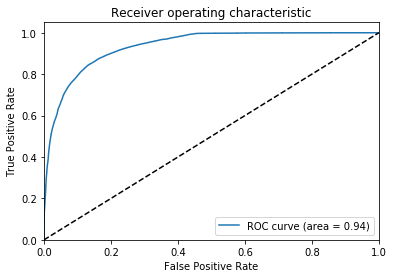

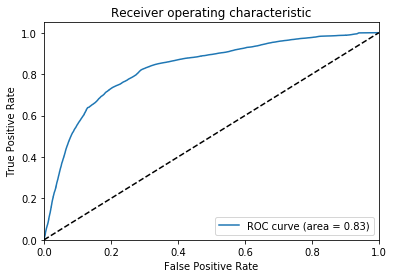

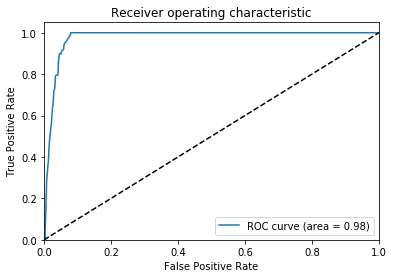

In [55]:
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

### Logistic Regression RandomizedCV

In [60]:
 {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},

0

In [80]:
# Randomized Search

# Create the random grid
random_grid = {'penalty': [ 'l2'],
               'C': np.logspace(-4, 4, 20),
               'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}

print('Randomized Search Parameter Grid:')
pprint(random_grid)


Randomized Search Parameter Grid:
{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'penalty': ['l2'],
 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}


In [81]:
base_lr = LogisticRegression(multi_class='multinomial', random_state=0)

#sample_weights removed as instructions unclear
scorer = make_scorer(recall_score,average = 'micro')

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
lr_random = RandomizedSearchCV(estimator = base_lr, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,scoring=scorer)


In [82]:
# Fit the random search model
lr_random.fit(X_t,y_t)

/Users/byungchankim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 90.1min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 101.2min finished
/Users/byungchankim/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'penalty': ['l2'], 'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn',
          scoring=make_scorer(recall_score, average=micro), verbose=2)

In [83]:
lr_random.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 3792.690190732246}

In [84]:
best_lr_random = lr_random.best_estimator_
best_pred_lr = best_lr_random.predict(X_ts)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_ts, best_pred_lr))

#how many different predictions did we get actually?
print("different predictions: ",set(best_pred_lr))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_ts, best_pred_lr)
pd.crosstab(y_ts,best_pred_lr, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8091182187665665
different predictions:  {0, 1, 2}


Predicted      0      1      2     All
True                                  
0          52170  13494    372   66036
1          12888  45678   7459   66025
2              1   3593  62410   66004
All        65059  62765  70241  198065

We can see from here, even through randomized search, the accuracy is not doing any better than out of box.